# Course 601: Introduction to Data Science
## Course Project Topic: Weather Forecast


## Members:

   ## - Professor: Huthaifa Ashqar
   ## - Students:
<ul>
    <li>Sarang Rajendra Patil</li>
    <li>Aishwarya Kale</li>
    <li>Spandana Chennamaneni</li>
    <li>Sai Karteek Edumudi</li>
    <li>Suvidha Vaddula</li>
    <li>Levan Sulimanov</li>
</ul>

________________________________________________________________________________

### Project Task List

- [x] Find Weather Dataset (KBWI airport, Maryland): https://www.ncdc.noaa.gov/cdo-web/datatools/lcd - **Levan**
- [x] Merge Datasets - **Karteek**
- [x] Fix Dataset column's data types using Excel - **Levan** 
- [x] Remove unnecessary columns and clean data type mixes in columns (two data types per column -> fix to single data type for consistency) - **Levan**
- [x] NaN values interpolation -  **Levan**
- [x] Come up with list of 7 hypothesis - **Spandana and Suvidha** [due 04/14/2021]
- [x] NaN distribution overview - **Sarang, Aishwarya, Levan** [due 04/14/2021]
    - [x] Look for years distribution separately (group NaN by year) - **Sarang, Aishwarya, Levan** [due 04/14/2021]
- [x] Visualize weather dataset ( feature insights, etc.) - (2 graphs from each member)
    - [x] **Sarang**
    - [x] **Aishwarya**
    - [x] **Spandana**
    - [x] **Karteek**
    - [x] **Suvidha**
    - [x] **Levan**
- [x] Use Heat Map, but in this use target feature for checking how other features affect it - **Karteek** [due 04/14/2021] 
    - In this case, possible target variable is Dry Bulb Temperature + 2 other
- [x] Visualization of correlation between features - **Sarang**  
- [x] Data Distribution - **Spandana, Suvidha, Aishwarya**
- [x] Correlate current data with POWER.LARC NASA's dataset (https://power.larc.nasa.gov/data-access-viewer/) - **Levan**
- [x] Split data for train, test, validate (7 days to predict next 7 days - needs group discussion) - Time Series Format - **Aishwarya and Levan**
- [x] Train Data using Random Forest - **Levan and Sarang**
- [x] Train Data using LSTM - **Aishwarya, Sarang, and Levan**
- [x] Evaluate LSTM model - **Aishwarya and Levan**
- [x] Evaluate RFR model - **Levan**
- [x] **Paper**
    - [x] Abstract - **Aishwarya**
    - [x] Introduction - **Aishwarya**
    - [x] Hypothesis - **Levan and Aishwarya**
    - [x] Previous Approaches - **Aishwarya**
    - [x] Dataset Collection - **Levan and Karteek**
    - [x] Data Overview - **Sarang, Aishwarya, Karteek, Spandana, Suvidha, Levan**
    - [x] Methodoloy:        
        - [x] Feature Correlation - **Aishwarya and Karteek**
        - [x] Data Distribution - **Sarang, Aishwarya, and Levan**
        - [x] Hypothesis - **Aishwarya, Sarang, Karteek, Spandan, Suvidha, Levan**
        - [x] Data Cleaning and Pre-processing - **Sarang, Aishwarya, Levan**
        - [x] Additional Hypotheses - **Spandana and Suvidha**
    - Models:
        - [x] LSTM - **Aishwarya, Levan, and Sarang**
        - [x] RFR - **Levan**
        - [x] Decagon Model Framework and Deca Prediction Framework - **Levan**
    - [x] Analysis and Results section: - **Aishwarya, Sarang, and Levan***
    - [x] Our changes/approach (description of each approach) - **Aishwarya, Levan**
    - [x] Results - **Aishwarya**
    - [x] Plots - **Sarang, Aishwarya, Karteek, Spandana, Suvidha, Levan**

________________________________________________________________________________

# Implementation Part:

## *2 errors* are shown on purpose at the beginning of data cleaning part, right after Merge Data, in order to describe our decision for using alternative approach

# Module Imports for the whole Jupyter Notebook

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

import datetime
from functools import reduce
from sklearn.model_selection import TimeSeriesSplit

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [2]:
# Data Collection - 3 10 year ranges were downloaded and merged together

## Merge Data and define column types

# [Karteek]

In [3]:
# We provide merged file at the end, so this section is commented out

# Import initial data and check imported data

# get current directory
curr_dir = os.getcwd()

data_dir = os.path.join(curr_dir, "main_data")

# dataset name
data1 = "1991_2000.csv"
data2 = "2001_2010.csv"
data3 = "2011_2020.csv"

df1_dir = os.path.join(data_dir, data1)
df2_dir = os.path.join(data_dir, data2)
df3_dir = os.path.join(data_dir, data3)

df1 = pd.read_csv(df1_dir, low_memory=False) # dtype={0:str, 1:str, 2:str, 3:str, 4:int, })
df2 = pd.read_csv(df2_dir, low_memory=False)
df3 = pd.read_csv(df3_dir, low_memory=False)

df_parts = [df1, df2, df3]
merged_data = pd.concat(df_parts)

In [4]:
merged_data

STATION                 DATE REPORT_TYPE SOURCE  AWND  \
0       72406093721  1991-01-01T00:00:00       SAO        C   NaN   
1       72406093721  1991-01-01T01:00:00       SAO        3   NaN   
2       72406093721  1991-01-01T02:00:00       SAO        3   NaN   
3       72406093721  1991-01-01T03:00:00       SAO        3   NaN   
4       72406093721  1991-01-01T04:00:00       SAO        3   NaN   
...             ...                  ...         ...    ...   ...   
125205  72406093721  2020-12-31T21:54:00       FM-15      7   NaN   
125206  72406093721  2020-12-31T22:54:00       FM-15      7   NaN   
125207  72406093721  2020-12-31T23:54:00       FM-15      7   NaN   
125208  72406093721  2020-12-31T23:59:00       SOD        6   NaN   
125209  72406093721  2020-12-31T23:59:00       SOM        6   6.7   

        BackupDirection  BackupDistance  BackupDistanceUnit  BackupElements  \
0                   NaN             NaN                 NaN             NaN   
1                   NaN             NaN                 NaN             NaN   
2                   NaN             NaN                 NaN             NaN   
3                   NaN             NaN                 NaN             NaN   
4                   NaN             NaN                 NaN             NaN   
...                 ...             ...                 ...             ...   
125205              NaN             NaN                 NaN             NaN   
125206              NaN             NaN                 NaN             NaN   
125207              NaN             NaN                 NaN             NaN   
125208              NaN             NaN                 NaN             NaN   
125209              NaN             NaN                 NaN             NaN   

        BackupElevation  BackupElevationUnit  BackupEquipment  BackupLatitude  \
0                   NaN                  NaN              NaN             NaN   
1                   NaN                  NaN              NaN             NaN   
2                   NaN                  NaN              NaN             NaN   
3                   NaN                  NaN              NaN             NaN   
4                   NaN                  NaN              NaN             NaN   
...                 ...                  ...              ...             ...   
125205              NaN                  NaN              NaN             NaN   
125206              NaN                  NaN              NaN             NaN   
125207              NaN                  NaN              NaN             NaN   
125208              NaN                  NaN              NaN             NaN   
125209              NaN                  NaN              NaN             NaN   

        BackupLongitude  BackupName    CDSD  CLDD  DSNW  \
0                   NaN         NaN     NaN   NaN   NaN   
1                   NaN         NaN     NaN   NaN   NaN   
2                   NaN         NaN     NaN   NaN   NaN   
3                   NaN         NaN     NaN   NaN   NaN   
4                   NaN         NaN     NaN   NaN   NaN   
...                 ...         ...     ...   ...   ...   
125205              NaN         NaN     NaN   NaN   NaN   
125206              NaN         NaN     NaN   NaN   NaN   
125207              NaN         NaN     NaN   NaN   NaN   
125208              NaN         NaN     NaN   NaN   NaN   
125209              NaN         NaN  1538.0   0.0   1.0   

        DailyAverageDewPointTemperature DailyAverageDryBulbTemperature  \
0                                   NaN                            NaN   
1                                   NaN                            NaN   
2                                   NaN                            NaN   
3                                   NaN                            NaN   
4                                   NaN                            NaN   
...                                 ...                            ...   
125205                            

In [5]:
merged_data.shape

(408747, 124)

In [6]:
# Let's save merged data into CSV
merged_data.to_csv("./main_data/merged_data_tmp.csv", index=False)

In [7]:
merged_data["REPORT_TYPE"]

0         SAO  
1         SAO  
2         SAO  
3         SAO  
4         SAO  
          ...  
125205    FM-15
125206    FM-15
125207    FM-15
125208    SOD  
125209    SOM  
Name: REPORT_TYPE, Length: 408747, dtype: object

#### Report type is physical calculations (SAO etc.), which is what we are looking for.
#### Before we have found dataset, but samples were actual predictions from numerical weather model, rather than actual measurements

In [8]:
list(merged_data.columns)

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'HDSD',
 'HTDD',
 'HeavyFog',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrec

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408747 entries, 0 to 125209
Columns: 124 entries, STATION to WindEquipmentChangeDate
dtypes: float64(53), int64(1), object(70)
memory usage: 389.8+ MB


# [Levan]

# Let' remove unnecessary columns in the data
* Daily and Monthly average we do not need, since we leave hourly data and that can be calculated from
* Some of the unknown abbreviation we remove also
* Features like Station name and report type are also discarded
* Backup features are also discarded

In [10]:
del merged_data["AWND"]
del merged_data["CDSD"]
del merged_data["CLDD"]
del merged_data["DSNW"]
del merged_data["BackupDirection"]
del merged_data["BackupDistance"]
del merged_data["BackupDistanceUnit"]
del merged_data["BackupElements"]
del merged_data["BackupElevation"]
del merged_data["BackupElevationUnit"]
del merged_data["BackupEquipment"]
del merged_data["BackupLatitude"]
del merged_data["BackupLongitude"]
del merged_data["BackupName"]
del merged_data["DailyAverageDewPointTemperature"]
del merged_data["DailyAverageDryBulbTemperature"]
del merged_data["DailyAverageRelativeHumidity"]
del merged_data["DailyAverageSeaLevelPressure"]
del merged_data["DailyAverageStationPressure"]
del merged_data["DailyAverageWetBulbTemperature"]
del merged_data["DailyAverageWindSpeed"]
del merged_data["DailyCoolingDegreeDays"]
del merged_data["DailyDepartureFromNormalAverageTemperature"]
del merged_data["DailyHeatingDegreeDays"]
del merged_data["DailyMaximumDryBulbTemperature"]
del merged_data["DailyMinimumDryBulbTemperature"]
del merged_data["DailyPeakWindDirection"]
del merged_data["DailyPeakWindSpeed"]
del merged_data["DailyPrecipitation"]
del merged_data["DailySnowDepth"]
del merged_data["DailySnowfall"]
del merged_data["DailySustainedWindDirection"]
del merged_data["DailySustainedWindSpeed"]
del merged_data["DailyWeather"]
del merged_data["HDSD"]
del merged_data["HTDD"]

del merged_data["MonthlyAverageRH"]
del merged_data["MonthlyDaysWithGT001Precip"]
del merged_data["MonthlyDaysWithGT010Precip"]
del merged_data["MonthlyDaysWithGT32Temp"]
del merged_data["MonthlyDaysWithGT90Temp"]
del merged_data["MonthlyDaysWithLT0Temp"]
del merged_data["MonthlyDaysWithLT32Temp"]
del merged_data["MonthlyDepartureFromNormalAverageTemperature"]
del merged_data["MonthlyDepartureFromNormalCoolingDegreeDays"]
del merged_data["MonthlyDepartureFromNormalHeatingDegreeDays"]
del merged_data["MonthlyDepartureFromNormalMaximumTemperature"]
del merged_data["MonthlyDepartureFromNormalMinimumTemperature"]
del merged_data["MonthlyDepartureFromNormalPrecipitation"]
del merged_data["MonthlyDewpointTemperature"]
del merged_data["MonthlyGreatestPrecip"]
del merged_data["MonthlyGreatestPrecipDate"]
del merged_data["MonthlyGreatestSnowDepth"]
del merged_data["MonthlyGreatestSnowDepthDate"]
del merged_data["MonthlyGreatestSnowfall"]
del merged_data["MonthlyGreatestSnowfallDate"]
del merged_data["MonthlyMaxSeaLevelPressureValue"]
del merged_data["MonthlyMaxSeaLevelPressureValueDate"]
del merged_data["MonthlyMaxSeaLevelPressureValueTime"]
del merged_data["MonthlyMaximumTemperature"]
del merged_data["MonthlyMeanTemperature"]
del merged_data["MonthlyMinSeaLevelPressureValue"]
del merged_data["MonthlyMinSeaLevelPressureValueDate"]
del merged_data["MonthlyMinSeaLevelPressureValueTime"]
del merged_data["MonthlyMinimumTemperature"]
del merged_data["MonthlySeaLevelPressure"]
del merged_data["MonthlyStationPressure"]
del merged_data["MonthlyTotalLiquidPrecipitation"]
del merged_data["MonthlyTotalSnowfall"]
del merged_data["MonthlyWetBulb"]

del merged_data["NormalsCoolingDegreeDay"]
del merged_data["NormalsHeatingDegreeDay"]

del merged_data["ShortDurationEndDate005"]
del merged_data["ShortDurationEndDate010"]
del merged_data["ShortDurationEndDate015"]
del merged_data["ShortDurationEndDate020"]
del merged_data["ShortDurationEndDate030"]
del merged_data["ShortDurationEndDate045"]
del merged_data["ShortDurationEndDate060"]
del merged_data["ShortDurationEndDate080"]
del merged_data["ShortDurationEndDate100"]
del merged_data["ShortDurationEndDate120"]
del merged_data["ShortDurationEndDate150"]
del merged_data["ShortDurationEndDate180"]
del merged_data["ShortDurationPrecipitationValue005"]
del merged_data["ShortDurationPrecipitationValue010"]
del merged_data["ShortDurationPrecipitationValue015"]
del merged_data["ShortDurationPrecipitationValue020"]
del merged_data["ShortDurationPrecipitationValue030"]
del merged_data["ShortDurationPrecipitationValue045"]
del merged_data["ShortDurationPrecipitationValue060"]
del merged_data["ShortDurationPrecipitationValue080"]
del merged_data["ShortDurationPrecipitationValue100"]
del merged_data["ShortDurationPrecipitationValue120"]
del merged_data["ShortDurationPrecipitationValue150"]
del merged_data["ShortDurationPrecipitationValue180"]

del merged_data["HourlyWindGustSpeed"] # had mostly missing data in dataset
del merged_data["HourlySkyConditions"] # due to hash codes - could not translate, plus we have other features to refer to sky condition
del merged_data["HourlyPressureChange"] # we have Station Pressure already
del merged_data["HourlyPressureTendency"] # we have Station Pressure already
del merged_data["HourlyPresentWeatherType"] # same logic as sky condition

del merged_data["HeavyFog"] # almost no data

del merged_data["SOURCE"]
del merged_data["REPORT_TYPE"]
del merged_data["STATION"] # similar to ID, so no use

del merged_data["REM"]
del merged_data["REPORT_TYPE.1"]
del merged_data["SOURCE.1"]
del merged_data["Sunrise"] # missing data, and no obvious use
del merged_data["Sunset"] # missing data and no obvious use
del merged_data["TStorms"] # Hash codes that we could not interpret
del merged_data["WindEquipmentChangeDate"] # No use

In [11]:
merged_data.head()

DATE HourlyAltimeterSetting HourlyDewPointTemperature  \
0  1991-01-01T00:00:00                  30.59                        13   
1  1991-01-01T01:00:00                  30.59                        13   
2  1991-01-01T02:00:00                  30.60                        15   
3  1991-01-01T03:00:00                  30.62                        16   
4  1991-01-01T04:00:00                  30.61                        16   

  HourlyDryBulbTemperature HourlyPrecipitation HourlyRelativeHumidity  \
0                       29                0.00                     51   
1                       28                0.00                     53   
2                       26                0.00                     63   
3                       26                0.00                     66   
4                       24                0.00                     71   

  HourlySeaLevelPressure HourlyStationPressure HourlyVisibility  \
0                  30.60                 30.42            19.88   
1                  30.60                 30.42            19.88   
2                  30.60                 30.43            19.88   
3                  30.63                 30.45            19.88   
4                  30.62                 30.44            19.88   

  HourlyWetBulbTemperature HourlyWindDirection HourlyWindSpeed  
0                       24                 330               9  
1                       24                 320               8  
2                       23                 260               5  
3                       23                 320               6  
4                       22                 350               3

In [12]:
# Remaining Columns:

In [13]:
merged_data.columns
# DATE HourlyAltimeterSetting HourlyDewPointTemperature HourlyDryBulbTemperature HourlyPrecipitation HourlyRelativeHumidity
# HourlySeaLevelPressure HourlyStationPressure HourlyVisibility HourlyWetBulbTemperature HourlyWindDirection HourlyWindSpeed

Index(['DATE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure',
       'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature',
       'HourlyWindDirection', 'HourlyWindSpeed'],
      dtype='object')

In [14]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408747 entries, 0 to 125209
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DATE                       408747 non-null  object
 1   HourlyAltimeterSetting     314506 non-null  object
 2   HourlyDewPointTemperature  334531 non-null  object
 3   HourlyDryBulbTemperature   334570 non-null  object
 4   HourlyPrecipitation        282440 non-null  object
 5   HourlyRelativeHumidity     334526 non-null  object
 6   HourlySeaLevelPressure     297437 non-null  object
 7   HourlyStationPressure      266046 non-null  object
 8   HourlyVisibility           338537 non-null  object
 9   HourlyWetBulbTemperature   266031 non-null  object
 10  HourlyWindDirection        336785 non-null  object
 11  HourlyWindSpeed            337910 non-null  object
dtypes: object(12)
memory usage: 40.5+ MB


### If we convert datatypes right away, we can see that it has some strings attached to float values:

In [15]:
#### Error Example:

In [16]:
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])
merged_data["HourlyAltimeterSetting"] = merged_data["HourlyAltimeterSetting"].astype(float)
merged_data["HourlyDewPointTemperature"] = merged_data["HourlyDewPointTemperature"].astype(float)
merged_data["HourlyDryBulbTemperature"] = merged_data["HourlyDryBulbTemperature"].astype(float)
merged_data["HourlyPrecipitation"] = merged_data["HourlyPrecipitation"].astype(float)
merged_data["HourlyRelativeHumidity"] = merged_data["HourlyRelativeHumidity"].astype(float)
merged_data["HourlySeaLevelPressure"] = merged_data["HourlySeaLevelPressure"].astype(float)
merged_data["HourlyStationPressure"] = merged_data["HourlyStationPressure"].astype(float)
merged_data["HourlyVisibility"] = merged_data["HourlyVisibility"].astype(float)
merged_data["HourlyWetBulbTemperature"] = merged_data["HourlyWetBulbTemperature"].astype(float)
merged_data["HourlyWindDirection"] = merged_data["HourlyWindDirection"].astype(float)
merged_data["HourlyWindSpeed"] = merged_data["HourlyWindSpeed"].astype(float)

ValueError: could not convert string to float: '29.98s'

In [17]:
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])
merged_data["HourlyAltimeterSetting"] = merged_data["HourlyAltimeterSetting"].astype(str).str.replace('s', '')
merged_data["HourlyDewPointTemperature"] = merged_data["HourlyDewPointTemperature"].astype(str).str.replace('s', '')
merged_data["HourlyDryBulbTemperature"] = merged_data["HourlyDryBulbTemperature"].astype(str).str.replace('s', '')
merged_data["HourlyPrecipitation"] = merged_data["HourlyPrecipitation"].astype(str).str.replace('s', '')
merged_data["HourlyRelativeHumidity"] = merged_data["HourlyRelativeHumidity"].astype(str).str.replace('s', '')
merged_data["HourlySeaLevelPressure"] = merged_data["HourlySeaLevelPressure"].astype(str).str.replace('s', '')
merged_data["HourlyStationPressure"] = merged_data["HourlyStationPressure"].astype(str).str.replace('s', '')
merged_data["HourlyVisibility"] = merged_data["HourlyVisibility"].astype(str).str.replace('s', '')
merged_data["HourlyWetBulbTemperature"] = merged_data["HourlyWetBulbTemperature"].astype(str).str.replace('s', '')
merged_data["HourlyWindDirection"] = merged_data["HourlyWindDirection"].astype(str).str.replace('s', '')
merged_data["HourlyWindSpeed"] = merged_data["HourlyWindSpeed"].astype(str).str.replace('s', '')

In [18]:
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])
merged_data["HourlyAltimeterSetting"] = merged_data["HourlyAltimeterSetting"].astype(str).str.replace('*', '')
merged_data["HourlyDewPointTemperature"] = merged_data["HourlyDewPointTemperature"].astype(str).str.replace('*', '')
merged_data["HourlyDryBulbTemperature"] = merged_data["HourlyDryBulbTemperature"].astype(str).str.replace('*', '')
merged_data["HourlyPrecipitation"] = merged_data["HourlyPrecipitation"].astype(str).str.replace('*', '')
merged_data["HourlyRelativeHumidity"] = merged_data["HourlyRelativeHumidity"].astype(str).str.replace('*', '')
merged_data["HourlySeaLevelPressure"] = merged_data["HourlySeaLevelPressure"].astype(str).str.replace('*', '')
merged_data["HourlyStationPressure"] = merged_data["HourlyStationPressure"].astype(str).str.replace('*', '')
merged_data["HourlyVisibility"] = merged_data["HourlyVisibility"].astype(str).str.replace('*', '')
merged_data["HourlyWetBulbTemperature"] = merged_data["HourlyWetBulbTemperature"].astype(str).str.replace('*', '')
merged_data["HourlyWindDirection"] = merged_data["HourlyWindDirection"].astype(str).str.replace('*', '')
merged_data["HourlyWindSpeed"] = merged_data["HourlyWindSpeed"].astype(str).str.replace('*', '')

In [19]:
# Second error example:

In [20]:
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])
merged_data["HourlyAltimeterSetting"] = merged_data["HourlyAltimeterSetting"].astype(float)
merged_data["HourlyDewPointTemperature"] = merged_data["HourlyDewPointTemperature"].astype(float)
merged_data["HourlyDryBulbTemperature"] = merged_data["HourlyDryBulbTemperature"].astype(float)
merged_data["HourlyPrecipitation"] = merged_data["HourlyPrecipitation"].astype(float)
merged_data["HourlyRelativeHumidity"] = merged_data["HourlyRelativeHumidity"].astype(float)
merged_data["HourlySeaLevelPressure"] = merged_data["HourlySeaLevelPressure"].astype(float)
merged_data["HourlyStationPressure"] = merged_data["HourlyStationPressure"].astype(float)
merged_data["HourlyVisibility"] = merged_data["HourlyVisibility"].astype(float)
merged_data["HourlyWetBulbTemperature"] = merged_data["HourlyWetBulbTemperature"].astype(float)
merged_data["HourlyWindDirection"] = merged_data["HourlyWindDirection"].astype(float)
merged_data["HourlyWindSpeed"] = merged_data["HourlyWindSpeed"].astype(float)

ValueError: could not convert string to float: 

### This loop above kept repeating, as we removed "s" and spaces, "*" would appear. Inlcuding space replacements. As we removed again, another value would re-appear, this might be due to the way items are replaced in the csv itself.

### Thus, we have switched into Excel and replaced these values with empty values by using "Find Replace" method

In [21]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408747 entries, 0 to 125209
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATE                       408747 non-null  datetime64[ns]
 1   HourlyAltimeterSetting     314506 non-null  float64       
 2   HourlyDewPointTemperature  408747 non-null  object        
 3   HourlyDryBulbTemperature   408747 non-null  object        
 4   HourlyPrecipitation        408747 non-null  object        
 5   HourlyRelativeHumidity     408747 non-null  object        
 6   HourlySeaLevelPressure     408747 non-null  object        
 7   HourlyStationPressure      408747 non-null  object        
 8   HourlyVisibility           408747 non-null  object        
 9   HourlyWetBulbTemperature   408747 non-null  object        
 10  HourlyWindDirection        408747 non-null  object        
 11  HourlyWindSpeed            408747 non-null  object  

### Sample images from excel analysis:
![alt text](main_data/column_data_type_adjustment.PNG "Fixing Data Type")
![alt text](main_data/cleaning_extra_strings_in_numbers.PNG "Removing unnecessary strings from numbers")

### This file was saved as "merged_data_types_defined.csv"
### So let us import it and also revisit some of the features that were marked for removal before

# [Aishwarya and Levan]

In [23]:
# Let's do it:
# get current directory
curr_dir = os.getcwd()
data_folder = "main_data"
dataset_name = "merged_data_types_defined.csv"
dataset_location = os.path.join(curr_dir, data_folder, dataset_name)

pd.options.display.max_columns = None
w_nan_data = pd.read_csv(dataset_location, low_memory=False)

w_nan_data.head()

STATION                 DATE REPORT_TYPE SOURCE  \
0  72406093721  1991-01-01T00:00:00       SAO        C   
1  72406093721  1991-01-01T01:00:00       SAO        3   
2  72406093721  1991-01-01T02:00:00       SAO        3   
3  72406093721  1991-01-01T03:00:00       SAO        3   
4  72406093721  1991-01-01T04:00:00       SAO        3   

   HourlyAltimeterSetting  HourlyDewPointTemperature  \
0                   30.59                       13.0   
1                   30.59                       13.0   
2                   30.60                       15.0   
3                   30.62                       16.0   
4                   30.61                       16.0   

   HourlyDryBulbTemperature  HourlyPrecipitation HourlyPresentWeatherType  \
0                      29.0                  0.0                      NaN   
1                      28.0                  0.0                      NaN   
2                      26.0                  0.0                      NaN   
3                      26.0                  0.0                      NaN   
4                      24.0                  0.0                      NaN   

   HourlyPressureChange  HourlyPressureTendency  HourlyRelativeHumidity  \
0                   NaN                     NaN                    51.0   
1                 -0.02                     1.0                    53.0   
2                   NaN                     NaN                    63.0   
3                   NaN                     NaN                    66.0   
4                 -0.02                     0.0                    71.0   

   HourlySeaLevelPressure HourlySkyConditions  HourlyStationPressure  \
0                   30.60                 NaN                  30.42   
1                   30.60                 NaN                  30.42   
2                   30.60                 NaN                  30.43   
3                   30.63                 NaN                  30.45   
4                   30.62                 NaN                  30.44   

   HourlyVisibility  HourlyWetBulbTemperature  HourlyWindDirection  \
0             19.88                      24.0                330.0   
1             19.88                      24.0                320.0   
2             19.88                      23.0                260.0   
3             19.88                      23.0                320.0   
4             19.88                      22.0                350.0   

   HourlyWindGustSpeed  HourlyWindSpeed                    REM REPORT_TYPE.1  \
0                  NaN              9.0                    NaN         SAO     
1                  NaN              8.0  AWY015107 20006 46328         SAO     
2                  NaN              5.0                    NaN         SAO     
3                  NaN              6.0                    NaN         SAO     
4                  NaN              3.0              AWY003007         SAO     

   Sunrise  Sunset  
0      NaN     NaN  
1      NaN     NaN  
2      NaN     NaN  
3      NaN     NaN  
4      NaN     NaN

In [24]:
del w_nan_data["REM"]
del w_nan_data["REPORT_TYPE.1"]
del w_nan_data["Sunrise"]
del w_nan_data["Sunset"]
del w_nan_data["STATION"]
del w_nan_data["REPORT_TYPE"]
del w_nan_data["SOURCE"]
del w_nan_data["HourlyPresentWeatherType"]
del w_nan_data["HourlySkyConditions"]

# NaN values Distribution overview

In [25]:
# # get current directory
# curr_dir = os.getcwd()
# data_folder = "main_data"
# dataset_name = "merged_data_types_defined.csv"
# dataset_location = os.path.join(curr_dir, data_folder, dataset_name)

# pd.options.display.max_columns = None
weather_df = w_nan_data.copy(deep=True)

In [26]:
weather_df.head(5)

DATE  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0  1991-01-01T00:00:00                   30.59                       13.0   
1  1991-01-01T01:00:00                   30.59                       13.0   
2  1991-01-01T02:00:00                   30.60                       15.0   
3  1991-01-01T03:00:00                   30.62                       16.0   
4  1991-01-01T04:00:00                   30.61                       16.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
0                      29.0                  0.0                   NaN   
1                      28.0                  0.0                 -0.02   
2                      26.0                  0.0                   NaN   
3                      26.0                  0.0                   NaN   
4                      24.0                  0.0                 -0.02   

   HourlyPressureTendency  HourlyRelativeHumidity  HourlySeaLevelPressure  \
0                     NaN                    51.0                   30.60   
1                     1.0                    53.0                   30.60   
2                     NaN                    63.0                   30.60   
3                     NaN                    66.0                   30.63   
4                     0.0                    71.0                   30.62   

   HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
0                  30.42             19.88                      24.0   
1                  30.42             19.88                      24.0   
2                  30.43             19.88                      23.0   
3                  30.45             19.88                      23.0   
4                  30.44             19.88                      22.0   

   HourlyWindDirection  HourlyWindGustSpeed  HourlyWindSpeed  
0                330.0                  NaN              9.0  
1                320.0                  NaN              8.0  
2                260.0                  NaN              5.0  
3                320.0                  NaN              6.0  
4                350.0                  NaN              3.0

In [27]:
weather_df.shape

(408747, 15)

In [28]:
'''
Columns: 
    - Hourly Present Weather Type (HourlyPresentWeatherType)
    - Hourly Sky Conditions (HourlySkyConditions)
    - Hourly Wind Gust Speed (HourlyWindGustSpeed)
    - Sunrise (Sunrise)
    - Sunset (Sunset)
    - REM (REM)
    
They all seem to have a lot of NaN values, so let's check if that's true and if it is, we are going to discard them
'''
None

In [29]:
weather_df.head(10)

DATE  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0  1991-01-01T00:00:00                   30.59                       13.0   
1  1991-01-01T01:00:00                   30.59                       13.0   
2  1991-01-01T02:00:00                   30.60                       15.0   
3  1991-01-01T03:00:00                   30.62                       16.0   
4  1991-01-01T04:00:00                   30.61                       16.0   
5  1991-01-01T05:00:00                   30.60                       16.0   
6  1991-01-01T06:00:00                   30.60                       18.0   
7  1991-01-01T07:00:00                   30.62                       18.0   
8  1991-01-01T08:00:00                   30.63                       18.0   
9  1991-01-01T09:00:00                   30.63                       19.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
0                      29.0                  0.0                   NaN   
1                      28.0                  0.0                 -0.02   
2                      26.0                  0.0                   NaN   
3                      26.0                  0.0                   NaN   
4                      24.0                  0.0                 -0.02   
5                      22.0                  0.0                   NaN   
6                      22.0                  0.0                   NaN   
7                      21.0                  0.0                 -0.01   
8                      21.0                  0.0                   NaN   
9                      30.0                  0.0                   NaN   

   HourlyPressureTendency  HourlyRelativeHumidity  HourlySeaLevelPressure  \
0                     NaN                    51.0                   30.60   
1                     1.0                    53.0                   30.60   
2                     NaN                    63.0                   30.60   
3                     NaN                    66.0                   30.63   
4                     0.0                    71.0                   30.62   
5                     NaN                    78.0                   30.61   
6                     NaN                    85.0                   30.61   
7                     3.0                    88.0                   30.63   
8                     NaN                    88.0                   30.64   
9                     NaN                    64.0                   30.64   

   HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
0                  30.42             19.88                      24.0   
1                  30.42             19.88                      24.0   
2                  30.43             19.88                      23.0   
3                  30.45             19.88                      23.0   
4                  30.44             19.88                      22.0   
5                  30.43             19.88                      20.0   
6                  30.43             19.88                      21.0   
7                  30.45             19.88                      20.0   
8                  30.46             19.88                      20.0   
9                  30.46             19.88                      26.0   

   HourlyWindDirection  HourlyWindGustSpeed  HourlyWindSpeed  
0                330.0                  NaN              9.0  
1                320.0                  NaN              8.0  
2                260.0                  NaN              5.0  
3                320.0                  NaN              6.0  
4                350.0                  NaN              3.0  
5                250.0                  NaN              5.0  
6                290.0                  NaN              3.0  
7                280.0                  NaN              6.0  
8                260.0                  NaN              6.0  
9                 30.0                  NaN              3.0

In [30]:
# Now let us see NaN distribution among important columns that we have kept
# And if NaN exists, proceed with interpolation

#### Checking NaN Percentage:

In [32]:
percent_missing = weather_df.isnull().sum() * 100 / len(weather_df)
missing_value_df = pd.DataFrame({'column_name': weather_df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing',ascending=False)

column_name  percent_missing
HourlyWindGustSpeed              HourlyWindGustSpeed        91.129232
HourlyPressureChange            HourlyPressureChange        71.618385
HourlyPressureTendency        HourlyPressureTendency        71.431472
HourlyWetBulbTemperature    HourlyWetBulbTemperature        34.915975
HourlyStationPressure          HourlyStationPressure        34.911816
HourlyPrecipitation              HourlyPrecipitation        30.901022
HourlySeaLevelPressure        HourlySeaLevelPressure        27.232004
HourlyAltimeterSetting        HourlyAltimeterSetting        23.056071
HourlyWindDirection              HourlyWindDirection        20.863028
HourlyRelativeHumidity        HourlyRelativeHumidity        18.158421
HourlyDewPointTemperature  HourlyDewPointTemperature        18.157197
HourlyDryBulbTemperature    HourlyDryBulbTemperature        18.147901
HourlyWindSpeed                      HourlyWindSpeed        17.330280
HourlyVisibility                    HourlyVisibility        17.177129
DATE                                            DATE         0.000000

In [33]:
# col_list = list(weather_df.columns.values)
# number_of_rows = weather_df.shape[0]

# print("NaN occurrences in following columns:")
# for c in col_list:
#     nan_sum = weather_df[c].isna().sum()
#     nan_percentage = round(nan_sum/number_of_rows*100, 2)
#     print("    *{}: => {}%".format(c, nan_percentage))

#### Alright, ~35% max of missing values, interpolation may help us in current pre-process. This is ***TBD***.

In [34]:
column_name = "HourlyAltimeterSetting"

weather_df['DATE'].head(5)

0    1991-01-01T00:00:00
1    1991-01-01T01:00:00
2    1991-01-01T02:00:00
3    1991-01-01T03:00:00
4    1991-01-01T04:00:00
Name: DATE, dtype: object

In [35]:
# sample date
weather_df['DATE'].iloc[1][5:13]

'01-01T01'

In [36]:
# columns with float dtype
float_columns = ["HourlyAltimeterSetting", "HourlyDewPointTemperature", 
                 "HourlyDryBulbTemperature", "HourlyPrecipitation", 
                 "HourlyRelativeHumidity", "HourlySeaLevelPressure", 
                 "HourlyStationPressure", "HourlyVisibility", 
                 "HourlyWetBulbTemperature", "HourlyWindSpeed"]

In [37]:
for col in float_columns:
    weather_df[col].astype(float)

In [38]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408747 entries, 0 to 408746
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DATE                       408747 non-null  object 
 1   HourlyAltimeterSetting     314506 non-null  float64
 2   HourlyDewPointTemperature  334530 non-null  float64
 3   HourlyDryBulbTemperature   334568 non-null  float64
 4   HourlyPrecipitation        282440 non-null  float64
 5   HourlyPressureChange       116009 non-null  float64
 6   HourlyPressureTendency     116773 non-null  float64
 7   HourlyRelativeHumidity     334525 non-null  float64
 8   HourlySeaLevelPressure     297437 non-null  float64
 9   HourlyStationPressure      266046 non-null  float64
 10  HourlyVisibility           338536 non-null  float64
 11  HourlyWetBulbTemperature   266029 non-null  float64
 12  HourlyWindDirection        323470 non-null  float64
 13  HourlyWindGustSpeed        36

In [39]:
# Columns with consecutive NaNs
'''
{'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrecipitation',
 'HourlyRelativeHumidity',
 'HourlyVisibility',
 'HourlyWetBulbTemperature',
 'HourlyWindDirection'}
'''
None

In [40]:
# find NaN
# get its row number
# get its date
# gather all similar dates, ignoring year
# print it
# average it
# put that average value into that NaN

#### Implemented this logic to replace any consequtive samples based on average of the same timestamps from other years.

* E.g. February 22nd 2015 had missing data from 12pm to 8pm, we would gather timestamps
* from the range 1999-2020 (excluding 2015), take the mean of it and interpolate missing values.

#### Algorithm works, but after consulation with Dr. Philip, he suggested to not use it, as weather often appears different from year to year.
- I keep it, in case we can do further research to find if it could hurt or improve the dataset.
- From suggestion, we decided to omit this algorithm, but if applied, we able to interpolate whole dataset down to 0.0001 Nan values

In [43]:
'''
weather_df_w_Nan = pd.read_csv("with_nan.csv", low_memory=False)

col_list = list(weather_df_w_Nan.columns.values)
number_of_rows = weather_df_w_Nan.shape[0]
pre_num = 0

col_set_with_consecutive_nan = set()

print("NaN value(s) interpolation has started...")
for c in col_list:
    if c in float_columns:
        print("  - Going over column", c)
        for r in range(0, number_of_rows):
            if r%100_000 == 0:
                print("    *Progress: ", round(r/number_of_rows, 2))
            if r+1 < number_of_rows:
                first_val = weather_df_w_Nan[c][r]
                second_val = weather_df_w_Nan[c][r+1]
                #print(first_val, second_val)
                #print(type(first_val), type(second_val))
                # consecutive case of NaN values
                # collect similar days from other years and replace it with average:
                if((np.isnan(first_val)) and (np.isnan(second_val))):
                    #print("Consecutive case")
                    # r - row number
                    # date
                    correlated_date = weather_df_w_Nan["DATE"][r][5:13]
                    # get all similar rows with date
                    lst_of_correlated_days = []
                    
                    mask = weather_df_w_Nan.DATE.str.contains(correlated_date)
                    nan_mask = weather_df_w_Nan[mask]['HourlyAltimeterSetting'].notnull()
                    lst_of_correlated_days = list(list(weather_df_w_Nan[mask]['HourlyAltimeterSetting'][nan_mask]))
                    
                    if lst_of_correlated_days == []:
                        print("WARNING, ASSOCIATED DATA IS MISSING:")
                        weather_df_w_Nan.loc[ r, c ] = np.nan
                    else:
                        weather_df_w_Nan.loc[ r, c ] = round(float(statistics.mean(lst_of_correlated_days)), 2)
                    
                    
                    
#                     #weather_df_original[mask]
#                     for i in range(0, number_of_rows):
#                         if weather_df_w_Nan["DATE"][i][5:13] == correlated_date:
#                             if not np.isnan(weather_df_w_Nan[c][i]):
#                                 lst_of_correlated_days.append(weather_df_w_Nan[c][i])
# #                             elif np.isnan(weather_df_w_Nan[c][i]):
# #                                 try:
# #                                     avg = (weather_df_w_Nan[c][i-1]+weather_df_w_Nan[c][i+1])/2
# #                                     lst_of_correlated_days.append(avg)
# #                                 except:
# #                                     print("errored out")
# #                                     pass
                                
#                     if lst_of_correlated_days == []:
#                         print("WARNING, ASSOCIATED DATA IS MISSING:")
#                     else:
#                         # SET
#                         #weather_df_w_Nan[c][r] = statistics.mean(lst_of_correlated_days)
#                         #print("Was: ", weather_df_w_Nan[c][r])
#                         #print(statistics.mean(lst_of_correlated_days))
#                         #print(lst_of_correlated_days)
#                         weather_df_w_Nan.loc[ r, c ] = round(float(statistics.mean(lst_of_correlated_days)), 2)
#                         #print("Became: ", weather_df_w_Nan[c][r])
                        
                # replace NaN values with average (non-consecutive case)
                elif((np.isnan(first_val)) and (not np.isnan(second_val))):
                    #print("Non-consecutive case")
                    if r == 0:
                        # SET
                        indx = str(r)
                        #print("Was: ", weather_df_w_Nan[c][r])
                        weather_df_w_Nan.loc[ r, c ] = weather_df_w_Nan[c][r+1]
                        #weather_df_w_Nan[c][r] = weather_df_w_Nan[c][r+1]
                        #print("Became: ", weather_df_w_Nan[c][r])
                    else:
                        indx = str(r)
                        # SET
                        #print("Was: ", weather_df_w_Nan[c][r])
                        #weather_df_w_Nan[c][r] = (weather_df_w_Nan[c][r-1]+weather_df_w_Nan[c][r+1])/2
                        weather_df_w_Nan.loc[ r, c ] = round(float((weather_df_w_Nan[c][r-1]+weather_df_w_Nan[c][r+1])/2), 2)
                        #print("Became: ", weather_df_w_Nan[c][r])
                else:
                    pass
        weather_df_w_Nan.to_csv('pre-final-{}.csv'.format(pre_num))
        pre_num+=1
'''
None

# Visualization of NaN Distribution

# [Aishwarya and Sarang]

In [44]:
## Let us see NaN distribution and see how else could we interpolate/fix the data

In [45]:
df = weather_df.copy(deep=True)

In [46]:
df

DATE  HourlyAltimeterSetting  \
0       1991-01-01T00:00:00                   30.59   
1       1991-01-01T01:00:00                   30.59   
2       1991-01-01T02:00:00                   30.60   
3       1991-01-01T03:00:00                   30.62   
4       1991-01-01T04:00:00                   30.61   
...                     ...                     ...   
408742  2020-12-31T21:54:00                   30.39   
408743  2020-12-31T22:54:00                   30.41   
408744  2020-12-31T23:54:00                   30.41   
408745  2020-12-31T23:59:00                     NaN   
408746  2020-12-31T23:59:00                     NaN   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
0                            13.0                      29.0   
1                            13.0                      28.0   
2                            15.0                      26.0   
3                            16.0                      26.0   
4                            16.0                      24.0   
...                           ...                       ...   
408742                       28.0                      39.0   
408743                       27.0                      38.0   
408744                       27.0                      37.0   
408745                        NaN                       NaN   
408746                        NaN                       NaN   

        HourlyPrecipitation  HourlyPressureChange  HourlyPressureTendency  \
0                       0.0                   NaN                     NaN   
1                       0.0                 -0.02                     1.0   
2                       0.0                   NaN                     NaN   
3                       0.0                   NaN                     NaN   
4                       0.0                 -0.02                     0.0   
...                     ...                   ...                     ...   
408742                  0.0                 -0.06                     2.0   
408743                  0.0                   NaN                     NaN   
408744                  0.0                   NaN                     NaN   
408745                  NaN                   NaN                     NaN   
408746                  NaN                   NaN                     NaN   

        HourlyRelativeHumidity  HourlySeaLevelPressure  HourlyStationPressure  \
0                         51.0                   30.60                  30.42   
1                         53.0                   30.60                  30.42   
2                         63.0                   30.60                  30.43   
3                         66.0                   30.63                  30.45   
4                         71.0                   30.62                  30.44   
...                        ...                     ...                    ...   
408742                    65.0                   30.39                  30.22   
408743                    65.0                   30.41                  30.24   
408744                    67.0                   30.41                  30.24   
408745                     NaN                     NaN                    NaN   
408746                     NaN                     NaN                    NaN   

        HourlyVisibility  HourlyWetBulbTemperature  HourlyWindDirection  \
0                  19.88                      24.0                330.0   
1                  19.88                      24.0                320.0   
2                  19.88                      23.0                260.0   
3                  19.88                      23.0                320.0   
4                  19.88                      22.0                350.0   
...                  ...                       ...                  ...   
408742             10.00                      35.0                340.0   
408743             10.00                      34.0                340.0   
408744             10.00        

In [47]:
df['Year'] = pd.to_datetime(df['DATE']).dt.year

In [48]:
df.head()

DATE  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0  1991-01-01T00:00:00                   30.59                       13.0   
1  1991-01-01T01:00:00                   30.59                       13.0   
2  1991-01-01T02:00:00                   30.60                       15.0   
3  1991-01-01T03:00:00                   30.62                       16.0   
4  1991-01-01T04:00:00                   30.61                       16.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
0                      29.0                  0.0                   NaN   
1                      28.0                  0.0                 -0.02   
2                      26.0                  0.0                   NaN   
3                      26.0                  0.0                   NaN   
4                      24.0                  0.0                 -0.02   

   HourlyPressureTendency  HourlyRelativeHumidity  HourlySeaLevelPressure  \
0                     NaN                    51.0                   30.60   
1                     1.0                    53.0                   30.60   
2                     NaN                    63.0                   30.60   
3                     NaN                    66.0                   30.63   
4                     0.0                    71.0                   30.62   

   HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
0                  30.42             19.88                      24.0   
1                  30.42             19.88                      24.0   
2                  30.43             19.88                      23.0   
3                  30.45             19.88                      23.0   
4                  30.44             19.88                      22.0   

   HourlyWindDirection  HourlyWindGustSpeed  HourlyWindSpeed  Year  
0                330.0                  NaN              9.0  1991  
1                320.0                  NaN              8.0  1991  
2                260.0                  NaN              5.0  1991  
3                320.0                  NaN              6.0  1991  
4                350.0                  NaN              3.0  1991

In [49]:
# If we look closely on data, 

In [50]:
df_grpYear = pd.DataFrame(columns={'NAN_HourlyAltimeterSetting','NAN_HourlyDewPointTemperature','NAN_HourlyDryBulbTemperature',
                                  'NAN_HourlyPrecipitation','NAN_HourlyRelativeHumidity',
                                  'NAN_HourlySeaLevelPressure','NAN_HourlyStationPressure','NAN_HourlyVisibility','NAN_HourlyWetBulbTemperature',
                                  'NAN_HourlyWindDirection','NAN_HourlyWindSpeed'})

In [51]:
df_grp_1 = pd.DataFrame({'NAN_HourlyAltimeterSetting' : df.groupby(['Year'])['HourlyAltimeterSetting'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_2 = pd.DataFrame({'NAN_HourlyDewPointTemperature' : df.groupby(['Year'])['HourlyDewPointTemperature'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_3 = pd.DataFrame({'NAN_HourlyDryBulbTemperature' : df.groupby(['Year'])['HourlyDryBulbTemperature'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_4 = pd.DataFrame({'NAN_HourlyPrecipitation' : df.groupby(['Year'])['HourlyPrecipitation'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_5 = pd.DataFrame({'NAN_HourlyRelativeHumidity' : df.groupby(['Year'])['HourlyRelativeHumidity'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_6 = pd.DataFrame({'NAN_HourlySeaLevelPressure' : df.groupby(['Year'])['HourlySeaLevelPressure'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_7 = pd.DataFrame({'NAN_HourlyStationPressure' : df.groupby(['Year'])['HourlyStationPressure'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_8 = pd.DataFrame({'NAN_HourlyVisibility' : df.groupby(['Year'])['HourlyVisibility'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_9 = pd.DataFrame({'NAN_HourlyWetBulbTemperature' : df.groupby(['Year'])['HourlyWetBulbTemperature'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_10 = pd.DataFrame({'NAN_HourlyWindDirection' : df.groupby(['Year'])['HourlyWindDirection'].apply(lambda x:x.isnull().sum())}).reset_index()
df_grp_11 = pd.DataFrame({'NAN_HourlyWindSpeed' : df.groupby(['Year'])['HourlyWindSpeed'].apply(lambda x:x.isnull().sum())}).reset_index()

In [52]:
from functools import reduce
dfs = [df_grp_1, df_grp_2, df_grp_3, df_grp_4, df_grp_5, df_grp_6,df_grp_7,df_grp_8,df_grp_9,df_grp_10,df_grp_11]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Year'), dfs)

In [53]:
df_final.head()

Year  NAN_HourlyAltimeterSetting  NAN_HourlyDewPointTemperature  \
0  1991                         157                            516   
1  1992                         121                            839   
2  1993                         151                            747   
3  1994                         186                            684   
4  1995                         231                            751   

   NAN_HourlyDryBulbTemperature  NAN_HourlyPrecipitation  \
0                           515                      515   
1                           839                      983   
2                           747                      749   
3                           683                      684   
4                           751                      751   

   NAN_HourlyRelativeHumidity  NAN_HourlySeaLevelPressure  \
0                         516                         515   
1                         839                         839   
2                         747                         747   
3                         684                         684   
4                         751                         751   

   NAN_HourlyStationPressure  NAN_HourlyVisibility  \
0                        531                     1   
1                        841                     0   
2                        753                     0   
3                        687                     0   
4                        752                     0   

   NAN_HourlyWetBulbTemperature  NAN_HourlyWindDirection  NAN_HourlyWindSpeed  
0                           532                      360                    0  
1                           841                      294                    0  
2                           753                        0                    0  
3                           688                        0                    0  
4                           752                        0                    0

In [54]:
col_list = ['NAN_HourlyAltimeterSetting', 'NAN_HourlyDewPointTemperature',
       'NAN_HourlyDryBulbTemperature', 'NAN_HourlyPrecipitation',
       'NAN_HourlyRelativeHumidity', 'NAN_HourlySeaLevelPressure',
       'NAN_HourlyStationPressure', 'NAN_HourlyVisibility',
       'NAN_HourlyWetBulbTemperature', 'NAN_HourlyWindDirection',
       'NAN_HourlyWindSpeed']

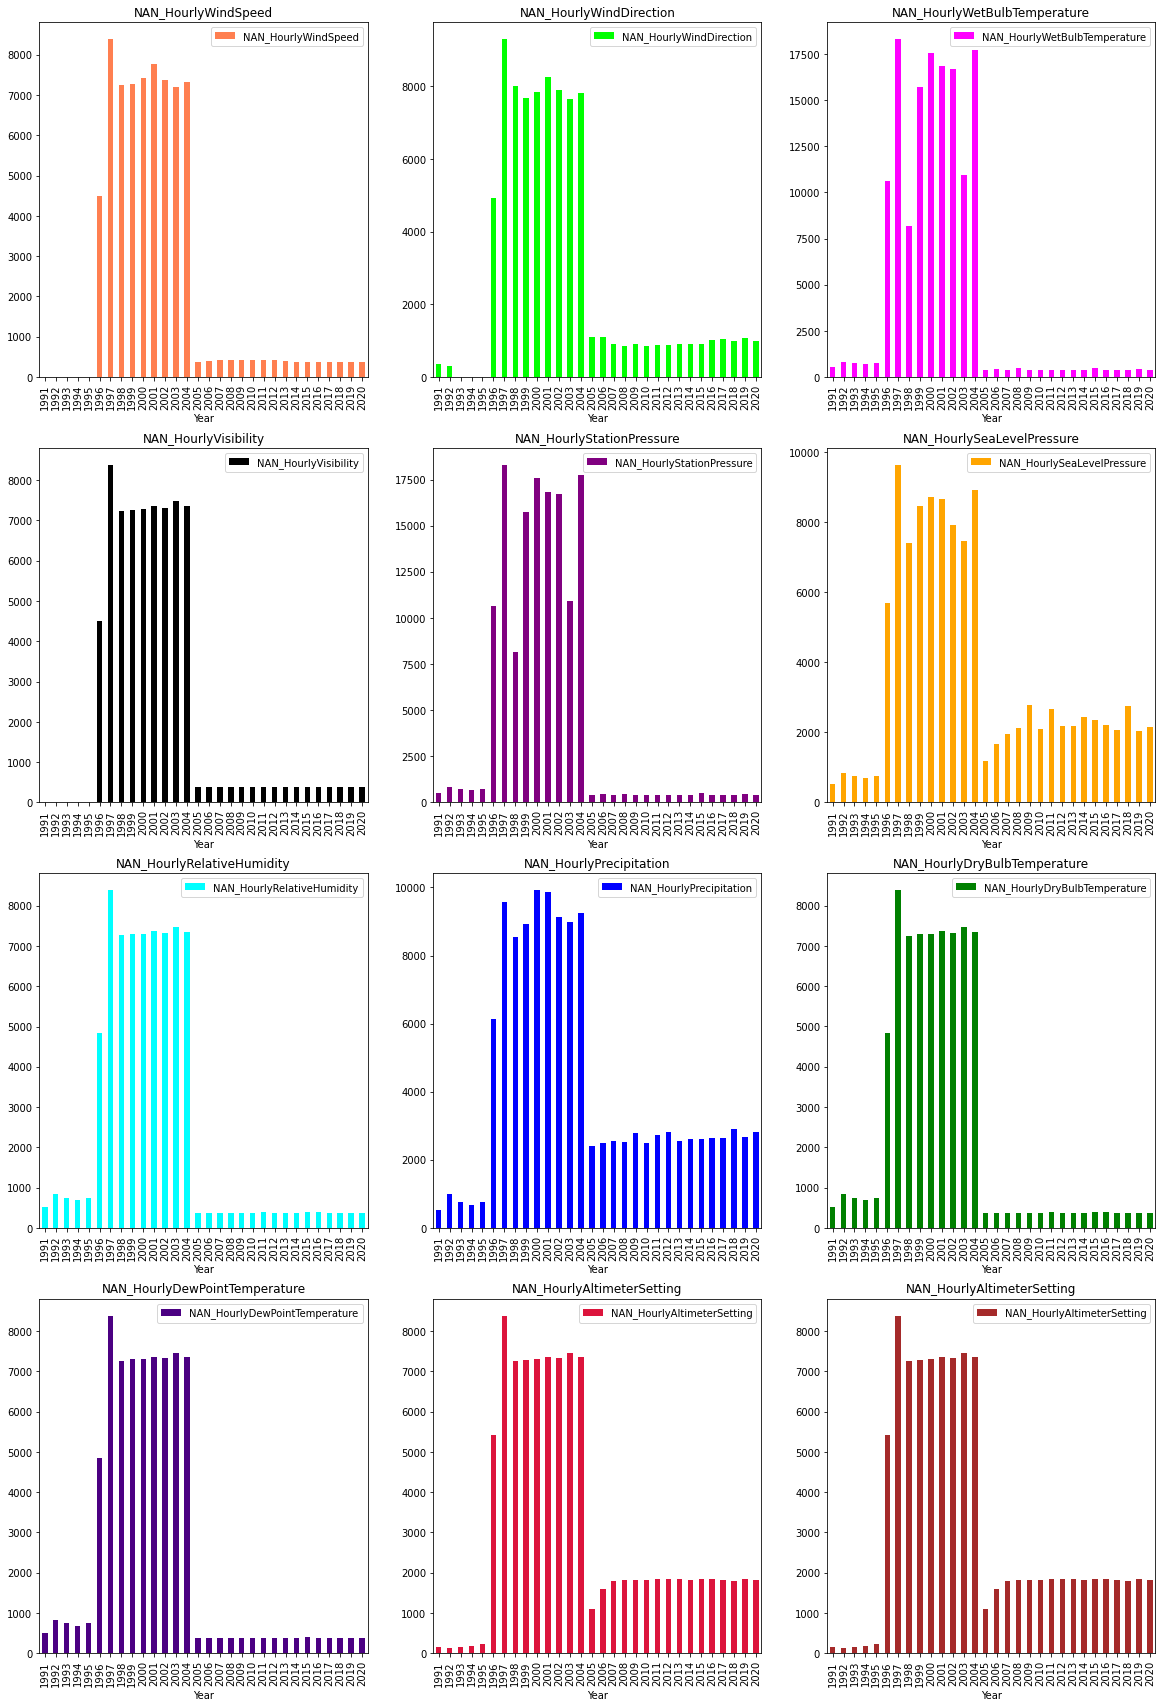

In [55]:
fig, axes = plt.subplots(4, 3, figsize=(20, 30))


col_list = ['NAN_HourlyAltimeterSetting', 'NAN_HourlyDewPointTemperature',
       'NAN_HourlyDryBulbTemperature', 'NAN_HourlyPrecipitation',
       'NAN_HourlyRelativeHumidity', 'NAN_HourlySeaLevelPressure',
       'NAN_HourlyStationPressure', 'NAN_HourlyVisibility',
       'NAN_HourlyWetBulbTemperature', 'NAN_HourlyWindDirection',
       'NAN_HourlyWindSpeed']
my_colors = ['brown','crimson', 'indigo', 'green', 'blue', 'cyan','orange','purple','black','fuchsia','lime','coral'] 

for i in range(0,4):
    for j in range(0,3):
        if(len(col_list)!=0):
            col = col_list.pop()
        if(len(my_colors)!=0):
            cr = my_colors.pop()
        df_final.plot(ax=axes[i,j],x='Year', y=col,kind="bar",color=cr)
        axes[i,j].set_title(col)

<AxesSubplot:xlabel='Year', ylabel='NaN overall amount'>

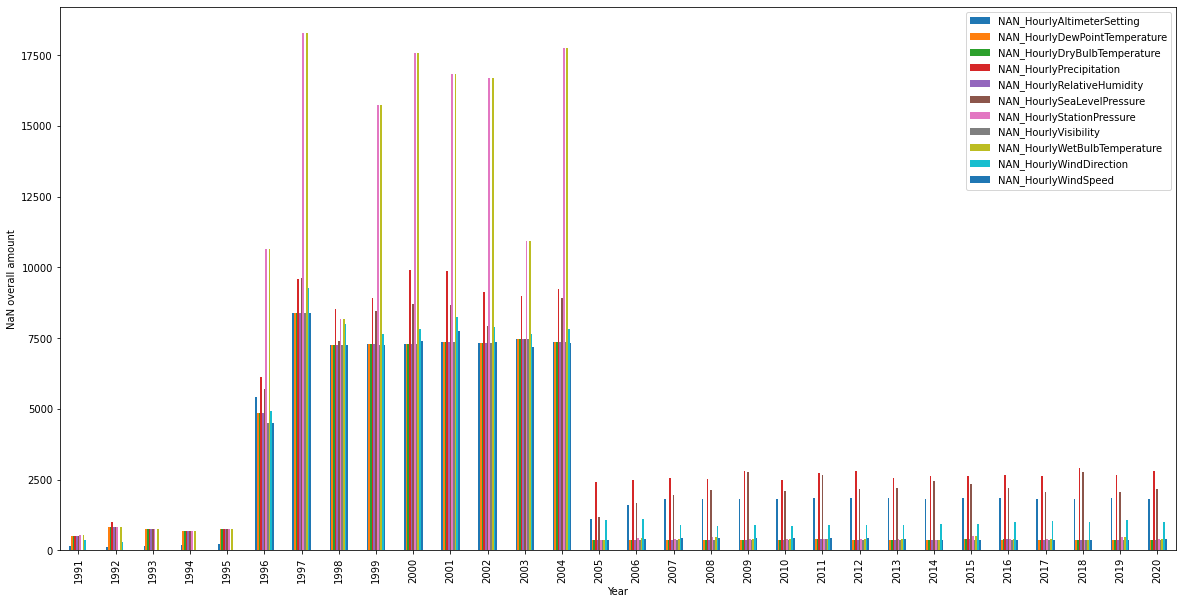

In [56]:
# Let's see that combined
df_final.plot.bar(x='Year', ylabel='NaN overall amount', figsize=(20, 10))

# End of NaN Distribution overview

In [57]:
w_nan_data["DATE_upd"] = pd.to_datetime(w_nan_data['DATE'], format="%Y-%m-%dT%H:%M:%S")

In [58]:
w_nan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408747 entries, 0 to 408746
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATE                       408747 non-null  object        
 1   HourlyAltimeterSetting     314506 non-null  float64       
 2   HourlyDewPointTemperature  334530 non-null  float64       
 3   HourlyDryBulbTemperature   334568 non-null  float64       
 4   HourlyPrecipitation        282440 non-null  float64       
 5   HourlyPressureChange       116009 non-null  float64       
 6   HourlyPressureTendency     116773 non-null  float64       
 7   HourlyRelativeHumidity     334525 non-null  float64       
 8   HourlySeaLevelPressure     297437 non-null  float64       
 9   HourlyStationPressure      266046 non-null  float64       
 10  HourlyVisibility           338536 non-null  float64       
 11  HourlyWetBulbTemperature   266029 non-null  float64 

In [59]:
# dt = w_nan_date
w_nan_data['Year'] = w_nan_data['DATE_upd'].dt.year
w_nan_data['MONTH'] = w_nan_data['DATE_upd'].dt.month
w_nan_data['DAY'] = w_nan_data['DATE_upd'].dt.day
w_nan_data['HOUR'] = w_nan_data['DATE_upd'].dt.hour

In [60]:
# Let's drop those years and from now work on this dataset

In [61]:
#remove years from the df
w_nan_data= w_nan_data[~w_nan_data.Year.isin ([1991, 1992, 1993, 1994, 1995, 1996 , 1997 , 1998 , 1999, 2000, 2001,2002,2003,2004])]
w_nan_data.head()

DATE  HourlyAltimeterSetting  \
209483  2005-01-01T00:54:00                   30.27   
209484  2005-01-01T01:00:00                     NaN   
209485  2005-01-01T01:54:00                   30.26   
209486  2005-01-01T02:54:00                   30.28   
209487  2005-01-01T03:54:00                   30.27   

        HourlyDewPointTemperature  HourlyDryBulbTemperature  \
209483                       39.0                      46.0   
209484                       39.0                      46.0   
209485                       39.0                      45.0   
209486                       39.0                      44.0   
209487                       39.0                      45.0   

        HourlyPrecipitation  HourlyPressureChange  HourlyPressureTendency  \
209483                  0.0                   0.0                     0.0   
209484                  NaN                   0.0                     0.0   
209485                  0.0                   NaN                     NaN   
209486                  0.0                   NaN                     NaN   
209487                  0.0                   0.0                     3.0   

        HourlyRelativeHumidity  HourlySeaLevelPressure  HourlyStationPressure  \
209483                    77.0                   30.27                  30.10   
209484                    77.0                   30.27                  30.10   
209485                    80.0                   30.26                  30.09   
209486                    83.0                   30.28                  30.11   
209487                    80.0                   30.27                  30.10   

        HourlyVisibility  HourlyWetBulbTemperature  HourlyWindDirection  \
209483             10.00                      43.0                220.0   
209484              9.94                      43.0                220.0   
209485             10.00                      42.0                  0.0   
209486             10.00                      42.0                  0.0   
209487             10.00                      42.0                230.0   

        HourlyWindGustSpeed  HourlyWindSpeed            DATE_upd  Year  MONTH  \
209483                  NaN              3.0 2005-01-01 00:54:00  2005      1   
209484                  NaN              3.0 2005-01-01 01:00:00  2005      1   
209485                  NaN              0.0 2005-01-01 01:54:00  2005      1   
209486                  NaN              0.0 2005-01-01 02:54:00  2005      1   
209487                  NaN              5.0 2005-01-01 03:54:00  2005      1   

        DAY  HOUR  
209483    1     0  
209484    1     1  
209485    1     1  
209486    1     2  
209487    1     3

In [62]:
w_nan_data['Date_only'] = w_nan_data['DATE_upd'].dt.date

In [63]:
# Grouping timestamps into Hourly (removing redundant reports and interpolating them into single averaged value per hour, if they appear)

In [64]:
group_by_columns = ['Date_only', 'HOUR']

group_by_columns = ['Date_only', 'HOUR']
df_grp_d1 = pd.DataFrame({'HourlyAltimeterSetting' : w_nan_data.groupby(group_by_columns)['HourlyAltimeterSetting'].mean()})
df_grp_d2 = pd.DataFrame({'HourlyDewPointTemperature' : w_nan_data.groupby(group_by_columns)['HourlyDewPointTemperature'].mean()})
df_grp_d3 = pd.DataFrame({'HourlyDryBulbTemperature' : w_nan_data.groupby(group_by_columns)['HourlyDryBulbTemperature'].mean()})
df_grp_d4 = pd.DataFrame({'HourlyPrecipitation' : w_nan_data.groupby(group_by_columns)['HourlyPrecipitation'].mean()})
df_grp_d5 = pd.DataFrame({'HourlyRelativeHumidity' : w_nan_data.groupby(group_by_columns)['HourlyRelativeHumidity'].mean()})
df_grp_d6 = pd.DataFrame({'HourlySeaLevelPressure' : w_nan_data.groupby(group_by_columns)['HourlySeaLevelPressure'].mean()})
df_grp_d7 = pd.DataFrame({'HourlyStationPressure' : w_nan_data.groupby(group_by_columns)['HourlyStationPressure'].mean()})
df_grp_d8 = pd.DataFrame({'HourlyVisibility' : w_nan_data.groupby(group_by_columns)['HourlyVisibility'].mean()})
df_grp_d9 = pd.DataFrame({'HourlyWetBulbTemperature' : w_nan_data.groupby(group_by_columns)['HourlyWetBulbTemperature'].mean()})
df_grp_d10 = pd.DataFrame({'HourlyWindDirection' : w_nan_data.groupby(group_by_columns)['HourlyWindDirection'].mean()})
df_grp_d11 = pd.DataFrame({'HourlyWindSpeed' : w_nan_data.groupby(group_by_columns)['HourlyWindSpeed'].mean()})

In [65]:
from functools import reduce
dfs_dates = [df_grp_d1, df_grp_d2, df_grp_d3, df_grp_d4, df_grp_d5, df_grp_d6,df_grp_d7,df_grp_d8,df_grp_d9,df_grp_d10,df_grp_d11]
# df_final_dates = reduce(lambda left,right: pd.merge(left,right,on=['Date_only', 'HOUR']), dfs_dates)
# df_final_dates = reduce(lambda left,right: pd.merge(left,right,on=['Date_only', 'HOUR']), dfs_dates)
df_final_dates = pd.concat(dfs_dates, axis=1)

In [66]:
df_final_dates[0:48]

HourlyAltimeterSetting  HourlyDewPointTemperature  \
Date_only  HOUR                                                      
2005-01-01 0                     30.270                       39.0   
           1                     30.260                       39.0   
           2                     30.280                       39.0   
           3                     30.270                       39.0   
           4                     30.270                       39.0   
           5                     30.280                       39.0   
           6                     30.310                       38.0   
           7                     30.320                       38.5   
           8                     30.340                       42.0   
           9                     30.360                       46.0   
           10                    30.360                       44.0   
           11                    30.340                       45.0   
           12                    30.330                       44.0   
           13                    30.330                       43.5   
           14                    30.340                       44.0   
           15                    30.370                       43.0   
           16                    30.390                       42.0   
           17                    30.410                       42.0   
           18                    30.430                       41.0   
           19                    30.450                       40.5   
           20                    30.470                       39.0   
           21                    30.490                       40.0   
           22                    30.510                       37.0   
           23                    30.520                       35.0   
2005-01-02 0                     30.530                       34.0   
           1                     30.540                       32.5   
           2                     30.560                       30.0   
           3                     30.570                       28.0   
           4                     30.600                       28.0   
           5                     30.600                       28.0   
           6                     30.620                       27.0   
           7                     30.630                       27.5   
           8                     30.630                       29.0   
           9                     30.640                       30.0   
           10                    30.620                       32.0   
           11                    30.600                       33.0   
           12                    30.585                       33.5   
           13                    30.550                       33.5   
           14                    30.530                       34.0   
           15                    30.520                       35.0   
           16                    30.510                       35.0   
           17                    30.500                       35.0   
           18                    30.490                       35.0   
           19                    30.480                       35.5   
           20                    30.480                       36.0   
           21                    30.450                       35.0   
           22                    30.450                       35.5   
           23                    30.430                       36.0   

                 HourlyDryBulbTemperature  HourlyPrecipitation  \
Date_only  HOUR                                                  
2005-01-01 0                         46.0                  0.0   
           1                         45.5                  0.0   
           2                         44.0                  0.0   
           3                         45.0                  0.0   
           4                         43.0                  0.0   
           5                         42.0             

In [67]:
df_final_dates_w_time = df_final_dates.copy(deep=True)

In [68]:
df_final_dates_w_time.reset_index(inplace=True)  

In [69]:
df_final_dates_w_time[111111:111111+48].head(48)

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
111111  2017-09-04    15               29.910000                  61.000000   
111112  2017-09-04    16               29.890000                  62.000000   
111113  2017-09-04    17               29.880000                  62.000000   
111114  2017-09-04    18               29.880000                  63.000000   
111115  2017-09-04    19               29.870000                  63.500000   
111116  2017-09-04    20               29.850000                  65.000000   
111117  2017-09-04    21               29.850000                  66.000000   
111118  2017-09-04    22               29.850000                  66.000000   
111119  2017-09-04    23               29.830000                  66.000000   
111120  2017-09-05     0               29.840000                  66.000000   
111121  2017-09-05     1               29.840000                  66.000000   
111122  2017-09-05     2               29.830000                  66.000000   
111123  2017-09-05     3               29.830000                  66.000000   
111124  2017-09-05     4               29.830000                  66.000000   
111125  2017-09-05     5               29.830000                  65.000000   
111126  2017-09-05     6               29.840000                  66.000000   
111127  2017-09-05     7               29.830000                  66.500000   
111128  2017-09-05     8               29.830000                  68.000000   
111129  2017-09-05     9               29.830000                  67.000000   
111130  2017-09-05    10               29.810000                  68.000000   
111131  2017-09-05    11               29.780000                  67.000000   
111132  2017-09-05    12               29.760000                  68.000000   
111133  2017-09-05    13               29.740000                  68.000000   
111134  2017-09-05    14               29.720000                  66.000000   
111135  2017-09-05    15               29.750000                  67.000000   
111136  2017-09-05    16               29.800000                  62.500000   
111137  2017-09-05    17               29.816667                  66.666667   
111138  2017-09-05    18               29.830000                  67.250000   
111139  2017-09-05    19               29.825000                  68.000000   
111140  2017-09-05    20               29.830000                  69.000000   
111141  2017-09-05    21               29.830000                  68.000000   
111142  2017-09-05    22               29.820000                  68.000000   
111143  2017-09-05    23               29.820000                  68.000000   
111144  2017-09-06     0               29.840000                  68.000000   
111145  2017-09-06     1               29.830000                  68.000000   
111146  2017-09-06     2               29.800000                  67.000000   
111147  2017-09-06     3               29.800000                  67.500000   
111148  2017-09-06     4               29.820000                  68.000000   
111149  2017-09-06     5               29.830000                  68.000000   
111150  2017-09-06     6               29.850000                  68.000000   
111151  2017-09-06     7               29.860000                  65.666667   
111152  2017-09-06     8               29.866667                  63.666667   
111153  2017-09-06     9               29.900000                  63.000000   
111154  2017-09-06    10               29.900000                  62.000000   
111155  2017-09-06    11               29.910000                  63.000000   
111156  2017-09-06    12               29.900000                  62.000000   
111157  2017-09-06    13               29.900000                  62.000000   
111158  2017-09-06    14               29.910000                  61.000000   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
111111                 81.000000             0.000000   

In [70]:
df_final_dates_w_time.shape

(140256, 13)

In [71]:
# Nan Distribution collection (into Data Frame for visualization)

In [72]:
df_nan_count = df_final_dates_w_time.copy(deep=True)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyAltimeterSetting.isnull().astype(int)
            .groupby(df_nan_count.HourlyAltimeterSetting.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyAltimeterSetting_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyDewPointTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyDewPointTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyDewPointTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyDryBulbTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyDryBulbTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyDryBulbTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyPrecipitation.isnull().astype(int)
            .groupby(df_nan_count.HourlyPrecipitation.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyPrecipitation_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyRelativeHumidity.isnull().astype(int)
            .groupby(df_nan_count.HourlyRelativeHumidity.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyRelativeHumidity_consec_count')
        )
    ],
    axis=1
)



df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlySeaLevelPressure.isnull().astype(int)
            .groupby(df_nan_count.HourlySeaLevelPressure.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlySeaLevelPressure_consec_count')
        )
    ],
    axis=1
)




df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyStationPressure.isnull().astype(int)
            .groupby(df_nan_count.HourlyStationPressure.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyStationPressure_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyVisibility.isnull().astype(int)
            .groupby(df_nan_count.HourlyVisibility.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyVisibility_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWetBulbTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyWetBulbTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWetBulbTemperature_consec_count')
        )
    ],
    axis=1
)



df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWindDirection.isnull().astype(int)
            .groupby(df_nan_count.HourlyWindDirection.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWindDirection_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWindSpeed .isnull().astype(int)
            .groupby(df_nan_count.HourlyWindSpeed .notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWindSpeed_consec_count')
        )
    ],
    axis=1
)

In [73]:
df_nan_count.head()

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0  2005-01-01     0                   30.27                       39.0   
1  2005-01-01     1                   30.26                       39.0   
2  2005-01-01     2                   30.28                       39.0   
3  2005-01-01     3                   30.27                       39.0   
4  2005-01-01     4                   30.27                       39.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                      46.0                  0.0                    77.0   
1                      45.5                  0.0                    78.5   
2                      44.0                  0.0                    83.0   
3                      45.0                  0.0                    80.0   
4                      43.0                  0.0                    86.0   

   HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                  30.270                 30.100             10.00   
1                  30.265                 30.095              9.97   
2                  30.280                 30.110             10.00   
3                  30.270                 30.100             10.00   
4                  30.270                 30.100              8.00   

   HourlyWetBulbTemperature  HourlyWindDirection  HourlyWindSpeed  \
0                      43.0                220.0              3.0   
1                      42.5                110.0              1.5   
2                      42.0                  0.0              0.0   
3                      42.0                230.0              5.0   
4                      41.0                  0.0              0.0   

   HourlyAltimeterSetting_consec_count  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   HourlyDewPointTemperature_consec_count  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   HourlyDryBulbTemperature_consec_count  HourlyPrecipitation_consec_count  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   HourlyRelativeHumidity_consec_count  HourlySeaLevelPressure_consec_count  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   HourlyStationPressure_consec_count  HourlyVisibility_consec_count  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   

   HourlyWetBulbTemperature_consec_count  HourlyWindDirection_consec_count  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0             

In [74]:
df_nan_count.columns

Index(['Date_only', 'HOUR', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed',
       'HourlyAltimeterSetting_consec_count',
       'HourlyDewPointTemperature_consec_count',
       'HourlyDryBulbTemperature_consec_count',
       'HourlyPrecipitation_consec_count',
       'HourlyRelativeHumidity_consec_count',
       'HourlySeaLevelPressure_consec_count',
       'HourlyStationPressure_consec_count', 'HourlyVisibility_consec_count',
       'HourlyWetBulbTemperature_consec_count',
       'HourlyWindDirection_consec_count', 'HourlyWindSpeed_consec_count'],
      dtype='object')

#### Let us see remaining NaN distribution:

<AxesSubplot:title={'center':'HourlyWindSpeed_consec_count'}, xlabel='Days (15 years)', ylabel='Number of consequtive NaN values'>

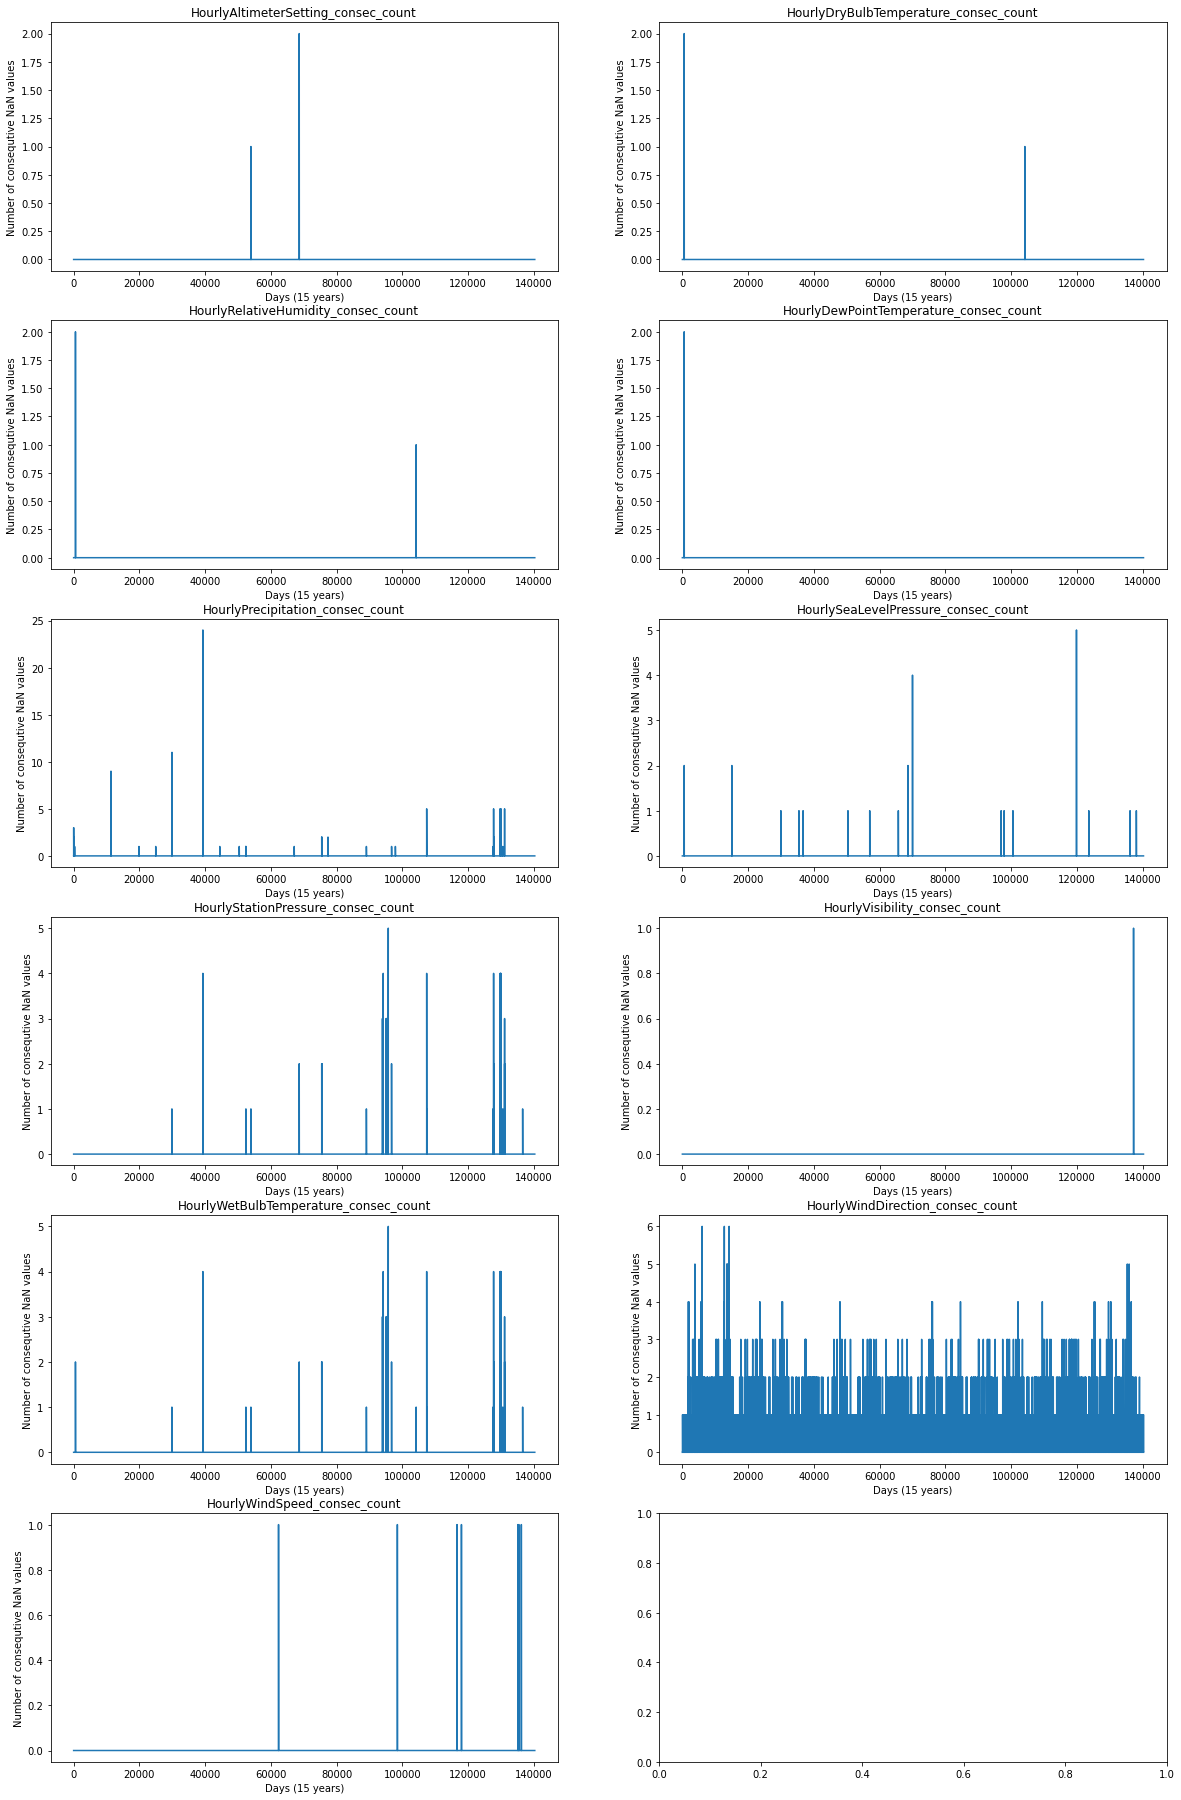

In [78]:
fig, axes = plt.subplots(6, 2, figsize=(20, 32))

#sns.histplot(ax=axes[0,0],x= df.HourlyDryBulbTemperature,color='red')
#df_nan_count['HourlyAltimeterSetting'].plot(ax=axes[0,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')


df_nan_count['HourlyAltimeterSetting_consec_count'].plot(ax=axes[0,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyDryBulbTemperature_consec_count'].plot(ax=axes[0,1],kind='line', title='HourlyDryBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyRelativeHumidity_consec_count'].plot(ax=axes[1,0],kind='line', title='HourlyRelativeHumidity_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyAltimeterSetting_consec_count'].plot(ax=axes[1,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyDewPointTemperature_consec_count'].plot(ax=axes[1,1],kind='line', title='HourlyDewPointTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyDryBulbTemperature_consec_count'].plot(ax=axes[1,1],kind='line', title='HourlyDryBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyPrecipitation_consec_count'].plot(ax=axes[2,0],kind='line', title='HourlyPrecipitation_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyRelativeHumidity_consec_count'].plot(ax=axes[2,0],kind='line', title='HourlyRelativeHumidity_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlySeaLevelPressure_consec_count'].plot(ax=axes[2,1],kind='line', title='HourlySeaLevelPressure_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyStationPressure_consec_count'].plot(ax=axes[3,0],kind='line', title='HourlyStationPressure_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyVisibility_consec_count'].plot(ax=axes[3,1],kind='line', title='HourlyVisibility_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWetBulbTemperature_consec_count'].plot(ax=axes[4,0],kind='line', title='HourlyWetBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWindDirection_consec_count'].plot(ax=axes[4,1],kind='line', title='HourlyWindDirection_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWindSpeed_consec_count'].plot(ax=axes[5,0],kind='line', title='HourlyWindSpeed_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')

# [Levan]

#### Let's interpolate up to 4 consequtive values (4 hours of consequtive NaN)

In [80]:
# columns with float dtype
float_columns = ["HourlyAltimeterSetting", "HourlyDewPointTemperature", 
                 "HourlyDryBulbTemperature", "HourlyPrecipitation", 
                 "HourlyRelativeHumidity", "HourlySeaLevelPressure", 
                 "HourlyStationPressure", "HourlyVisibility", 
                 "HourlyWetBulbTemperature", "HourlyWindSpeed"]

#### This algorithm goes and checks if the data has missing values in consequtive order.
#### Such as, 45, 64, NaN, NaN, NaN, 44, 41...
* In this case, first NaN would be replaced with (64+44)/2 which is average.
* The process is going to repeat for next NaN value, and so on

In [82]:
weather_df_w_Nan = df_final_dates_w_time.copy(deep=True)

col_list = list(weather_df_w_Nan.columns.values)
number_of_rows = weather_df_w_Nan.shape[0]
pre_num = 0

col_set_with_consecutive_nan = set()

print("NaN value(s) interpolation has started...")
for c in col_list:
    if c in float_columns:
        print("  - Going over column", c)
        for r in range(0, number_of_rows):
            if r%10_000 == 0:
                print("    *Progress: ", round(r/number_of_rows*100, 2))
            if r+4 < number_of_rows:
                first_val = weather_df_w_Nan[c][r]
                second_val = weather_df_w_Nan[c][r+1]
                third_val = weather_df_w_Nan[c][r+2]
                fourth_val = weather_df_w_Nan[c][r+3]
                fifth_val = weather_df_w_Nan[c][r+4]
                
                if((np.isnan(first_val)) and (not np.isnan(second_val))):
                    #print("Non-consecutive case")
                    if r == 0:
                        # SET
                        indx = str(r)
                        #print("Was: ", weather_df_w_Nan[c][r])
                        weather_df_w_Nan.loc[ r, c ] = weather_df_w_Nan[c][r+1]
                        #weather_df_w_Nan[c][r] = weather_df_w_Nan[c][r+1]
                        #print("Became: ", weather_df_w_Nan[c][r])
                    else:
                        indx = str(r)
                        # SET
                        #print("Was: ", weather_df_w_Nan[c][r])
                        #weather_df_w_Nan[c][r] = (weather_df_w_Nan[c][r-1]+weather_df_w_Nan[c][r+1])/2
                        weather_df_w_Nan.loc[ r, c ] = round(float((weather_df_w_Nan[c][r-1]+second_val)/2), 2)
                        #print("Became: ", weather_df_w_Nan[c][r])
                        
                        
                if((np.isnan(first_val)) and (np.isnan(second_val)) and (not np.isnan(third_val))):
                    #print("Non-consecutive case")
                    if r == 0:
                        # SET
                        indx = str(r)
                        #print("Was: ", weather_df_w_Nan[c][r])
                        weather_df_w_Nan.loc[ r, c ] = weather_df_w_Nan[c][r+1]
                        #weather_df_w_Nan[c][r] = weather_df_w_Nan[c][r+1]
                        #print("Became: ", weather_df_w_Nan[c][r])
                    else:
                        indx = str(r)
                        # SET
                        #print("Was: ", weather_df_w_Nan[c][r])
                        #weather_df_w_Nan[c][r] = (weather_df_w_Nan[c][r-1]+weather_df_w_Nan[c][r+1])/2
                        weather_df_w_Nan.loc[ r, c ] = round(float((weather_df_w_Nan[c][r-1]+third_val)/2), 2)
                        #print("Became: ", weather_df_w_Nan[c][r])
                        
                
                
                elif((np.isnan(first_val)) and (np.isnan(second_val) and (np.isnan(third_val)) and (not np.isnan(fourth_val)))):
                    # interpolate consequtive
                    if r == 0:
                        # SET
                        indx = str(r)
                        #print("Was: ", weather_df_w_Nan[c][r])
                        weather_df_w_Nan.loc[ r, c ] = weather_df_w_Nan[c][r+1]
                        #weather_df_w_Nan[c][r] = weather_df_w_Nan[c][r+1]
                        #print("Became: ", weather_df_w_Nan[c][r])
                    else:
                        weather_df_w_Nan.loc[ r, c ] = float((weather_df_w_Nan[c][r-1]+fourth_val)/2)
                        #print("Became: ", weather_df_w_Nan[c][r])
                        
                        
                elif((np.isnan(first_val)) and (np.isnan(second_val) and (np.isnan(third_val)) and (np.isnan(fourth_val)) and (not np.isnan(fifth_val)))):
                    # interpolate consequtive
                    if r == 0:
                        # SET
                        indx = str(r)
                        #print("Was: ", weather_df_w_Nan[c][r])
                        weather_df_w_Nan.loc[ r, c ] = weather_df_w_Nan[c][r+1]
                        #weather_df_w_Nan[c][r] = weather_df_w_Nan[c][r+1]
                        #print("Became: ", weather_df_w_Nan[c][r])
                    else:
                        weather_df_w_Nan.loc[ r, c ] = float((weather_df_w_Nan[c][r-1]+fifth_val)/2)
                        #print("Became: ", weather_df_w_Nan[c][r])     
                        

                else:
                    pass
#         weather_df_w_Nan.to_csv('pre-final-{}.csv'.format(pre_num))
#         pre_num+=1
# '''
# None

NaN value(s) interpolation has started...
  - Going over column HourlyAltimeterSetting
    *Progress:  0.0
    *Progress:  7.13
    *Progress:  14.26
    *Progress:  21.39
    *Progress:  28.52
    *Progress:  35.65
    *Progress:  42.78
    *Progress:  49.91
    *Progress:  57.04
    *Progress:  64.17
    *Progress:  71.3
    *Progress:  78.43
    *Progress:  85.56
    *Progress:  92.69
    *Progress:  99.82
  - Going over column HourlyDewPointTemperature
    *Progress:  0.0
    *Progress:  7.13
    *Progress:  14.26
    *Progress:  21.39
    *Progress:  28.52
    *Progress:  35.65
    *Progress:  42.78
    *Progress:  49.91
    *Progress:  57.04
    *Progress:  64.17
    *Progress:  71.3
    *Progress:  78.43
    *Progress:  85.56
    *Progress:  92.69
    *Progress:  99.82
  - Going over column HourlyDryBulbTemperature
    *Progress:  0.0
    *Progress:  7.13
    *Progress:  14.26
    *Progress:  21.39
    *Progress:  28.52
    *Progress:  35.65
    *Progress:  42.78
    *Progress: 

In [83]:
df_nan_count = weather_df_w_Nan.copy(deep=True)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyAltimeterSetting.isnull().astype(int)
            .groupby(df_nan_count.HourlyAltimeterSetting.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyAltimeterSetting_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyDewPointTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyDewPointTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyDewPointTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyDryBulbTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyDryBulbTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyDryBulbTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyPrecipitation.isnull().astype(int)
            .groupby(df_nan_count.HourlyPrecipitation.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyPrecipitation_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyRelativeHumidity.isnull().astype(int)
            .groupby(df_nan_count.HourlyRelativeHumidity.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyRelativeHumidity_consec_count')
        )
    ],
    axis=1
)



df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlySeaLevelPressure.isnull().astype(int)
            .groupby(df_nan_count.HourlySeaLevelPressure.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlySeaLevelPressure_consec_count')
        )
    ],
    axis=1
)




df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyStationPressure.isnull().astype(int)
            .groupby(df_nan_count.HourlyStationPressure.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyStationPressure_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyVisibility.isnull().astype(int)
            .groupby(df_nan_count.HourlyVisibility.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyVisibility_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWetBulbTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyWetBulbTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWetBulbTemperature_consec_count')
        )
    ],
    axis=1
)



df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWindDirection.isnull().astype(int)
            .groupby(df_nan_count.HourlyWindDirection.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWindDirection_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWindSpeed .isnull().astype(int)
            .groupby(df_nan_count.HourlyWindSpeed .notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWindSpeed_consec_count')
        )
    ],
    axis=1
)

<AxesSubplot:title={'center':'HourlyWindSpeed_consec_count'}, xlabel='Days (15 years)', ylabel='Number of consequtive NaN values'>

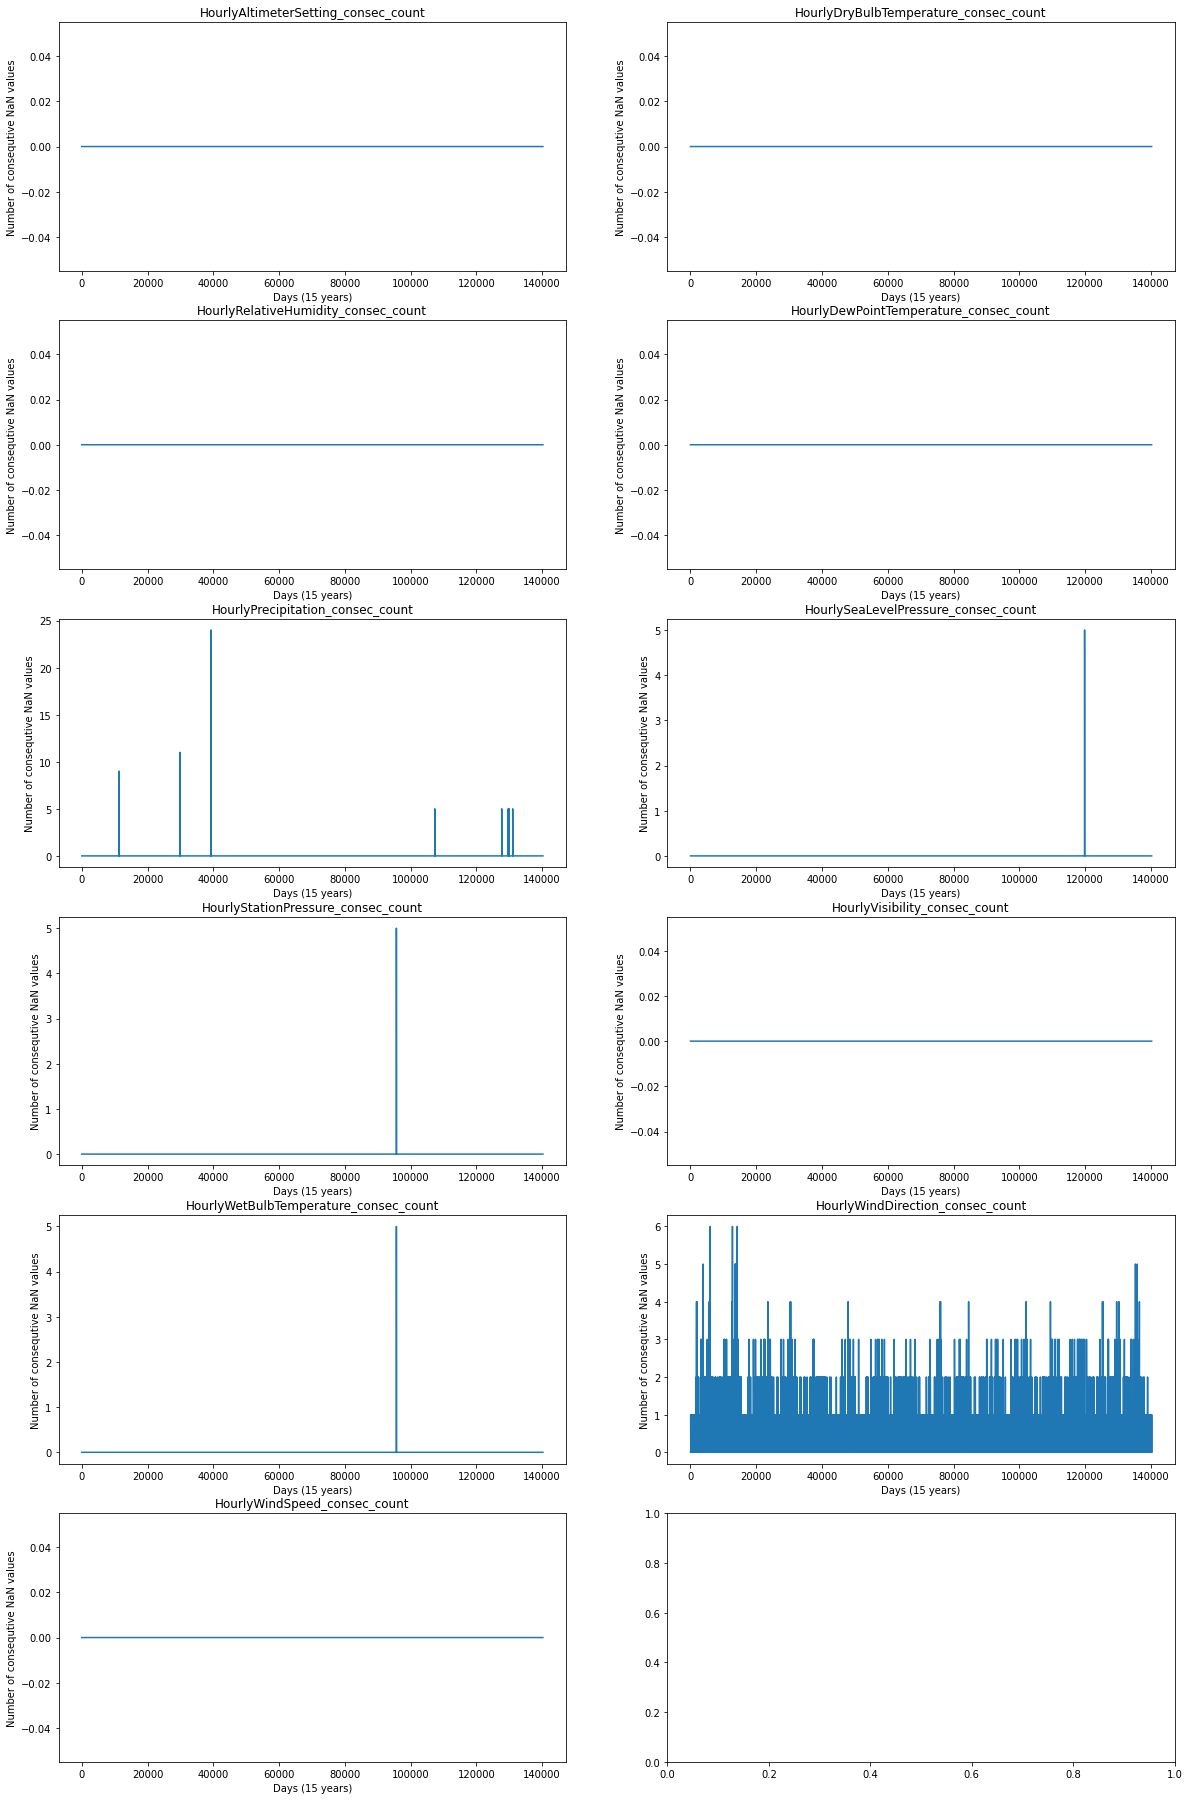

In [84]:
fig, axes = plt.subplots(6, 2, figsize=(20, 32))

#sns.histplot(ax=axes[0,0],x= df.HourlyDryBulbTemperature,color='red')
#df_nan_count['HourlyAltimeterSetting'].plot(ax=axes[0,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')


df_nan_count['HourlyAltimeterSetting_consec_count'].plot(ax=axes[0,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyDryBulbTemperature_consec_count'].plot(ax=axes[0,1],kind='line', title='HourlyDryBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyRelativeHumidity_consec_count'].plot(ax=axes[1,0],kind='line', title='HourlyRelativeHumidity_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyAltimeterSetting_consec_count'].plot(ax=axes[1,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyDewPointTemperature_consec_count'].plot(ax=axes[1,1],kind='line', title='HourlyDewPointTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyDryBulbTemperature_consec_count'].plot(ax=axes[1,1],kind='line', title='HourlyDryBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyPrecipitation_consec_count'].plot(ax=axes[2,0],kind='line', title='HourlyPrecipitation_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyRelativeHumidity_consec_count'].plot(ax=axes[2,0],kind='line', title='HourlyRelativeHumidity_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlySeaLevelPressure_consec_count'].plot(ax=axes[2,1],kind='line', title='HourlySeaLevelPressure_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyStationPressure_consec_count'].plot(ax=axes[3,0],kind='line', title='HourlyStationPressure_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyVisibility_consec_count'].plot(ax=axes[3,1],kind='line', title='HourlyVisibility_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWetBulbTemperature_consec_count'].plot(ax=axes[4,0],kind='line', title='HourlyWetBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWindDirection_consec_count'].plot(ax=axes[4,1],kind='line', title='HourlyWindDirection_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWindSpeed_consec_count'].plot(ax=axes[5,0],kind='line', title='HourlyWindSpeed_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')

In [85]:
df_nan_count.shape

(140256, 24)

#### WindDirection feature remained with constant missing patter, so we remove it

In [86]:
del weather_df_w_Nan['HourlyWindDirection']

In [88]:
# Let's check large consequtive NaN occurences and try fixing it by looking at overall distribution


get_missing_spots_HourlyPrecipitation_consec_count = []
get_missing_spots_HourlySeaLevelPressure_consec_count = []
get_missing_spots_HourlyStationPressure_consec_count = []
get_missing_spots_HourlyWetBulbTemperature_consec_count = []

flag_hit_zero = True
for c, value in enumerate(df_nan_count["HourlyPrecipitation_consec_count"]):
    if value != 0 and flag_hit_zero:
        get_missing_spots_HourlyPrecipitation_consec_count.append(c)
        flag_hit_zero = False
    elif value == 0:
        flag_hit_zero = True
        
flag_hit_zero = True
for c, value in enumerate(df_nan_count["HourlySeaLevelPressure_consec_count"]):
    if value != 0 and flag_hit_zero:
        get_missing_spots_HourlySeaLevelPressure_consec_count.append(c)
        flag_hit_zero = False
    elif value == 0:
        flag_hit_zero = True       
        
flag_hit_zero = True
for c, value in enumerate(df_nan_count["HourlyStationPressure_consec_count"]):
    if value != 0 and flag_hit_zero:
        get_missing_spots_HourlyStationPressure_consec_count.append(c)
        flag_hit_zero = False
    elif value == 0:
        flag_hit_zero = True

flag_hit_zero = True
for c, value in enumerate(df_nan_count["HourlyWetBulbTemperature_consec_count"]):
    if value != 0 and flag_hit_zero:
        get_missing_spots_HourlyWetBulbTemperature_consec_count.append(c)
        flag_hit_zero = False
    elif value == 0:
        flag_hit_zero = True

_______________________________________________

#### Let's look over missing data and interpolate last several things manually, in order to have proper distribution of the data

In [95]:
print("NaN locations for Hourly Precipitation:")
print(get_missing_spots_HourlyPrecipitation_consec_count)

NaN locations for Hourly Precipitation:
[11352, 29904, 39288, 107371, 127723, 129715, 129835, 129907, 129931, 131064]


In [96]:
weather_df_w_Nan[11352-2:]["HourlyPrecipitation"].head(20)

11350    0.0
11351    0.0
11352    0.0
11353    0.0
11354    0.0
11355    0.0
11356    0.0
11357    0.0
11358    0.0
11359    0.0
11360    0.0
11361    0.0
11362    0.0
11363    0.0
11364    0.0
11365    0.0
11366    0.0
11367    0.0
11368    0.0
11369    0.0
Name: HourlyPrecipitation, dtype: float64

In [97]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[11352:11360+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[11352-2:]["HourlyPrecipitation"].head(20)

11350    0.0
11351    0.0
11352    0.0
11353    0.0
11354    0.0
11355    0.0
11356    0.0
11357    0.0
11358    0.0
11359    0.0
11360    0.0
11361    0.0
11362    0.0
11363    0.0
11364    0.0
11365    0.0
11366    0.0
11367    0.0
11368    0.0
11369    0.0
Name: HourlyPrecipitation, dtype: float64

In [98]:
#

In [99]:
weather_df_w_Nan[29904-2:]["HourlyPrecipitation"].head(20)

29902    0.00
29903    0.00
29904     NaN
29905     NaN
29906     NaN
29907     NaN
29908     NaN
29909     NaN
29910     NaN
29911     NaN
29912     NaN
29913     NaN
29914     NaN
29915    0.11
29916    0.00
29917   -0.29
29918    0.05
29919    0.01
29920    0.01
29921    0.01
Name: HourlyPrecipitation, dtype: float64

In [100]:
# Precipitation remains at 0.05 around the missing gap, so let's interpolate that with 0.05
weather_df_w_Nan.at[29904:29914+1, 'HourlyPrecipitation'] = 0.05
weather_df_w_Nan[29904-2:]["HourlyPrecipitation"].head(20)

29902    0.00
29903    0.00
29904    0.05
29905    0.05
29906    0.05
29907    0.05
29908    0.05
29909    0.05
29910    0.05
29911    0.05
29912    0.05
29913    0.05
29914    0.05
29915    0.05
29916    0.00
29917   -0.29
29918    0.05
29919    0.01
29920    0.01
29921    0.01
Name: HourlyPrecipitation, dtype: float64

In [101]:
#

In [102]:
weather_df_w_Nan[39288-2:]["HourlyPrecipitation"].head(30)

39286    0.0
39287    0.0
39288    NaN
39289    NaN
39290    NaN
39291    NaN
39292    NaN
39293    NaN
39294    NaN
39295    NaN
39296    NaN
39297    NaN
39298    NaN
39299    NaN
39300    NaN
39301    NaN
39302    NaN
39303    NaN
39304    NaN
39305    NaN
39306    NaN
39307    NaN
39308    NaN
39309    NaN
39310    NaN
39311    NaN
39312    0.0
39313    0.0
39314    0.0
39315    0.0
Name: HourlyPrecipitation, dtype: float64

In [103]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[39288:39311+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[39288-2:]["HourlyPrecipitation"].head(30)

39286    0.0
39287    0.0
39288    0.0
39289    0.0
39290    0.0
39291    0.0
39292    0.0
39293    0.0
39294    0.0
39295    0.0
39296    0.0
39297    0.0
39298    0.0
39299    0.0
39300    0.0
39301    0.0
39302    0.0
39303    0.0
39304    0.0
39305    0.0
39306    0.0
39307    0.0
39308    0.0
39309    0.0
39310    0.0
39311    0.0
39312    0.0
39313    0.0
39314    0.0
39315    0.0
Name: HourlyPrecipitation, dtype: float64

In [104]:
#

In [105]:
weather_df_w_Nan[107371-2:]["HourlyPrecipitation"].head(20)

107369    0.0
107370    0.0
107371    NaN
107372    NaN
107373    NaN
107374    NaN
107375    NaN
107376    0.0
107377    0.0
107378    0.0
107379    0.0
107380    0.0
107381    0.0
107382    0.0
107383    0.0
107384    0.0
107385    0.0
107386    0.0
107387    0.0
107388    0.0
Name: HourlyPrecipitation, dtype: float64

In [106]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[107371:107375+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[107371-2:]["HourlyPrecipitation"].head(20)

107369    0.0
107370    0.0
107371    0.0
107372    0.0
107373    0.0
107374    0.0
107375    0.0
107376    0.0
107377    0.0
107378    0.0
107379    0.0
107380    0.0
107381    0.0
107382    0.0
107383    0.0
107384    0.0
107385    0.0
107386    0.0
107387    0.0
107388    0.0
Name: HourlyPrecipitation, dtype: float64

In [107]:
#

In [108]:
weather_df_w_Nan[127723-2:]["HourlyPrecipitation"].head(10)

127721    0.0
127722    0.0
127723    NaN
127724    NaN
127725    NaN
127726    NaN
127727    NaN
127728    0.0
127729    0.0
127730    0.0
Name: HourlyPrecipitation, dtype: float64

In [109]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[127723:127727+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[127723-2:]["HourlyPrecipitation"].head(10)

127721    0.0
127722    0.0
127723    0.0
127724    0.0
127725    0.0
127726    0.0
127727    0.0
127728    0.0
127729    0.0
127730    0.0
Name: HourlyPrecipitation, dtype: float64

In [110]:
#

In [111]:
weather_df_w_Nan[129715-2:]["HourlyPrecipitation"].head(10)

129713    0.0
129714    0.0
129715    NaN
129716    NaN
129717    NaN
129718    NaN
129719    NaN
129720    0.0
129721    0.0
129722    0.0
Name: HourlyPrecipitation, dtype: float64

In [112]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[129715:129719+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[129715-2:]["HourlyPrecipitation"].head(10)

129713    0.0
129714    0.0
129715    0.0
129716    0.0
129717    0.0
129718    0.0
129719    0.0
129720    0.0
129721    0.0
129722    0.0
Name: HourlyPrecipitation, dtype: float64

In [113]:
#

In [114]:
weather_df_w_Nan[129835-2:]["HourlyPrecipitation"].head(10)

129833    0.0
129834    0.0
129835    NaN
129836    NaN
129837    NaN
129838    NaN
129839    NaN
129840    0.0
129841    0.0
129842    0.0
Name: HourlyPrecipitation, dtype: float64

In [115]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[129835:129839+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[129835-2:]["HourlyPrecipitation"].head(10)

129833    0.0
129834    0.0
129835    0.0
129836    0.0
129837    0.0
129838    0.0
129839    0.0
129840    0.0
129841    0.0
129842    0.0
Name: HourlyPrecipitation, dtype: float64

In [116]:
#

In [117]:
weather_df_w_Nan[129907-2:]["HourlyPrecipitation"].head(10)

129905    0.0
129906    0.0
129907    NaN
129908    NaN
129909    NaN
129910    NaN
129911    NaN
129912    0.0
129913    0.0
129914    0.0
Name: HourlyPrecipitation, dtype: float64

In [118]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[129907:129911+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[129907-2:]["HourlyPrecipitation"].head(10)

129905    0.0
129906    0.0
129907    0.0
129908    0.0
129909    0.0
129910    0.0
129911    0.0
129912    0.0
129913    0.0
129914    0.0
Name: HourlyPrecipitation, dtype: float64

In [119]:
#

In [120]:
weather_df_w_Nan[129931-2:]["HourlyPrecipitation"].head(10)

129929    0.0
129930    0.0
129931    NaN
129932    NaN
129933    NaN
129934    NaN
129935    NaN
129936    0.0
129937    0.0
129938    0.0
Name: HourlyPrecipitation, dtype: float64

In [121]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[129931:129935+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[129931-2:]["HourlyPrecipitation"].head(10)

129929    0.0
129930    0.0
129931    0.0
129932    0.0
129933    0.0
129934    0.0
129935    0.0
129936    0.0
129937    0.0
129938    0.0
Name: HourlyPrecipitation, dtype: float64

In [122]:
#

In [123]:
weather_df_w_Nan[131064-2:]["HourlyPrecipitation"].head(10)

131062    0.0
131063    0.0
131064    NaN
131065    NaN
131066    NaN
131067    NaN
131068    NaN
131069    0.0
131070    0.0
131071    0.0
Name: HourlyPrecipitation, dtype: float64

In [124]:
# Precipitation remains at 0 around the missing gap, so let's interpolate that with zeros
weather_df_w_Nan.at[131064:131068+1, 'HourlyPrecipitation'] = 0.0
weather_df_w_Nan[131064-2:]["HourlyPrecipitation"].head(10)

131062    0.0
131063    0.0
131064    0.0
131065    0.0
131066    0.0
131067    0.0
131068    0.0
131069    0.0
131070    0.0
131071    0.0
Name: HourlyPrecipitation, dtype: float64

______________________________________________

In [125]:
print("NaN locations Sea Level Pressure:")
print(get_missing_spots_HourlySeaLevelPressure_consec_count)

NaN locations Sea Level Pressure:
[119860]


In [126]:
weather_df_w_Nan[119860-5:119860+15]["HourlySeaLevelPressure"].head(15)

119855    30.220
119856    30.220
119857    30.215
119858    30.200
119859    30.210
119860       NaN
119861       NaN
119862       NaN
119863       NaN
119864       NaN
119865    30.260
119866    30.250
119867    30.240
119868    30.230
119869    30.220
Name: HourlySeaLevelPressure, dtype: float64

In [127]:
# HourlySeaLevelPressure remains at around 30.20, so let's interpolate value with 30.22
weather_df_w_Nan.at[119860:119864+1, 'HourlySeaLevelPressure'] = 30.22
weather_df_w_Nan[119860-5:119860+15]["HourlySeaLevelPressure"].head(15)

119855    30.220
119856    30.220
119857    30.215
119858    30.200
119859    30.210
119860    30.220
119861    30.220
119862    30.220
119863    30.220
119864    30.220
119865    30.220
119866    30.250
119867    30.240
119868    30.230
119869    30.220
Name: HourlySeaLevelPressure, dtype: float64

______________________________________________

In [128]:
print("NaN locations for Station Pressure:")
print(get_missing_spots_HourlyStationPressure_consec_count)

NaN locations for Station Pressure:
[95690]


In [129]:
weather_df_w_Nan[95690-5:95690+15]["HourlyStationPressure"].head(15)

95685    29.830
95686    29.820
95687    29.815
95688    29.780
95689    29.750
95690       NaN
95691       NaN
95692       NaN
95693       NaN
95694       NaN
95695    29.690
95696    29.710
95697    29.735
95698    29.700
95699    29.660
Name: HourlyStationPressure, dtype: float64

In [130]:
# HourlyStationPressure remains at around 29.72, so let's interpolate value with 30.22
weather_df_w_Nan.at[95690:95695+1, 'HourlyStationPressure'] = 29.72
weather_df_w_Nan[95690-5:95695+15]["HourlyStationPressure"].head(15)

95685    29.830
95686    29.820
95687    29.815
95688    29.780
95689    29.750
95690    29.720
95691    29.720
95692    29.720
95693    29.720
95694    29.720
95695    29.720
95696    29.720
95697    29.735
95698    29.700
95699    29.660
Name: HourlyStationPressure, dtype: float64

______________________________________________

In [131]:
print("NaN locations for Hourly Wet Bulb Temperature:")
print(get_missing_spots_HourlyWetBulbTemperature_consec_count)

NaN locations for Hourly Wet Bulb Temperature:
[95690]


In [132]:
weather_df_w_Nan[95690-5:95690+15]["HourlyWetBulbTemperature"].head(15)

95685    47.00
95686    47.00
95687    47.00
95688    47.00
95689    47.00
95690      NaN
95691      NaN
95692      NaN
95693      NaN
95694      NaN
95695    48.00
95696    48.75
95697    49.50
95698    50.50
95699    51.00
Name: HourlyWetBulbTemperature, dtype: float64

In [133]:
# Precipitation remains at around 47.4, so let's interpolate value with 47.4
weather_df_w_Nan.at[95690:95695+1, 'HourlyWetBulbTemperature'] = 47.40
weather_df_w_Nan[95690-5:95695+15]["HourlyWetBulbTemperature"].head(15)

95685    47.0
95686    47.0
95687    47.0
95688    47.0
95689    47.0
95690    47.4
95691    47.4
95692    47.4
95693    47.4
95694    47.4
95695    47.4
95696    47.4
95697    49.5
95698    50.5
95699    51.0
Name: HourlyWetBulbTemperature, dtype: float64

In [136]:
weather_df_w_Nan.to_csv('main_data/weather_df_cleaned.csv', index=False)
weather_data_final = weather_df_w_Nan.copy(deep=True)

______________________________________________

#### Let's check it one more time

In [137]:
df_nan_count = weather_data_final.copy(deep=True)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyAltimeterSetting.isnull().astype(int)
            .groupby(df_nan_count.HourlyAltimeterSetting.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyAltimeterSetting_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyDewPointTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyDewPointTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyDewPointTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyDryBulbTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyDryBulbTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyDryBulbTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyPrecipitation.isnull().astype(int)
            .groupby(df_nan_count.HourlyPrecipitation.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyPrecipitation_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyRelativeHumidity.isnull().astype(int)
            .groupby(df_nan_count.HourlyRelativeHumidity.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyRelativeHumidity_consec_count')
        )
    ],
    axis=1
)



df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlySeaLevelPressure.isnull().astype(int)
            .groupby(df_nan_count.HourlySeaLevelPressure.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlySeaLevelPressure_consec_count')
        )
    ],
    axis=1
)




df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyStationPressure.isnull().astype(int)
            .groupby(df_nan_count.HourlyStationPressure.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyStationPressure_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyVisibility.isnull().astype(int)
            .groupby(df_nan_count.HourlyVisibility.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyVisibility_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWetBulbTemperature.isnull().astype(int)
            .groupby(df_nan_count.HourlyWetBulbTemperature.notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWetBulbTemperature_consec_count')
        )
    ],
    axis=1
)


df_nan_count = pd.concat([
        df_nan_count,
        (
            df_nan_count.HourlyWindSpeed .isnull().astype(int)
            .groupby(df_nan_count.HourlyWindSpeed .notnull().astype(int).cumsum())
            .cumsum().to_frame('HourlyWindSpeed_consec_count')
        )
    ],
    axis=1
)

<AxesSubplot:title={'center':'HourlyWindSpeed_consec_count'}, xlabel='Days (15 years)', ylabel='Number of consequtive NaN values'>

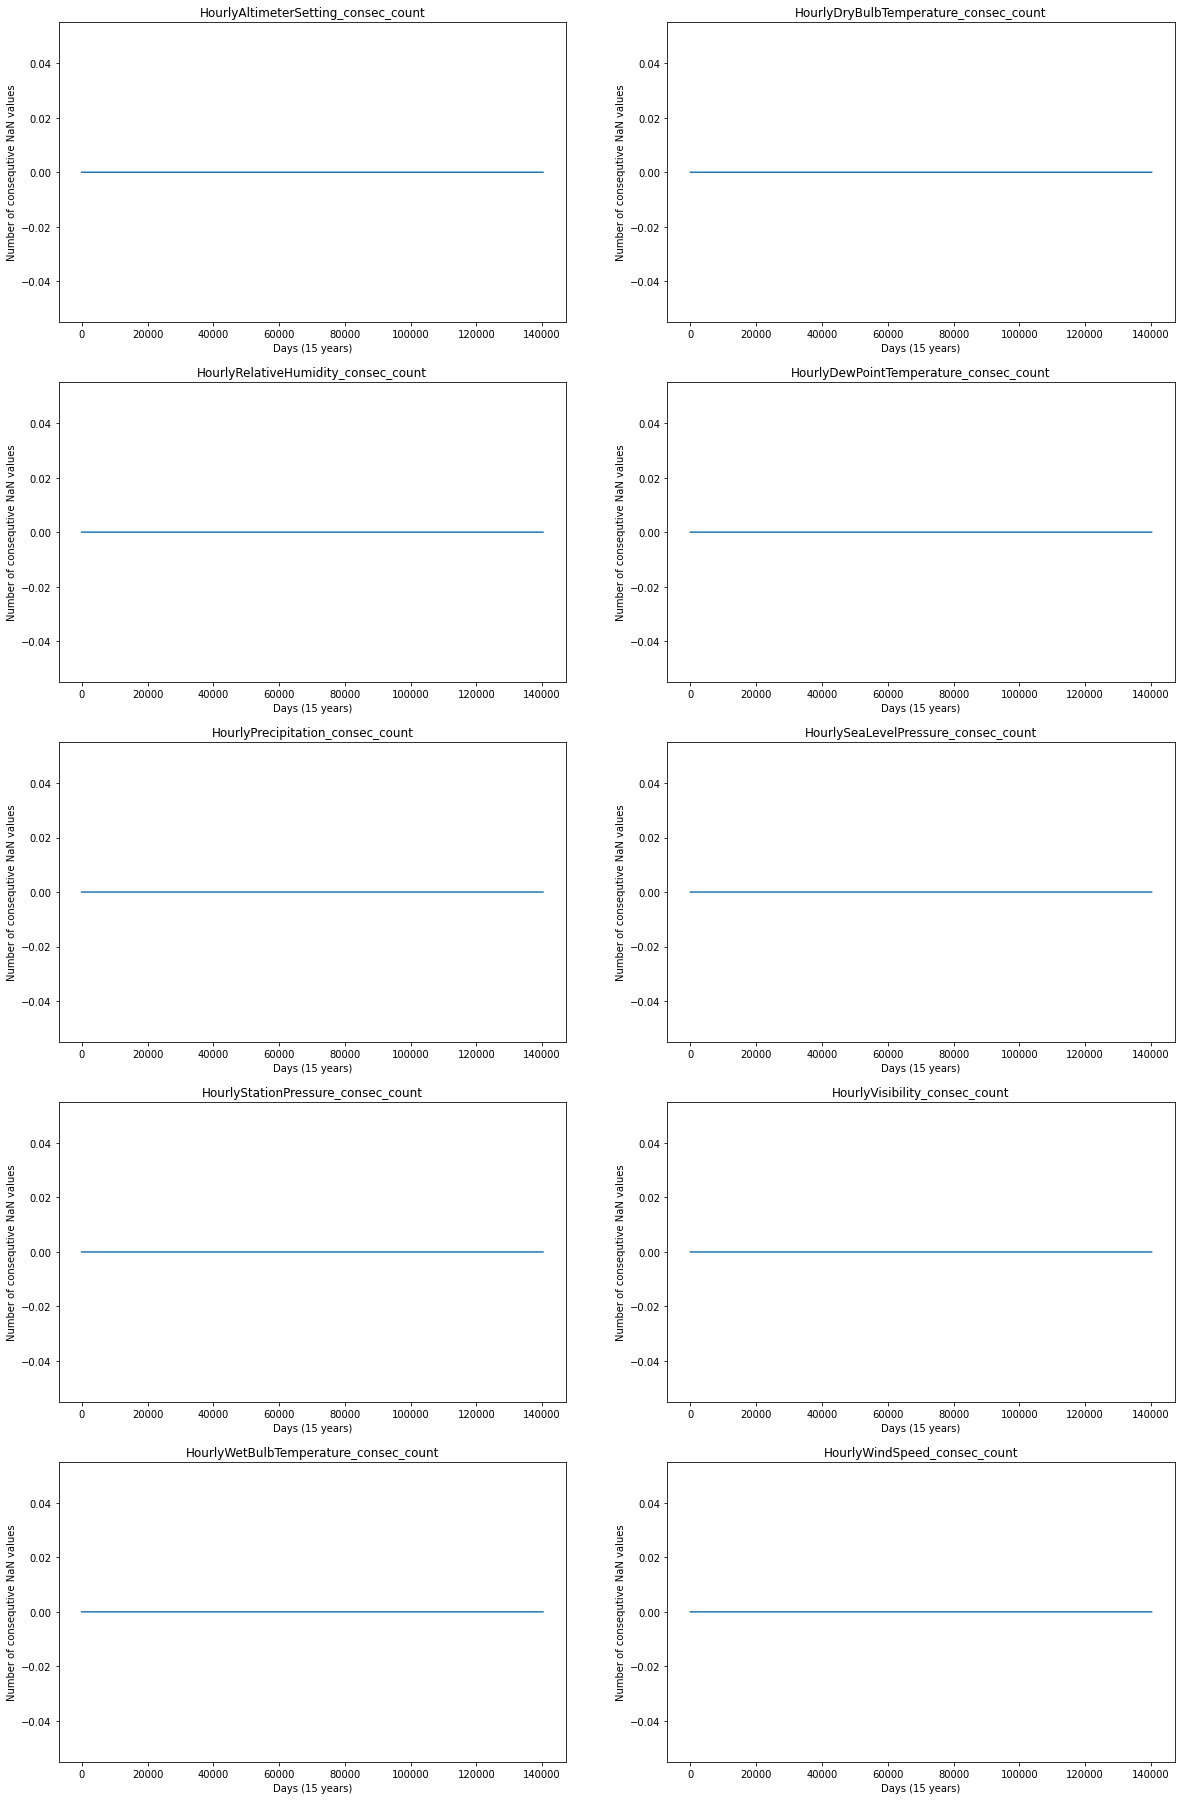

In [138]:
fig, axes = plt.subplots(5, 2, figsize=(20, 32))

#sns.histplot(ax=axes[0,0],x= df.HourlyDryBulbTemperature,color='red')
#df_nan_count['HourlyAltimeterSetting'].plot(ax=axes[0,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')


df_nan_count['HourlyAltimeterSetting_consec_count'].plot(ax=axes[0,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyDryBulbTemperature_consec_count'].plot(ax=axes[0,1],kind='line', title='HourlyDryBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyRelativeHumidity_consec_count'].plot(ax=axes[1,0],kind='line', title='HourlyRelativeHumidity_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyAltimeterSetting_consec_count'].plot(ax=axes[1,0],kind='line', title='HourlyAltimeterSetting_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyDewPointTemperature_consec_count'].plot(ax=axes[1,1],kind='line', title='HourlyDewPointTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyDryBulbTemperature_consec_count'].plot(ax=axes[1,1],kind='line', title='HourlyDryBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyPrecipitation_consec_count'].plot(ax=axes[2,0],kind='line', title='HourlyPrecipitation_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyRelativeHumidity_consec_count'].plot(ax=axes[2,0],kind='line', title='HourlyRelativeHumidity_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlySeaLevelPressure_consec_count'].plot(ax=axes[2,1],kind='line', title='HourlySeaLevelPressure_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyStationPressure_consec_count'].plot(ax=axes[3,0],kind='line', title='HourlyStationPressure_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyVisibility_consec_count'].plot(ax=axes[3,1],kind='line', title='HourlyVisibility_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWetBulbTemperature_consec_count'].plot(ax=axes[4,0],kind='line', title='HourlyWetBulbTemperature_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
# df_nan_count['HourlyWindDirection_consec_count'].plot(ax=axes[4,1],kind='line', title='HourlyWindDirection_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')
df_nan_count['HourlyWindSpeed_consec_count'].plot(ax=axes[4,1],kind='line', title='HourlyWindSpeed_consec_count', xlabel='Days (15 years)', ylabel='Number of consequtive NaN values')

#### And also verify percentage:

In [142]:
percent_missing = weather_data_final.isnull().sum() * 100 / len(weather_data_final)
missing_value_df = pd.DataFrame({'column_name': weather_data_final.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
Date_only                                  Date_only              0.0
HOUR                                            HOUR              0.0
HourlyAltimeterSetting        HourlyAltimeterSetting              0.0
HourlyDewPointTemperature  HourlyDewPointTemperature              0.0
HourlyDryBulbTemperature    HourlyDryBulbTemperature              0.0
HourlyPrecipitation              HourlyPrecipitation              0.0
HourlyRelativeHumidity        HourlyRelativeHumidity              0.0
HourlySeaLevelPressure        HourlySeaLevelPressure              0.0
HourlyStationPressure          HourlyStationPressure              0.0
HourlyVisibility                    HourlyVisibility              0.0
HourlyWetBulbTemperature    HourlyWetBulbTemperature              0.0
HourlyWindSpeed                      HourlyWindSpeed              0.0

#### It's good, so let us save it

In [143]:
weather_data_final.to_csv("main_data/weather_data_final.csv", index=False)

# Data Visualization Part:

# [Aishwarya and Sarang]

In [144]:
df = weather_data_final.copy(deep=True)
df['Date_only'] = pd.to_datetime(df['Date_only'])

In [145]:
df

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0      2005-01-01     0                   30.27                       39.0   
1      2005-01-01     1                   30.26                       39.0   
2      2005-01-01     2                   30.28                       39.0   
3      2005-01-01     3                   30.27                       39.0   
4      2005-01-01     4                   30.27                       39.0   
...           ...   ...                     ...                        ...   
140251 2020-12-31    19                   30.34                       29.0   
140252 2020-12-31    20                   30.38                       28.0   
140253 2020-12-31    21                   30.39                       28.0   
140254 2020-12-31    22                   30.41                       27.0   
140255 2020-12-31    23                   30.41                       27.0   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                           46.0                  0.0                    77.0   
1                           45.5                  0.0                    78.5   
2                           44.0                  0.0                    83.0   
3                           45.0                  0.0                    80.0   
4                           43.0                  0.0                    86.0   
...                          ...                  ...                     ...   
140251                      42.0                  0.0                    60.0   
140252                      41.0                  0.0                    60.0   
140253                      39.0                  0.0                    65.0   
140254                      38.0                  0.0                    65.0   
140255                      37.0                  0.0                    67.0   

        HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                       30.270                 30.100             10.00   
1                       30.265                 30.095              9.97   
2                       30.280                 30.110             10.00   
3                       30.270                 30.100             10.00   
4                       30.270                 30.100              8.00   
...                        ...                    ...               ...   
140251                  30.335                 30.145              9.97   
140252                  30.370                 30.210             10.00   
140253                  30.390                 30.220             10.00   
140254                  30.410                 30.240             10.00   
140255                  30.410                 30.240             10.00   

        HourlyWetBulbTemperature  HourlyWindSpeed  
0                           43.0              3.0  
1                           42.5              1.5  
2                           42.0              0.0  
3                           42.0              5.0  
4                           41.0              0.0  
...                          ...              ...  
140251                      36.5              5.5  
140252                      36.0              6.0  
140253                      35.0              5.0  
140254                      34.0              5.0  
140255                      33.0              3.0  

[140256 rows x 12 columns]

In [146]:
df_1 = df.copy()
df_1['Year'] = df_1['Date_only'].dt.year
df_1['month'] = df_1['Date_only'].dt.month
df_1['HOUR'] = df_1['HOUR']

In [147]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
#data = pd.read_csv("C:\\Users\\Vanshi\\Desktop\\bestsellers.csv")
  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap


#mp.imshow(df_dates, cmap='hot', interpolation='nearest')
#mp.show()

                               HOUR  HourlyAltimeterSetting  \
HOUR                       1.000000               -0.025646   
HourlyAltimeterSetting    -0.025646                1.000000   
HourlyDewPointTemperature  0.006070               -0.331457   
HourlyDryBulbTemperature   0.113069               -0.291908   
HourlyPrecipitation       -0.005013                0.104898   
HourlyRelativeHumidity    -0.211960               -0.149452   
HourlySeaLevelPressure    -0.025740                0.999574   
HourlyStationPressure     -0.023380                0.999335   
HourlyVisibility           0.091547                0.152589   
HourlyWetBulbTemperature   0.062480               -0.318803   
HourlyWindSpeed            0.081486               -0.224920   

                           HourlyDewPointTemperature  \
HOUR                                        0.006070   
HourlyAltimeterSetting                     -0.331457   
HourlyDewPointTemperature                   1.000000   
HourlyDryBulbTemper

# Data Visualization and EDA

# [Aishwarya and Karteek]

#### Let's generate Heat Map to see what features show high correlation based on heatmap built in algorithm

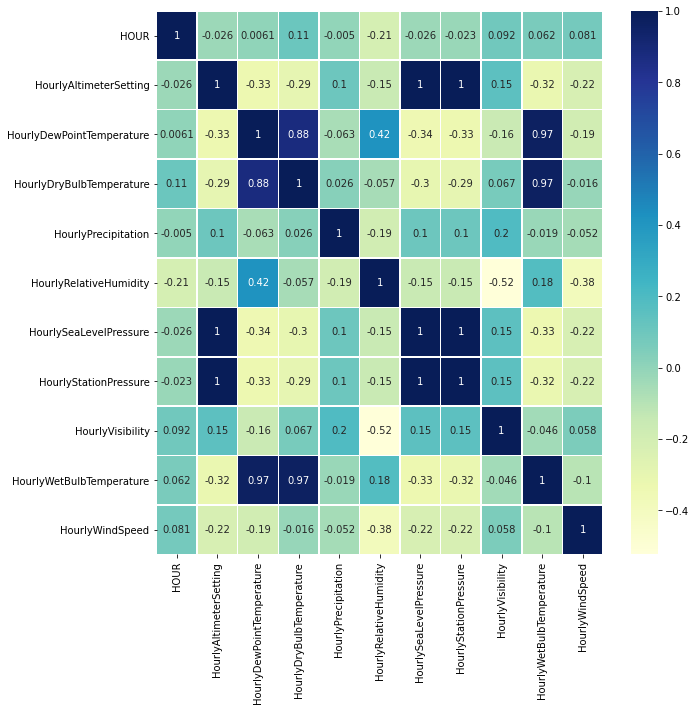

In [151]:
fig, ax = plt.subplots(figsize=(10,10))   
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidths=.5)
  
# displaying heatmap
mp.show()

In [152]:
df

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0      2005-01-01     0                   30.27                       39.0   
1      2005-01-01     1                   30.26                       39.0   
2      2005-01-01     2                   30.28                       39.0   
3      2005-01-01     3                   30.27                       39.0   
4      2005-01-01     4                   30.27                       39.0   
...           ...   ...                     ...                        ...   
140251 2020-12-31    19                   30.34                       29.0   
140252 2020-12-31    20                   30.38                       28.0   
140253 2020-12-31    21                   30.39                       28.0   
140254 2020-12-31    22                   30.41                       27.0   
140255 2020-12-31    23                   30.41                       27.0   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                           46.0                  0.0                    77.0   
1                           45.5                  0.0                    78.5   
2                           44.0                  0.0                    83.0   
3                           45.0                  0.0                    80.0   
4                           43.0                  0.0                    86.0   
...                          ...                  ...                     ...   
140251                      42.0                  0.0                    60.0   
140252                      41.0                  0.0                    60.0   
140253                      39.0                  0.0                    65.0   
140254                      38.0                  0.0                    65.0   
140255                      37.0                  0.0                    67.0   

        HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                       30.270                 30.100             10.00   
1                       30.265                 30.095              9.97   
2                       30.280                 30.110             10.00   
3                       30.270                 30.100             10.00   
4                       30.270                 30.100              8.00   
...                        ...                    ...               ...   
140251                  30.335                 30.145              9.97   
140252                  30.370                 30.210             10.00   
140253                  30.390                 30.220             10.00   
140254                  30.410                 30.240             10.00   
140255                  30.410                 30.240             10.00   

        HourlyWetBulbTemperature  HourlyWindSpeed  
0                           43.0              3.0  
1                           42.5              1.5  
2                           42.0              0.0  
3                           42.0              5.0  
4                           41.0              0.0  
...                          ...              ...  
140251                      36.5              5.5  
140252                      36.0              6.0  
140253                      35.0              5.0  
140254                      34.0              5.0  
140255                      33.0              3.0  

[140256 rows x 12 columns]

#### Visualizing the data and also checking if any anomalies appear in the dataset

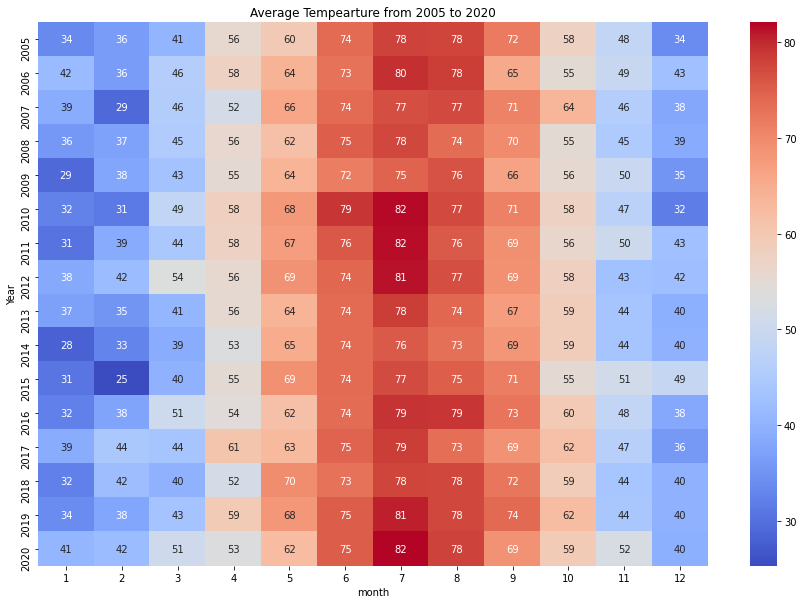

In [153]:
temp_year = pd.crosstab(df_1['Year'], df_1['month'], values=df_1['HourlyDryBulbTemperature'], aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture from 2005 to 2020")
plt.show()

### Let's look on the data overall and try to visualize it at the current state

In [154]:
df.head()

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0 2005-01-01     0                   30.27                       39.0   
1 2005-01-01     1                   30.26                       39.0   
2 2005-01-01     2                   30.28                       39.0   
3 2005-01-01     3                   30.27                       39.0   
4 2005-01-01     4                   30.27                       39.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                      46.0                  0.0                    77.0   
1                      45.5                  0.0                    78.5   
2                      44.0                  0.0                    83.0   
3                      45.0                  0.0                    80.0   
4                      43.0                  0.0                    86.0   

   HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                  30.270                 30.100             10.00   
1                  30.265                 30.095              9.97   
2                  30.280                 30.110             10.00   
3                  30.270                 30.100             10.00   
4                  30.270                 30.100              8.00   

   HourlyWetBulbTemperature  HourlyWindSpeed  
0                      43.0              3.0  
1                      42.5              1.5  
2                      42.0              0.0  
3                      42.0              5.0  
4                      41.0              0.0

In [155]:
df.shape

(140256, 12)

In [156]:
df.columns

Index(['Date_only', 'HOUR', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date_only                  140256 non-null  datetime64[ns]
 1   HOUR                       140256 non-null  int64         
 2   HourlyAltimeterSetting     140256 non-null  float64       
 3   HourlyDewPointTemperature  140256 non-null  float64       
 4   HourlyDryBulbTemperature   140256 non-null  float64       
 5   HourlyPrecipitation        140256 non-null  float64       
 6   HourlyRelativeHumidity     140256 non-null  float64       
 7   HourlySeaLevelPressure     140256 non-null  float64       
 8   HourlyStationPressure      140256 non-null  float64       
 9   HourlyVisibility           140256 non-null  float64       
 10  HourlyWetBulbTemperature   140256 non-null  float64       
 11  HourlyWindSpeed            140256 non-null  float64 

In [158]:
df.describe()

HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
count  140256.000000           140256.000000              140256.000000   
mean       11.500000               30.035355                  44.358038   
std         6.922211                0.221216                  19.117611   
min         0.000000               28.520000                 -16.000000   
25%         5.750000               29.900000                  29.000000   
50%        11.500000               30.030000                  46.000000   
75%        17.250000               30.175000                  61.000000   
max        23.000000               30.860000                  80.000000   

       HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
count             140256.000000        140256.000000           140256.000000   
mean                  56.827135            -0.067107               66.455456   
std                   18.415082             0.252963               20.477298   
min                    1.000000            -1.000000                9.000000   
25%                   42.000000             0.000000               50.000000   
50%                   58.000000             0.000000               67.000000   
75%                   72.000000             0.000000               85.000000   
max                  105.000000             1.713750              100.000000   

       HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
count           140256.000000          140256.000000     140256.000000   
mean                30.032855              29.863073          8.965525   
std                  0.222279               0.220207          2.269848   
min                 28.530000              28.350000          0.000000   
25%                 29.890000              29.725000          9.970000   
50%                 30.030000              29.860000         10.000000   
75%                 30.170000              30.000000         10.000000   
max                 30.860000              30.690000         12.500000   

       HourlyWetBulbTemperature  HourlyWindSpeed  
count             140256.000000    140256.000000  
mean                  50.704250         6.337978  
std                   16.533701         5.105682  
min                   -1.000000         0.000000  
25%                   37.000000         3.000000  
50%                   52.000000         6.000000  
75%                   65.000000         9.000000  
max                   83.000000        40.000000

#### Visualizing Non-Nan distribution, should be full bars:

Text(0, 0.5, 'Features')

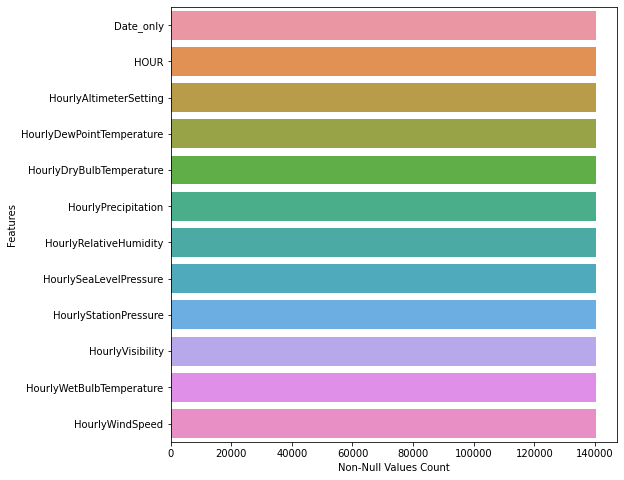

In [159]:
plt.figure(figsize=(8,8))
sns.barplot(x=df.count()[:],y=df.count().index)
plt.xlabel('Non-Null Values Count')
plt.ylabel('Features')

In [160]:
df_1 = df_1.set_index('Date_only',drop=True)
df_1.index.name = 'datetime'

In [161]:
df_1.head()

HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
datetime                                                              
2005-01-01     0                   30.27                       39.0   
2005-01-01     1                   30.26                       39.0   
2005-01-01     2                   30.28                       39.0   
2005-01-01     3                   30.27                       39.0   
2005-01-01     4                   30.27                       39.0   

            HourlyDryBulbTemperature  HourlyPrecipitation  \
datetime                                                    
2005-01-01                      46.0                  0.0   
2005-01-01                      45.5                  0.0   
2005-01-01                      44.0                  0.0   
2005-01-01                      45.0                  0.0   
2005-01-01                      43.0                  0.0   

            HourlyRelativeHumidity  HourlySeaLevelPressure  \
datetime                                                     
2005-01-01                    77.0                  30.270   
2005-01-01                    78.5                  30.265   
2005-01-01                    83.0                  30.280   
2005-01-01                    80.0                  30.270   
2005-01-01                    86.0                  30.270   

            HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
datetime                                                                        
2005-01-01                 30.100             10.00                      43.0   
2005-01-01                 30.095              9.97                      42.5   
2005-01-01                 30.110             10.00                      42.0   
2005-01-01                 30.100             10.00                      42.0   
2005-01-01                 30.100              8.00                      41.0   

            HourlyWindSpeed  Year  month  
datetime                                  
2005-01-01              3.0  2005      1  
2005-01-01              1.5  2005      1  
2005-01-01              0.0  2005      1  
2005-01-01              5.0  2005      1  
2005-01-01              0.0  2005      1

#### Plotting Temperature flow across 2005-2020 years and looking for outlies, if any:

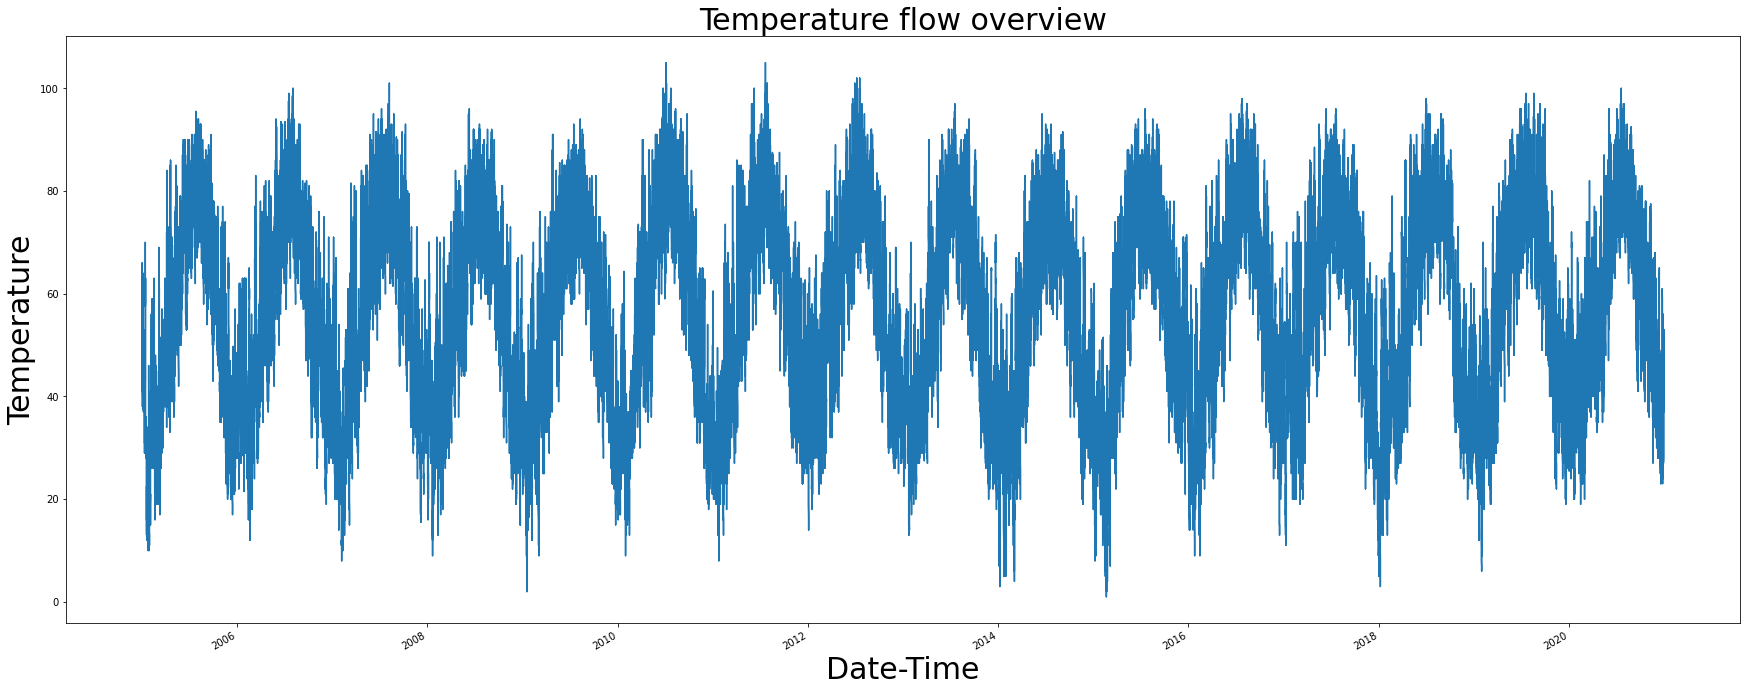

In [162]:
fig, ax = plt.subplots()
df_1['HourlyDryBulbTemperature'].plot(figsize=(30,12),ax=ax)
ax.set_xlabel('Date-Time', size=30)
ax.set_ylabel('Temperature', size=30)
ax.set_title('Temperature flow overview', size=30)
plt.show()

In [163]:
df_1.head()

HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
datetime                                                              
2005-01-01     0                   30.27                       39.0   
2005-01-01     1                   30.26                       39.0   
2005-01-01     2                   30.28                       39.0   
2005-01-01     3                   30.27                       39.0   
2005-01-01     4                   30.27                       39.0   

            HourlyDryBulbTemperature  HourlyPrecipitation  \
datetime                                                    
2005-01-01                      46.0                  0.0   
2005-01-01                      45.5                  0.0   
2005-01-01                      44.0                  0.0   
2005-01-01                      45.0                  0.0   
2005-01-01                      43.0                  0.0   

            HourlyRelativeHumidity  HourlySeaLevelPressure  \
datetime                                                     
2005-01-01                    77.0                  30.270   
2005-01-01                    78.5                  30.265   
2005-01-01                    83.0                  30.280   
2005-01-01                    80.0                  30.270   
2005-01-01                    86.0                  30.270   

            HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
datetime                                                                        
2005-01-01                 30.100             10.00                      43.0   
2005-01-01                 30.095              9.97                      42.5   
2005-01-01                 30.110             10.00                      42.0   
2005-01-01                 30.100             10.00                      42.0   
2005-01-01                 30.100              8.00                      41.0   

            HourlyWindSpeed  Year  month  
datetime                                  
2005-01-01              3.0  2005      1  
2005-01-01              1.5  2005      1  
2005-01-01              0.0  2005      1  
2005-01-01              5.0  2005      1  
2005-01-01              0.0  2005      1

In [164]:
def plotAggregateValues(data,df_1,column=None):
  if column in data.columns:
    plt.figure(figsize = (18,25))
    newdata = df_1.copy()
    ax1 = plt.subplot(4,2,1)
    newdata[column].groupby(newdata['Year']).mean().plot(ax=ax1,title='yearly mean values')
    ax1.set_xlabel('Years', size=20)
    ax1.set_ylabel(column, size=15)
  
    ax2 = plt.subplot(4,2,2)
    newdata[column].groupby(newdata['month']).mean().plot(ax=ax2,title='monthly mean values')
    ax2.set_xlabel('Months', size=20)
    ax2.set_ylabel(column, size=15)
#     ax2.set_xlim(left=0)
    plt.xlim(xmin=0)

    
    ax4 = plt.subplot(4,2,4)
    newdata[column].groupby(newdata['HOUR']).mean().plot(ax=ax4,title='hourly mean values')
    ax4.set_xlabel('Hours', size=20)
    ax4.set_ylabel(column, size=15)
#     ax4.set_xlim(left=0)
    plt.xlim(xmin=0)

  else:
    print("Column name not specified or Column not in the data")

#### Plotting Target variable across Years, Months, and Hours, separately:

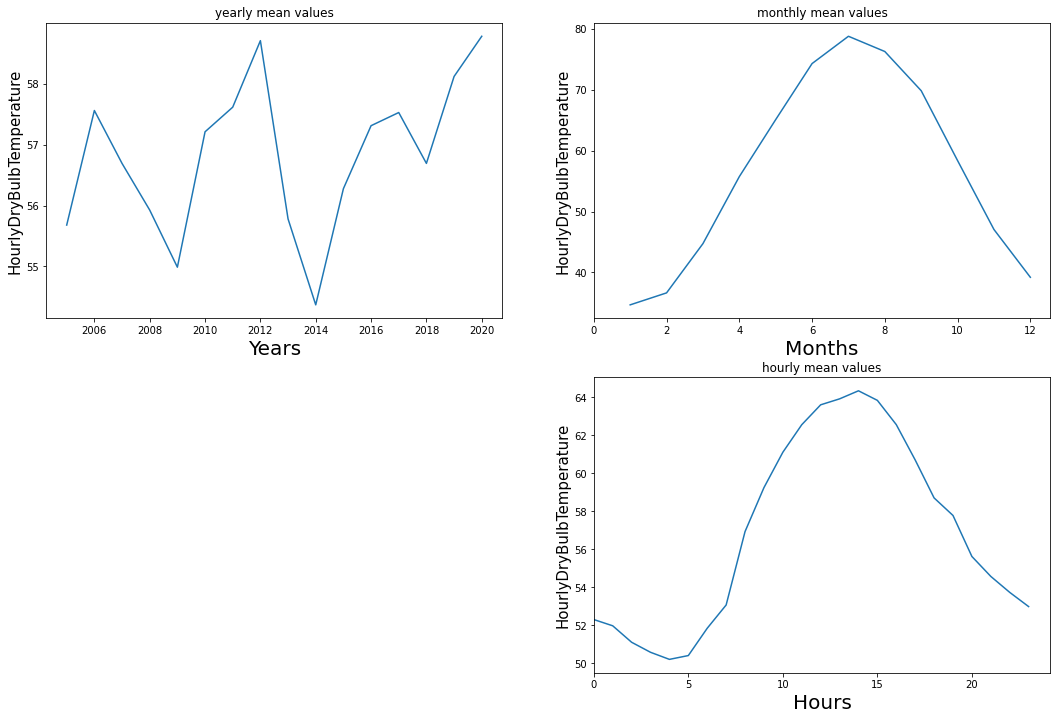

In [165]:
plotAggregateValues(df,df_1,'HourlyDryBulbTemperature')

### We can see the temp is highest in 7th month between 5 and 6th and low temp at start and end of month due to winter, 
### Temp is high everyday at noon 12 to 15 hours and low temp during night hours

In [166]:
def plotBoxNdendity(data,col=None):
  if col in data.columns:    
    plt.figure(figsize=(18,8))

    ax1 = plt.subplot(121)
    data.boxplot(col,ax=ax1)
    ax1.set_ylabel('Boxplot temperature levels in KBWI', fontsize=10, size=20)
#     ax1.set_xlabel('Hourly Dry Bulb Temperature', size=20)

    ax2 = plt.subplot(122)
    data[col].plot(ax=ax2,legend=True,kind='density')
    ax2.set_ylabel('Temperature distribution in KBWI', fontsize=10, size=20)
    ax2.set_xlabel('Hourly Dry Bulb Temperature', size=20)

  else:
    print("Column not in the data")

#### Outlier check and taget feature distribution:

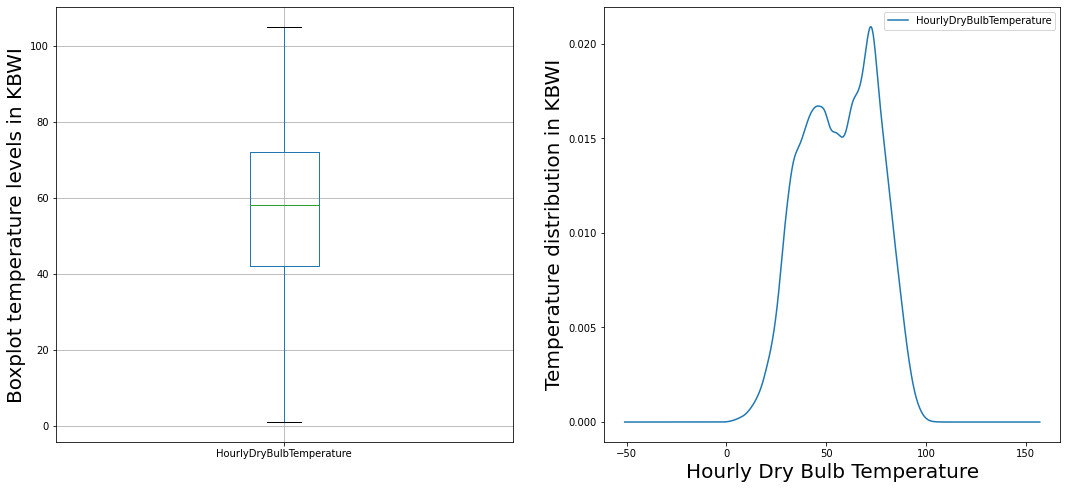

In [168]:
plotBoxNdendity(df,'HourlyDryBulbTemperature')

#### Plotting Dry | Wet | Temperatures and Humidity acorss months:

(array([20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

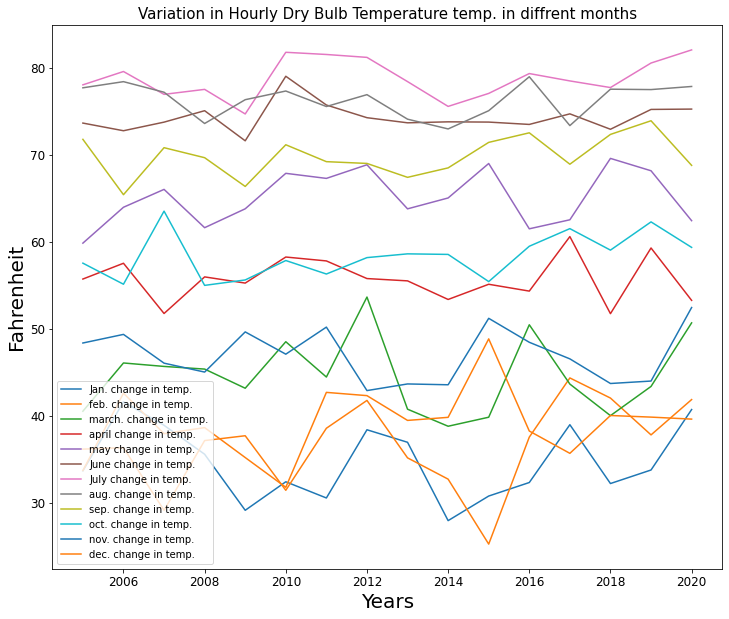

In [173]:
df_2 = df_1.reset_index()
df_2['Formatted Date'] = pd.to_datetime(df_1.index,utc = True)
df_2['month'] = df_2['Formatted Date'].dt.month
df_2['year'] = df_2['Formatted Date'].dt.year

data3 = df_2.groupby(['month','year']).mean()

plt.figure(figsize=(12,10))
a = np.arange(2005,2021)
plt.plot(a,data3['HourlyDryBulbTemperature'][:16].values, label = 'Jan. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][16:32].values, label = 'feb. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][32:48].values, label = 'march. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][48:64].values, label = 'april change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][64:80].values, label = 'may change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][80:96].values, label = 'June change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][96:112].values, label = 'July change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][112:128].values, label = 'aug. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][128:144].values, label = 'sep. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][144:160].values, label = 'oct. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][160:176].values, label = 'nov. change in temp.')
plt.plot(a,data3['HourlyDryBulbTemperature'][176:192].values, label = 'dec. change in temp.')
plt.xlabel("Years",size=20)
plt.ylabel("Fahrenheit",size=20)
#plt.xlabel(np.arange(2005,2020), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Hourly Dry Bulb Temperature temp. in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

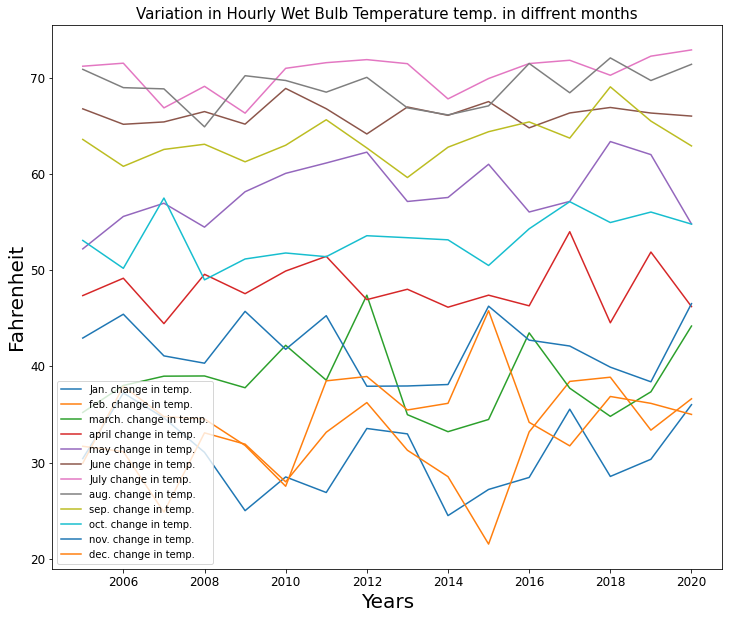

In [174]:
plt.figure(figsize=(12,10))
a = np.arange(2005,2021)
plt.plot(a,data3['HourlyWetBulbTemperature'][:16].values, label = 'Jan. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][16:32].values, label = 'feb. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][32:48].values, label = 'march. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][48:64].values, label = 'april change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][64:80].values, label = 'may change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][80:96].values, label = 'June change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][96:112].values, label = 'July change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][112:128].values, label = 'aug. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][128:144].values, label = 'sep. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][144:160].values, label = 'oct. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][160:176].values, label = 'nov. change in temp.')
plt.plot(a,data3['HourlyWetBulbTemperature'][176:192].values, label = 'dec. change in temp.')
plt.xlabel("Years",size=20)
plt.ylabel("Fahrenheit",size=20)
#plt.xlabel(np.arange(2006,2017), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Hourly Wet Bulb Temperature temp. in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([45., 50., 55., 60., 65., 70., 75., 80., 85., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

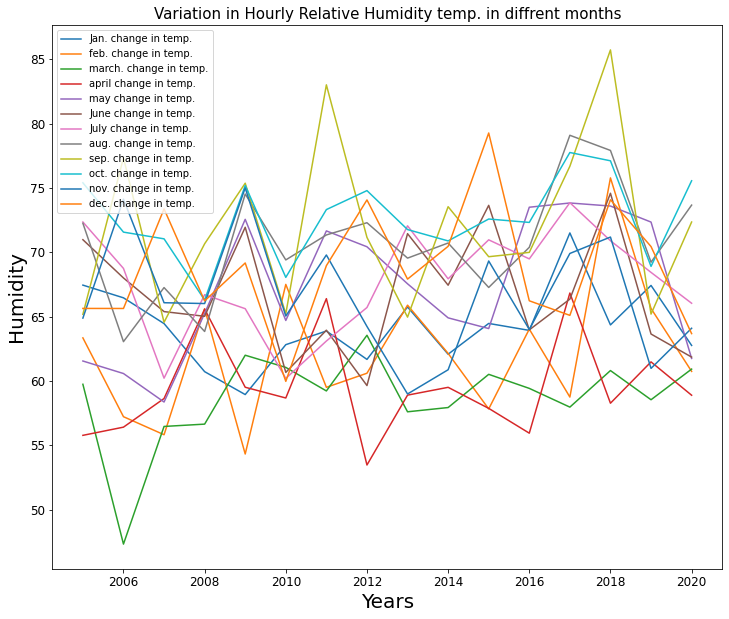

In [175]:
plt.figure(figsize=(12,10))
a = np.arange(2005,2021)
plt.plot(a,data3['HourlyRelativeHumidity'][:16].values, label = 'Jan. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][16:32].values, label = 'feb. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][32:48].values, label = 'march. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][48:64].values, label = 'april change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][64:80].values, label = 'may change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][80:96].values, label = 'June change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][96:112].values, label = 'July change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][112:128].values, label = 'aug. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][128:144].values, label = 'sep. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][144:160].values, label = 'oct. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][160:176].values, label = 'nov. change in temp.')
plt.plot(a,data3['HourlyRelativeHumidity'][176:192].values, label = 'dec. change in temp.')
plt.xlabel("Years",size=20)
plt.ylabel("Humidity",size=20)
#plt.xlabel(np.arange(2005,2020), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Hourly Relative Humidity temp. in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#### Histogram plot for all features

Text(0.5, 1.0, 'HourlyStationPressure')

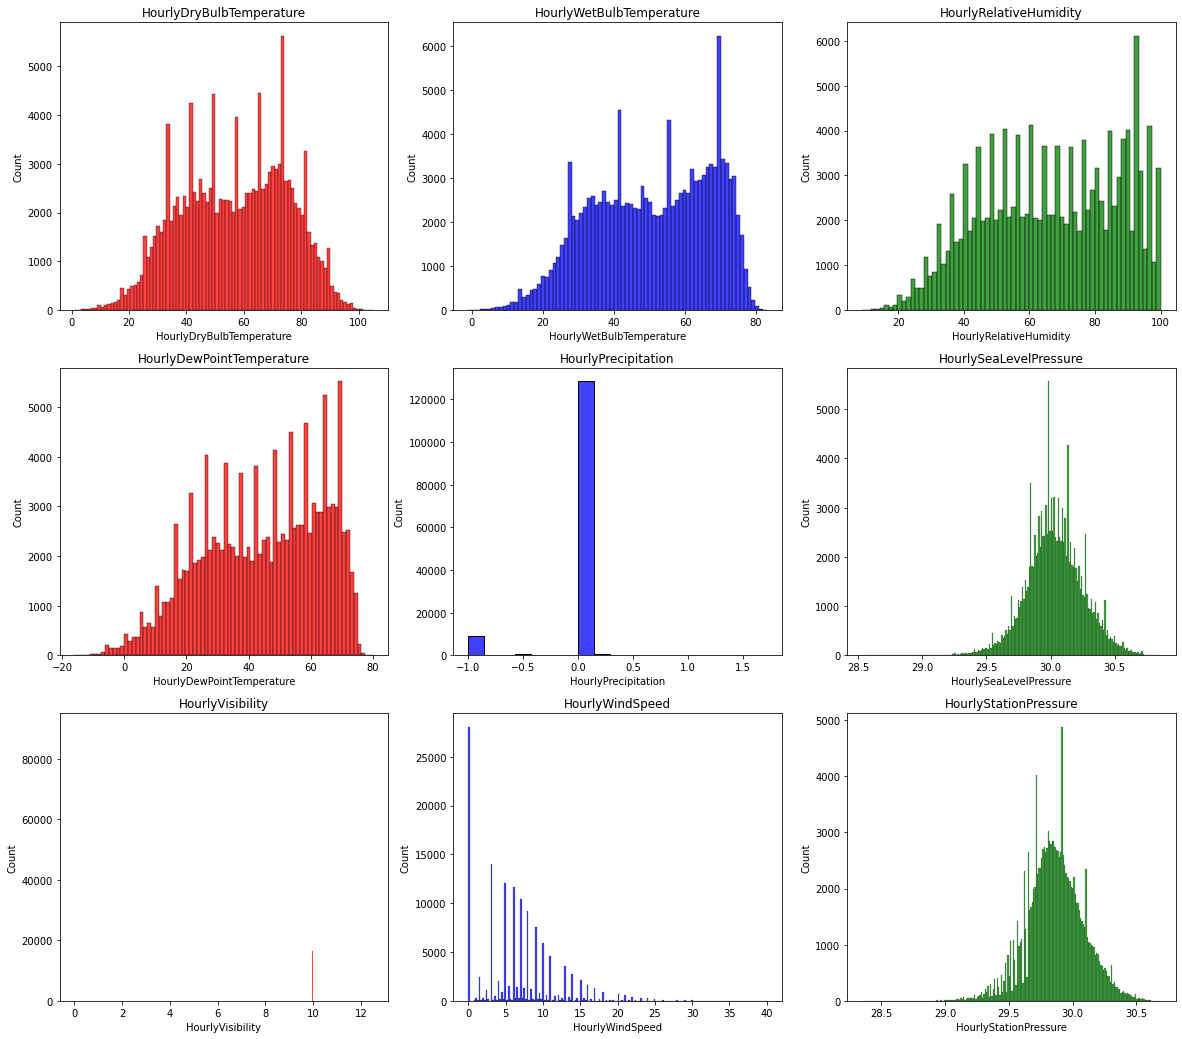

In [186]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

sns.histplot(ax=axes[0,0],x= df.HourlyDryBulbTemperature,color='red')
axes[0,0].set_title('HourlyDryBulbTemperature')


sns.histplot(ax=axes[0,1],x= df.HourlyWetBulbTemperature,color='blue')
axes[0,1].set_title('HourlyWetBulbTemperature')

sns.histplot(ax=axes[0,2],x =df.HourlyRelativeHumidity,color='green')
axes[0,2].set_title('HourlyRelativeHumidity')



sns.histplot(ax=axes[1,0],x= df.HourlyDewPointTemperature,color='red')
axes[1,0].set_title('HourlyDewPointTemperature')


sns.histplot(ax=axes[1,1],x= df.HourlyPrecipitation,color='blue')
axes[1,1].set_title('HourlyPrecipitation')

sns.histplot(ax=axes[1,2],x =df.HourlySeaLevelPressure,color='green')
axes[1,2].set_title('HourlySeaLevelPressure')

sns.histplot(ax=axes[2,0],x= df.HourlyVisibility,color='red')
axes[2,0].set_title('HourlyVisibility')


sns.histplot(ax=axes[2,1],x= df.HourlyWindSpeed,color='blue')
axes[2,1].set_title('HourlyWindSpeed')

sns.histplot(ax=axes[2,2],x =df.HourlyStationPressure,color='green')
axes[2,2].set_title('HourlyStationPressure')

#### Target Varaible distribution across available years:

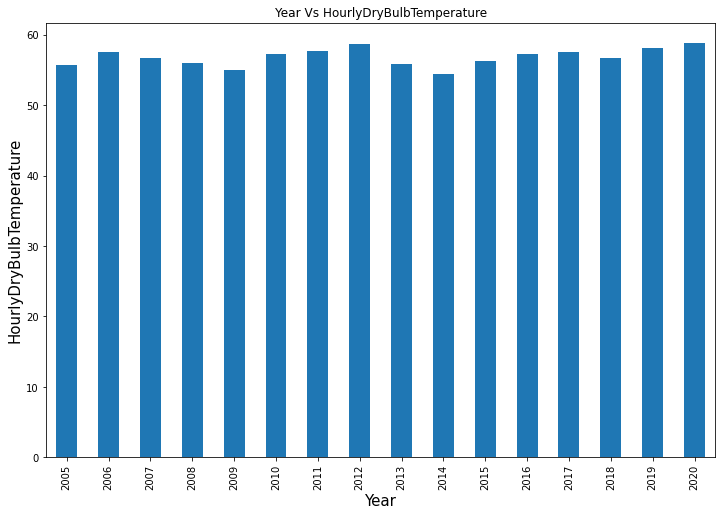

In [188]:
#df_grp= pd.DataFrame({'count' : df.groupby(['year'])['HourlyDryBulbTemperature'].mean()}).reset_index()
df_grp = df_1.groupby(['Year'])['HourlyDryBulbTemperature'].mean()
df_grp.plot.bar(x='year',y='HourlyDryBulbTemperature',figsize=(12,8))

plt.title('Year Vs HourlyDryBulbTemperature')
plt.xlabel('Year', size=15)
plt.ylabel('HourlyDryBulbTemperature', size=15)
plt.show()

#### Target Varaible distribution across available months:

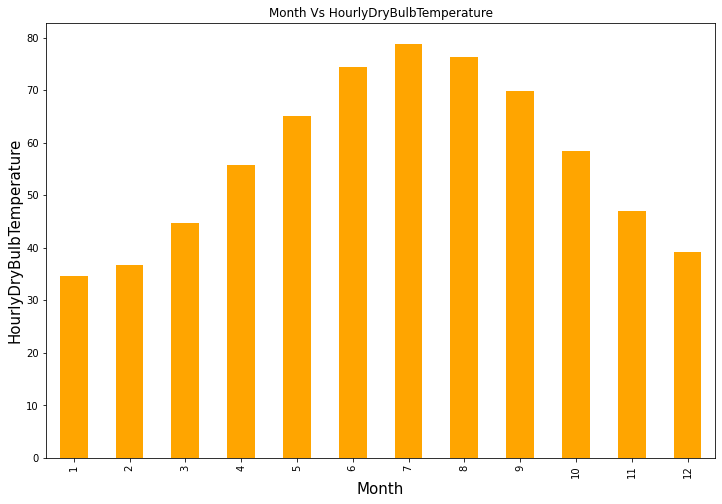

In [192]:
df_grp_1 = df_1.groupby(['month'])['HourlyDryBulbTemperature'].mean()
df_grp_1.plot.bar(x='month',y='HourlyDryBulbTemperature',figsize=(12,8), color='orange')

plt.title('Month Vs HourlyDryBulbTemperature')
plt.xlabel('Month', size=15)
plt.ylabel('HourlyDryBulbTemperature', size=15)
plt.show()

#### Target Varaible distribution across available hours:

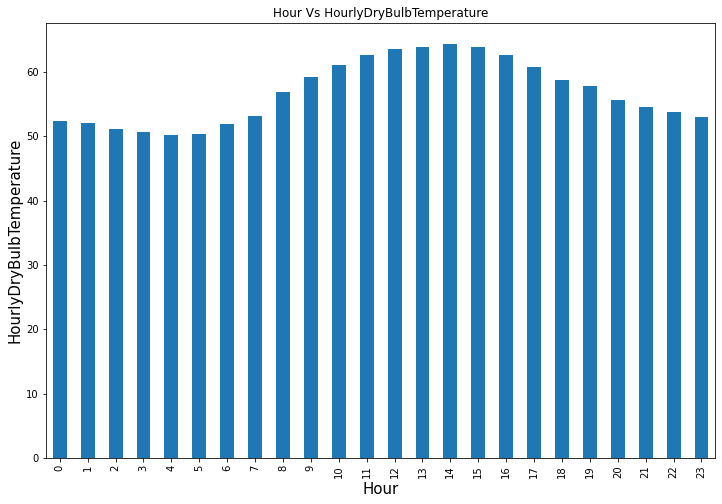

In [193]:
df_grp_2 = df_1.groupby(['HOUR'])['HourlyDryBulbTemperature'].mean()
df_grp_2.plot.bar(x='hour',y='HourlyDryBulbTemperature',figsize=(12,8))

plt.title('Hour Vs HourlyDryBulbTemperature')
plt.xlabel('Hour', size=15)
plt.ylabel('HourlyDryBulbTemperature', size=15)
plt.show()

# End of Data Visualization and EDA

____________________________________________________________________

# Additional Hypothesis and Data Correlation Overview

# [Spandana and Suvidha]

In [194]:
# weather_data_final.to_csv("main_data/weather_data_final.csv", index=False)
weather_data_final

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0       2005-01-01     0                   30.27                       39.0   
1       2005-01-01     1                   30.26                       39.0   
2       2005-01-01     2                   30.28                       39.0   
3       2005-01-01     3                   30.27                       39.0   
4       2005-01-01     4                   30.27                       39.0   
...            ...   ...                     ...                        ...   
140251  2020-12-31    19                   30.34                       29.0   
140252  2020-12-31    20                   30.38                       28.0   
140253  2020-12-31    21                   30.39                       28.0   
140254  2020-12-31    22                   30.41                       27.0   
140255  2020-12-31    23                   30.41                       27.0   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                           46.0                  0.0                    77.0   
1                           45.5                  0.0                    78.5   
2                           44.0                  0.0                    83.0   
3                           45.0                  0.0                    80.0   
4                           43.0                  0.0                    86.0   
...                          ...                  ...                     ...   
140251                      42.0                  0.0                    60.0   
140252                      41.0                  0.0                    60.0   
140253                      39.0                  0.0                    65.0   
140254                      38.0                  0.0                    65.0   
140255                      37.0                  0.0                    67.0   

        HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                       30.270                 30.100             10.00   
1                       30.265                 30.095              9.97   
2                       30.280                 30.110             10.00   
3                       30.270                 30.100             10.00   
4                       30.270                 30.100              8.00   
...                        ...                    ...               ...   
140251                  30.335                 30.145              9.97   
140252                  30.370                 30.210             10.00   
140253                  30.390                 30.220             10.00   
140254                  30.410                 30.240             10.00   
140255                  30.410                 30.240             10.00   

        HourlyWetBulbTemperature  HourlyWindSpeed  
0                           43.0              3.0  
1                           42.5              1.5  
2                           42.0              0.0  
3                           42.0              5.0  
4                           41.0              0.0  
...                          ...              ...  
140251                      36.5              5.5  
140252                      36.0              6.0  
140253                      35.0              5.0  
140254                      34.0              5.0  
140255                      33.0              3.0  

[140256 rows x 12 columns]

In [195]:
data1 = weather_data_final.copy(deep=True)

In [196]:
data1['Date_only'] = pd.to_datetime(data1['Date_only'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date_only                  140256 non-null  datetime64[ns]
 1   HOUR                       140256 non-null  int64         
 2   HourlyAltimeterSetting     140256 non-null  float64       
 3   HourlyDewPointTemperature  140256 non-null  float64       
 4   HourlyDryBulbTemperature   140256 non-null  float64       
 5   HourlyPrecipitation        140256 non-null  float64       
 6   HourlyRelativeHumidity     140256 non-null  float64       
 7   HourlySeaLevelPressure     140256 non-null  float64       
 8   HourlyStationPressure      140256 non-null  float64       
 9   HourlyVisibility           140256 non-null  float64       
 10  HourlyWetBulbTemperature   140256 non-null  float64       
 11  HourlyWindSpeed            140256 non-null  float64 

# Hourly relative humidity Vs Hourly Dry bulb temperature

Hypothesis Statement: As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When the temperature drops, relative humidity increases. Therefore, the temperature is directly related to the amount of moisture the atmosphere can hold.
Findings & Insights: The above hypothesis holds for our dataset, proving that humidity and temperature are inversely correlated.

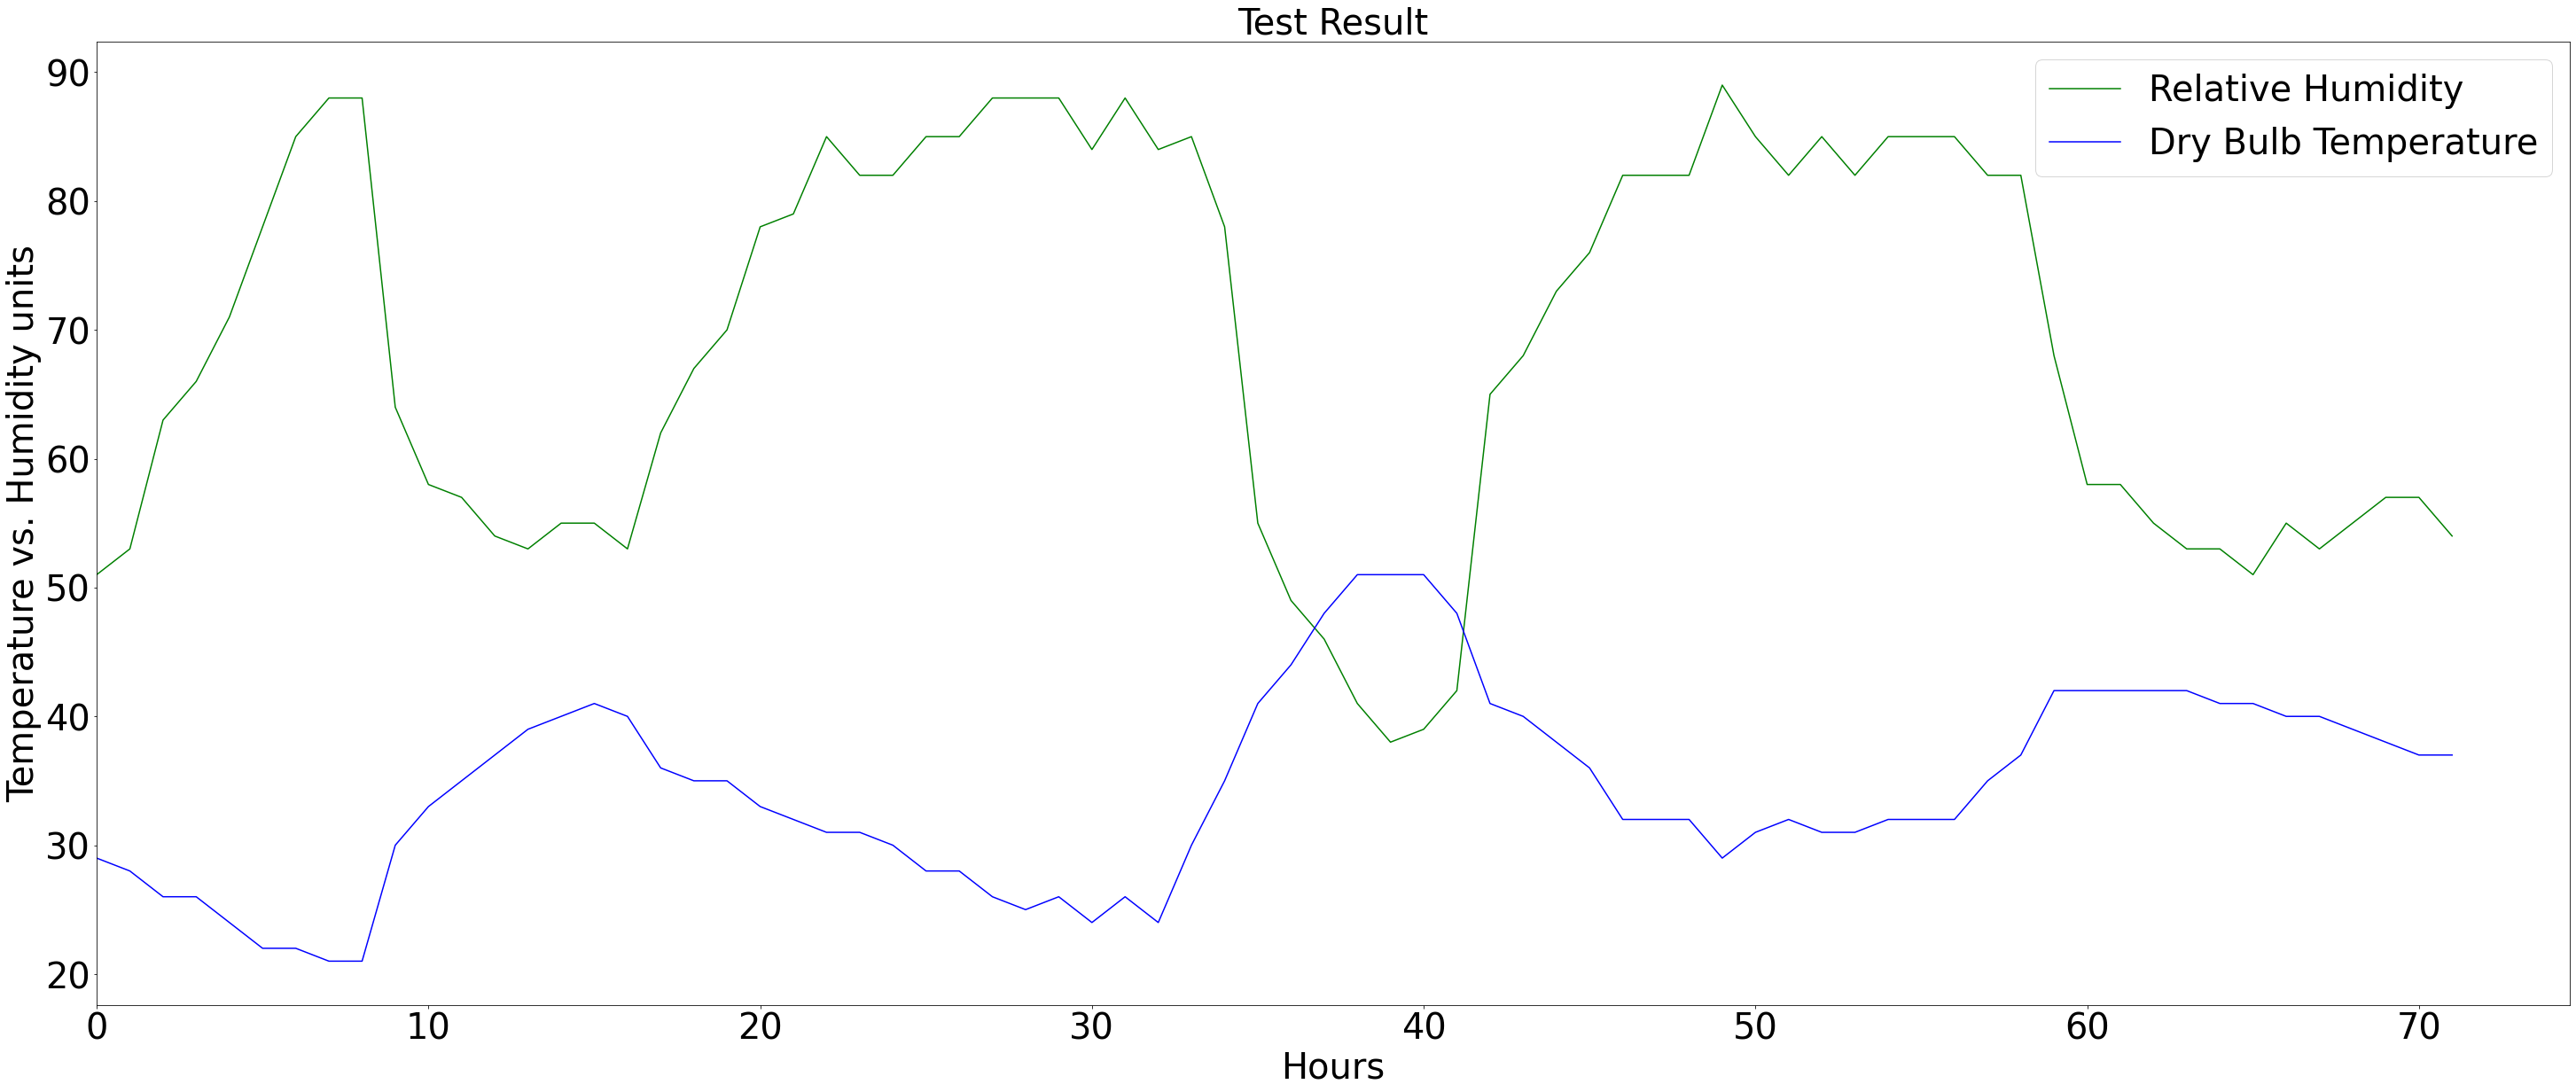

In [197]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(weather_df["HourlyRelativeHumidity"][:24*3], label='Relative Humidity', color='g')
plt.plot(weather_df["HourlyDryBulbTemperature"][:24*3], label='Dry Bulb Temperature', color='b')
# plt.xticks(hours_range)
plt.xlabel("Hours", size=40)
plt.ylabel("Temperature vs. Humidity units", size=40)
plt.tick_params(labelsize=40)
plt.xlim(xmin=0)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

# Hourly Station Pressure Vs Hourly Wind Speed

Hypothesis Statement: Station pressure is measured at a station without any adjustment. The wind is air pressure converted into movement of air. When air slows down, its pressure increases; higher wind speeds will show lower air pressure readings. Station pressure can impact the wind speed.
Findings & Insights: However, from the below graph, we can say that there is no correlation between wind speed and station pressure as wind speed lies in different frequencies and station pressure is uniform throughout, thus not following the ideal relationship as described.

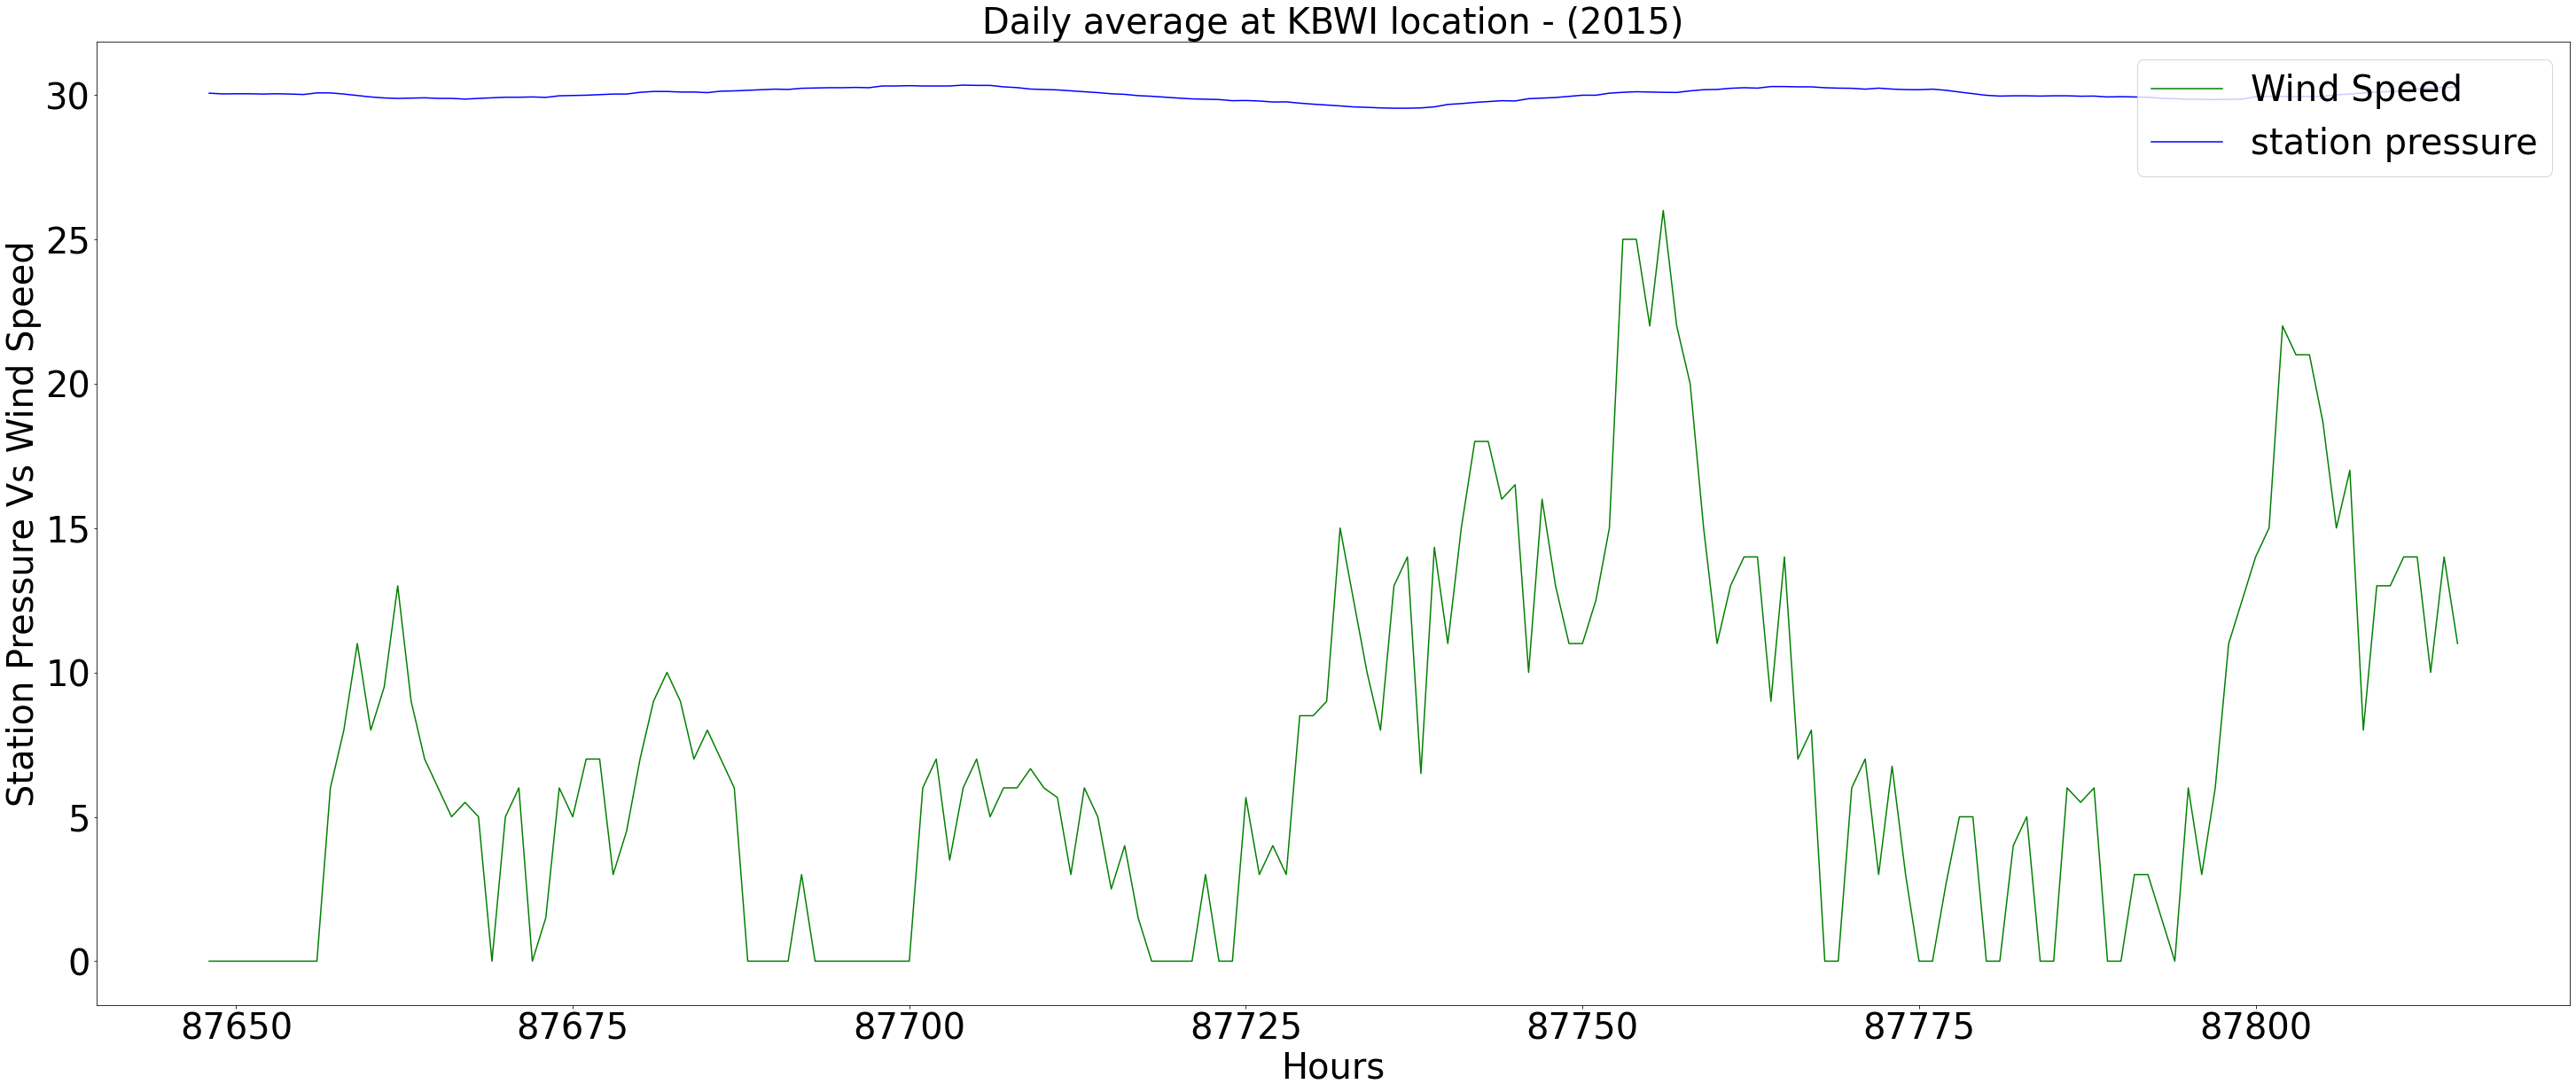

In [198]:
from matplotlib.pyplot import figure
Date_only = ['2015']
#data1['YEAR'] = data1['Date_only'].dt.year 
#data1_Bulb_Temp_2006 = main_weather_.loc[ main_weather_data['YEAR'] == 2006 ]

# data1['Date_only'] = pa.to_datetime(data1['Date_only'])
data1['YEAR'] = data1['Date_only'].dt.year 
df_wind_2015 = data1.loc[ data1['YEAR'] == 2015]
df_station_pressure_2015 = data1.loc[ data1['YEAR'] == 2015]

plt.figure(figsize=(50,20))
plt.title('Daily average at KBWI location - (2015)', fontsize=40)
plt.xlabel('Hours', fontsize=40)
plt.ylabel('Station Pressure Vs Wind Speed', fontsize=40)
plt.plot(df_wind_2015['HourlyWindSpeed'][:(24*7)],color = 'g',label = 'Wind Speed')
plt.plot(df_station_pressure_2015['HourlyStationPressure'][:(24*7)], color = 'b', label = 'station pressure')
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40}, loc='upper right')
plt.show()

# Dry bulb , Wet bulb and Dew point temperature

Hypothesis Statement: Temperatures are essential to determine the state of humid air. The wet-bulb temperature is always lower than the dry-bulb temperature but will be negatively correlated with relative humidity, so as the Dew|Dry|Wet temperatures.
Findings & Insights: Combining the dry bulb and wet bulb temperature gives the humid air. Looking at the below graph, we can say that both the dry bulb and the wet bulb are always inversely correlated to wet and dry bulb temperature and the wet bulb temp is always lower than the dry bulb.

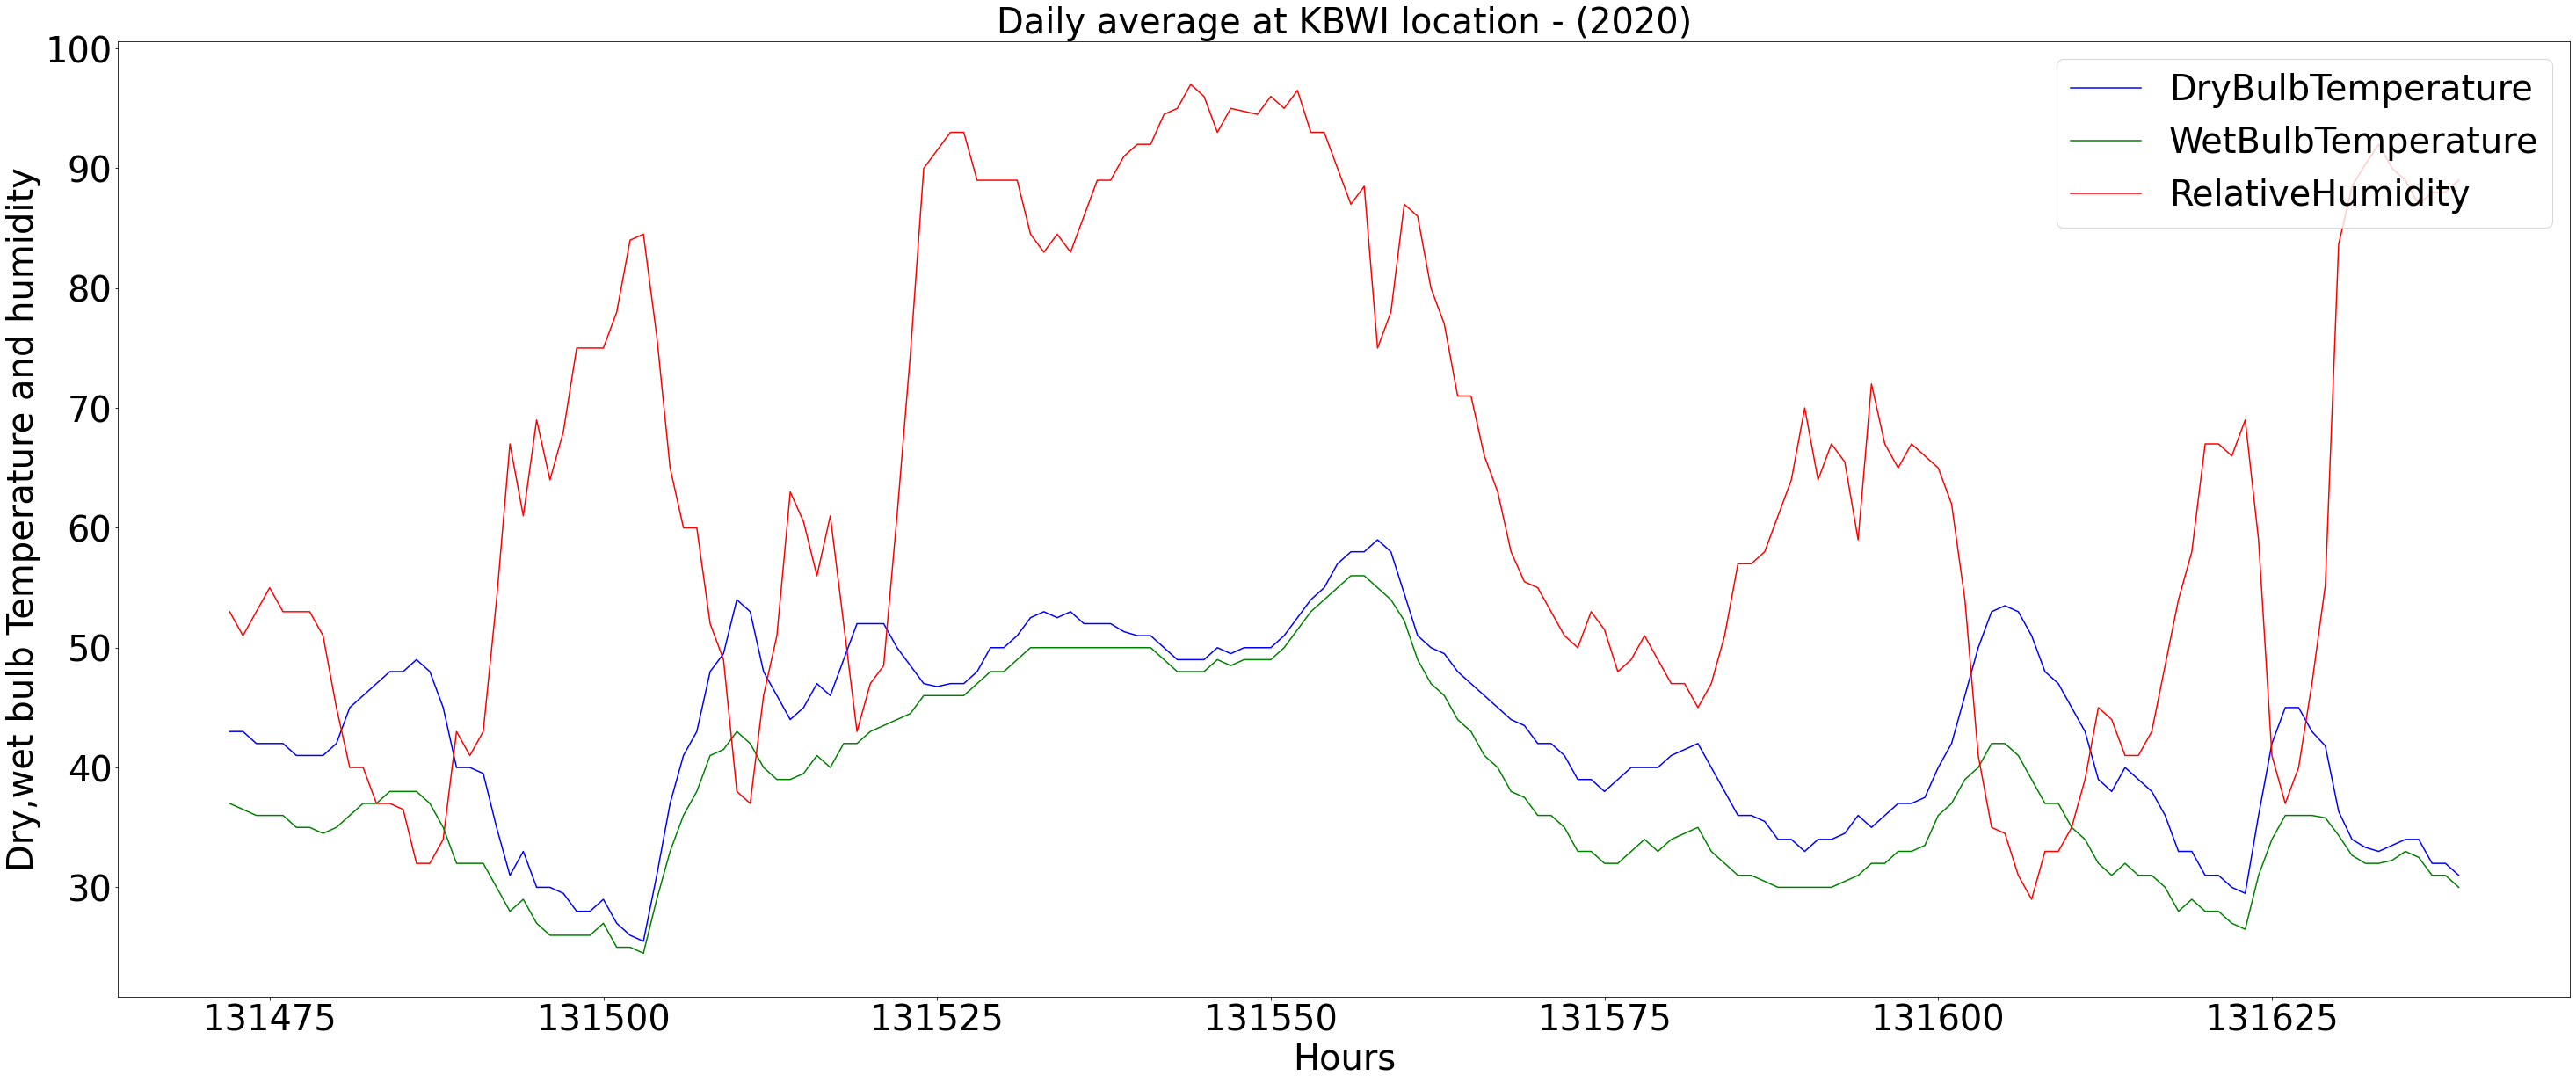

In [199]:
from matplotlib.pyplot import figure
Date_only = ['2020']

# data1['Date_only'] = pa.to_datetime(data1['Date_only'])
data1['YEAR'] = data1['Date_only'].dt.year 
df_dry_bulb_2020 = data1.loc[ data1['YEAR'] == 2020 ]
df_wet_bulb_2020 = data1.loc[ data1['YEAR'] == 2020 ]
df_rel_hum_2020 = data1.loc[ data1['YEAR'] == 2020 ]

plt.figure(figsize=(50,20))
plt.title('Daily average at KBWI location - (2020)', fontsize=40)
plt.xlabel('Hours', fontsize=40)
plt.ylabel('Dry,wet bulb Temperature and humidity', fontsize=40)
plt.plot(df_dry_bulb_2020['HourlyDryBulbTemperature'][:(24*7)], color = 'b', label = 'DryBulbTemperature')
plt.plot(df_wet_bulb_2020['HourlyWetBulbTemperature'][:(24*7)], color = 'g', label = 'WetBulbTemperature')
plt.plot(df_rel_hum_2020['HourlyRelativeHumidity'][:(24*7)], color = 'r', label = 'RelativeHumidity')
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40}, loc='upper right')
plt.show()

# Dew point Temperature and Relative Humidity

Hypothesis Statement: If the dew-point temperature is close to the air temperature, the relative humidity is high, and if the dew point is well below the air temperature, the relative humidity is low.The higher the dew point rises, the greater the amount of moisture in the air. Higher the dew points, the humidity is increasing.
Findings & Insights: We can consider this hypothesis acceptable as the below data graph follows the pattern of humidity going high if the dew point and dry bulb are close to each other.

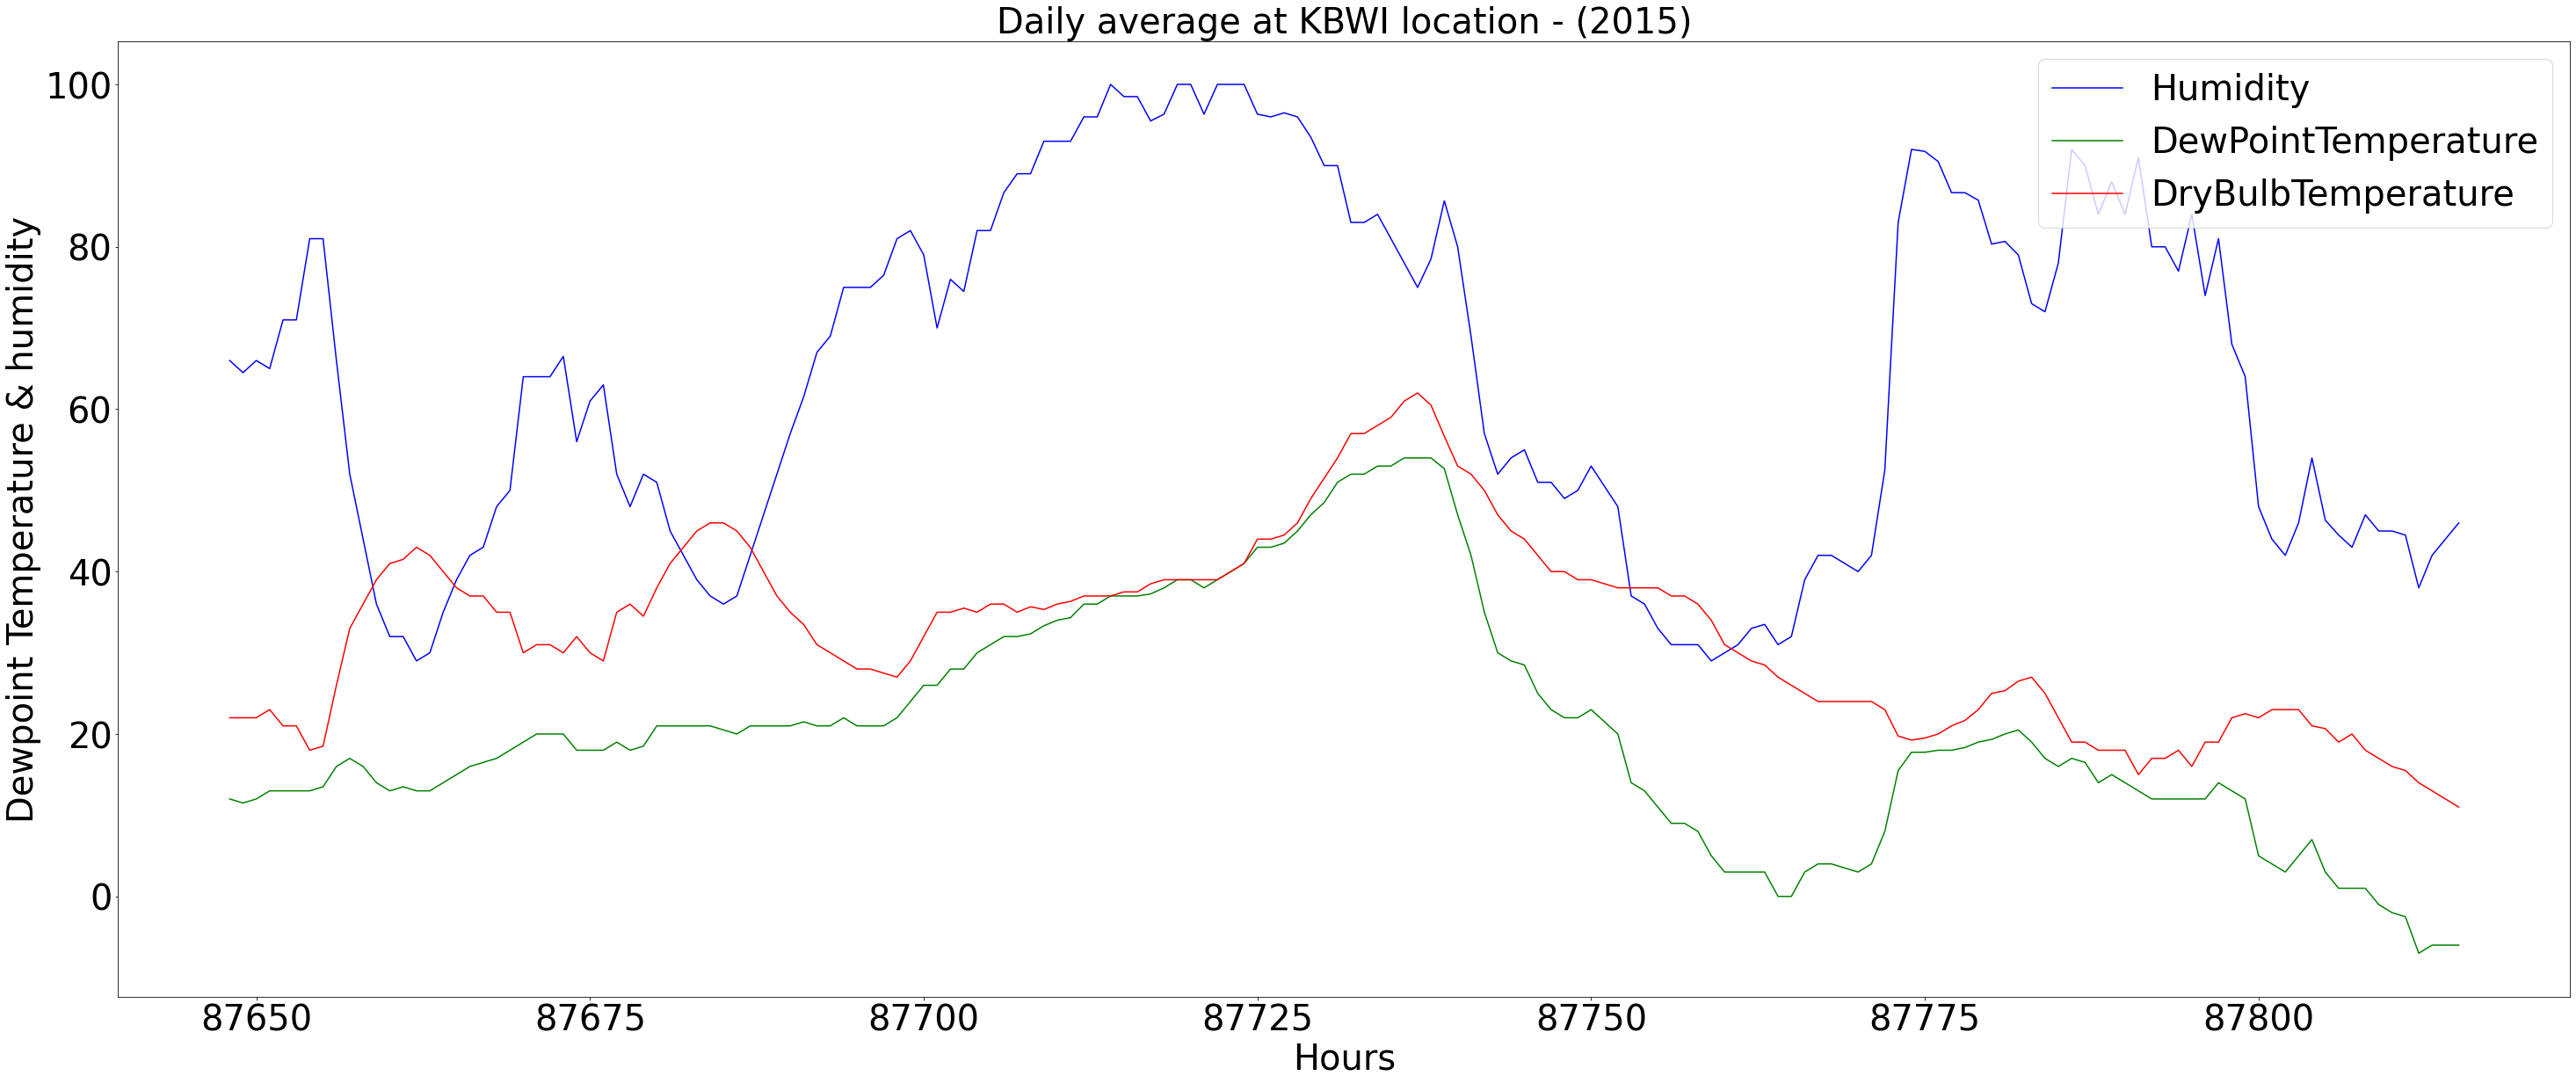

In [200]:
from matplotlib.pyplot import figure
Date_only = ['2015']

# data1['Date_only'] = pa.to_datetime(data1['Date_only'])
data1['YEAR'] = data1['Date_only'].dt.year 
df_rel_hum_2015 = data1.loc[ data1['YEAR'] == 2015 ]
df_dew_point_2015 = data1.loc[ data1['YEAR'] == 2015 ]
df_dry_bulb_2015 = data1.loc[ data1['YEAR'] == 2015 ]

plt.figure(figsize=(50,20))
plt.title('Daily average at KBWI location - (2015)', fontsize=40)
plt.xlabel('Hours', fontsize=40)
plt.ylabel('Dewpoint Temperature & humidity', fontsize=40)
plt.plot(df_rel_hum_2015['HourlyRelativeHumidity'][:(24*7)], color = 'b', label = 'Humidity')
plt.plot(df_dew_point_2015['HourlyDewPointTemperature'][:(24*7)], color = 'g', label = 'DewPointTemperature')
plt.plot(df_dry_bulb_2015['HourlyDryBulbTemperature'][:(24*7)], color = 'r', label = 'DryBulbTemperature')
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40}, loc='upper right')
plt.show()

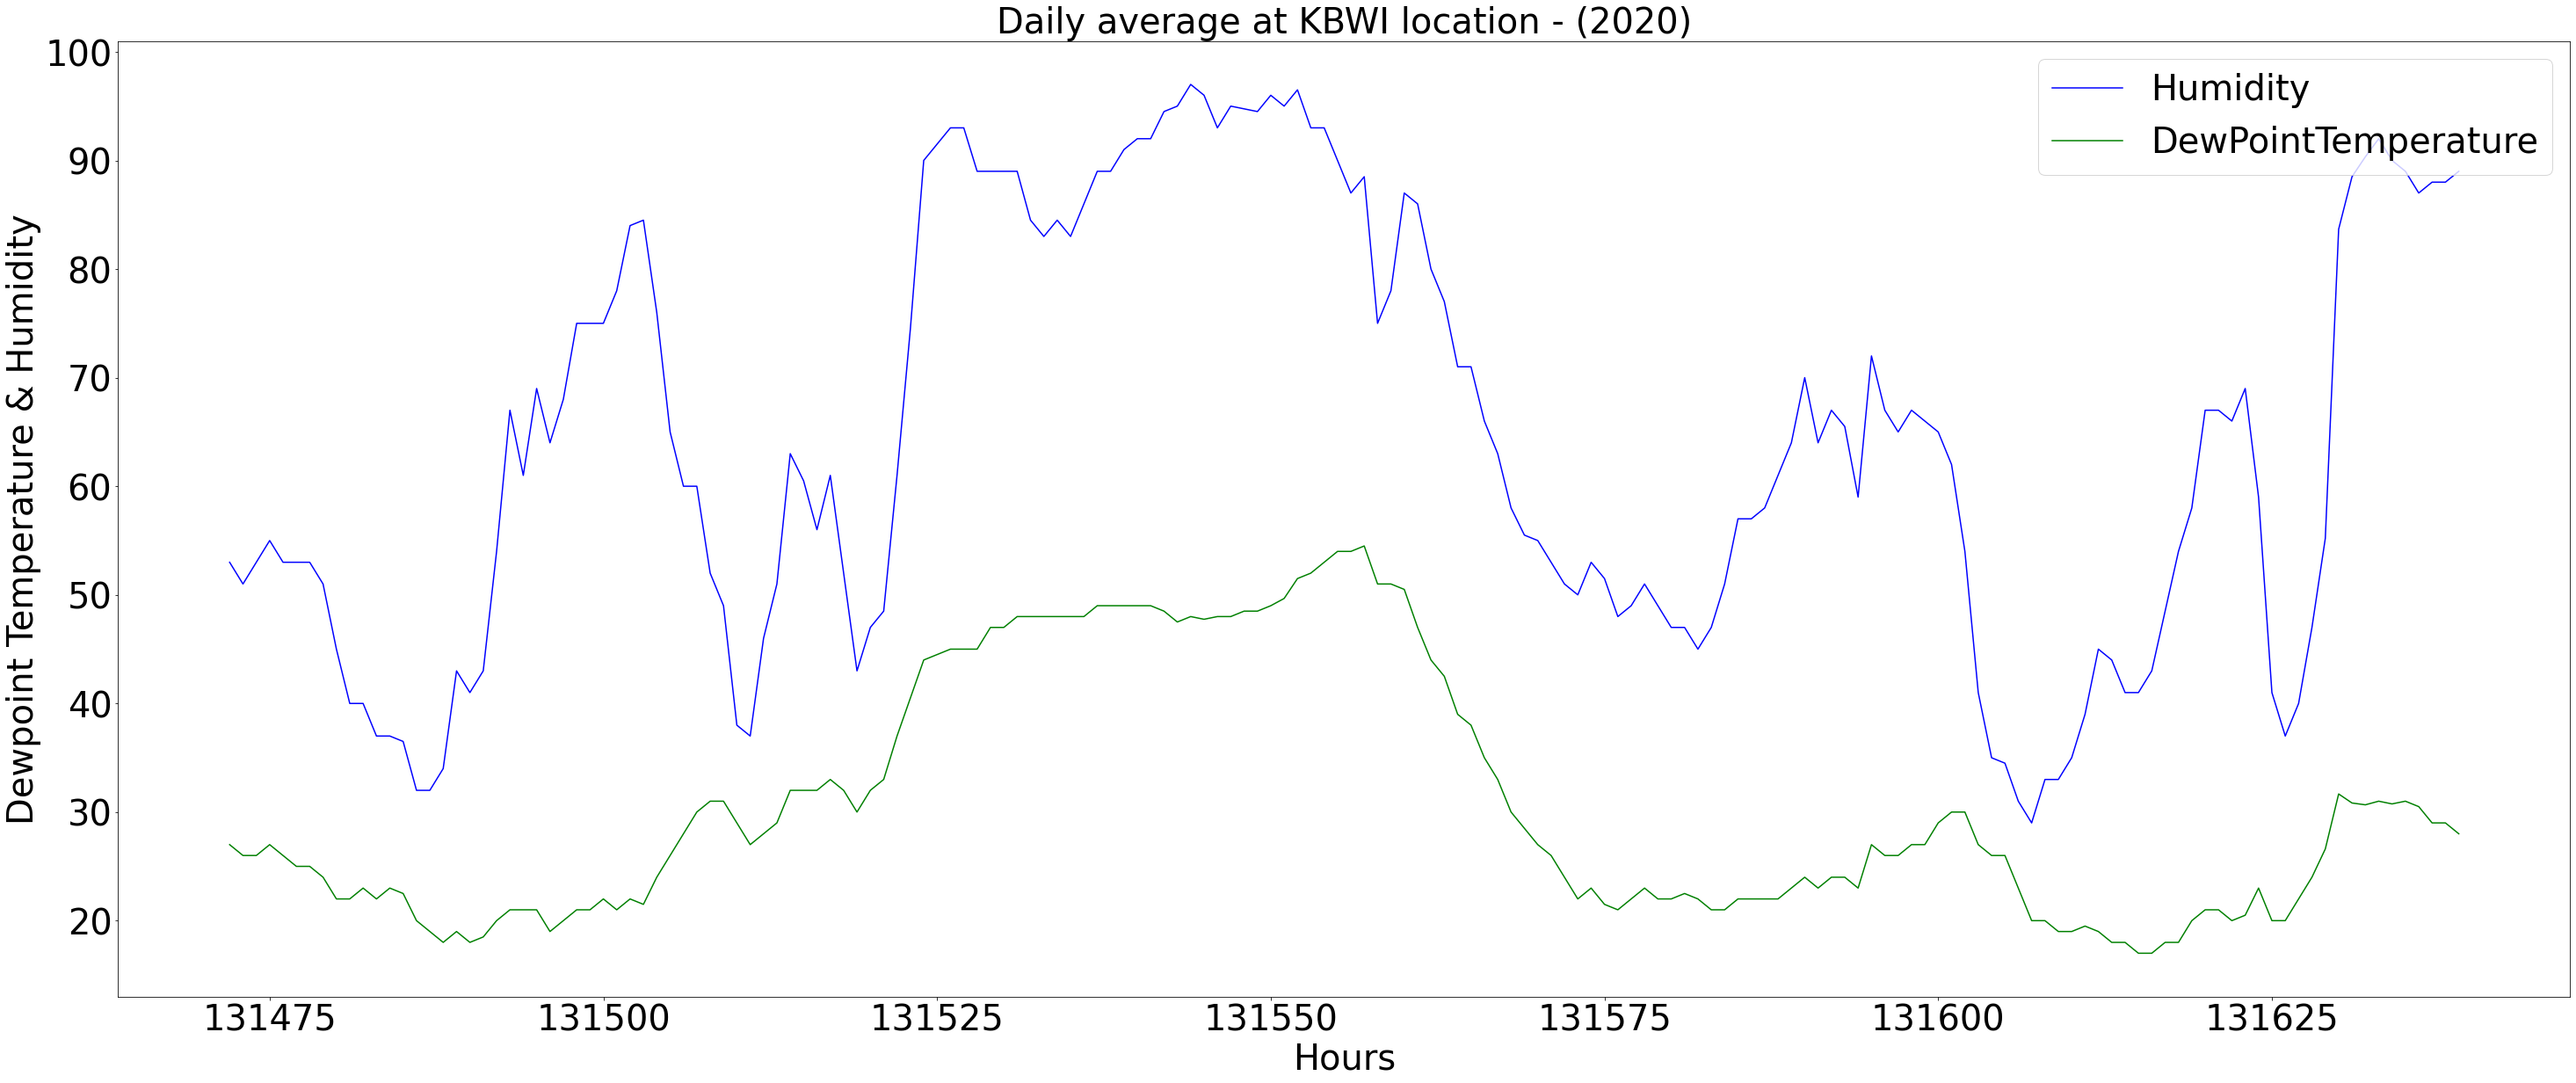

In [201]:
from matplotlib.pyplot import figure
Date_only = ['2020']

# data1['Date_only'] = pa.to_datetime(data1['Date_only'])
data1['YEAR'] = data1['Date_only'].dt.year 
df_rel_hum_2020 = data1.loc[ data1['YEAR'] == 2020 ]
df_dew_point_2020 = data1.loc[ data1['YEAR'] == 2020 ]


plt.figure(figsize=(50,20))
plt.title('Daily average at KBWI location - (2020)', fontsize=40)
plt.xlabel('Hours', fontsize=40)
plt.ylabel('Dewpoint Temperature & Humidity', fontsize=40)
plt.plot(df_rel_hum_2020['HourlyRelativeHumidity'][:(24*7)], color = 'b', label = 'Humidity')
plt.plot(df_dew_point_2020['HourlyDewPointTemperature'][:(24*7)], color = 'g', label = 'DewPointTemperature')
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40}, loc='upper right')
plt.show()

# Relative Humidity Vs Visibility

Hypothesis Statement: Humidity decreases visibility. There is a variation in these two as humidity increases, visibility goes down, and humidity decreases visibility goes high.
Findings & Insights: From the below graph of sample data, it's evident that although at some instances the visibility goes down when humidity rises, it does not hold throughout the data. So, we can reject this hypothesis.

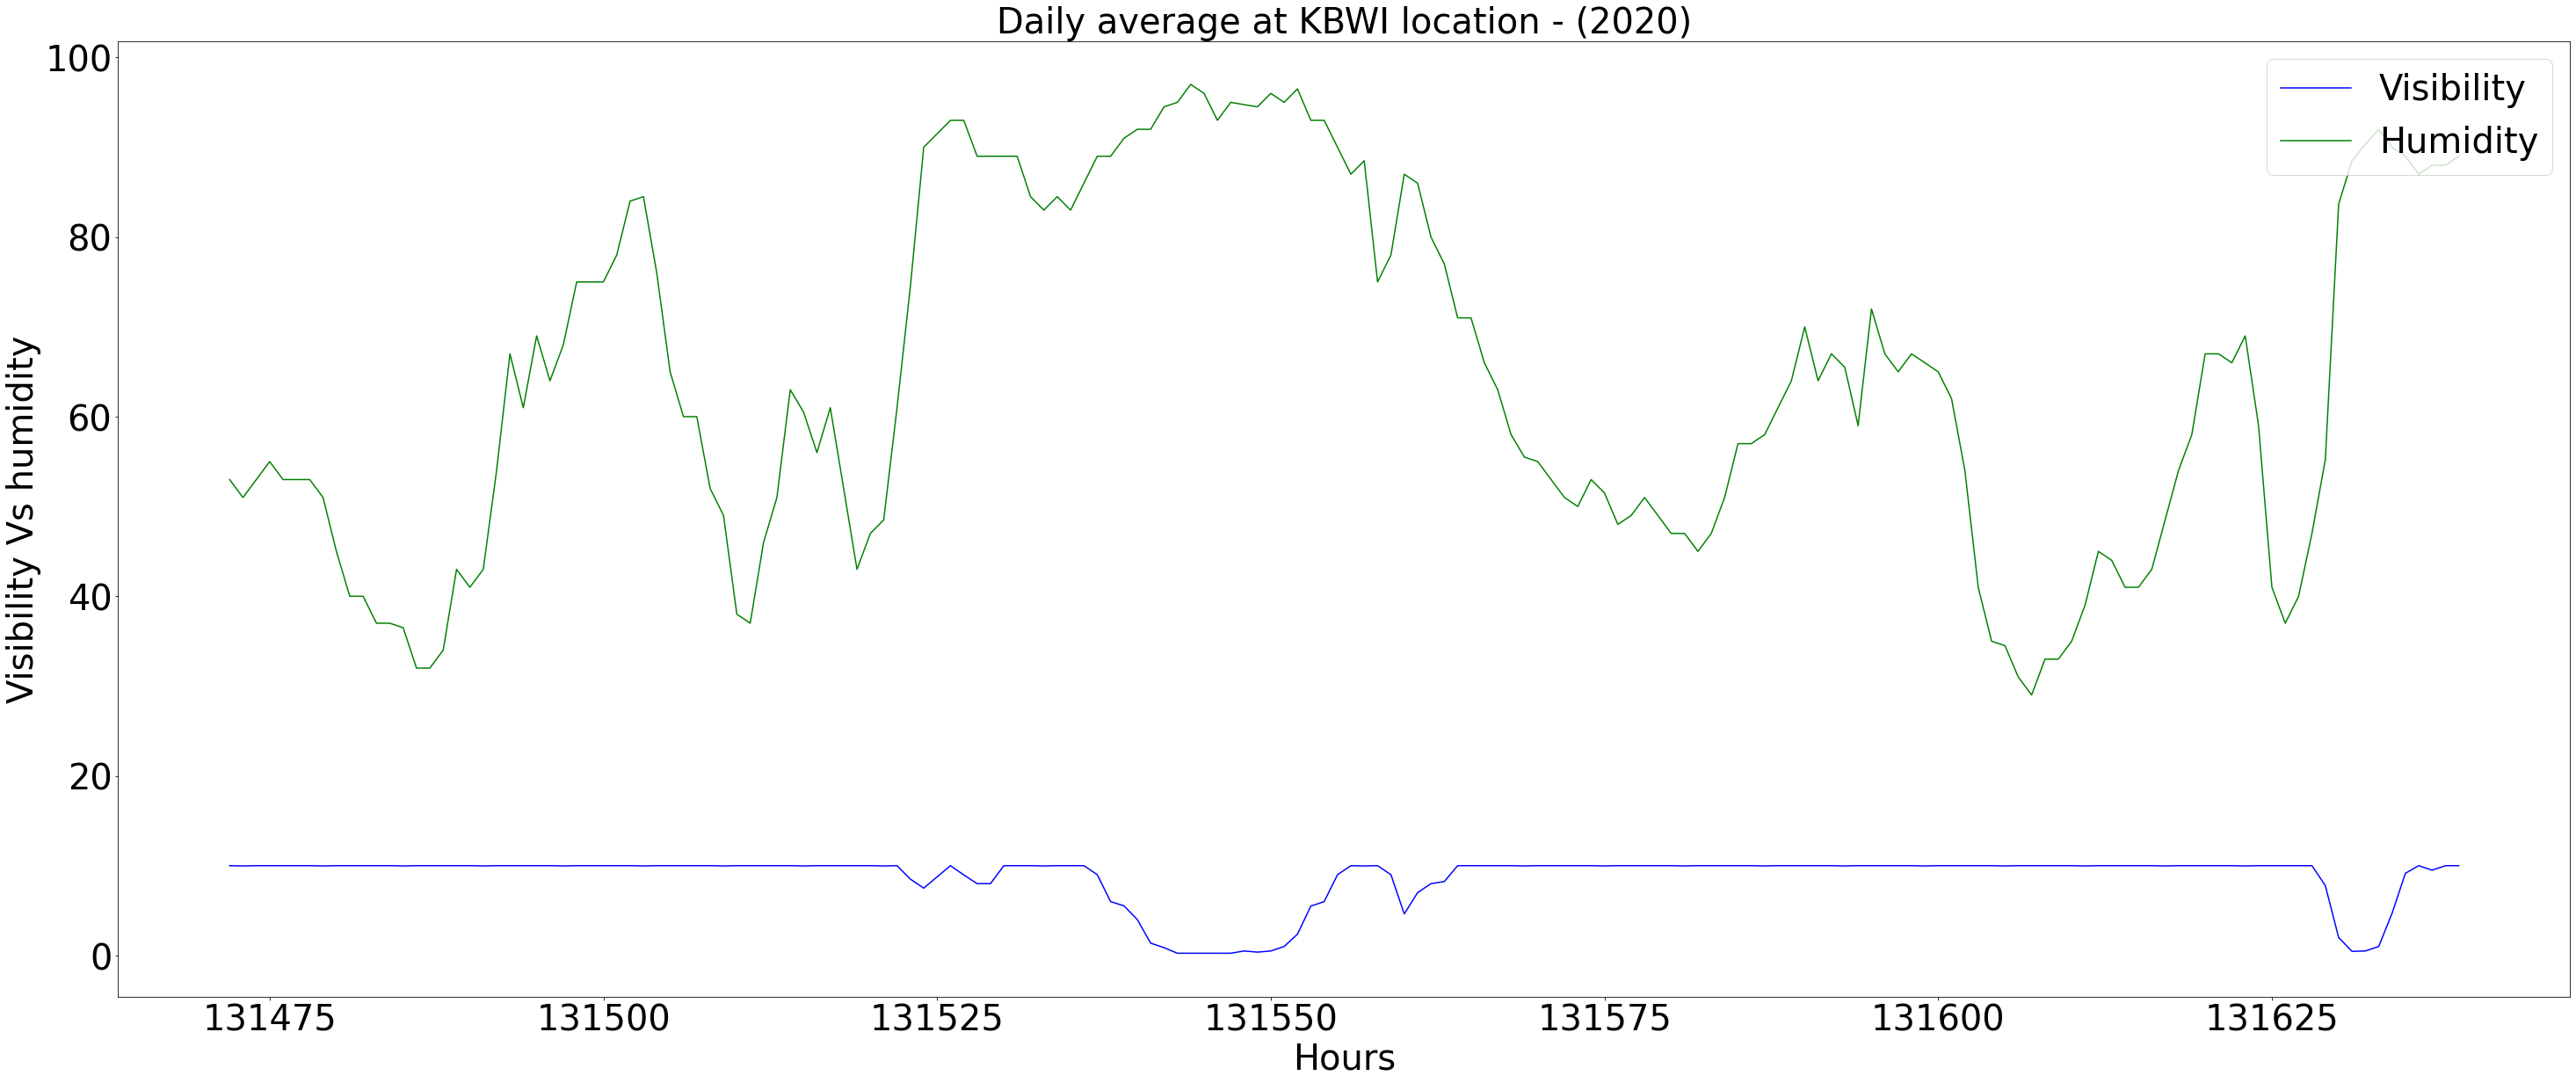

In [202]:
from matplotlib.pyplot import figure
Date_only = ['2020']

# data1['Date_only'] = pa.to_datetime(data1['Date_only'])
data1['YEAR'] = data1['Date_only'].dt.year 
df_rel_hum_2020 = data1.loc[ data1['YEAR'] == 2020 ]
df_visi_2020 = data1.loc[ data1['YEAR'] == 2020 ]

plt.figure(figsize=(50,20))
plt.title('Daily average at KBWI location - (2020)', fontsize=40)
plt.xlabel('Hours', fontsize=40)
plt.ylabel('Visibility Vs humidity', fontsize=40)
plt.plot(df_visi_2020['HourlyVisibility'][:(24*7)], color = 'b', label = 'Visibility')
plt.plot(df_rel_hum_2020['HourlyRelativeHumidity'][:(24*7)], color = 'g', label = 'Humidity')
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40}, loc='upper right')
plt.show()

# Learning Framework

## RFR (Random Forest Regressor)

#### Importing Data:

In [203]:
# Code 2 share Latest Uno Mas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from operator import itemgetter

weather_df = pd.read_csv("main_data/weather_data_final.csv", low_memory=False)


# weather_df.head()

# weather_df.info()


weather_df['Date_only'] = pd.to_datetime(weather_df['Date_only'])
# weather_df['Date'] = weather_df['Date_only'].dt.date
weather_df['Month'] = (weather_df['Date_only'].dt.month).astype(int)
weather_df['Day'] = (weather_df['Date_only'].dt.day).astype(int)
# weather_df['Date'] = weather_df['Date_only'].astype(str)
weather_df = weather_df.drop(['Date_only'], axis=1)

# weather_df['Date'] = weather_df['Date'].astype(int)
# weather_df['Month'] = (weather_df['Date_only'].dt.month).astype(int)
# weather_df['Day']



train_split= 0.8
split_idx = int(len(weather_df) * train_split)

training_set = weather_df[:split_idx].values
test_set = weather_df[split_idx:].values

# *WARNING* - RFR model may run for 9 hours
## Trained on RTX 2070 with 16Gb RAM, I-7
### Please consider running it standalone with no applications open
## Alternatively, we saved .npy of predictions and expected arrays, so they can be used instead ( code for that is located at Model Evaluation Section)

In [204]:
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = pd.DataFrame(data)
#     cols = list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#     # put it all together
#     agg = pd.concat(cols, axis=1)
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg.values


# def walk_forward_validation(data, n_test):
#     predictions = list()
#     # split dataset
#     train, test = train_test_split(data, n_test)
    
#     # !!!!!!! data[:,:(24*7*13)], data[:,(24*7*13):] !!!!!!!!!!!!
#     # seed history with training dataset
#     history = [x for x in train]
#     # step over each time-step in the test set
#     # print(len(test))
#     print("Input training, np.array(history).shape:", np.array(history).shape)
    
#     model = random_forest_forecast(history)
#     print("Received model.")
#     return model
    
#     '''
#     print("Received model")
#     testy_history = list()
#     yhat_history = list()
#     for i in range(len(test)):
#         print("Pre-Predicting phase...")
#         # split test row into input and output columns
#         c = (24*7*13)+3
#         # print(c)
#         res = []
#         for q in range(0, 24):
#             res.append(c)
#             c+=13
#         # print(res)
#         testX, testy = test[i,:(24*7*13)], test[i,[res]][0]

#         # fit model on history and make a prediction
# #         yhat = random_forest_forecast(history, testX)
#         print("Model predicting")
#         yhat = model.predict([testX])[0] # was [testX]
#         # store forecast in list of predictions
#         predictions.append(yhat)
#         print("after predictions.append")
#         # add actual observation to history for the next loop
#         history.append(test[i])
#         # summarize progress
#         print('>expected={}, predicted={}'.format(testy, yhat))
#         testy_history.append(testy)
#         yhat_history.append(yhat)
        
#     # estimate prediction error
#     # error = mean_absolute_error(test[:, -1], predictions)
#     return model, testy_history, yhat_history
#     '''
#     # return error, test[:, 1], predictions


# def train_test_split(data, n_test):
#     return data[:-n_test, :], data[-n_test:, :]


# def random_forest_forecast(train):
#     # transform list into array
#     train = asarray(train)
#     # split into input and output columns
#     c = (24*7*13)+3
#     # print(c)
#     res = []
#     for q in range(0, 24):
#         res.append(c)
#         c+=13
#     trainX, trainy = train[:,:(24*7*13)], train[:,[res][0]]
    
#     # fit model
#     print("Fed data (train x and y) shapes:")
#     print(trainX.shape)
#     print(trainy.shape)
#     print("-------")
#     model = RandomForestRegressor(n_estimators=750, n_jobs=-1)
#     print("Setted up a model.")
#     model.fit(trainX, trainy)
#     print("Finished training...")
#     # make a one-step prediction
# #     yhat = model.predict([testX])
# #     return yhat[0]
#     return model


# values = weather_df[:117216].values
# data = series_to_supervised(values, n_in=168, n_out=24)
# # rfr_model, test_y_hist, yhat_hist = walk_forward_validation(data, 168)
# rfr_model = walk_forward_validation(data, 48)

# '''
# main_expected = []
# main_pred = []

# for i in test_y_hist:
#     for j in range(0, len(i)):
#         main_expected.append(i[j])

# for i in yhat_hist:
#     for j in range(0, len(i)):
#         main_pred.append(i[j])

# pyplot.plot(main_expected[:50], label='Expected')
# pyplot.plot(main_pred[:50], label='Predicted')
# pyplot.legend()
# pyplot.show()
# '''

In [205]:
weather_df[117216:].shape

(23040, 13)

In [206]:
# test_values = weather_df[117216:].values
# test_data = series_to_supervised(test_values, n_in=168, n_out=24)

# predictions = list()
# #     # split dataset
# test = test_data
# y_test_gt = list()
# y_test_pred = list()

# c = (24*7*13)+3

# res = []
# for q in range(0, 24):
#     res.append(c)
#     c+=13
    
# print(len(test))

# for i in range(0, len(test), 24):
#     if i % 100 == 0:
#         print("Tested % completed:", round(i/len(test)*100,2), "%")
#     testX, testy = test[i,:(24*7*13)], test[i,[res]][0]
#     yhat = rfr_model.predict([testX])[0] # was [testX]
#     y_test_gt.append(testy)
#     y_test_pred.append(yhat)

In [207]:
# importances = rfr_model.feature_importances_[:14]


# features = weather_df.columns
# importances = list(rfr_model.feature_importances_)

# grouped_importances = []
# for i in importances:
#     tmp = []
#     for j in range(0, 13):
#         tmp.append(importances.pop(0))
#     grouped_importances.append(tmp)
    
    
# grouped_and_summed_importances = [0]*13
# # print(grouped_and_summed_importances)
# for q in grouped_importances:
#     for e in range(0, len(q)):
#         grouped_and_summed_importances[e]+=q[e]
        
# type(grouped_and_summed_importances)
# grouped_and_summed_importances = np.array(grouped_and_summed_importances)




# indices = np.argsort(grouped_and_summed_importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), grouped_and_summed_importances[indices], color='#8f63f4', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [208]:
# np.save("npy_updated_rfr_750_y_expected.npy", y_test_gt)
# np.save("npy_updated_rfr_750_y_pred.npy", y_test_pred)

# Ground Truth (GT) and Preds for RFR:

In [209]:
y_test_gt = np.load("main_data/npy_updated_rfr_750_y_expected.npy")
y_test_pred = np.load("main_data/npy_updated_rfr_750_y_pred.npy")

In [210]:
y_test_gt_RFR = y_test_gt
y_test_pred_RFR = y_test_pred

In [211]:
main_expected = []
main_pred = []

for i in y_test_gt:
    for j in range(0, len(i)):
        main_expected.append(i[j])

for i in y_test_pred:
    for j in range(0, len(i)):
        main_pred.append(i[j])

#### Prediction Results (Samples)

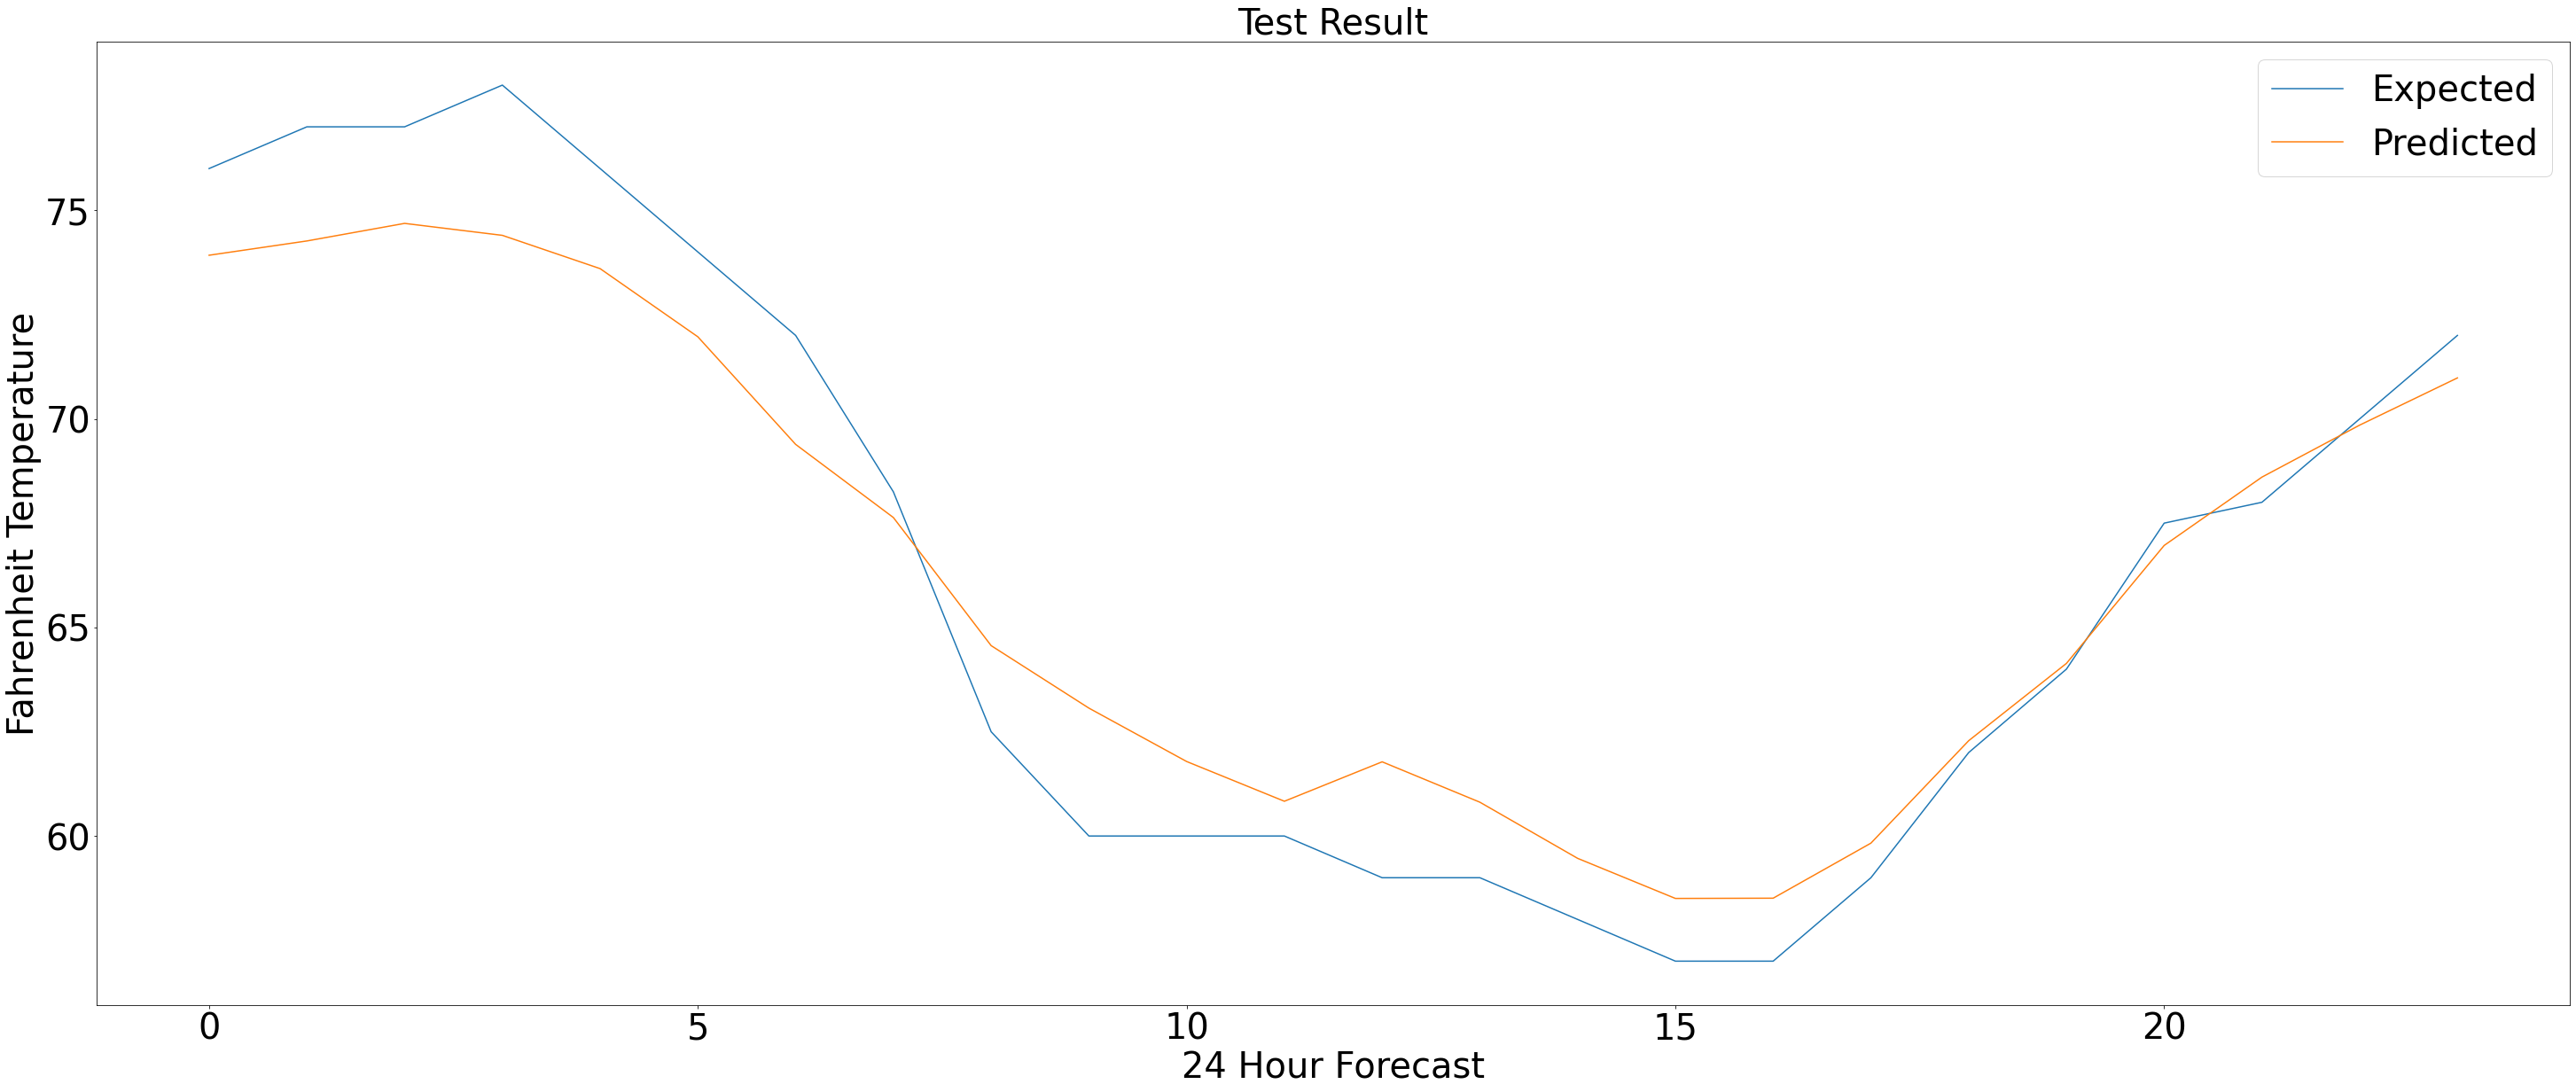

In [213]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(main_expected[300:300+24], label='Expected')
plt.plot(main_pred[300:300+24], label='Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.xlabel("24 Hour Forecast", size=40)
plt.ylabel("Fahrenheit Temperature", size=40)
plt.show()

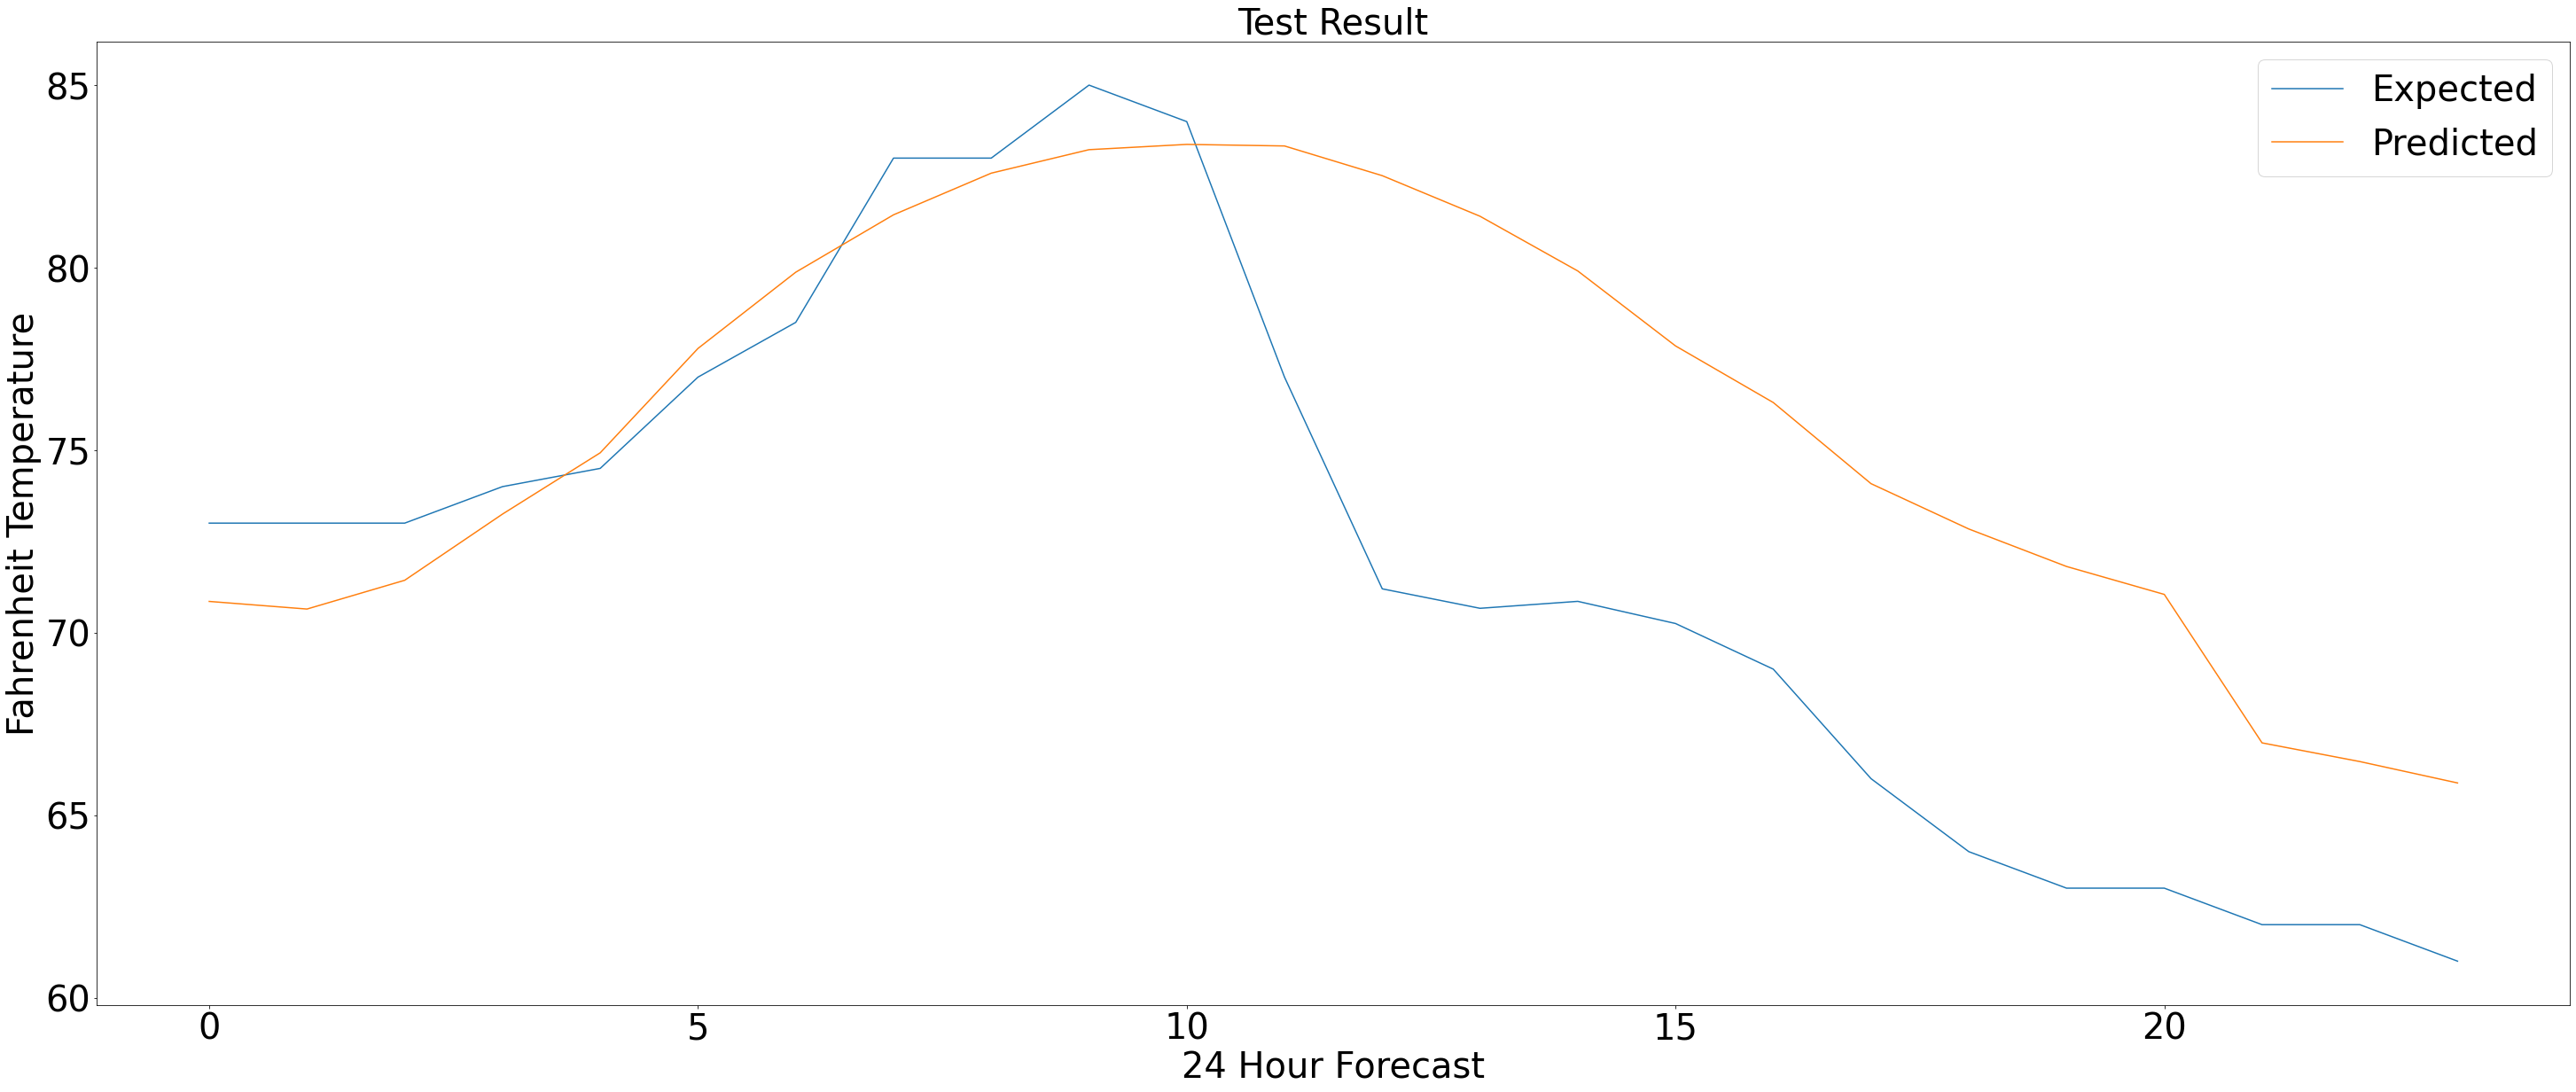

In [214]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(main_expected[75:75+24], label='Expected')
plt.plot(main_pred[75:75+24], label='Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.xlabel("24 Hour Forecast", size=40)
plt.ylabel("Fahrenheit Temperature", size=40)
plt.show()

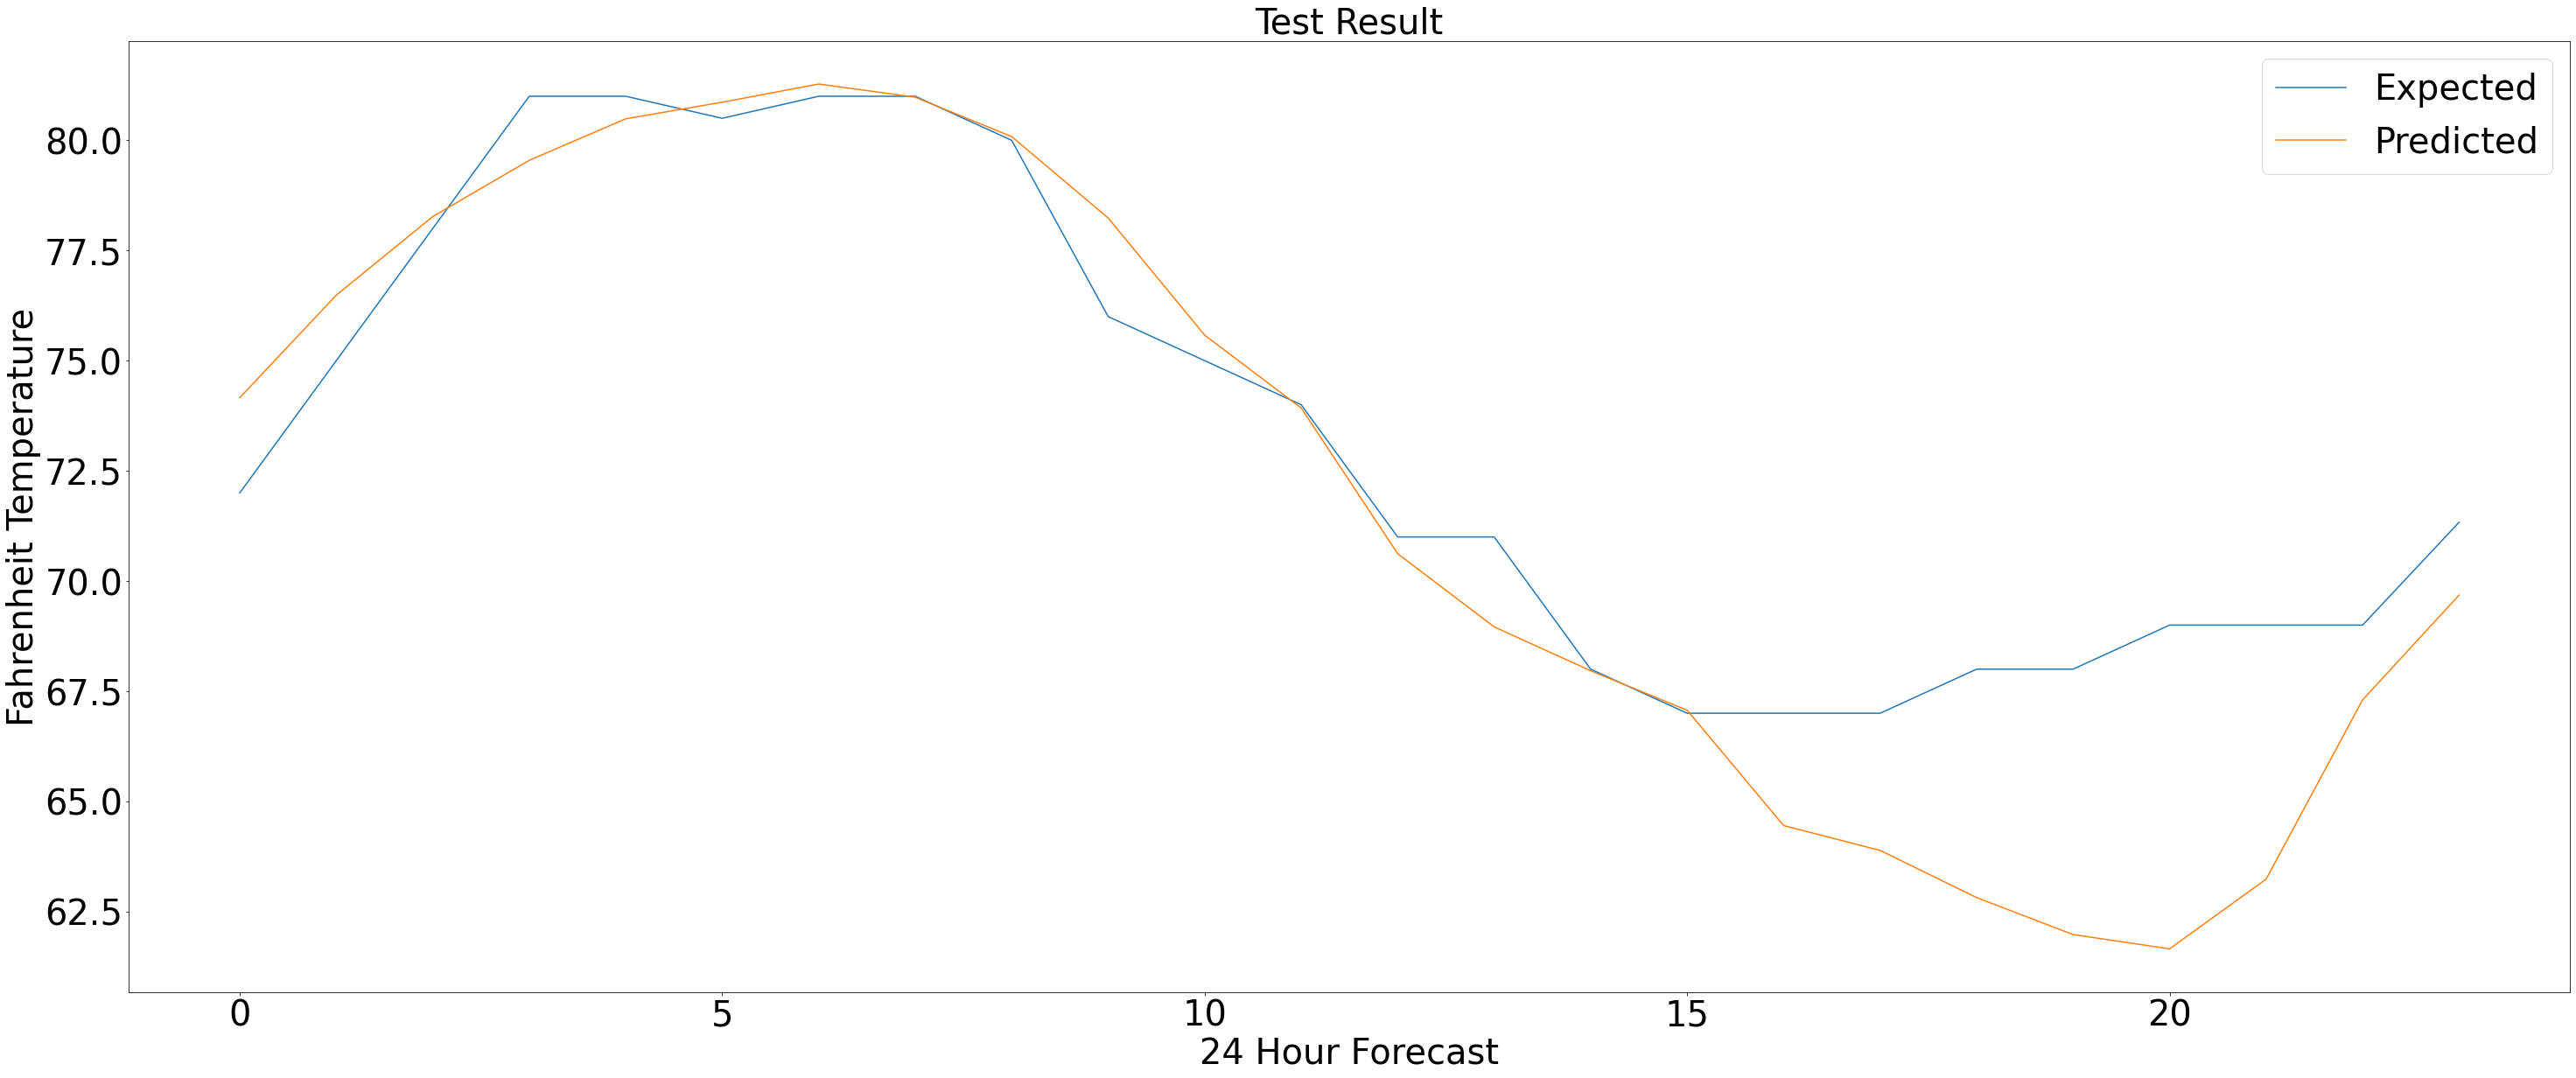

In [215]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(main_expected[800:800+24], label='Expected')
plt.plot(main_pred[800:800+24], label='Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.xlabel("24 Hour Forecast", size=40)
plt.ylabel("Fahrenheit Temperature", size=40)
plt.show()

## Model Comparison with Power Model

In [216]:
# Power Model
df_POWER = pd.read_csv('main_data/POWER_SinglePoint_Daily_20180516_20201231.csv', low_memory=False)

In [218]:
#### Also converting into Fahrenheit (original data from NASA is in Celcius)

In [219]:
def f(x):
    x = x * 1.8 + 32
    return float(x)

df_POWER['T2M_F'] = df_POWER['T2M'].apply(f)

df_POWER[8:]

LAT       LON  YEAR  MO  DY    T2M   T2M_F
8    39.17331 -76.68399  2018   5  24  20.52  68.936
9    39.17331 -76.68399  2018   5  25  21.74  71.132
10   39.17331 -76.68399  2018   5  26  23.89  75.002
11   39.17331 -76.68399  2018   5  27  22.97  73.346
12   39.17331 -76.68399  2018   5  28  19.57  67.226
..        ...       ...   ...  ..  ..    ...     ...
956  39.17331 -76.68399  2020  12  27  -1.24  29.768
957  39.17331 -76.68399  2020  12  28   2.81  37.058
958  39.17331 -76.68399  2020  12  29  -0.43  31.226
959  39.17331 -76.68399  2020  12  30   0.61  33.098
960  39.17331 -76.68399  2020  12  31   3.00  37.400

[953 rows x 7 columns]

In [220]:
power_gt = list(df_POWER['T2M_F'][8:])

print(len(y_test_gt))
print(len(y_test_pred))
print(len(power_gt))

953
953
953


In [221]:
# Data in NASA's power is Daily Average, while our predictions are in hourly format
# Let's fix that

In [222]:
import statistics

avg_gt = []
avg_pred = []

for i in range(0, len(y_test_gt)):
    avg_gt.append(statistics.mean(y_test_gt[i]))
    avg_pred.append(statistics.mean(y_test_pred[i]))

In [223]:
print(len(avg_gt))
print(len(avg_pred))
print(len(power_gt))

953
953
953


In [224]:
np.save("main_data/load_gt_avg.npy", avg_gt)
np.save("main_data/load_power_gt.npy", power_gt)

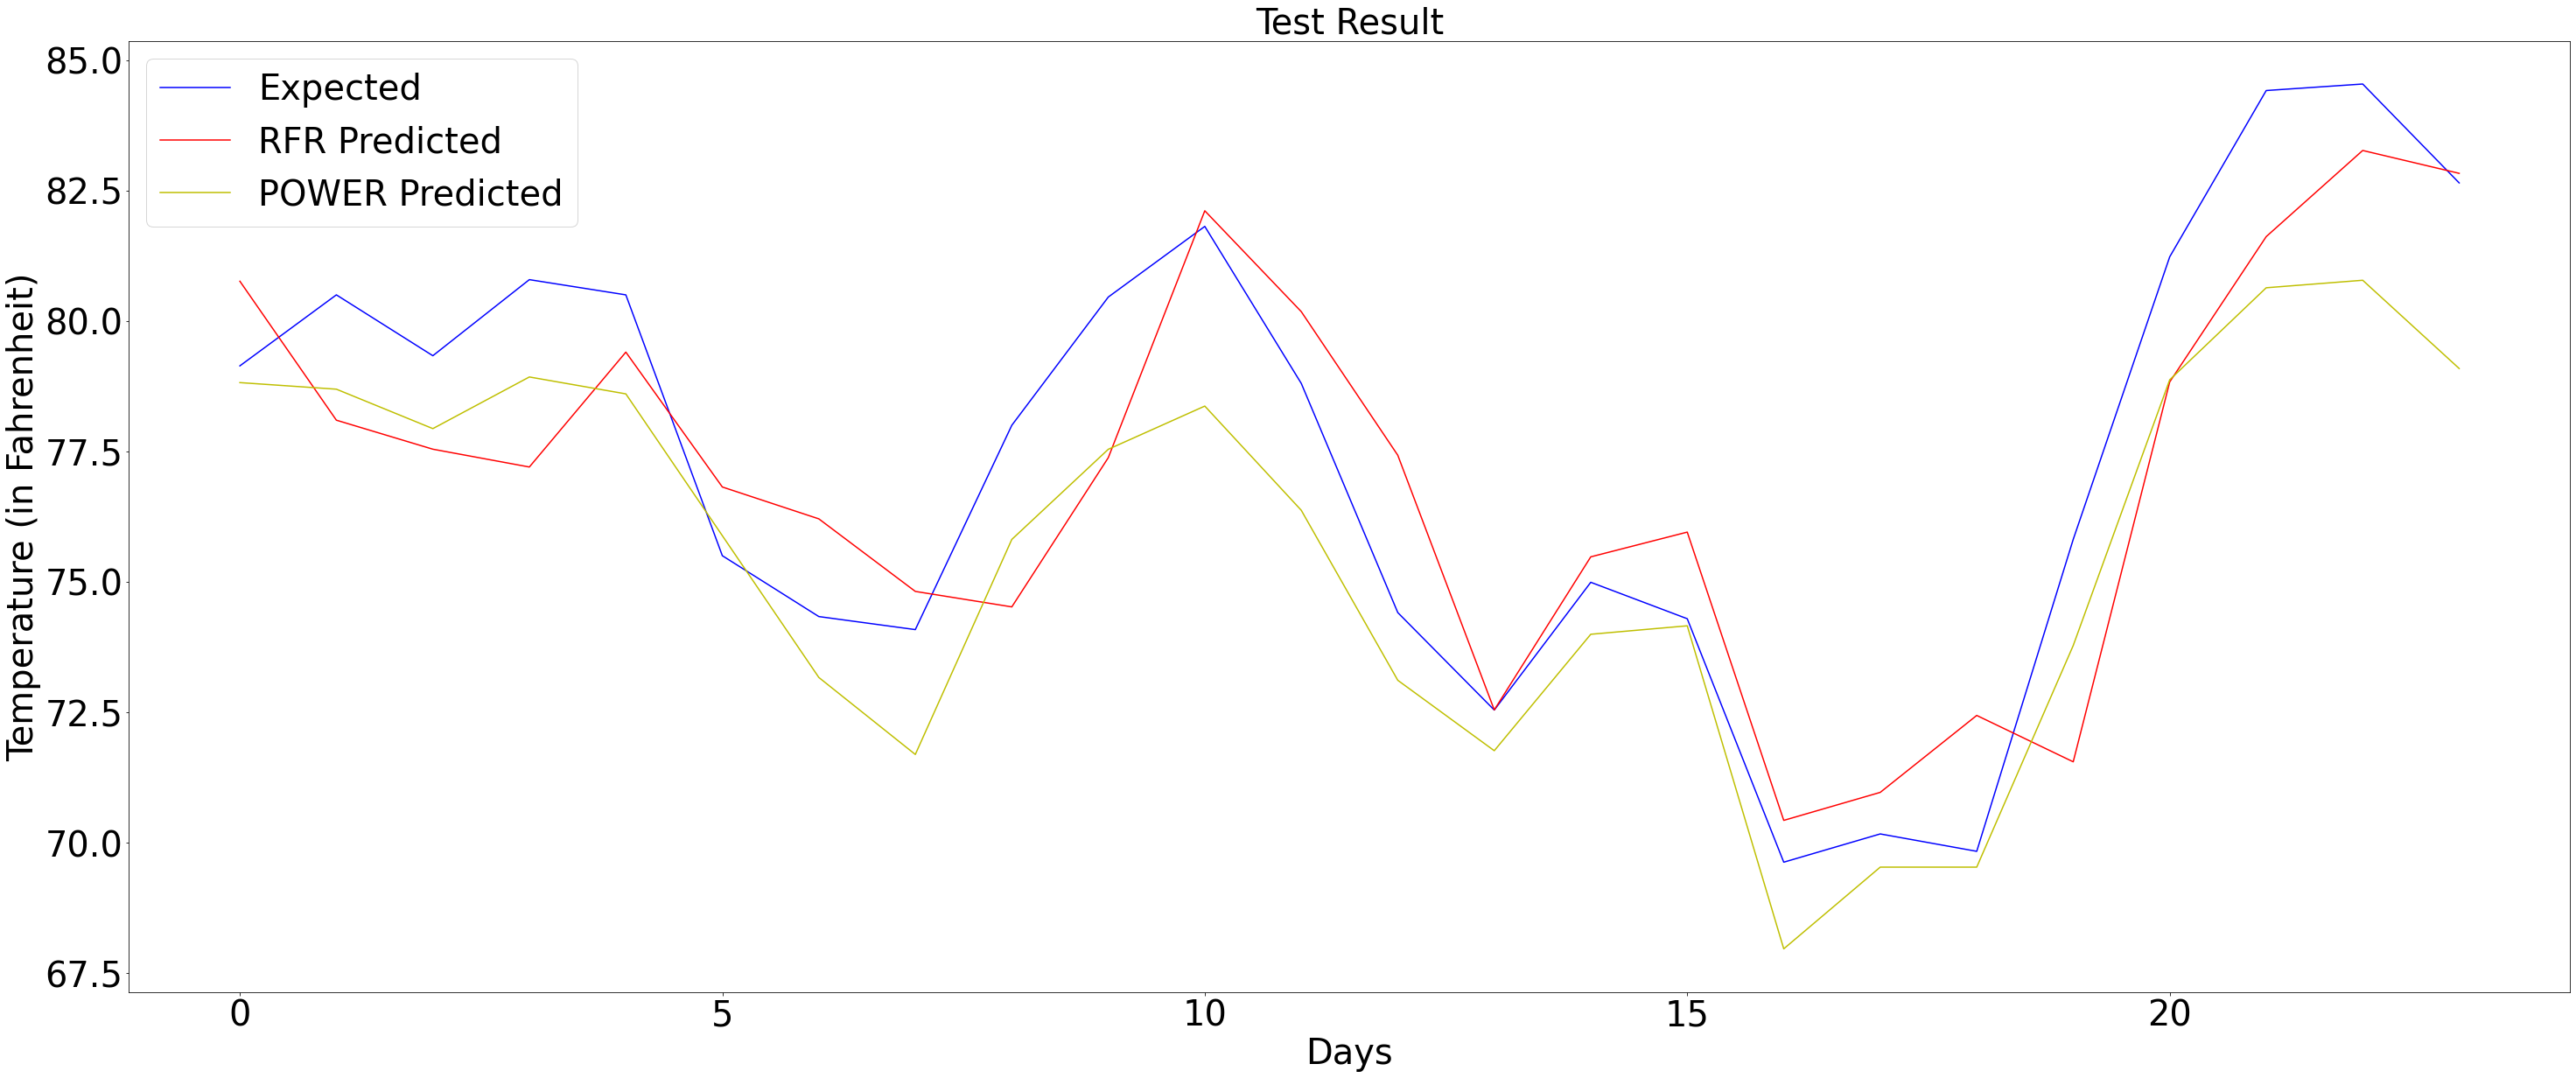

In [226]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(avg_gt[75:75+24], label='Expected', color='blue')
plt.plot(avg_pred[75:75+24], label='RFR Predicted', color='red')
plt.plot(power_gt[75:75+24], label='POWER Predicted', color='y')
# plt.xticks(hours_range)
plt.xlabel("Days", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

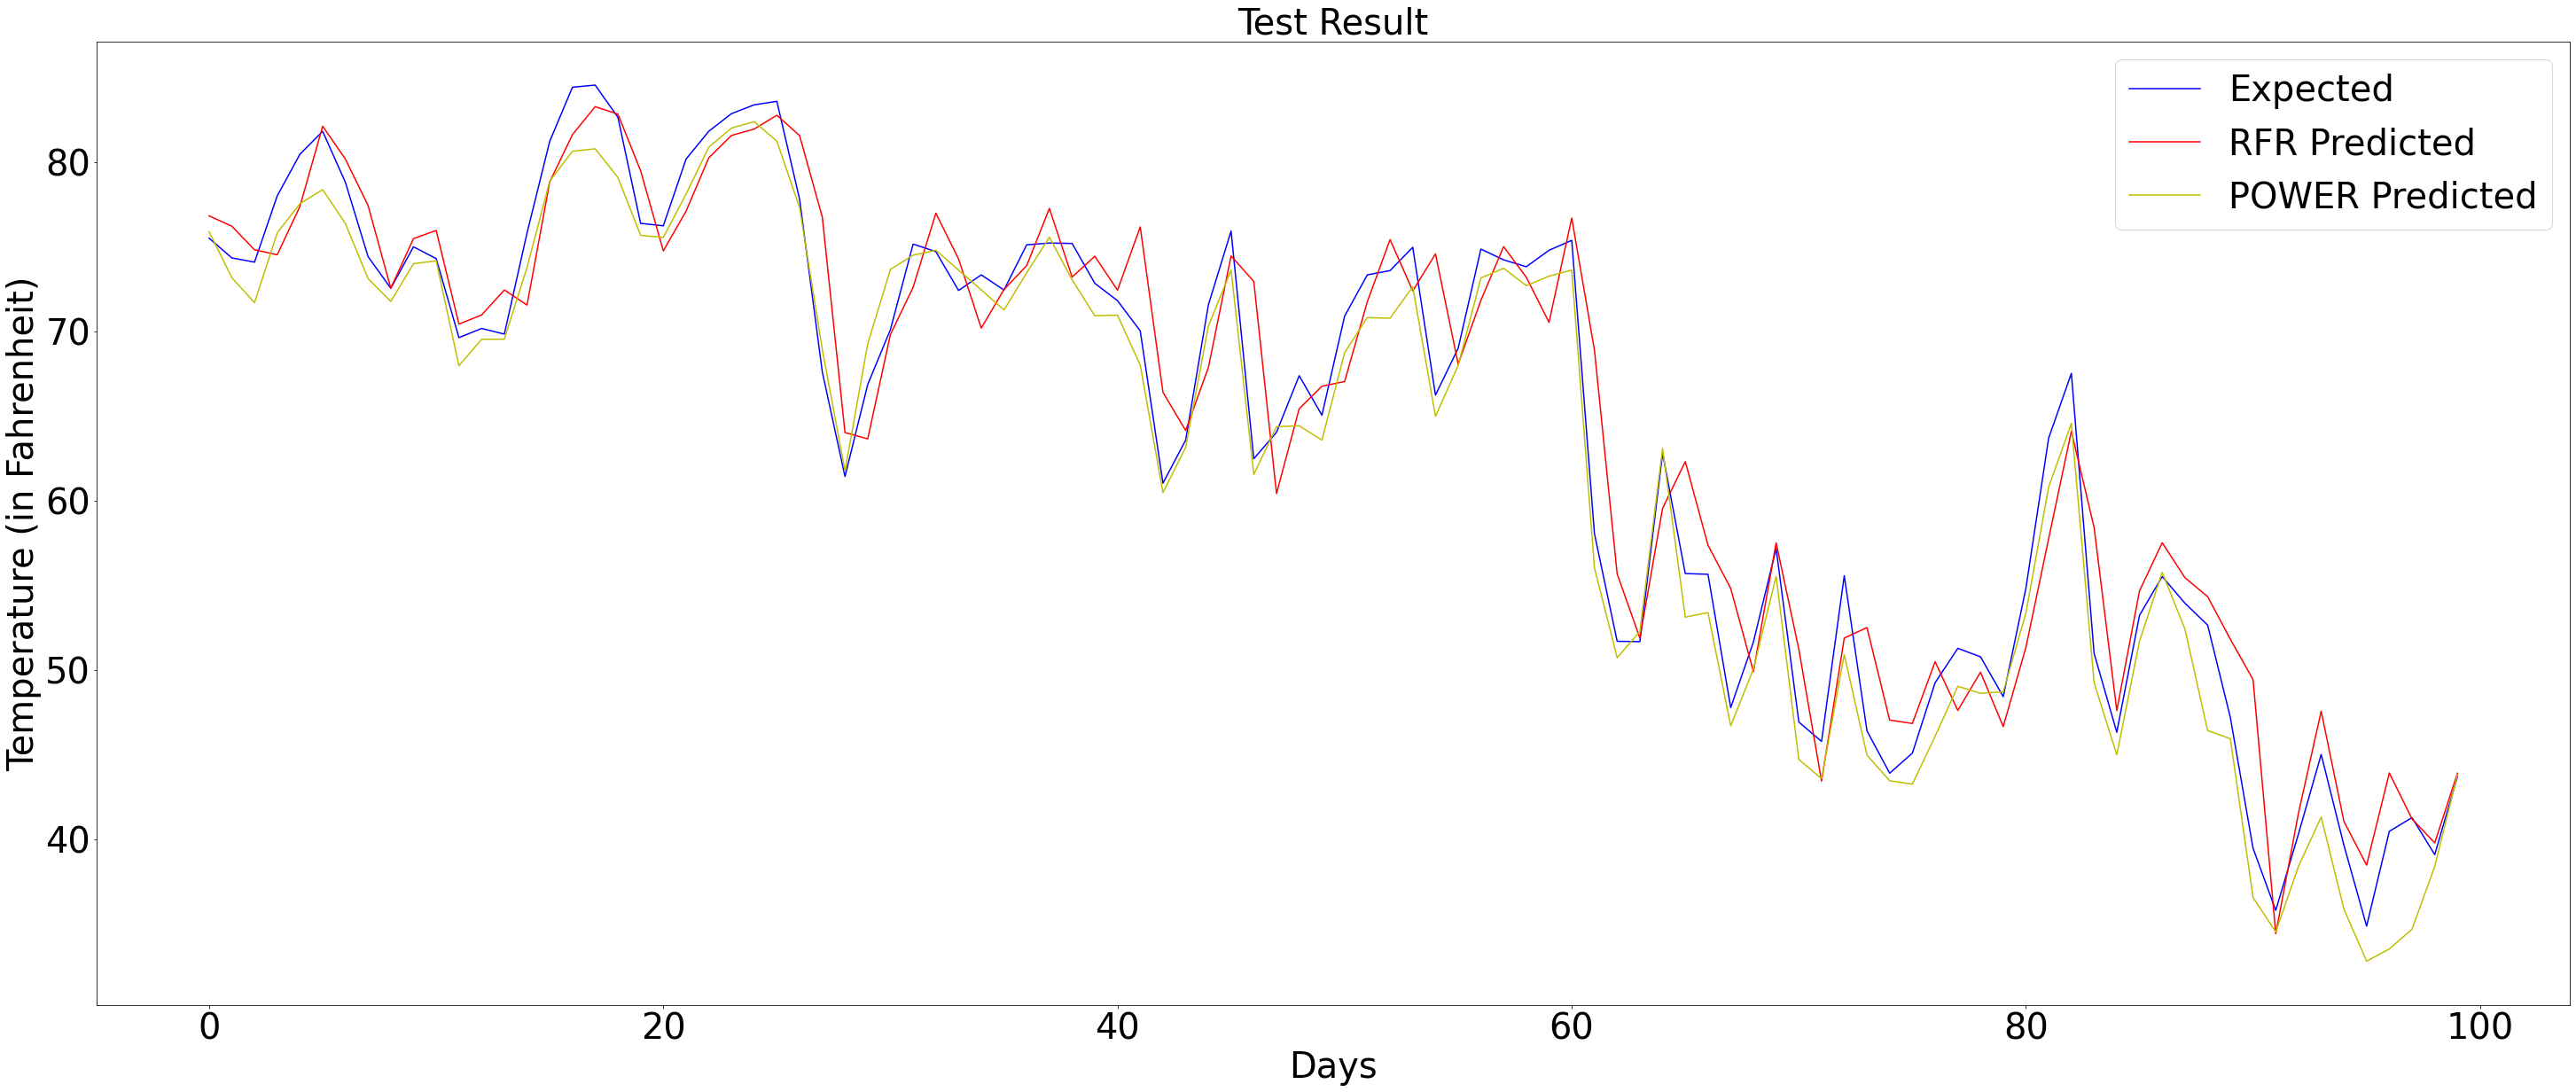

In [227]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 80
to_t = from_t + 100
plt.plot(avg_gt[from_t:to_t], label='Expected', color='blue')
plt.plot(avg_pred[from_t:to_t], label='RFR Predicted', color='red')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted', color='y')
# plt.xticks(hours_range)
plt.xlabel("Days", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

#### JUST POWER results:

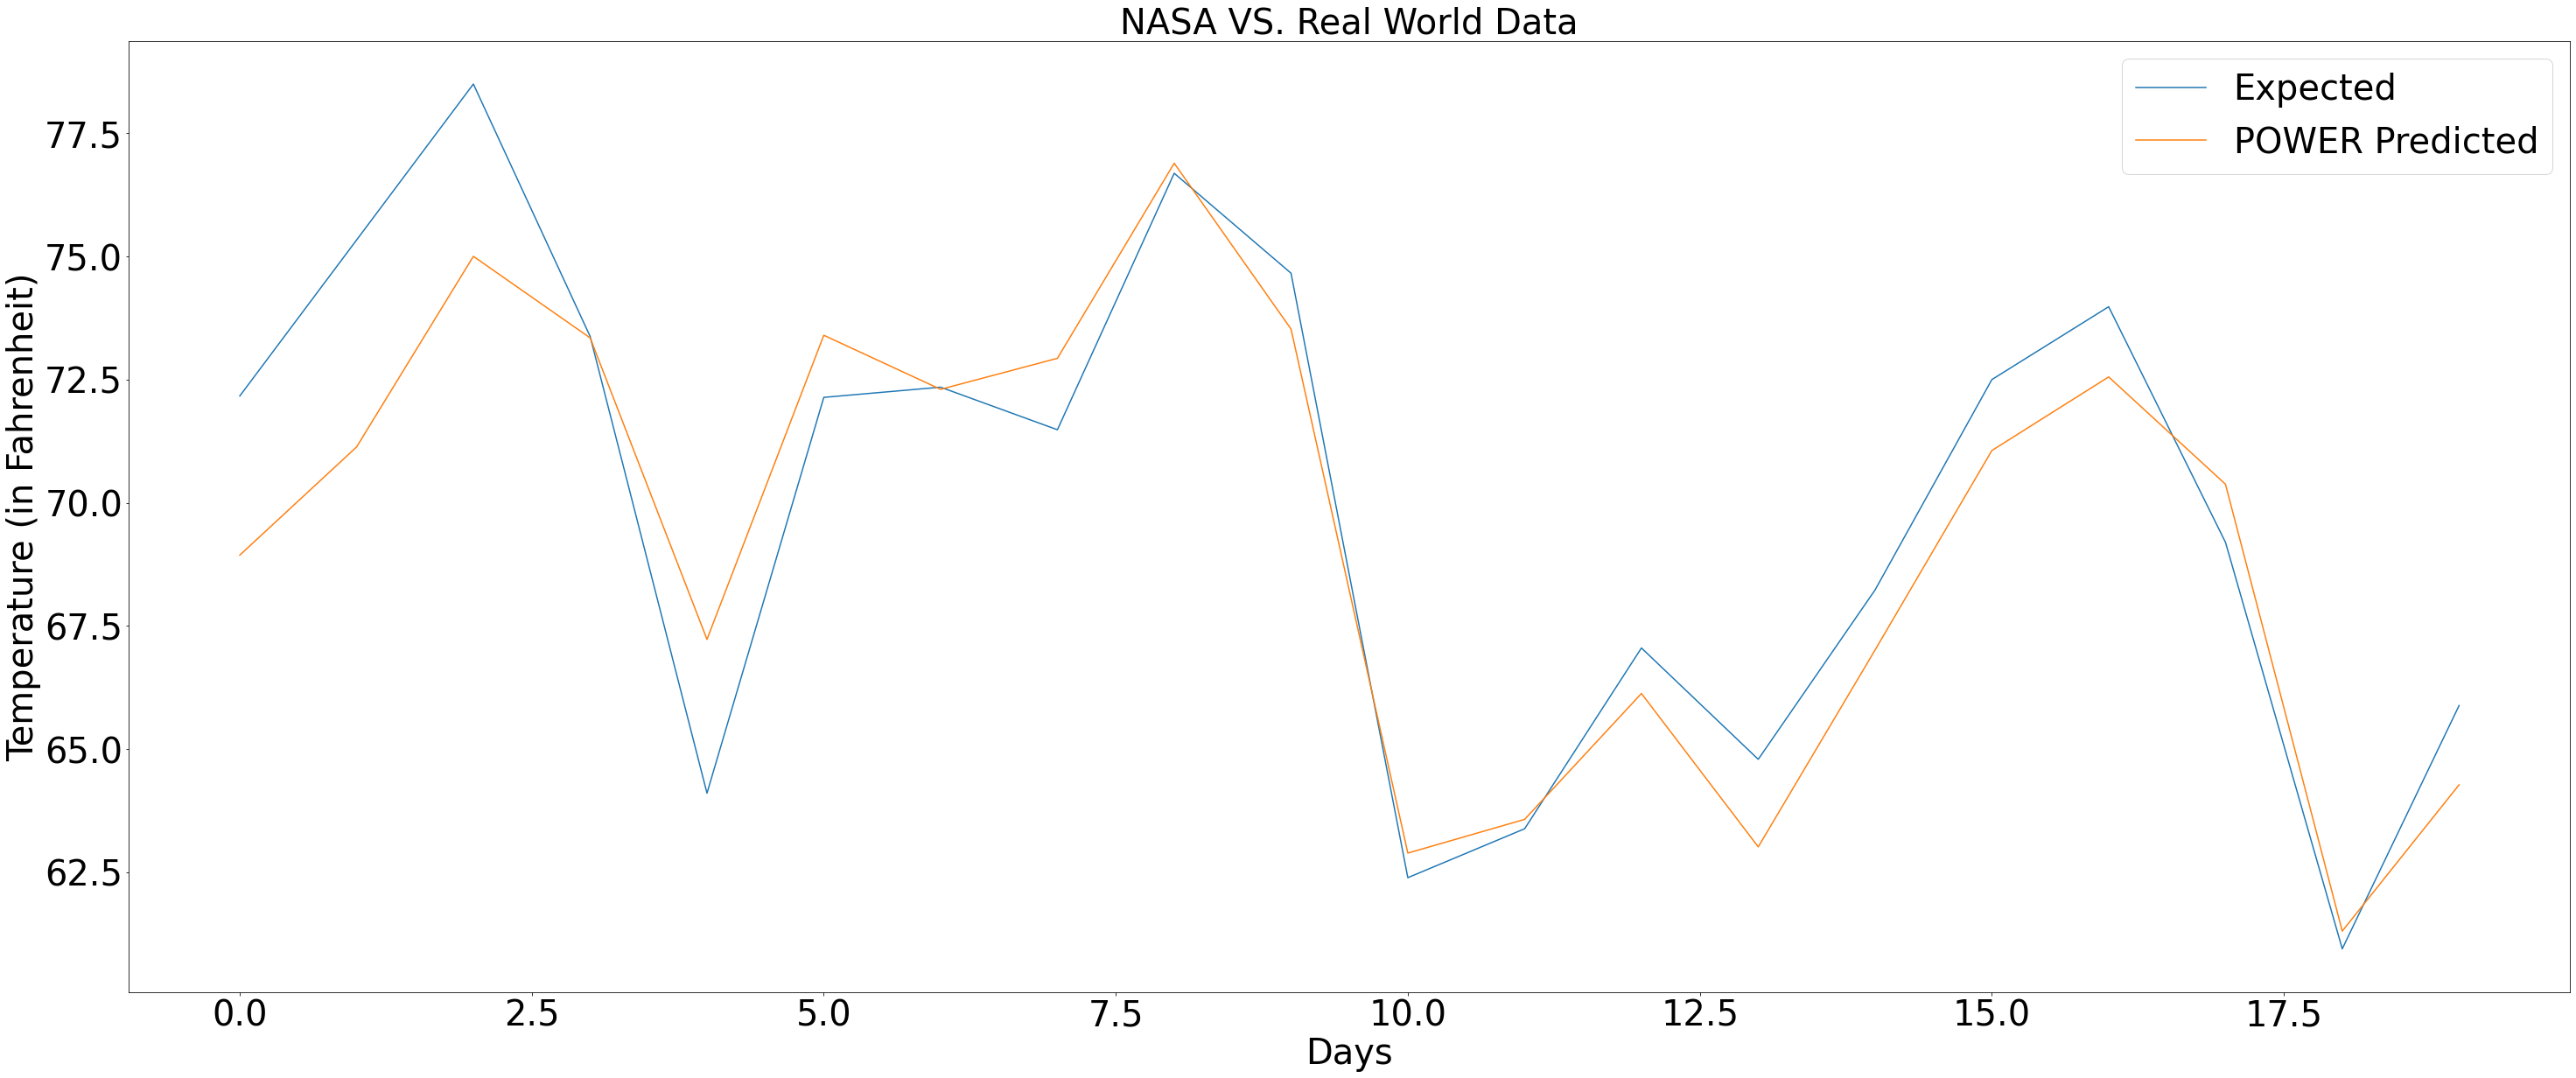

In [230]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 0
to_t = from_t + 20
plt.plot(avg_gt[from_t:to_t], label='Expected')
# plt.plot(avg_pred[from_t:to_t], label='RFR Predicted')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.xlabel("Days", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.legend(prop={'size':40})
plt.title("NASA VS. Real World Data",fontsize=40)
plt.show()

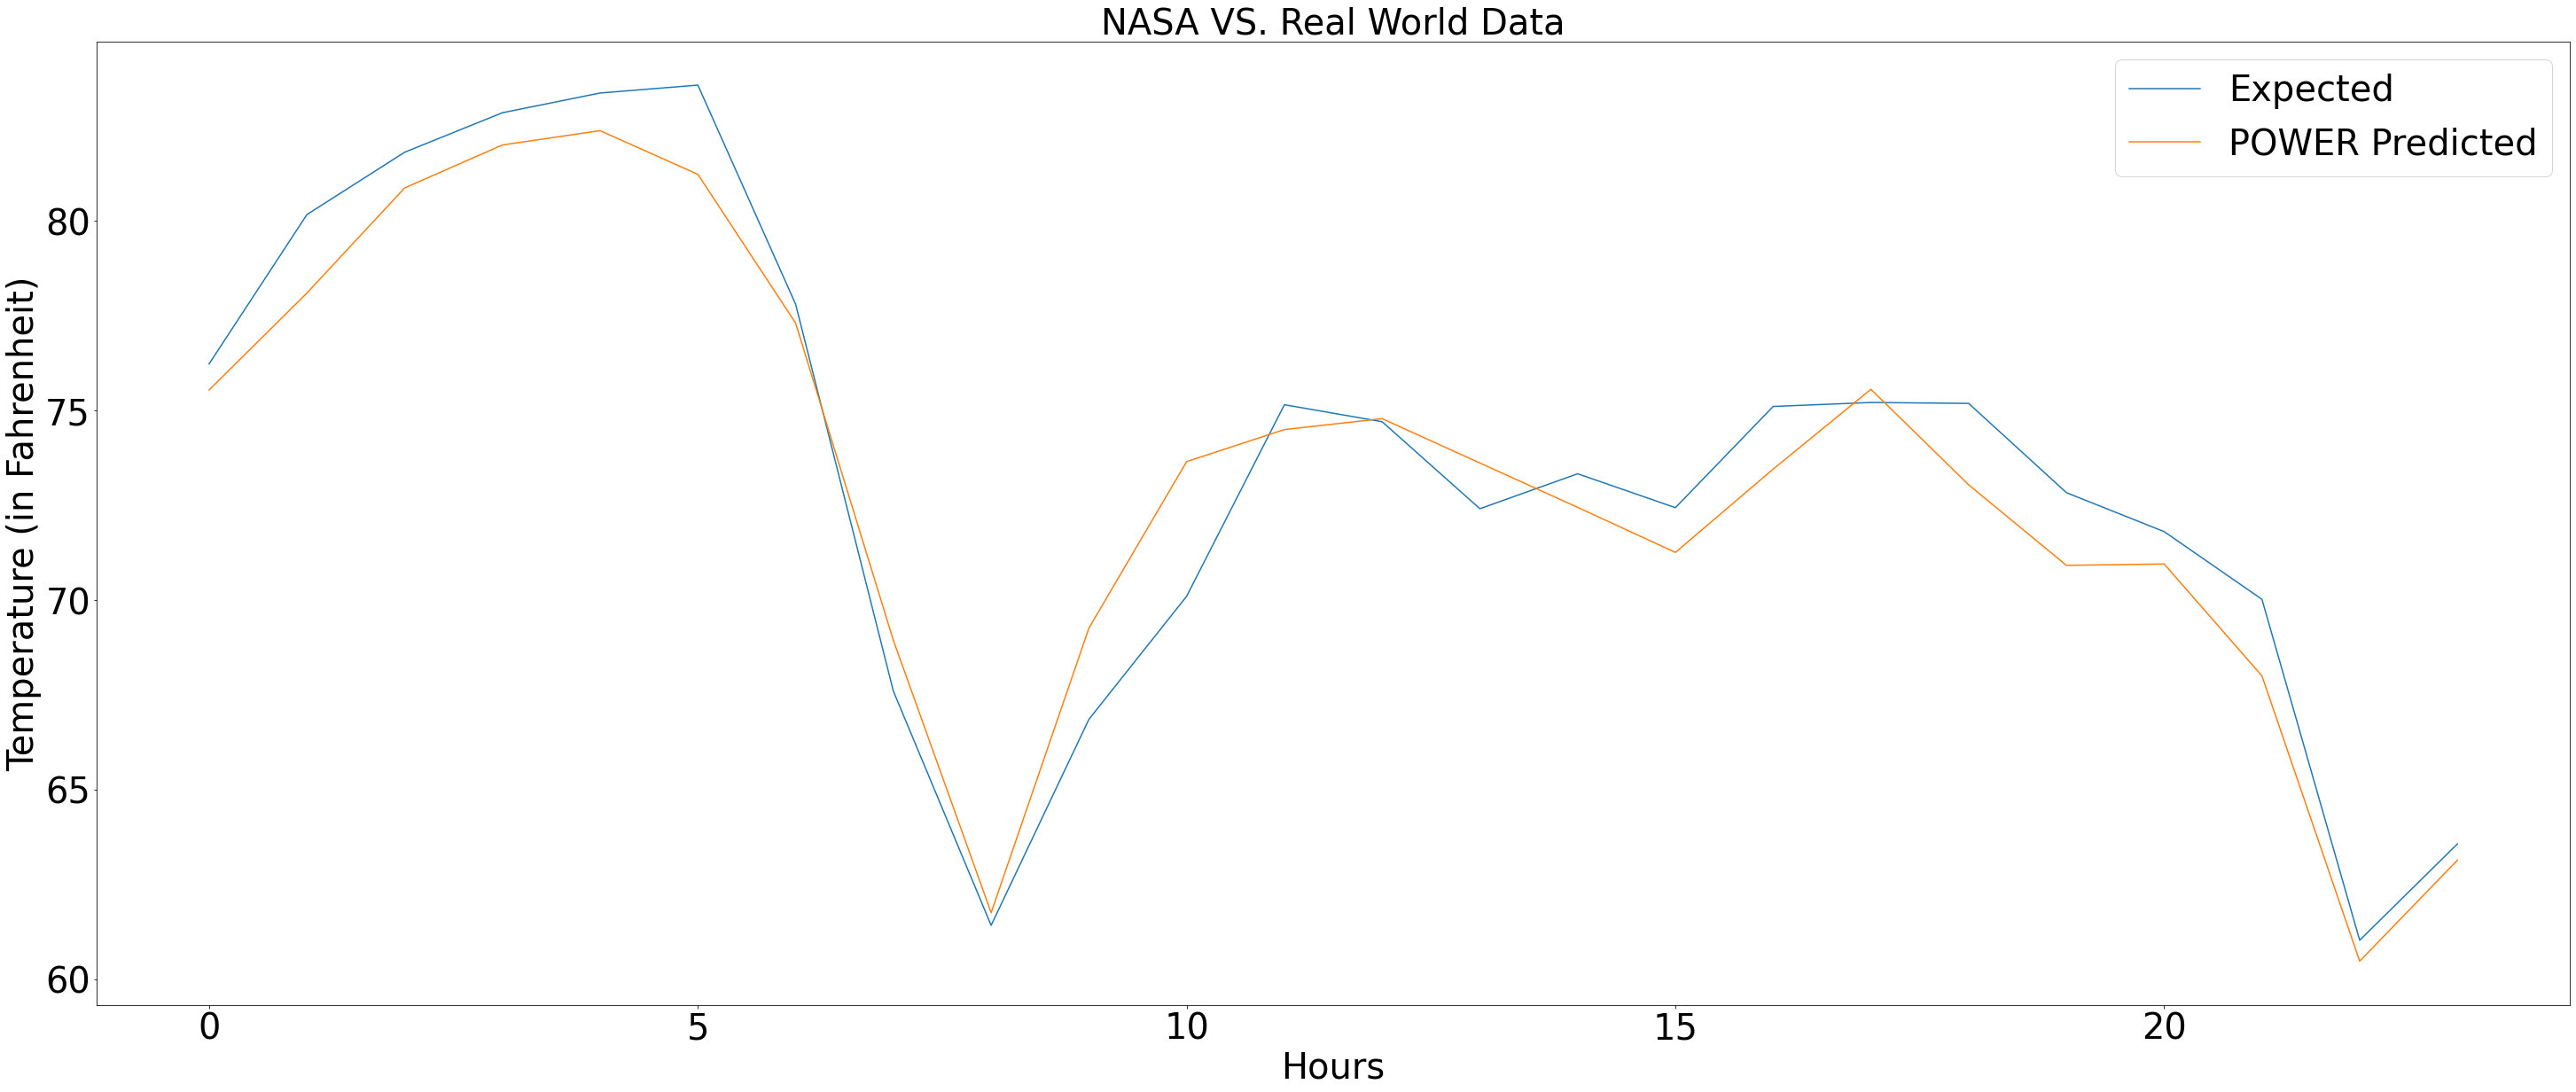

In [231]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 100
to_t = from_t + 24
plt.plot(avg_gt[from_t:to_t], label='Expected')
# plt.plot(avg_pred[from_t:to_t], label='RFR Predicted')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.xlabel("Hours", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.legend(prop={'size':40})
plt.title("NASA VS. Real World Data",fontsize=40)
plt.show()

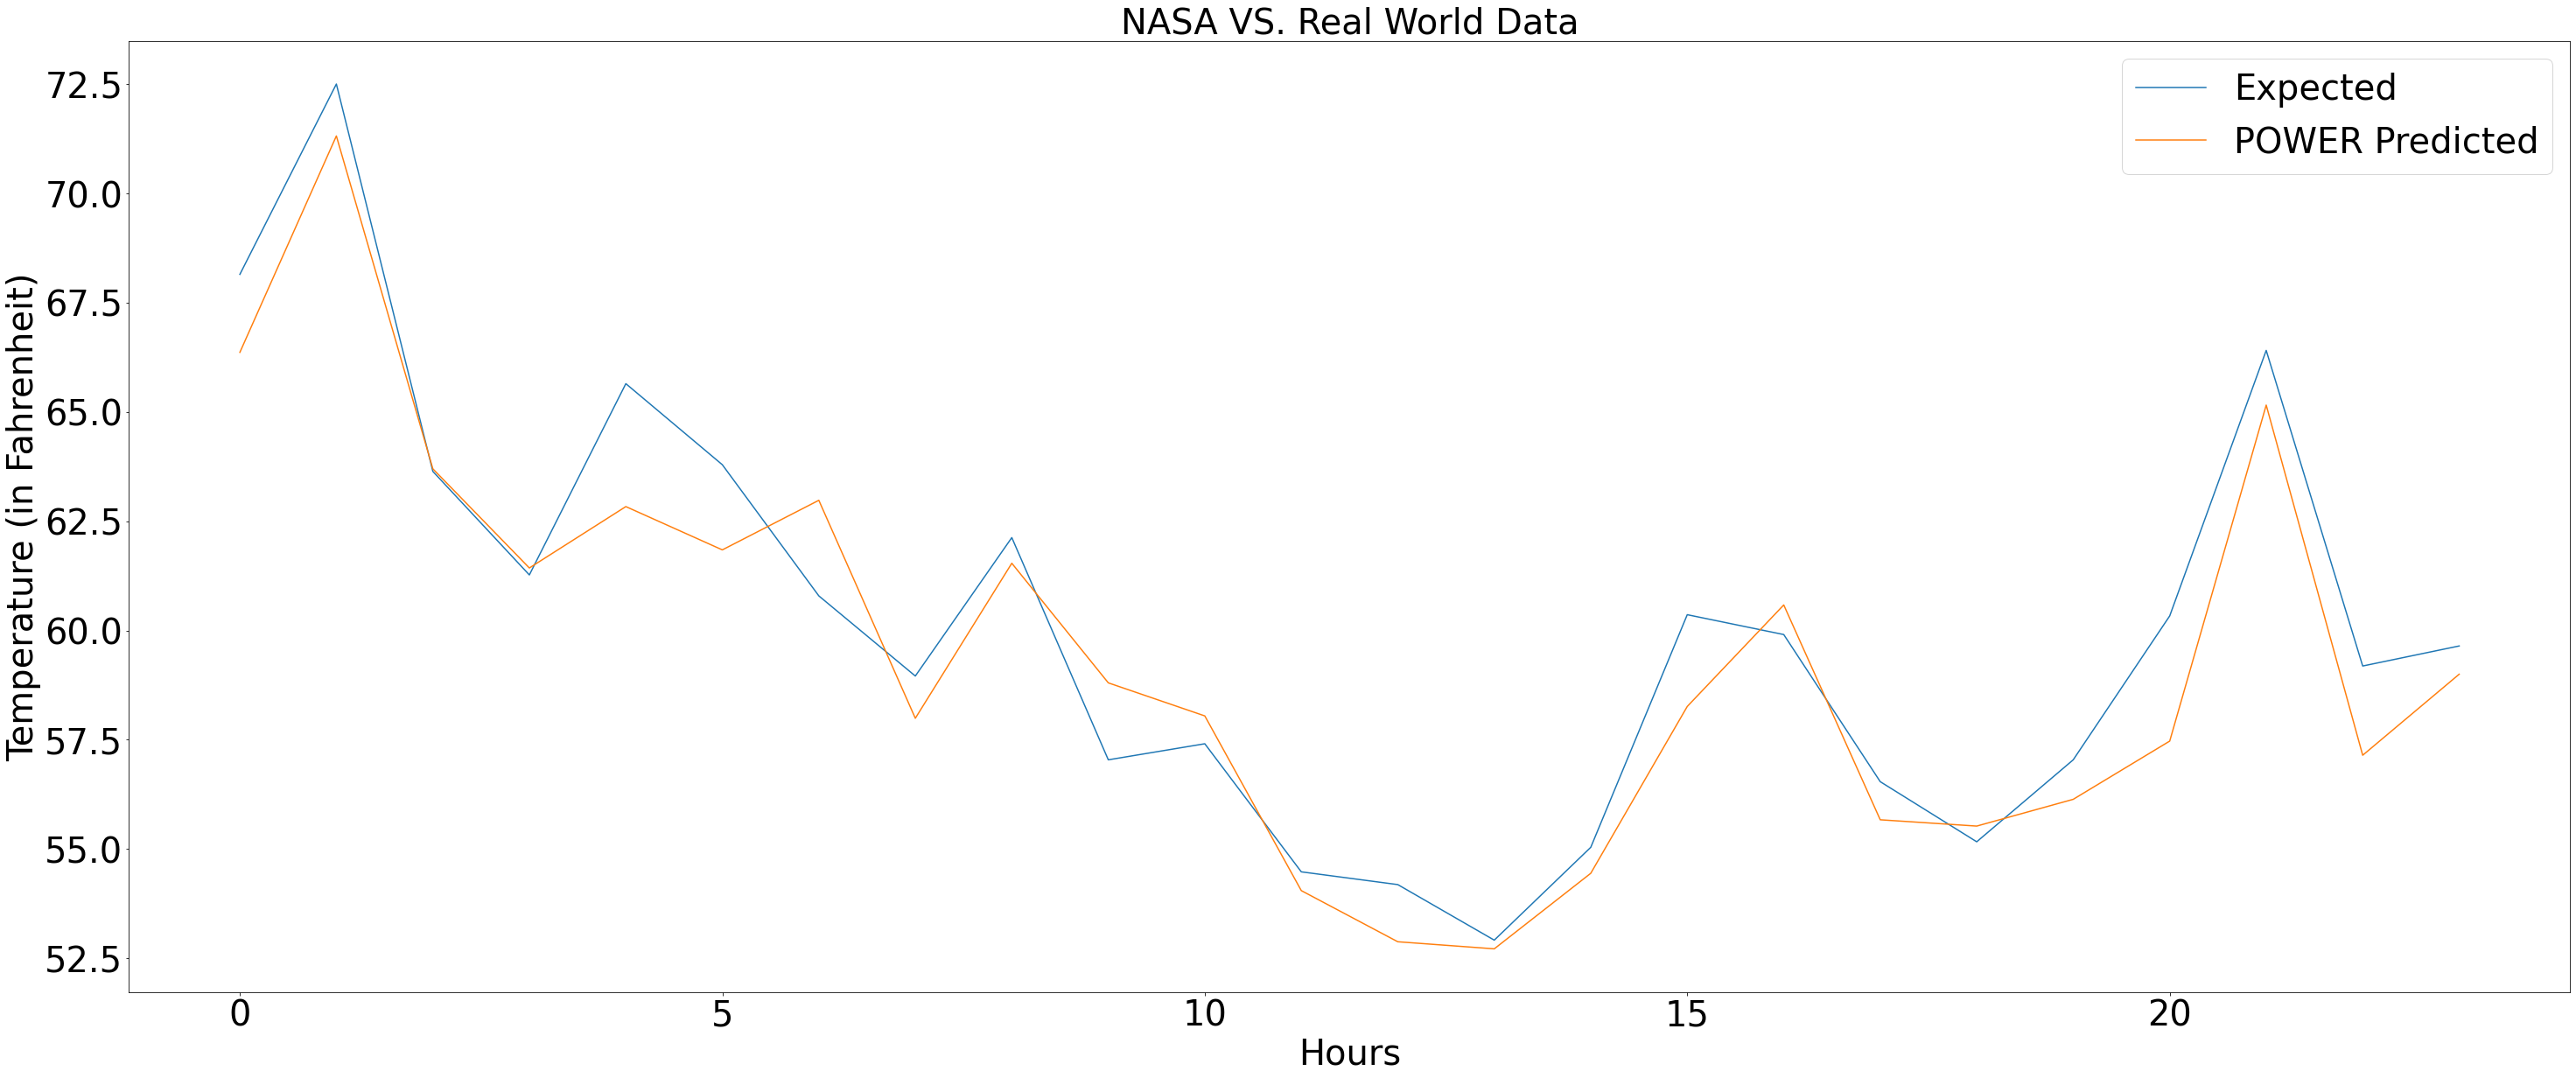

In [232]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 500
to_t = from_t + 24
plt.plot(avg_gt[from_t:to_t], label='Expected')
# plt.plot(avg_pred[from_t:to_t], label='RFR Predicted')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.xlabel("Hours", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.legend(prop={'size':40})
plt.title("NASA VS. Real World Data",fontsize=40)
plt.show()

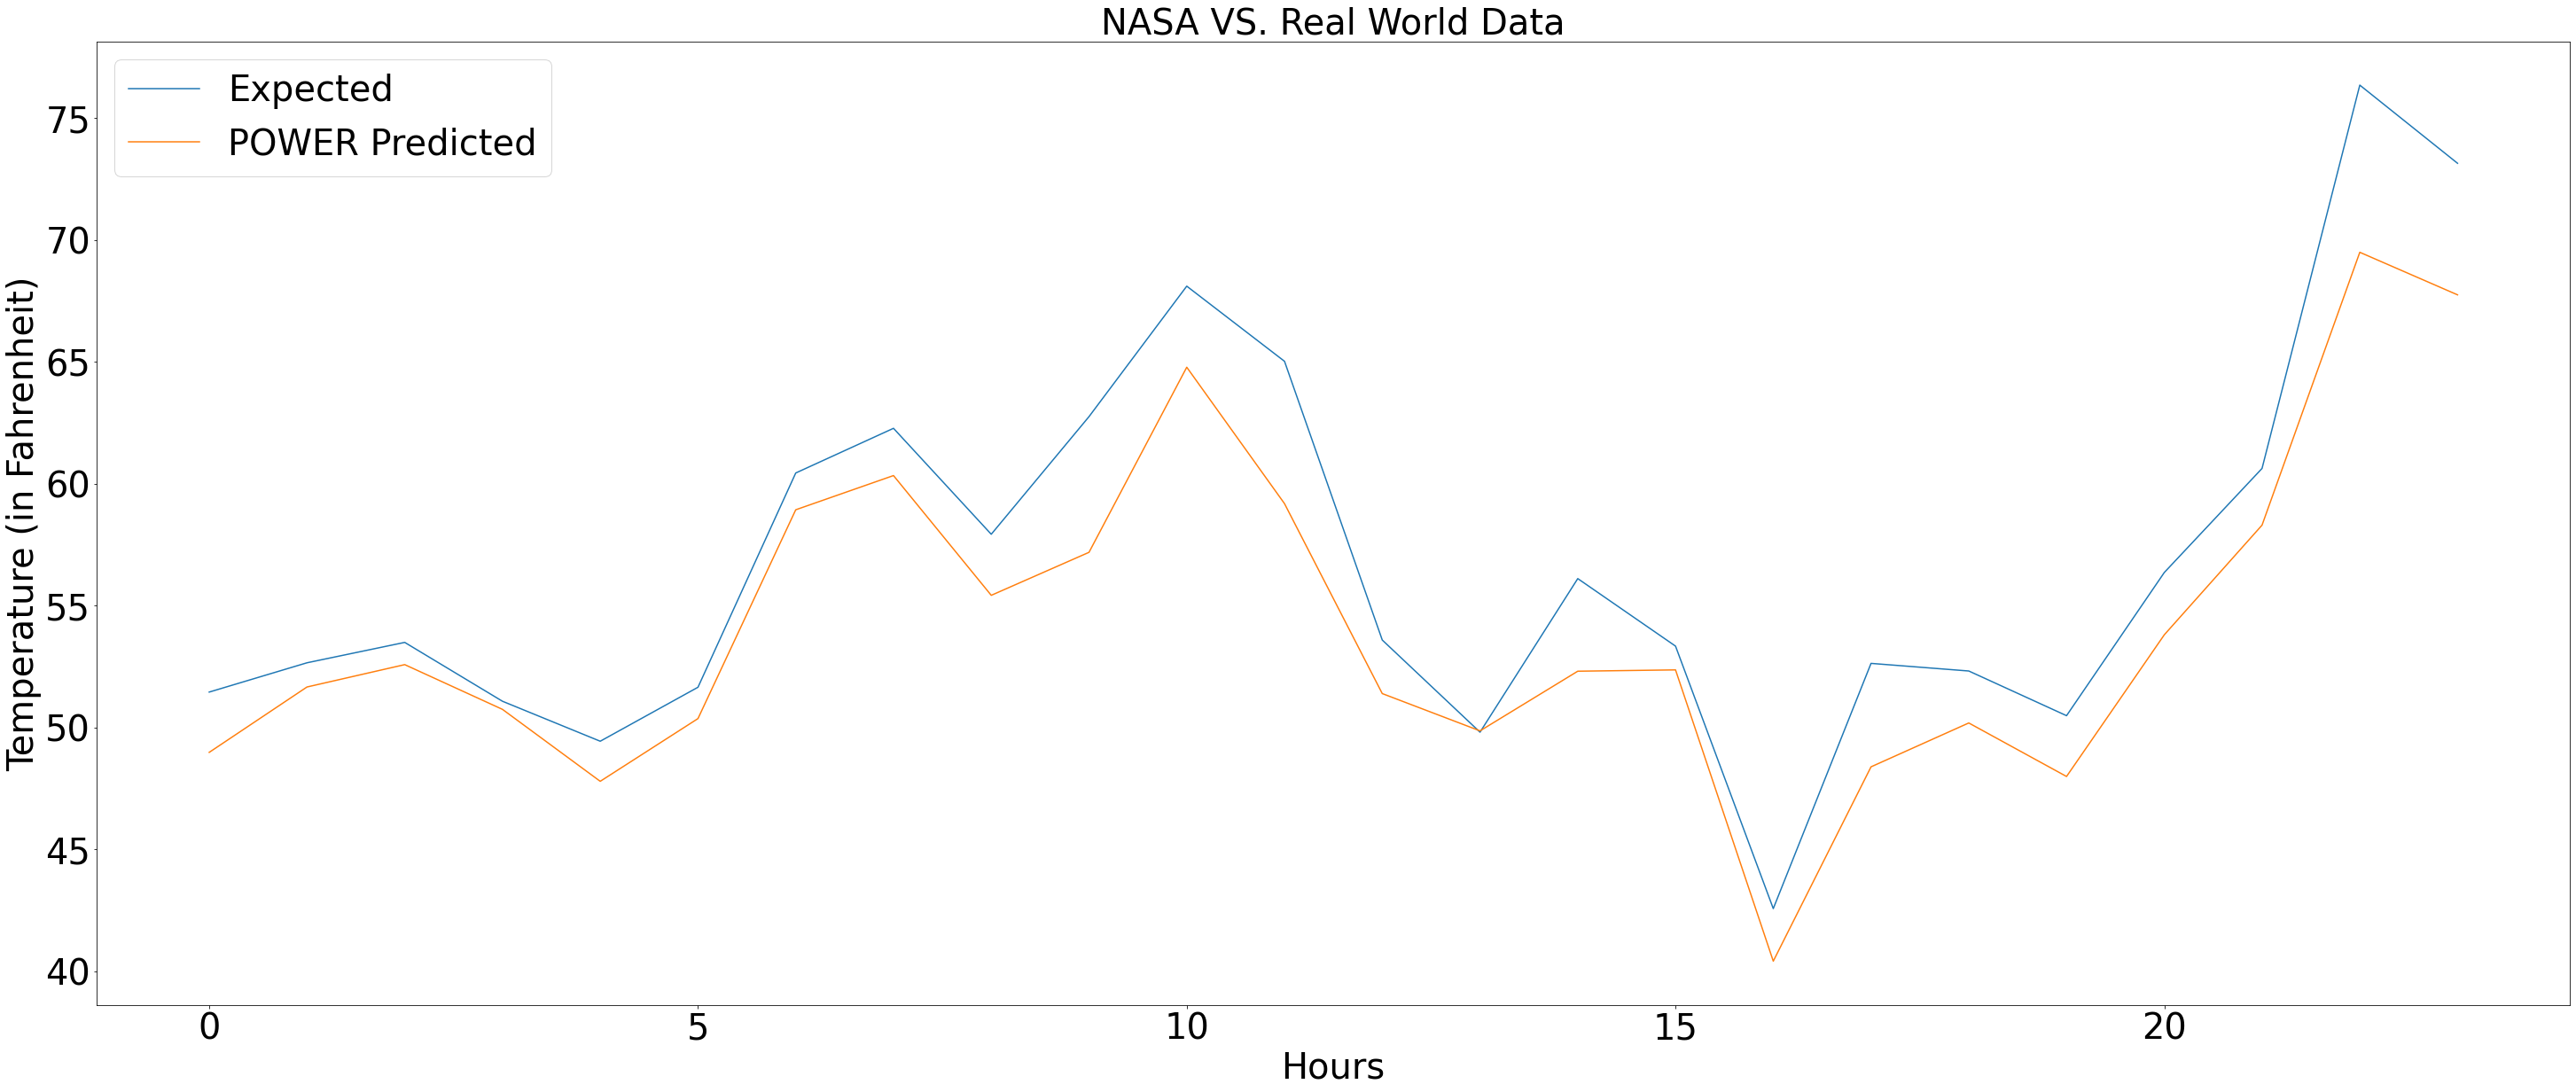

In [233]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 700
to_t = from_t + 24
plt.plot(avg_gt[from_t:to_t], label='Expected')
# plt.plot(avg_pred[from_t:to_t], label='RFR Predicted')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.xlabel("Hours", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.legend(prop={'size':40})
plt.title("NASA VS. Real World Data",fontsize=40)
plt.show()

#### RFR VS. POWER

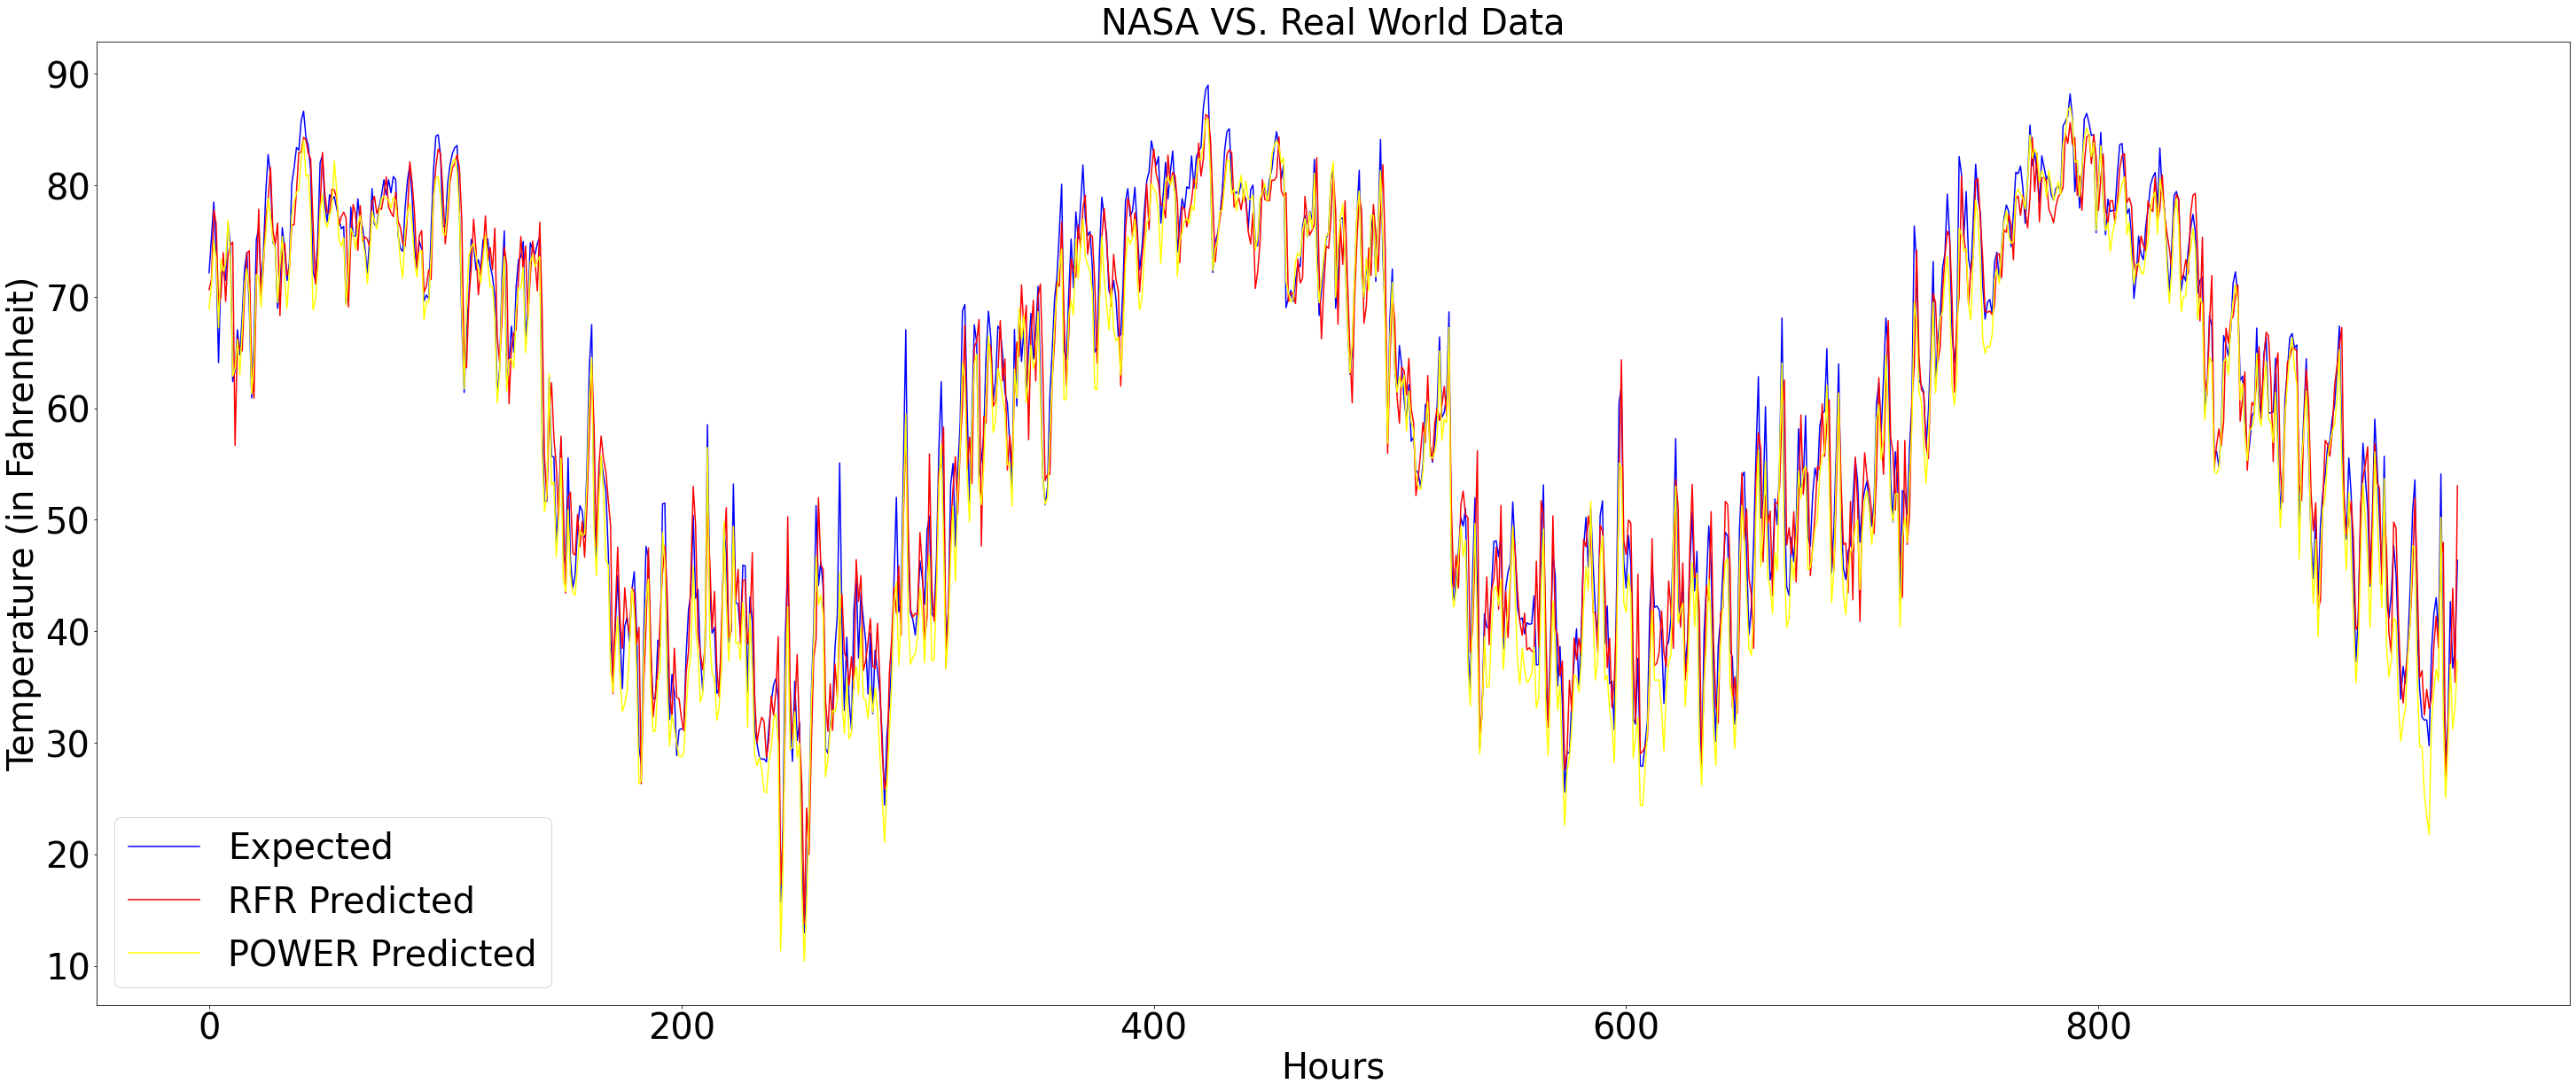

In [234]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 0
to_t = from_t + 953
plt.plot(avg_gt[from_t:to_t], label='Expected', color='blue')
plt.plot(avg_pred[from_t:to_t], label='RFR Predicted', color='red')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted', color='yellow')
# plt.xticks(hours_range)
plt.tick_params(labelsize=40)
plt.xlabel("Hours", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.legend(prop={'size':40})
plt.title("NASA VS. Real World Data",fontsize=40)
plt.show()

# RFR Metrics:

#### Daliy Average Estimation:

In [317]:
# Daily Estimation Prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

rms_res = mean_squared_error(avg_gt, power_gt, squared=False)
print("Daily Estimation RMSE (NASA's POWER model):", rms_res)

#calculate MAE
mae_res = mae(avg_gt, power_gt)
print("Daily Estimation MAE (NASA's POWER model):", mae_res)

Daily Estimation RMSE (NASA's POWER model): 3.375790367415629
Daily Estimation MAE (NASA's POWER model): 2.6410530467065088


In [318]:
# Daily Estimation Prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

rms_res = mean_squared_error(avg_gt, avg_pred, squared=False)
print("Daily Estimation RMSE (RFR):", rms_res)

#calculate MAE
mae_res = mae(avg_gt, avg_pred)
print("Daily Estimation MAE (RFR):", mae_res)

Daily Estimation RMSE (RFR): 3.5574322698800582
Daily Estimation MAE (RFR): 2.706796216650358


In [237]:
# avg_gt = []
# avg_pred = []
# power_gt = list(df_POWER['T2M_F'][8:])

# # print(len(y_test_gt))
# # print(len(y_test_pred))
# # print(len(power_gt))


# import statistics

# for i in range(0, len(y_test_gt)):
#     avg_gt.append(statistics.mean(y_test_gt[i]))
#     avg_pred.append(statistics.mean(y_test_pred[i]))
    
# # Single Point Prediction
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error as mae

# rms_res = mean_squared_error(avg_gt, avg_pred, squared=False)
# print("Single Point RMSE (RFR):", rms_res)

# #calculate MAE
# mae_res = mae(avg_gt, avg_pred)
# print("Single Point MAE (RFR):", mae_res)

#### Hourly Estimation:

In [319]:
# Single Point Prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

rms_res = mean_squared_error(main_expected, main_pred, squared=False)
print("Daily Estimation RMSE:", rms_res)

#calculate MAE
mae_res = mae(main_expected, main_pred)
print("Daily Estimation MAE:", mae_res)

Daily Estimation RMSE: 5.042728489834166
Daily Estimation MAE: 3.728870938226697


# LSTM

In [320]:
# Data wrangling
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, SimpleRNN, Masking, Flatten
from keras import losses
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal

In [321]:
df = pd.read_csv('main_data/weather_data_final.csv')

In [322]:
df.head()

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0  2005-01-01     0                   30.27                       39.0   
1  2005-01-01     1                   30.26                       39.0   
2  2005-01-01     2                   30.28                       39.0   
3  2005-01-01     3                   30.27                       39.0   
4  2005-01-01     4                   30.27                       39.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                      46.0                  0.0                    77.0   
1                      45.5                  0.0                    78.5   
2                      44.0                  0.0                    83.0   
3                      45.0                  0.0                    80.0   
4                      43.0                  0.0                    86.0   

   HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                  30.270                 30.100             10.00   
1                  30.265                 30.095              9.97   
2                  30.280                 30.110             10.00   
3                  30.270                 30.100             10.00   
4                  30.270                 30.100              8.00   

   HourlyWetBulbTemperature  HourlyWindSpeed  
0                      43.0              3.0  
1                      42.5              1.5  
2                      42.0              0.0  
3                      42.0              5.0  
4                      41.0              0.0

In [323]:
df.columns

Index(['Date_only', 'HOUR', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed'],
      dtype='object')

In [324]:
df['Date_only'] = pd.to_datetime(df['Date_only'])
df['Month'] = (df['Date_only'].dt.month).astype(int)
df['Day'] = (df['Date_only'].dt.day).astype(int)

In [325]:
df

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0      2005-01-01     0                   30.27                       39.0   
1      2005-01-01     1                   30.26                       39.0   
2      2005-01-01     2                   30.28                       39.0   
3      2005-01-01     3                   30.27                       39.0   
4      2005-01-01     4                   30.27                       39.0   
...           ...   ...                     ...                        ...   
140251 2020-12-31    19                   30.34                       29.0   
140252 2020-12-31    20                   30.38                       28.0   
140253 2020-12-31    21                   30.39                       28.0   
140254 2020-12-31    22                   30.41                       27.0   
140255 2020-12-31    23                   30.41                       27.0   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                           46.0                  0.0                    77.0   
1                           45.5                  0.0                    78.5   
2                           44.0                  0.0                    83.0   
3                           45.0                  0.0                    80.0   
4                           43.0                  0.0                    86.0   
...                          ...                  ...                     ...   
140251                      42.0                  0.0                    60.0   
140252                      41.0                  0.0                    60.0   
140253                      39.0                  0.0                    65.0   
140254                      38.0                  0.0                    65.0   
140255                      37.0                  0.0                    67.0   

        HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                       30.270                 30.100             10.00   
1                       30.265                 30.095              9.97   
2                       30.280                 30.110             10.00   
3                       30.270                 30.100             10.00   
4                       30.270                 30.100              8.00   
...                        ...                    ...               ...   
140251                  30.335                 30.145              9.97   
140252                  30.370                 30.210             10.00   
140253                  30.390                 30.220             10.00   
140254                  30.410                 30.240             10.00   
140255                  30.410                 30.240             10.00   

        HourlyWetBulbTemperature  HourlyWindSpeed  Month  Day  
0                           43.0              3.0      1    1  
1                           42.5              1.5      1    1  
2                           42.0              0.0      1    1  
3                           42.0              5.0      1    1  
4                           41.0              0.0      1    1  
...                          ...              ...    ...  ...  
140251                      36.5              5.5     12   31  
140252                      36.0              6.0     12   31  
140253                      35.0              5.0     12   31  
140254                      34.0              5.0     12   31  
140255                      33.0              3.0     12   31  

[140256 rows x 14 columns]

In [326]:
df = df.set_index('Date_only')
df = df[['HourlyDryBulbTemperature','HourlyAltimeterSetting',
       'HourlyDewPointTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'HOUR', 'Month', 'Day']]

In [327]:
df.head()

HourlyDryBulbTemperature  HourlyAltimeterSetting  \
Date_only                                                      
2005-01-01                      46.0                   30.27   
2005-01-01                      45.5                   30.26   
2005-01-01                      44.0                   30.28   
2005-01-01                      45.0                   30.27   
2005-01-01                      43.0                   30.27   

            HourlyDewPointTemperature  HourlyPrecipitation  \
Date_only                                                    
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   

            HourlyRelativeHumidity  HourlySeaLevelPressure  \
Date_only                                                    
2005-01-01                    77.0                  30.270   
2005-01-01                    78.5                  30.265   
2005-01-01                    83.0                  30.280   
2005-01-01                    80.0                  30.270   
2005-01-01                    86.0                  30.270   

            HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
Date_only                                                                       
2005-01-01                 30.100             10.00                      43.0   
2005-01-01                 30.095              9.97                      42.5   
2005-01-01                 30.110             10.00                      42.0   
2005-01-01                 30.100             10.00                      42.0   
2005-01-01                 30.100              8.00                      41.0   

            HourlyWindSpeed  HOUR  Month  Day  
Date_only                                      
2005-01-01              3.0     0      1    1  
2005-01-01              1.5     1      1    1  
2005-01-01              0.0     2      1    1  
2005-01-01              5.0     3      1    1  
2005-01-01              0.0     4      1    1

In [328]:
df.shape

(140256, 13)

In [329]:
# df.to_csv('my_weather_data.csv')

### Train test split

In [330]:
df.head()

HourlyDryBulbTemperature  HourlyAltimeterSetting  \
Date_only                                                      
2005-01-01                      46.0                   30.27   
2005-01-01                      45.5                   30.26   
2005-01-01                      44.0                   30.28   
2005-01-01                      45.0                   30.27   
2005-01-01                      43.0                   30.27   

            HourlyDewPointTemperature  HourlyPrecipitation  \
Date_only                                                    
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   

            HourlyRelativeHumidity  HourlySeaLevelPressure  \
Date_only                                                    
2005-01-01                    77.0                  30.270   
2005-01-01                    78.5                  30.265   
2005-01-01                    83.0                  30.280   
2005-01-01                    80.0                  30.270   
2005-01-01                    86.0                  30.270   

            HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
Date_only                                                                       
2005-01-01                 30.100             10.00                      43.0   
2005-01-01                 30.095              9.97                      42.5   
2005-01-01                 30.110             10.00                      42.0   
2005-01-01                 30.100             10.00                      42.0   
2005-01-01                 30.100              8.00                      41.0   

            HourlyWindSpeed  HOUR  Month  Day  
Date_only                                      
2005-01-01              3.0     0      1    1  
2005-01-01              1.5     1      1    1  
2005-01-01              0.0     2      1    1  
2005-01-01              5.0     3      1    1  
2005-01-01              0.0     4      1    1

### Finally

In [250]:
# Data wrangling
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, SimpleRNN, Masking, Flatten
from keras import losses
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal

#### Splitting our data into Time Series format
* 7 days of input = 7 days * 13 features * 24 (168 hours)
* 24 hours of output of target variable data (24 hours)

In [251]:
def create_X_Y(ts: np.array, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Extracting the number of features that are passed from the array 
    n_features = ts.shape[1]
    
    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[(i + lag):(i + lag + n_ahead), target_index])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an RNN input shape 
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

#### Parameters for LSTM for Dry Bulb Prediction

In [332]:
# Number of lags (hours back) to use for models
lag = 168

# Steps ahead to forecast 
n_ahead = 24

# Share of obs in testing 
test_share = 0.2

# Epochs for training
epochs = 20

# Batch size 
batch_size = 512*8

# Learning rate
lr = 0.007

# Number of neurons in LSTM layer
n_layer = 10

In [253]:
features_final = ['HourlyDryBulbTemperature','HourlyAltimeterSetting',
       'HourlyDewPointTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'HOUR', 'Month', 'Day']

In [254]:
# Subseting only the needed columns 
ts = df[features_final]

nrows = ts.shape[0]

# Spliting into train and test sets
train = ts[0:int(nrows * (1 - test_share))]
test = ts[int(nrows * (1 - test_share)):]

# Scaling the data 
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

# Creating the final scaled frame 
ts_s = pd.concat([train, test])

In [255]:
X, Y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)

n_ft = X.shape[2]

In [256]:
# Spliting into train and test sets 
Xtrain, Ytrain = X[0:int(X.shape[0] * (1 - test_share))], Y[0:int(X.shape[0] * (1 - test_share))]
Xval, Yval = X[int(X.shape[0] * (1 - test_share)):], Y[int(X.shape[0] * (1 - test_share)):]

print(f"Shape of training data: {Xtrain.shape}")
print(f"Shape of the target data: {Ytrain.shape}")

print(f"Shape of validation data: {Xval.shape}")
print(f"Shape of the validation target data: {Yval.shape}")

Shape of training data: (112051, 168, 13)
Shape of the target data: (112051, 24)
Shape of validation data: (28013, 168, 13)
Shape of the validation target data: (28013, 24)


In [257]:
from tensorflow.keras.optimizers import SGD
import os 
os.environ['TF_KERAS'] = '1'
%env TF_KERAS = 1

env: TF_KERAS=1


#### LSTM class definition:

In [258]:
class NNMultistepModel():
    
    def __init__(
        self, 
        X, 
        Y, 
        n_outputs,
        n_lag,
        n_ft,
        n_layer,
        batch,
        epochs, 
        lr,
        Xval=None,
        Yval=None,
        mask_value=-999.0,
        min_delta=0.001,
        patience=5
    ):
        lstm_input = Input(shape=(n_lag, n_ft))

        # Series signal 
        lstm_layer = LSTM(n_layer, activation='relu')(lstm_input) # before
        # Not planning to use: lstm_layer = LSTM(n_layer, activation='relu', dropout=0.2)(lstm_input)

        x = Dense(n_outputs)(lstm_layer)
        
        self.model = Model(inputs=lstm_input, outputs=x)
        self.batch = batch 
        self.epochs = epochs
        self.n_layer=n_layer
        self.lr = lr 
        self.Xval = Xval
        self.Yval = Yval
        self.X = X
        self.Y = Y
        self.mask_value = mask_value
        self.min_delta = min_delta
        self.patience = patience

    def trainCallback(self):
        return EarlyStopping(monitor='loss', patience=self.patience, min_delta=self.min_delta)

    def train(self):
        # Getting the untrained model 
        empty_model = self.model
        
        # Initiating the optimizer
        optimizer = keras.optimizers.Adam(learning_rate=self.lr)

        # Compiling the model
        empty_model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

        if (self.Xval is not None) & (self.Yval is not None):
            history = empty_model.fit(
                self.X, 
                self.Y, 
                epochs=self.epochs, 
                batch_size=self.batch, 
                validation_data=(self.Xval, self.Yval), 
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        else:
            history = empty_model.fit(
                self.X, 
                self.Y, 
                epochs=self.epochs, 
                batch_size=self.batch,
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        
        # Saving to original model attribute in the class
        self.model = empty_model
        
        # Returning the training history
        return history
    
    def predict(self, X):
        return self.model.predict(X)

In [259]:
# how to normalize input, and then inverse back predicted data

In [260]:
model = NNMultistepModel(
    X=Xtrain,
    Y=Ytrain,
    n_outputs=n_ahead,
    n_lag=lag,
    n_ft=n_ft,
    n_layer=n_layer,
    batch=batch_size,
    epochs=epochs, 
    lr=lr,
    Xval=Xval[:1000],
    Yval=Yval[:1000],
)

In [261]:
model.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 168, 13)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                960       
_________________________________________________________________
dense (Dense)                (None, 24)                264       
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________


In [263]:
history = model.train()

Epoch 1/20
28/28 [==============================] - 8s 253ms/step - loss: 0.8761 - val_loss: 0.4353
Epoch 2/20
28/28 [==============================] - 8s 273ms/step - loss: 0.4422 - val_loss: 0.3789
Epoch 3/20
28/28 [==============================] - 8s 280ms/step - loss: 0.3304 - val_loss: 0.3455
Epoch 4/20
28/28 [==============================] - 8s 283ms/step - loss: 0.2973 - val_loss: 0.3115
Epoch 5/20
28/28 [==============================] - 8s 285ms/step - loss: 0.2661 - val_loss: 0.2854
Epoch 6/20
28/28 [==============================] - 8s 281ms/step - loss: 0.2477 - val_loss: 0.2742
Epoch 7/20
28/28 [==============================] - 8s 280ms/step - loss: 0.2385 - val_loss: 0.2672
Epoch 8/20
28/28 [==============================] - 8s 289ms/step - loss: 0.2324 - val_loss: 0.2634
Epoch 9/20
28/28 [==============================] - 8s 290ms/step - loss: 0.2276 - val_loss: 0.2618
Epoch 10/20
28/28 [==============================] - 8s 286ms/step - loss: 0.2240 - val_loss: 0.2613

In [264]:
# Forecasting on all the samples in the validation set 
forecast = model.predict(Xval)

#### Let's see random samples:

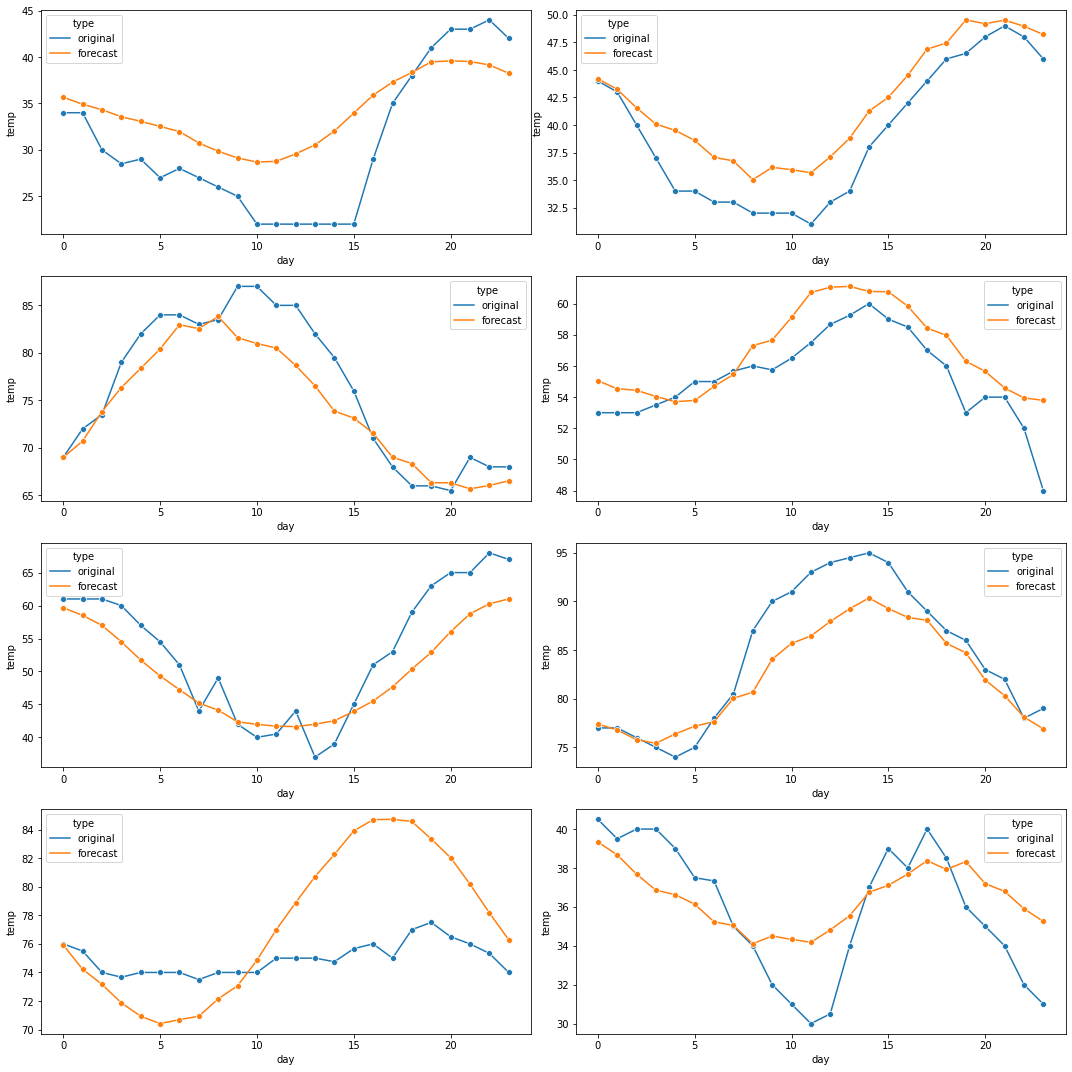

In [265]:

fig, axes = plt.subplots(
    nrows=4, 
    ncols=2, 
    figsize=(15, 15), 
    facecolor="w", 
    edgecolor="k"
)

indexes = random.sample(range(len(forecast)), 8)

for i, index in enumerate(indexes):
    
    yhat = forecast[index]
    y = Yval[index]

    frame = pd.concat([
        pd.DataFrame({'day': range(len(y)), 'HourlyDryBulbTemperature': y, 'type': 'original'}),
        pd.DataFrame({'day': range(len(y)), 'HourlyDryBulbTemperature': yhat, 'type': 'forecast'})
    ])
    
    frame['temp'] = [(x * train_std['HourlyDryBulbTemperature']) + train_mean['HourlyDryBulbTemperature'] for x in frame['HourlyDryBulbTemperature']]
    
    sns.lineplot(x='day', y='temp', ax = axes[i // 2, i % 2], data=frame, hue='type', marker='o')
        
plt.tight_layout()

plt.show()

In [291]:
# Calculating the total average absolute error 
error = 0 
n = 0
residuals = []

for i in range(Yval.shape[0]):
    true = Yval[i]
    hat = forecast[i]
    n += len(true)
    
    true = np.asarray([(x * train_std['HourlyDryBulbTemperature']) + train_mean['HourlyDryBulbTemperature'] for x in true])
    hat = np.asarray([(x * train_std['HourlyDryBulbTemperature']) + train_mean['HourlyDryBulbTemperature'] for x in hat])
    
    residual = true - hat
    residuals.append(residual)
    
    error += np.sum([abs(x) for x in true - hat]) 

print(f'Final average absolute error: {round(error / n, 2)} F')
hourly_RMSE = error / n

Final average absolute error: 4.05 F


In [292]:
# Flattening the list of arrays of residuals
residuals = np.asarray(residuals).flatten().tolist()
abs_residuals = [abs(x) for x in residuals]

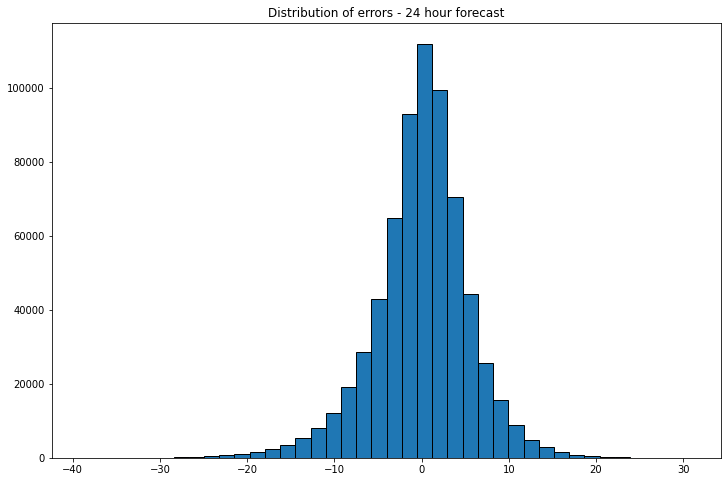

In [293]:
plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=40, edgecolor='black')
plt.title('Distribution of errors - 24 hour forecast')
plt.show()

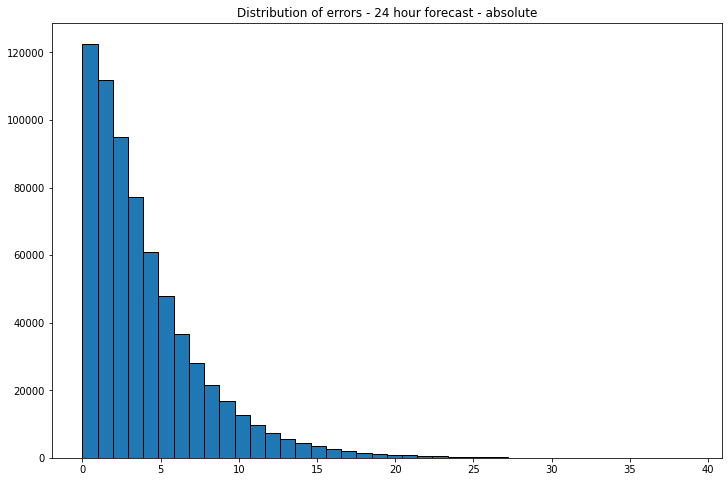

In [294]:
plt.figure(figsize=(12, 8))
plt.hist(abs_residuals, bins=40, edgecolor='black')
plt.title('Distribution of errors - 24 hour forecast - absolute')
plt.show()

In [296]:
print(f"Median absoulte error: {round(np.median(abs_residuals), 2)} F")

hourly_MAE = np.median(abs_residuals)

Median absoulte error: 3.0 F


In [297]:
Yval.shape

(28013, 24)

In [298]:
# Calculating the total average absolute error 
error = 0 
n = 0
residuals = []

overall_true = []
overall_hat = []

daily_true = []
daily_hat = []

for i in range(0, Yval.shape[0], 24):
    
    true = Yval[i]
    hat = forecast[i]
    
    n += len(true)
    
    true = np.asarray([(x * train_std['HourlyDryBulbTemperature']) + train_mean['HourlyDryBulbTemperature'] for x in true])
    hat = np.asarray([(x * train_std['HourlyDryBulbTemperature']) + train_mean['HourlyDryBulbTemperature'] for x in hat])
    
    true_lst = list(true)
    hat_lst = list(hat)
    
    daily_true.append(true_lst)
    daily_hat.append(hat_lst)
    
    if i % 1000 == 0:
        print("Processed:", i/Yval.shape[0]*100, "%")
    
    lim_len = len(list(true))
                   
    for i in true_lst:
        overall_true.append(i)
    for j in hat_lst:
        overall_hat.append(j)

Processed: 0.0 %
Processed: 10.709313533002534 %
Processed: 21.41862706600507 %
Processed: 32.1279405990076 %
Processed: 42.83725413201014 %
Processed: 53.54656766501267 %
Processed: 64.2558811980152 %
Processed: 74.96519473101773 %
Processed: 85.67450826402028 %
Processed: 96.3838217970228 %


In [299]:
y_test_gt = overall_true
y_test_pred = overall_hat

#### Checking full overview

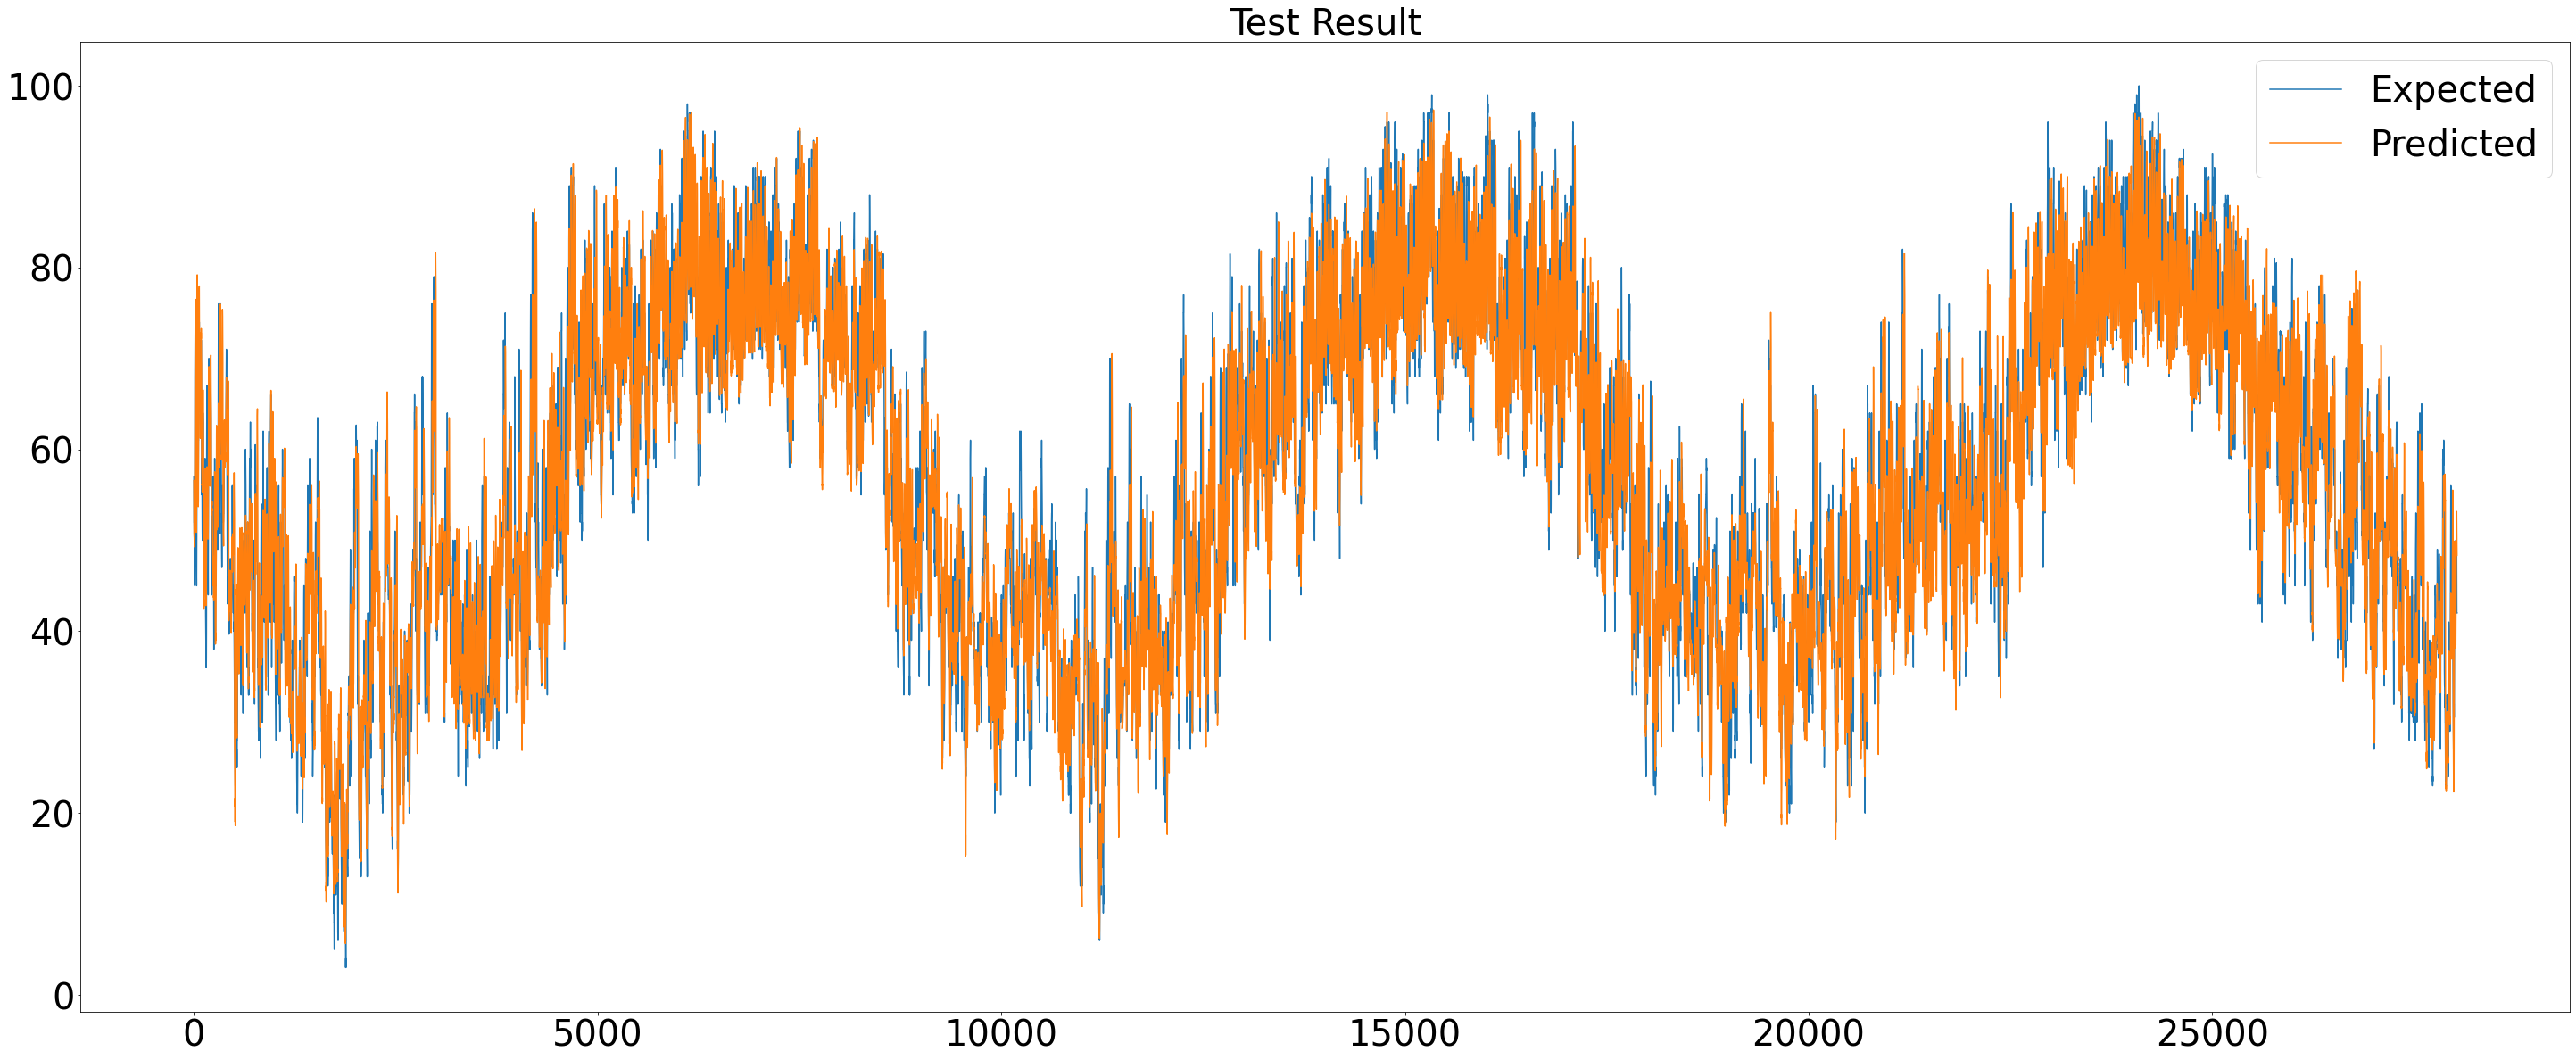

In [300]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

plt.plot(y_test_gt, label='Expected')
plt.plot(y_test_pred, label='Predicted')
# plt.xticks(xticks)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

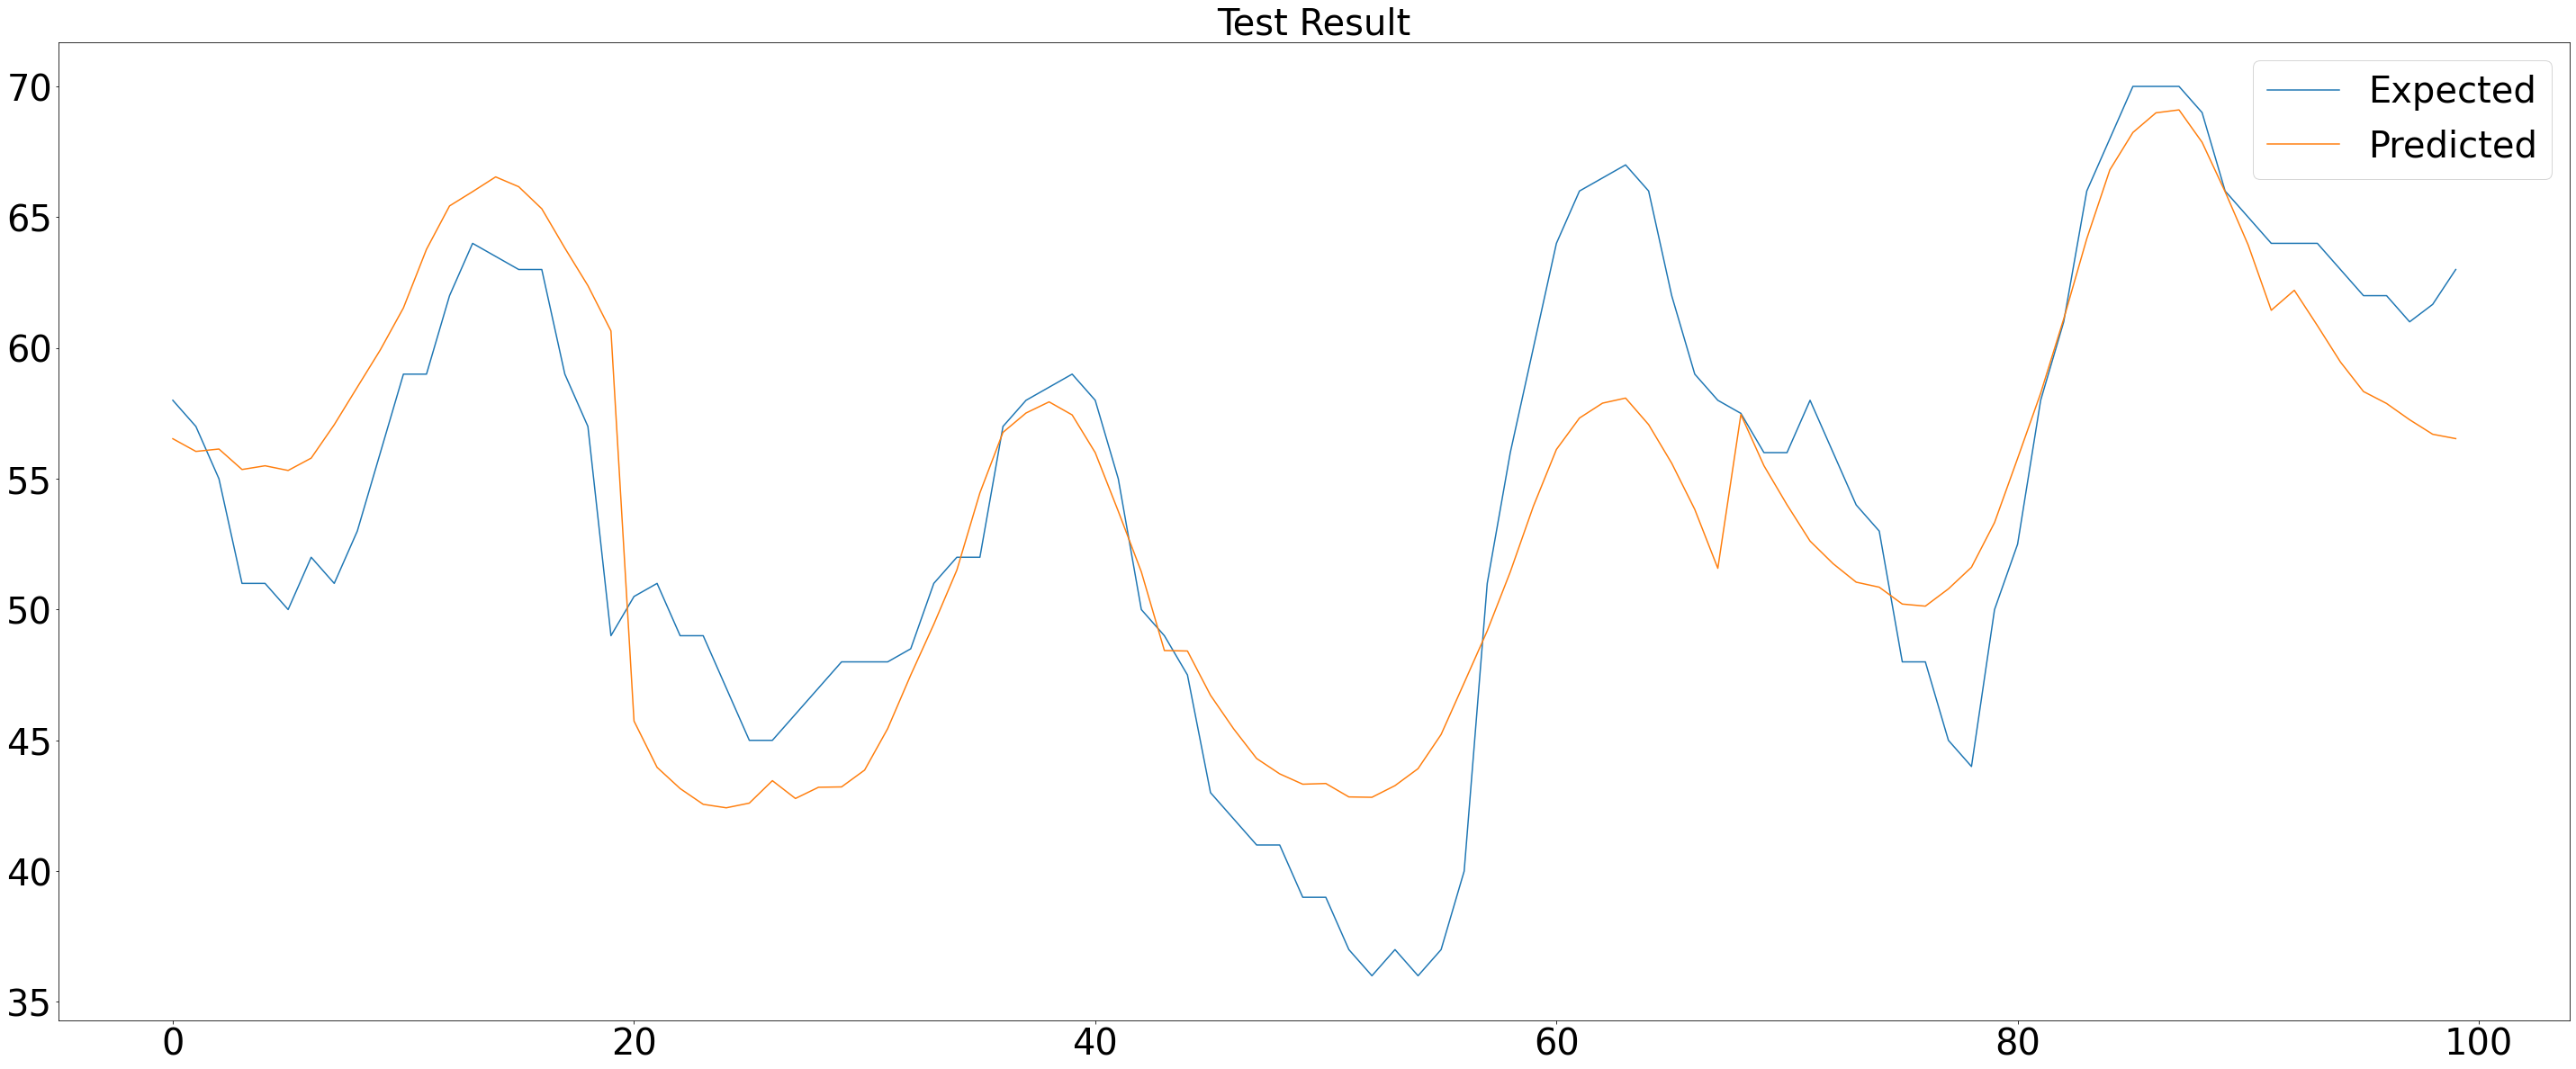

In [301]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

plt.plot(y_test_gt[100:200], label='Expected')
plt.plot(y_test_pred[100:200], label='Predicted')
# plt.xticks(xticks)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

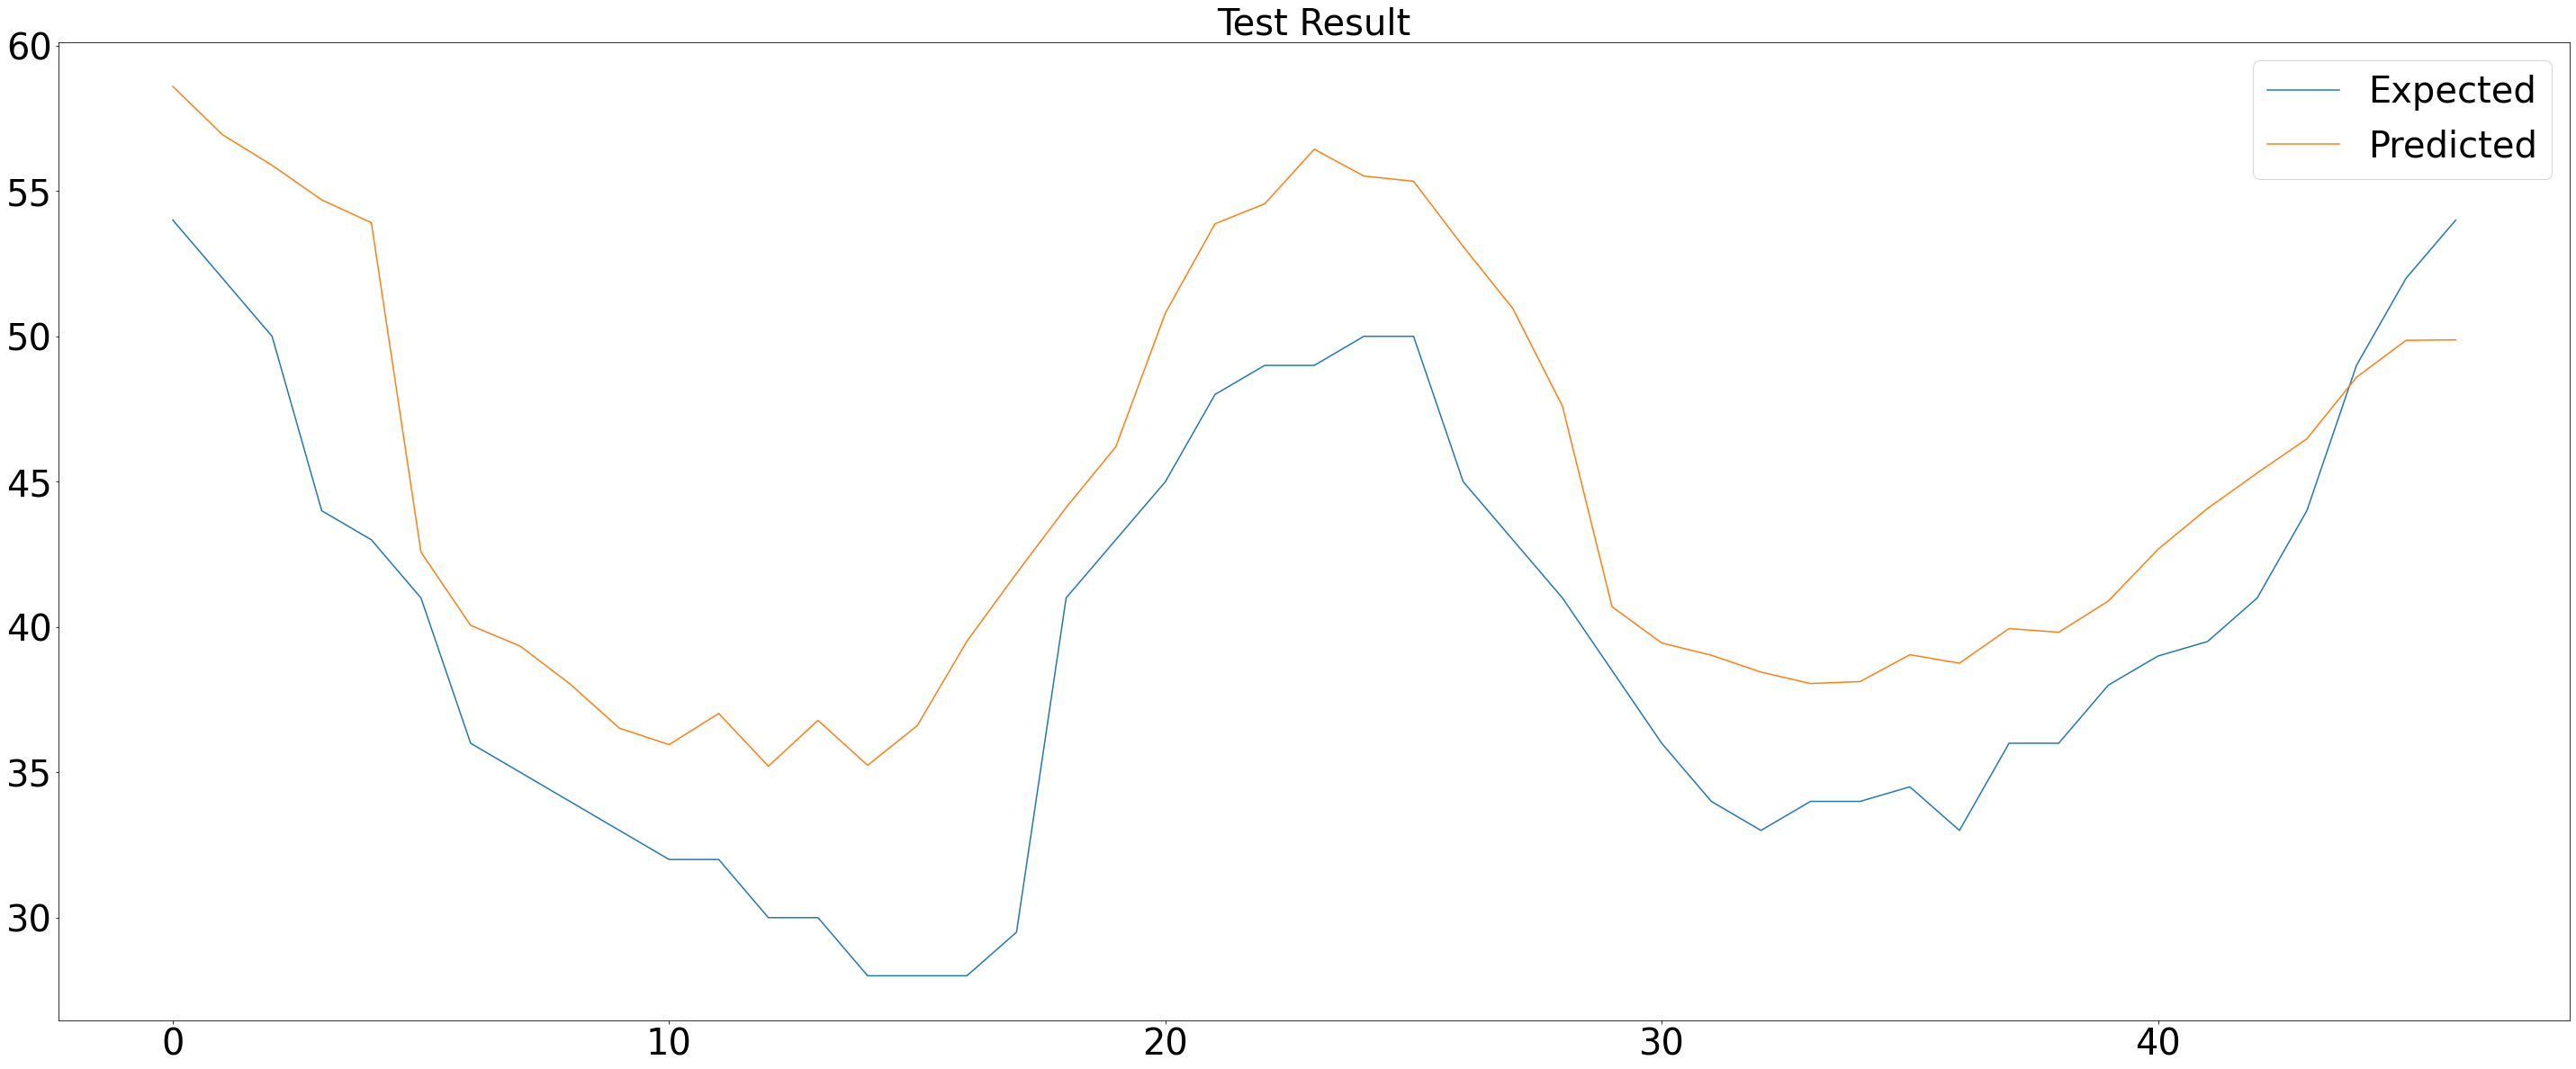

In [302]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

plt.plot(y_test_gt[1003:1050], label='Expected')
plt.plot(y_test_pred[1003:1050], label='Predicted')
# plt.xticks(xticks)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

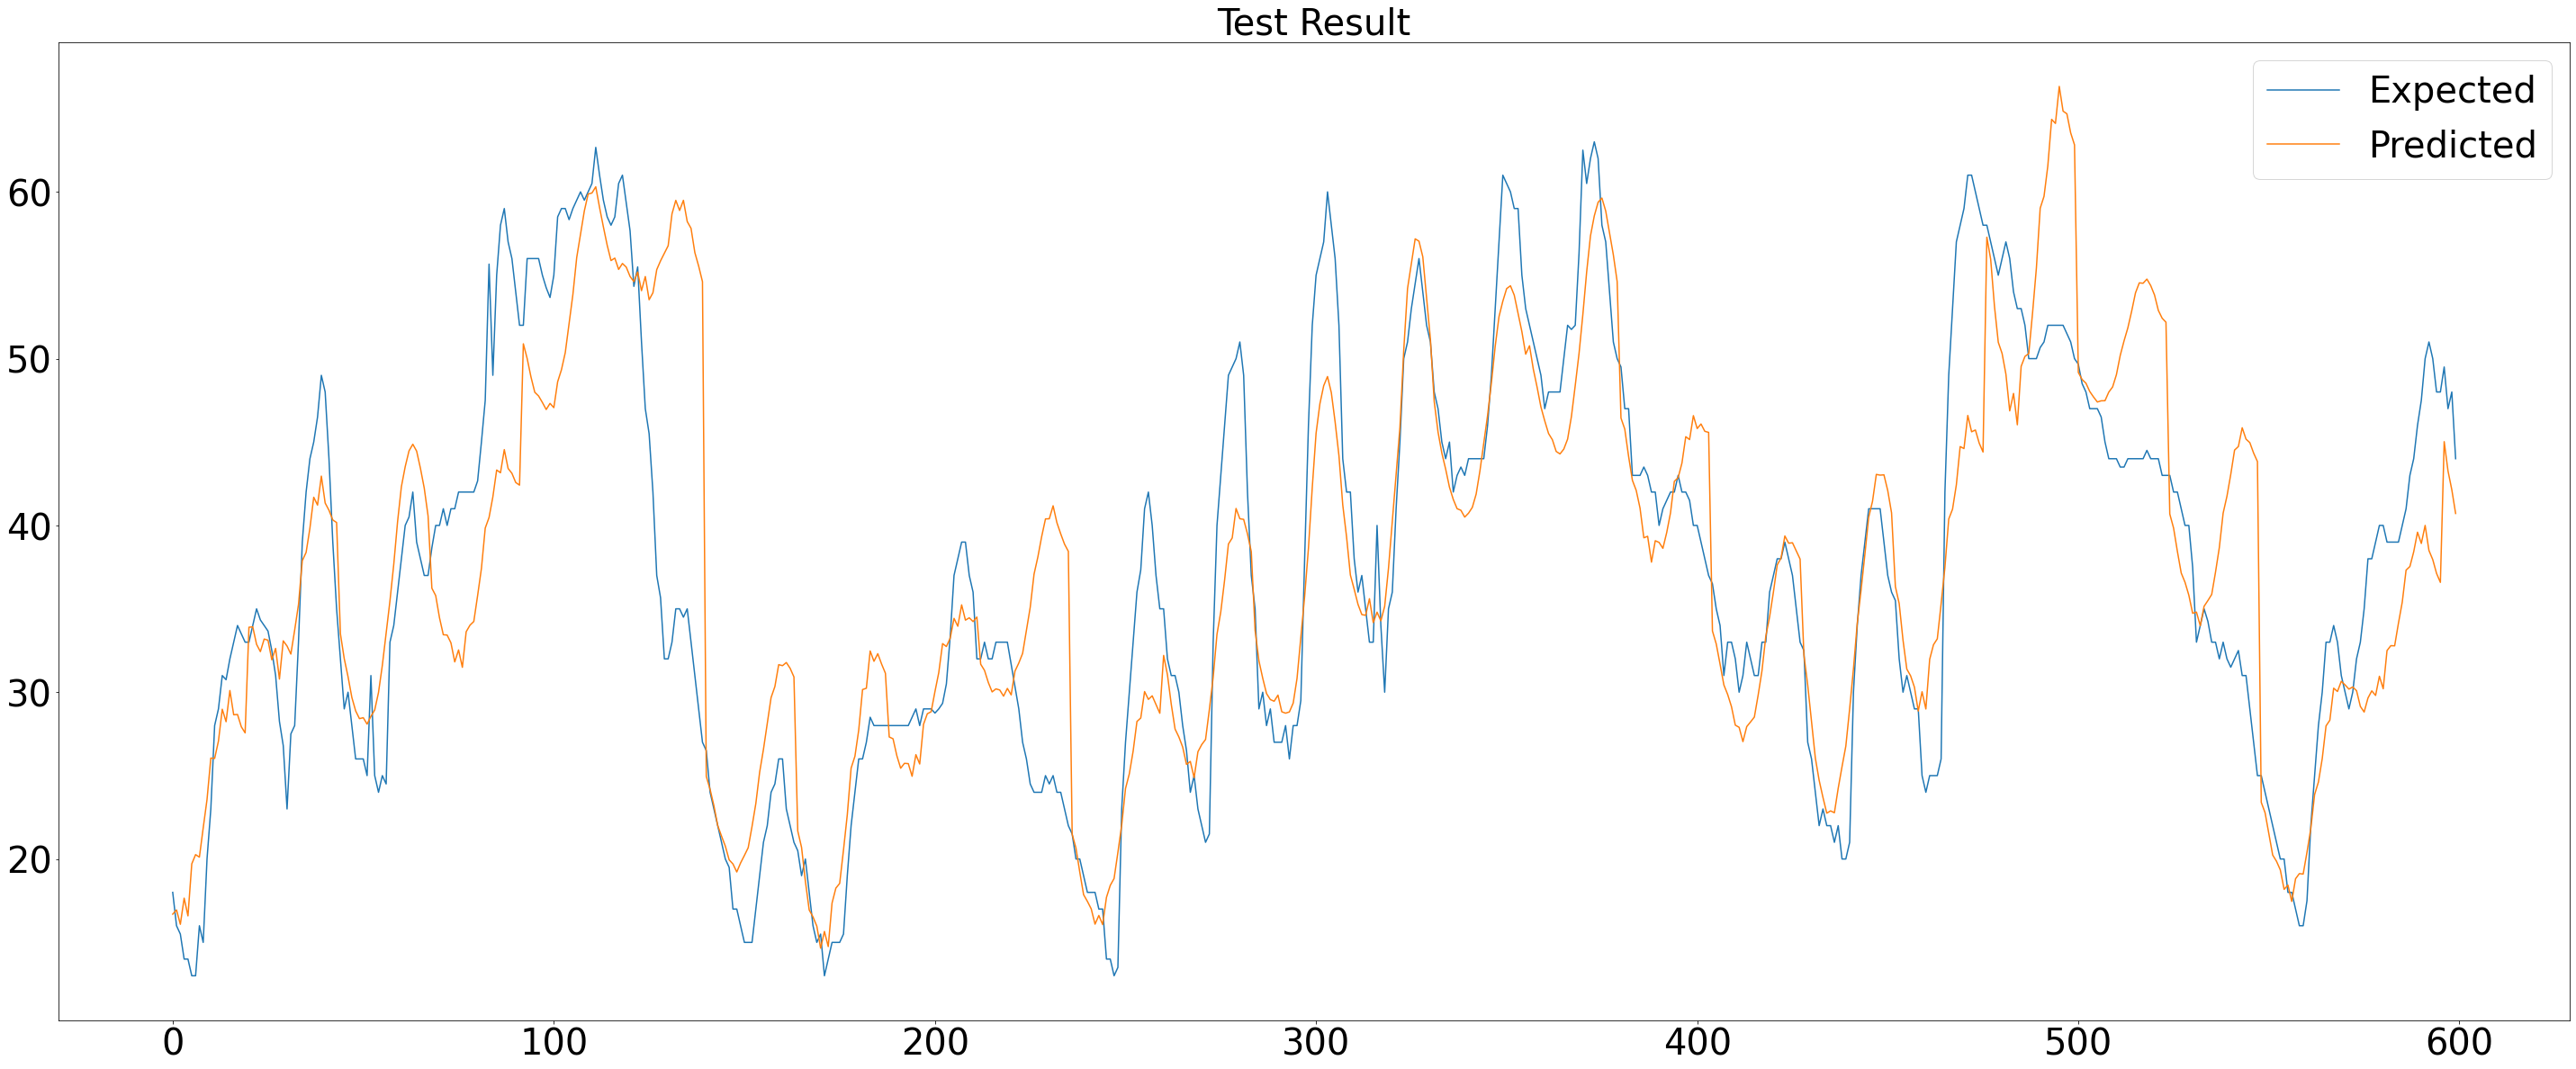

In [303]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

plt.plot(y_test_gt[1900:2500], label='Expected')
plt.plot(y_test_pred[1900:2500], label='Predicted')
# plt.xticks(xticks)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

In [304]:
# daily_true
# daily_hat

### Comparison with Power vs. LSTM

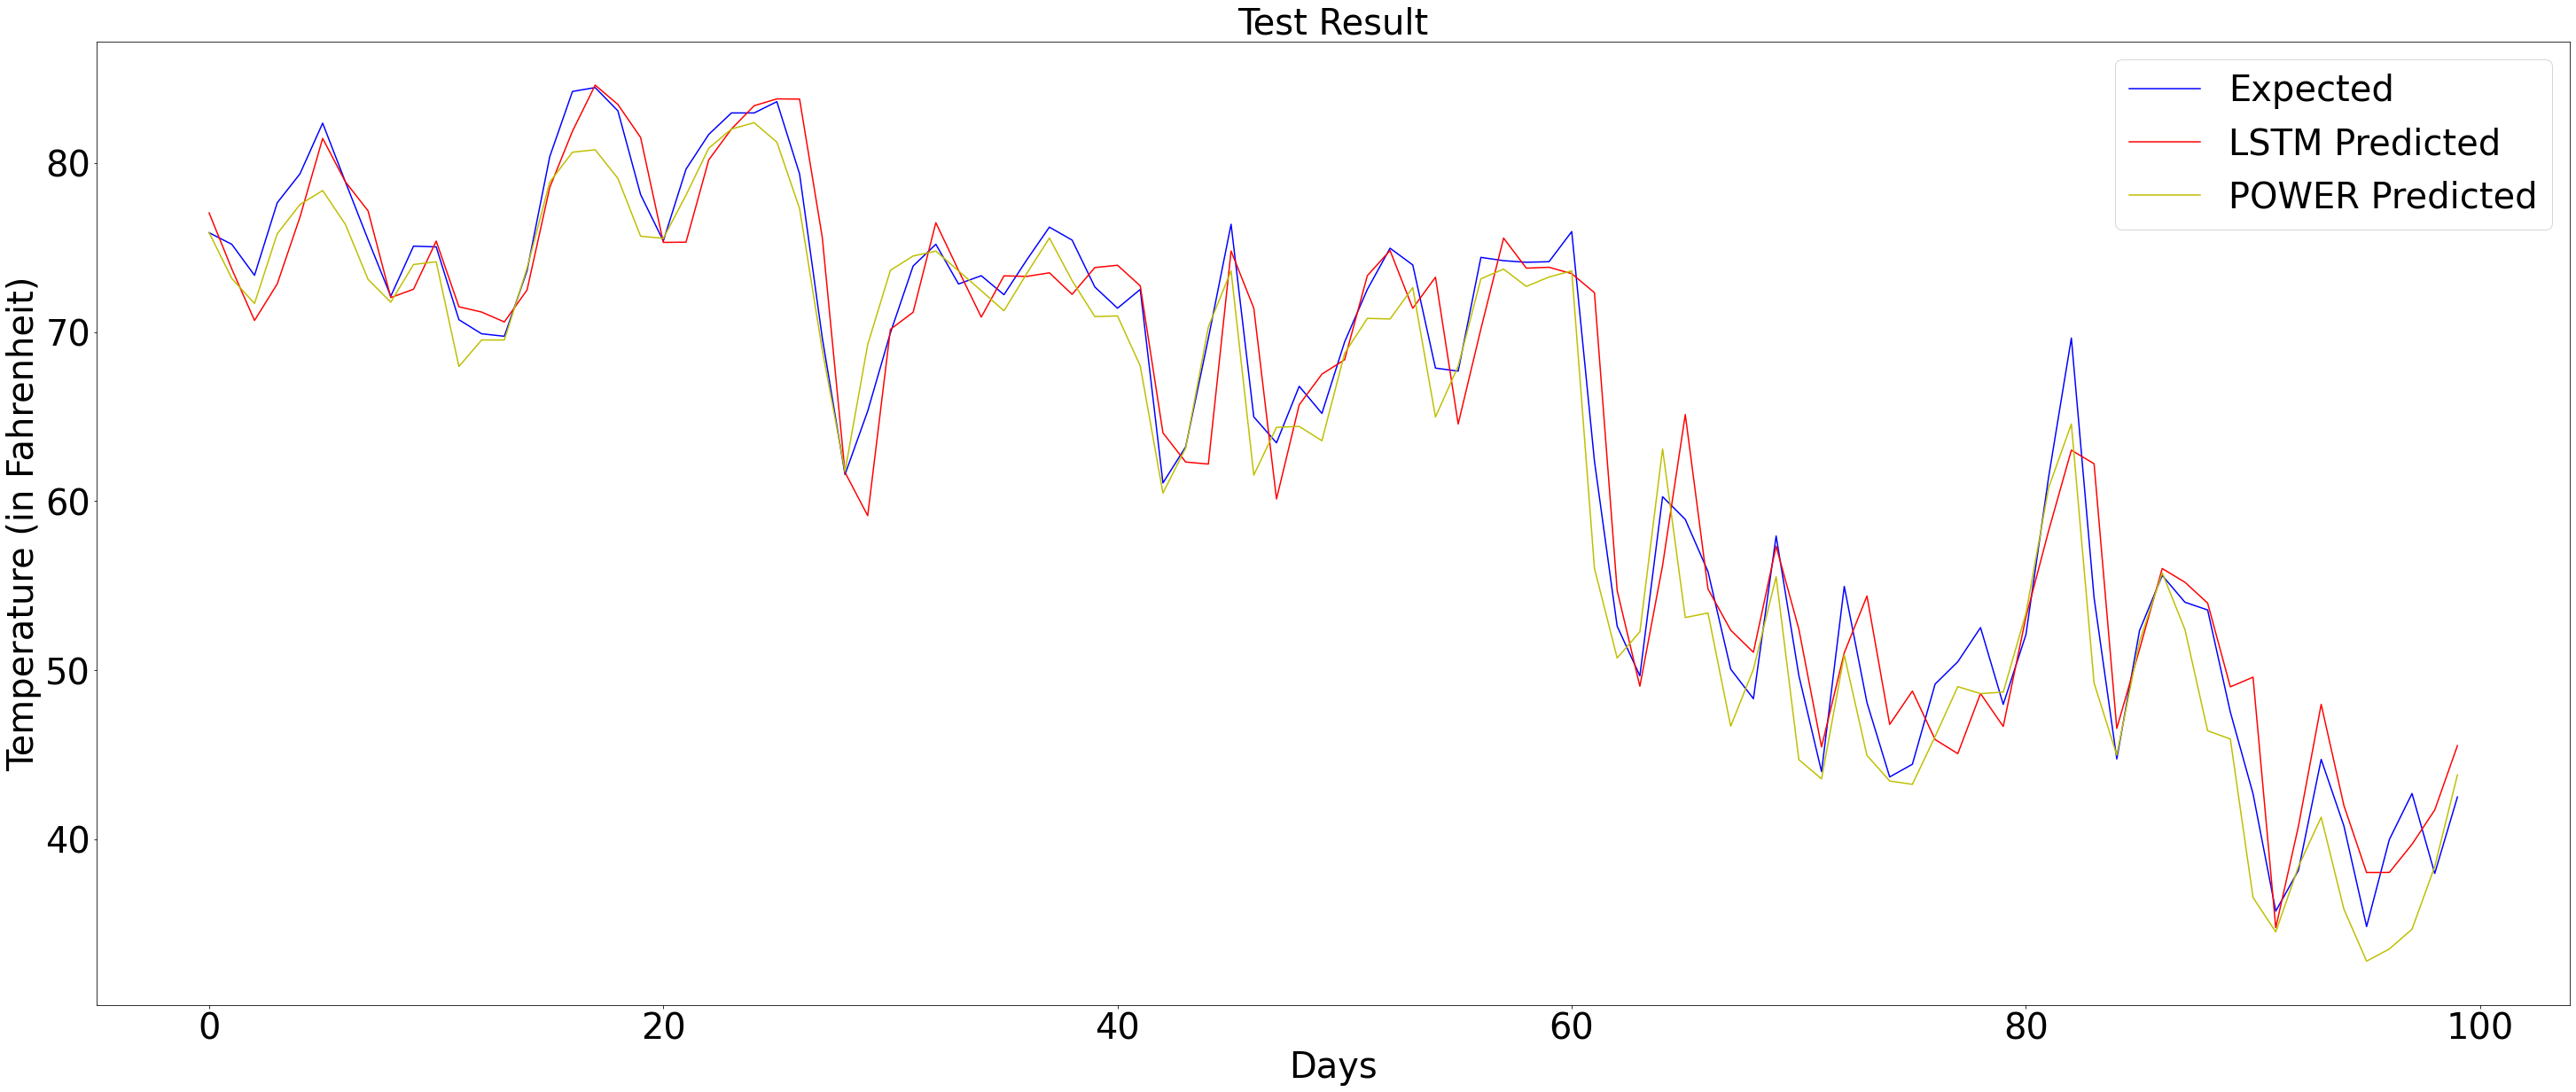

In [305]:
import statistics

avg_gt = []
avg_pred = []

for i in range(215, len(daily_true)):
    avg_gt.append(statistics.mean(daily_true[i]))
    avg_pred.append(statistics.mean(daily_hat[i]))



from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 80
to_t = from_t + 100
plt.plot(avg_gt[from_t:to_t], label='Expected', color='blue')
plt.plot(avg_pred[from_t:to_t], label='LSTM Predicted', color='red')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted', color='y')
# plt.xticks(hours_range)
plt.xlabel("Days", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

In [306]:
# y_test_gt_RFR
# y_test_pred_RFR

In [307]:
y_test_gt_LSTM = daily_true[1168-953:]
y_test_pred_LSTM = daily_hat[1168-953:]

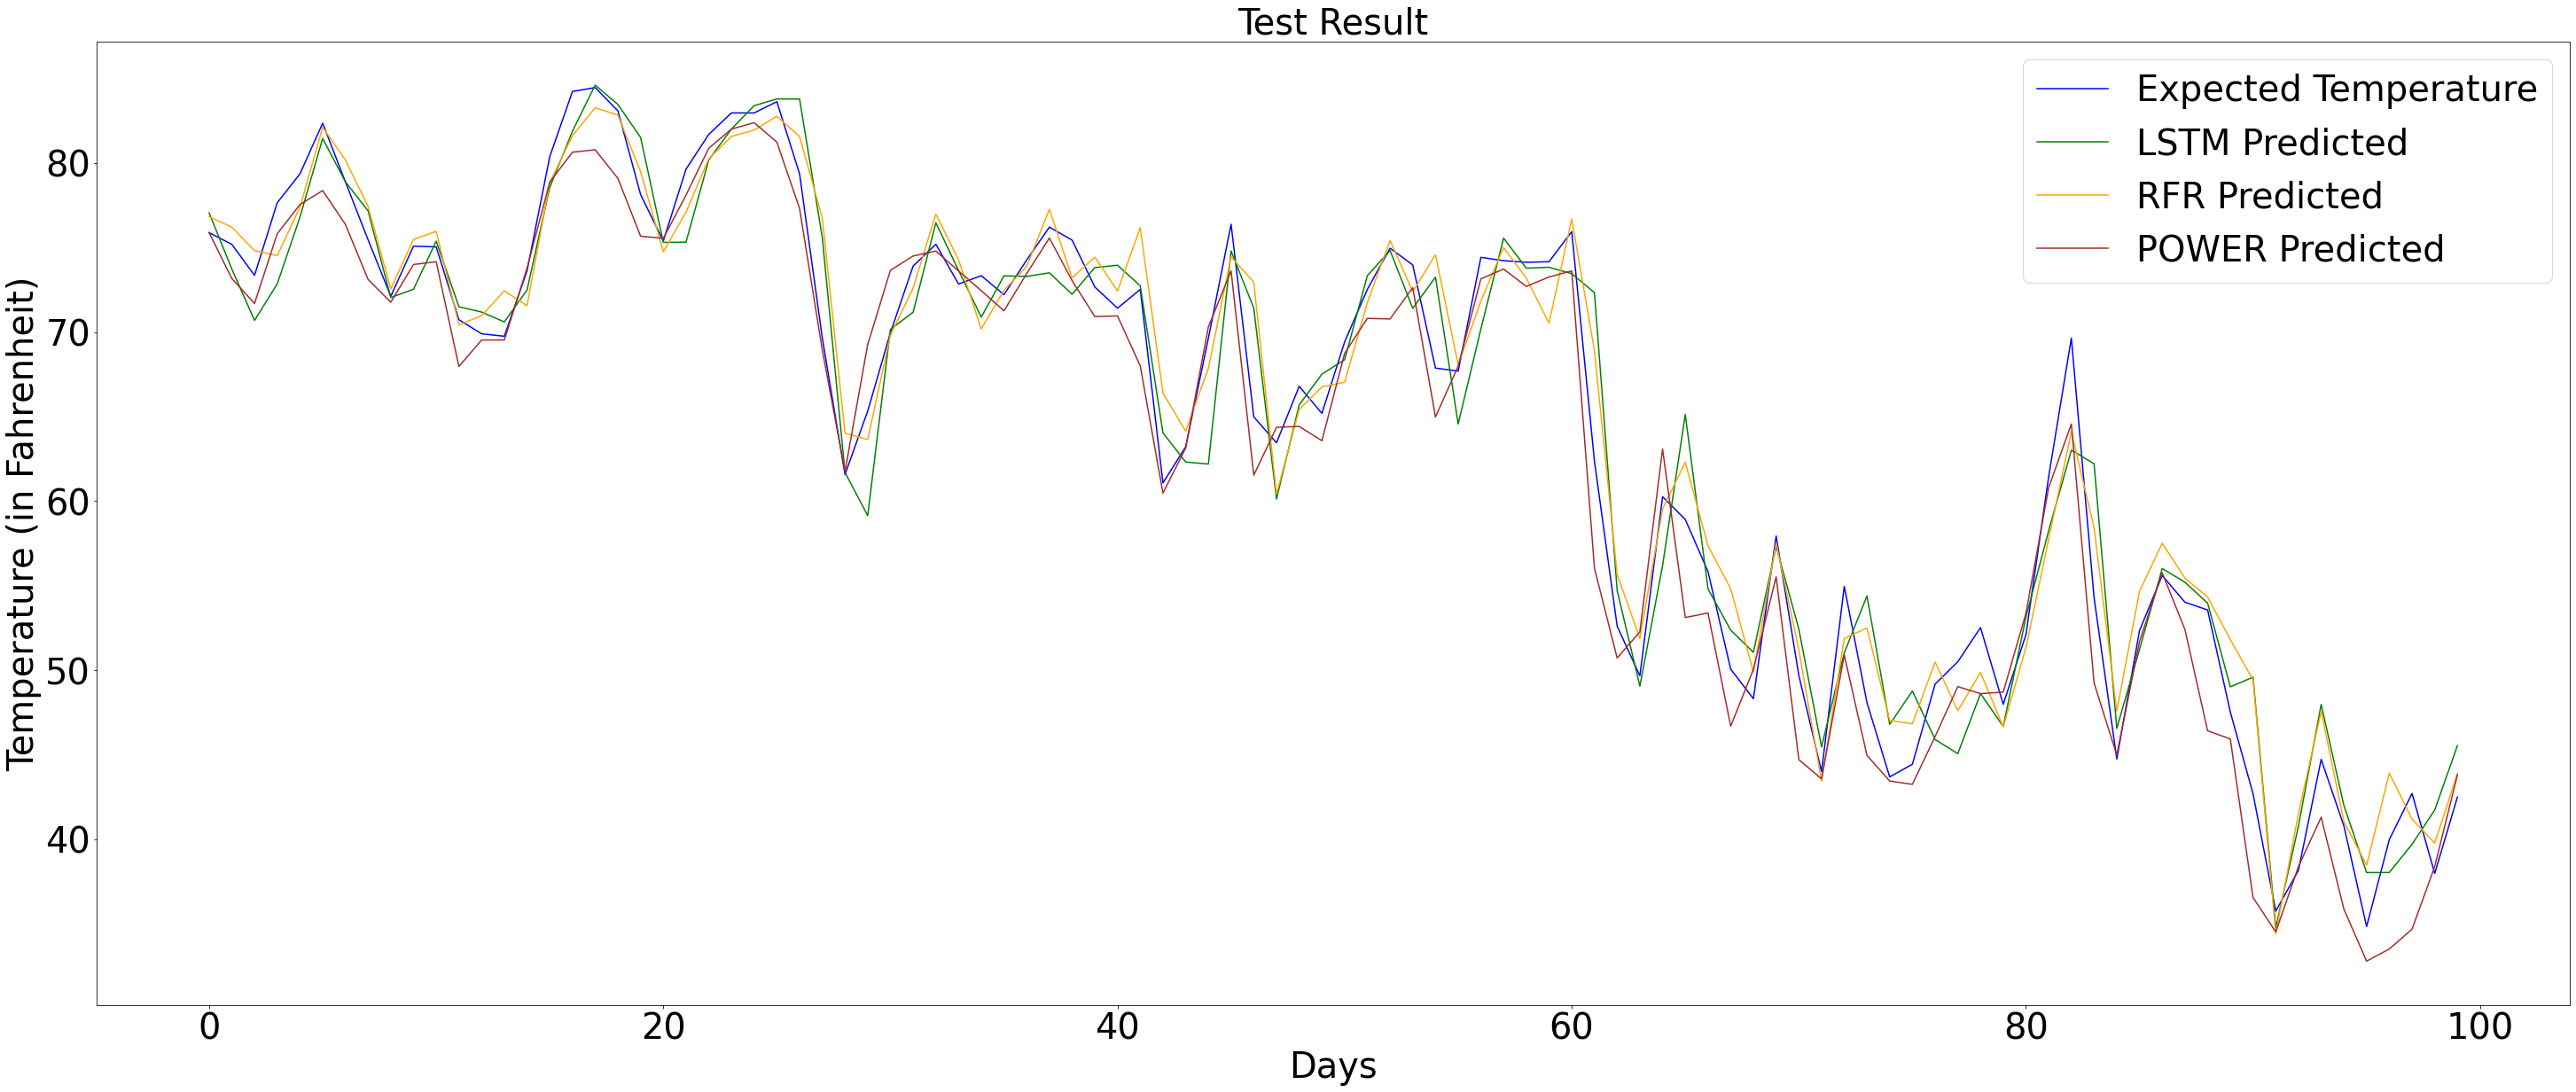

In [336]:
import statistics

avg_gt_RFR = []
avg_pred_RFR = []

avg_gt_LSTM = []
avg_pred_LSTM = []


for i in range(215, len(daily_true)):
    avg_gt_LSTM.append(statistics.mean(daily_true[i]))
    avg_pred_LSTM.append(statistics.mean(daily_hat[i]))
    

for i in range(0, len(y_test_gt_RFR)):
    avg_gt_RFR.append(statistics.mean(y_test_gt_RFR[i]))
    avg_pred_RFR.append(statistics.mean(y_test_pred_RFR[i]))


from matplotlib import pyplot as plt
plt.figure(figsize=(50,20))

from_t = 80
to_t = from_t + 100
plt.plot(avg_gt_LSTM[from_t:to_t], label='Expected Temperature', color='blue')
plt.plot(avg_pred_LSTM[from_t:to_t], label='LSTM Predicted', color='green')
plt.plot(avg_pred_RFR[from_t:to_t], label='RFR Predicted', color='orange')
plt.plot(power_gt[from_t:to_t], label='POWER Predicted', color='brown')
# plt.xticks(hours_range)
plt.xlabel("Days", size=40)
plt.ylabel("Temperature (in Fahrenheit)", size=40)
plt.tick_params(labelsize=40)
plt.legend(prop={'size':40})
plt.title("Test Result",fontsize=40)
plt.show()

# LSTM Metrics:

In [337]:
# Daily Estimation:

In [338]:
rms_res = mean_squared_error(avg_gt_LSTM, avg_pred_LSTM, squared=False)
print("Daily Estimation RMSE (LSTM):", round(rms_res,2))

#calculate MAE
mae_res = mae(avg_gt_LSTM, avg_pred_LSTM)
print("Daily Estimation MAE (LSTM):", round(mae_res,2))

Daily Estimation RMSE (LSTM): 3.56
Daily Estimation MAE (LSTM): 2.71


In [339]:
# Hourly Estimation:

In [340]:
# Hourly Estimation:
print(f'Single Point Estimation (RMSE): {round(hourly_RMSE,2)} F')
print(f"Single Point Estimation (MAE): {round(hourly_MAE,2)} F")

Single Point Estimation (RMSE): 4.05 F
Single Point Estimation (MAE): 3.0 F


# Decan Model Framework (Train and Predict)

# [Levan]

# Module imports

In [341]:
# Data wrangling
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, SimpleRNN, Masking, Flatten
from keras import losses
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal

from tensorflow.keras.backend import clear_session
import time
import gc

# Main CSV Data Import

In [342]:
df = pd.read_csv('main_data/weather_data_final.csv')

In [343]:
df.head()

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0  2005-01-01     0                   30.27                       39.0   
1  2005-01-01     1                   30.26                       39.0   
2  2005-01-01     2                   30.28                       39.0   
3  2005-01-01     3                   30.27                       39.0   
4  2005-01-01     4                   30.27                       39.0   

   HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                      46.0                  0.0                    77.0   
1                      45.5                  0.0                    78.5   
2                      44.0                  0.0                    83.0   
3                      45.0                  0.0                    80.0   
4                      43.0                  0.0                    86.0   

   HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                  30.270                 30.100             10.00   
1                  30.265                 30.095              9.97   
2                  30.280                 30.110             10.00   
3                  30.270                 30.100             10.00   
4                  30.270                 30.100              8.00   

   HourlyWetBulbTemperature  HourlyWindSpeed  
0                      43.0              3.0  
1                      42.5              1.5  
2                      42.0              0.0  
3                      42.0              5.0  
4                      41.0              0.0

In [344]:
df.columns

Index(['Date_only', 'HOUR', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed'],
      dtype='object')

In [345]:
df['Date_only'] = pd.to_datetime(df['Date_only'])
df['Month'] = (df['Date_only'].dt.month).astype(int)
df['Day'] = (df['Date_only'].dt.day).astype(int)

In [346]:
df

Date_only  HOUR  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0      2005-01-01     0                   30.27                       39.0   
1      2005-01-01     1                   30.26                       39.0   
2      2005-01-01     2                   30.28                       39.0   
3      2005-01-01     3                   30.27                       39.0   
4      2005-01-01     4                   30.27                       39.0   
...           ...   ...                     ...                        ...   
140251 2020-12-31    19                   30.34                       29.0   
140252 2020-12-31    20                   30.38                       28.0   
140253 2020-12-31    21                   30.39                       28.0   
140254 2020-12-31    22                   30.41                       27.0   
140255 2020-12-31    23                   30.41                       27.0   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyRelativeHumidity  \
0                           46.0                  0.0                    77.0   
1                           45.5                  0.0                    78.5   
2                           44.0                  0.0                    83.0   
3                           45.0                  0.0                    80.0   
4                           43.0                  0.0                    86.0   
...                          ...                  ...                     ...   
140251                      42.0                  0.0                    60.0   
140252                      41.0                  0.0                    60.0   
140253                      39.0                  0.0                    65.0   
140254                      38.0                  0.0                    65.0   
140255                      37.0                  0.0                    67.0   

        HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                       30.270                 30.100             10.00   
1                       30.265                 30.095              9.97   
2                       30.280                 30.110             10.00   
3                       30.270                 30.100             10.00   
4                       30.270                 30.100              8.00   
...                        ...                    ...               ...   
140251                  30.335                 30.145              9.97   
140252                  30.370                 30.210             10.00   
140253                  30.390                 30.220             10.00   
140254                  30.410                 30.240             10.00   
140255                  30.410                 30.240             10.00   

        HourlyWetBulbTemperature  HourlyWindSpeed  Month  Day  
0                           43.0              3.0      1    1  
1                           42.5              1.5      1    1  
2                           42.0              0.0      1    1  
3                           42.0              5.0      1    1  
4                           41.0              0.0      1    1  
...                          ...              ...    ...  ...  
140251                      36.5              5.5     12   31  
140252                      36.0              6.0     12   31  
140253                      35.0              5.0     12   31  
140254                      34.0              5.0     12   31  
140255                      33.0              3.0     12   31  

[140256 rows x 14 columns]

In [347]:
df = df.set_index('Date_only')
df = df[['HourlyDryBulbTemperature','HourlyAltimeterSetting',
       'HourlyDewPointTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'HOUR', 'Month', 'Day']]

In [348]:
df.head()

HourlyDryBulbTemperature  HourlyAltimeterSetting  \
Date_only                                                      
2005-01-01                      46.0                   30.27   
2005-01-01                      45.5                   30.26   
2005-01-01                      44.0                   30.28   
2005-01-01                      45.0                   30.27   
2005-01-01                      43.0                   30.27   

            HourlyDewPointTemperature  HourlyPrecipitation  \
Date_only                                                    
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   
2005-01-01                       39.0                  0.0   

            HourlyRelativeHumidity  HourlySeaLevelPressure  \
Date_only                                                    
2005-01-01                    77.0                  30.270   
2005-01-01                    78.5                  30.265   
2005-01-01                    83.0                  30.280   
2005-01-01                    80.0                  30.270   
2005-01-01                    86.0                  30.270   

            HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
Date_only                                                                       
2005-01-01                 30.100             10.00                      43.0   
2005-01-01                 30.095              9.97                      42.5   
2005-01-01                 30.110             10.00                      42.0   
2005-01-01                 30.100             10.00                      42.0   
2005-01-01                 30.100              8.00                      41.0   

            HourlyWindSpeed  HOUR  Month  Day  
Date_only                                      
2005-01-01              3.0     0      1    1  
2005-01-01              1.5     1      1    1  
2005-01-01              0.0     2      1    1  
2005-01-01              5.0     3      1    1  
2005-01-01              0.0     4      1    1

In [349]:
df.shape

(140256, 13)

# Time Series Cast and LSTM Class Definition

In [350]:
# functions for Deca
def create_X_Y(ts: np.array, lag=1, n_ahead=1, target_index=0) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Extracting the number of features that are passed from the array 
    n_features = ts.shape[1]
    
    # Creating placeholder lists
    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag - n_ahead):
            Y.append(ts[(i + lag):(i + lag + n_ahead), target_index])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an RNN input shape 
    X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y



class NNMultistepModel():
    
    def __init__(
        self, 
        X, 
        Y, 
        n_outputs,
        n_lag,
        n_ft,
        n_layer,
        batch,
        epochs, 
        lr,
        Xval=None,
        Yval=None,
        mask_value=-999.0,
        min_delta=0.001,
        patience=5
    ):
        lstm_input = Input(shape=(n_lag, n_ft))

        # Series signal 
        lstm_layer = LSTM(n_layer, activation='relu')(lstm_input) # before
        # Not planning to use: lstm_layer = LSTM(n_layer, activation='relu', dropout=0.2)(lstm_input)

        x = Dense(n_outputs)(lstm_layer)
        
        self.model = Model(inputs=lstm_input, outputs=x)
        self.batch = batch 
        self.epochs = epochs
        self.n_layer=n_layer
        self.lr = lr 
        self.Xval = Xval
        self.Yval = Yval
        self.X = X
        self.Y = Y
        self.mask_value = mask_value
        self.min_delta = min_delta
        self.patience = patience

    def trainCallback(self):
        return EarlyStopping(monitor='loss', patience=self.patience, min_delta=self.min_delta)

    def train(self):
        # Getting the untrained model 
        empty_model = self.model
        
        # Initiating the optimizer
        optimizer = keras.optimizers.Adam(learning_rate=self.lr)

        # Compiling the model
        empty_model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

        if (self.Xval is not None) & (self.Yval is not None):
            history = empty_model.fit(
                self.X, 
                self.Y, 
                epochs=self.epochs, 
                batch_size=self.batch, 
                validation_data=(self.Xval, self.Yval), 
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        else:
            history = empty_model.fit(
                self.X, 
                self.Y, 
                epochs=self.epochs, 
                batch_size=self.batch,
                shuffle=False,
                callbacks=[self.trainCallback()]
            )
        
        # Saving to original model attribute in the class
        self.model = empty_model
        
        # Returning the training history
        return history
    
    def predict(self, X):
        return self.model.predict(X)
    
    def save(self, name_and_location):
        self.model.save(name_and_location)
        return 0

# Deca Framework

#### Decagon (10 features) Framework provides easy training process to generate 10 models each of which predicts its own target variable
* E.g. Model_1 for predicting Dry Bulb Temperature and Model_2 for Precipitation prediction

In [351]:
from tensorflow.keras.optimizers import SGD
import os 
os.environ['TF_KERAS'] = '1'
%env TF_KERAS = 1

# df # to generate  
features_final = ['HourlyDryBulbTemperature','HourlyAltimeterSetting', 'HourlyDewPointTemperature',
                  'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
                  'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'HOUR', 'Month', 'Day']

feature_dct = {"HourlyDryBulbTemperature": 0, "HourlyAltimeterSetting": 1, "HourlyDewPointTemperature": 2,
               "HourlyPrecipitation": 3, "HourlyRelativeHumidity": 4, "HourlySeaLevelPressure": 5,
               "HourlyStationPressure": 6,"HourlyVisibility": 7, "HourlyWetBulbTemperature": 8, "HourlyWindSpeed": 9}

def decagon_models_framework(df, features_final, feature_dct, lag=168, n_ahead=24, test_share=0.2):
    
#     try:
    
    print("Working on data input...")
    # train test split
    #####################################################
    ts = df[features_final]

    nrows = ts.shape[0]

    # Spliting into train and test sets
    train = ts[0:int(nrows * (1 - test_share))]
    test = ts[int(nrows * (1 - test_share)):]

    # Scaling the data 
    train_mean = train.mean()
    train_std = train.std()

    train = (train - train_mean) / train_std
    test = (test - train_mean) / train_std

    # Creating the final scaled frame 
    ts_s = pd.concat([train, test])

    clear_session()
    gc.collect()
    time.sleep(10)
    print("Working on Dry Bulb...")
    # Generate X and Y for each feature and then train model
    ############
    # Dry Bulb #
    ############
    lstm_config_HourlyDryBulbTemperature = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlyDryBulbTemperature"]
    X_HourlyDryBulbTemperature, Y_HourlyDryBulbTemperature = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyDryBulbTemperature.shape[2]
    Xtrain, Ytrain = X_HourlyDryBulbTemperature[0:int(X_HourlyDryBulbTemperature.shape[0] * (1 - test_share))], Y_HourlyDryBulbTemperature[0:int(X_HourlyDryBulbTemperature.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyDryBulbTemperature[int(X_HourlyDryBulbTemperature.shape[0] * (1 - test_share)):], Y_HourlyDryBulbTemperature[int(X_HourlyDryBulbTemperature.shape[0] * (1 - test_share)):]
    
    # model train
    model_HourlyDryBulbTemperature = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyDryBulbTemperature["n_layer"],
        batch=lstm_config_HourlyDryBulbTemperature["batch_size"],
        epochs=lstm_config_HourlyDryBulbTemperature["epochs"], 
        lr=lstm_config_HourlyDryBulbTemperature["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyDryBulbTemperature.train()
    model_HourlyDryBulbTemperature.save('models/saved_model_HourlyDryBulbTemperature.h5')
#     save
    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    n_ft = None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")


    print("Working on Altimeter...")
    #############
    # Altimeter #
    #############
    lstm_config_HourlyAltimeterSetting = {"epochs": 20, "batch_size": 512*8, "lr": 0.001, "n_layer": 10}
    target_idx = feature_dct["HourlyAltimeterSetting"]
    X_HourlyAltimeterSetting, Y_HourlyAltimeterSetting = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyAltimeterSetting.shape[2]
    Xtrain, Ytrain = X_HourlyAltimeterSetting[0:int(X_HourlyAltimeterSetting.shape[0] * (1 - test_share))], Y_HourlyAltimeterSetting[0:int(X_HourlyAltimeterSetting.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyAltimeterSetting[int(X_HourlyAltimeterSetting.shape[0] * (1 - test_share)):], Y_HourlyAltimeterSetting[int(X_HourlyAltimeterSetting.shape[0] * (1 - test_share)):]

    model_HourlyAltimeterSetting = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyAltimeterSetting["n_layer"],
        batch=lstm_config_HourlyAltimeterSetting["batch_size"],
        epochs=lstm_config_HourlyAltimeterSetting["epochs"], 
        lr=lstm_config_HourlyAltimeterSetting["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyAltimeterSetting.train()
    model_HourlyAltimeterSetting.save('models/saved_model_HourlyAltimeterSetting.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")


    print("Working on Dew Point...")
    #############
    # Dew Point #
    #############
    lstm_config_HourlyDewPointTemperature = {"epochs": 20, "batch_size": 512*8, "lr": 0.007, "n_layer": 10}
    target_idx = feature_dct["HourlyDewPointTemperature"]
    X_HourlyDewPointTemperature, Y_HourlyDewPointTemperature = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyDewPointTemperature.shape[2]
    Xtrain, Ytrain = X_HourlyDewPointTemperature[0:int(X_HourlyDewPointTemperature.shape[0] * (1 - test_share))], Y_HourlyDewPointTemperature[0:int(X_HourlyDewPointTemperature.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyDewPointTemperature[int(X_HourlyDewPointTemperature.shape[0] * (1 - test_share)):], Y_HourlyDewPointTemperature[int(X_HourlyDewPointTemperature.shape[0] * (1 - test_share)):]

    model_HourlyDewPointTemperature = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyDewPointTemperature["n_layer"],
        batch=lstm_config_HourlyDewPointTemperature["batch_size"],
        epochs=lstm_config_HourlyDewPointTemperature["epochs"], 
        lr=lstm_config_HourlyDewPointTemperature["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyDewPointTemperature.train()
    model_HourlyDewPointTemperature.save('models/saved_model_HourlyDewPointTemperature.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")



    print("Working on Precipitation...")
    #################
    # Precipitation #
    #################
    lstm_config_HourlyPrecipitation = {"epochs": 20, "batch_size": 512*8, "lr": 0.001, "n_layer": 10}
    target_idx = feature_dct["HourlyPrecipitation"]
    X_HourlyPrecipitation, Y_HourlyPrecipitation = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyPrecipitation.shape[2]
    Xtrain, Ytrain = X_HourlyPrecipitation[0:int(X_HourlyPrecipitation.shape[0] * (1 - test_share))], Y_HourlyPrecipitation[0:int(X_HourlyPrecipitation.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyPrecipitation[int(X_HourlyPrecipitation.shape[0] * (1 - test_share)):], Y_HourlyPrecipitation[int(X_HourlyPrecipitation.shape[0] * (1 - test_share)):]

    model_HourlyPrecipitation = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyPrecipitation["n_layer"],
        batch=lstm_config_HourlyPrecipitation["batch_size"],
        epochs=lstm_config_HourlyPrecipitation["epochs"], 
        lr=lstm_config_HourlyPrecipitation["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyPrecipitation.train()
    model_HourlyPrecipitation.save('models/saved_model_HourlyPrecipitation.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")



    print("Working on Humidity...")
    #####################
    # Relative Humidity #
    #####################
    lstm_config_HourlyRelativeHumidity = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlyRelativeHumidity"]
    X_HourlyRelativeHumidity, Y_HourlyRelativeHumidity = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyRelativeHumidity.shape[2]
    Xtrain, Ytrain = X_HourlyRelativeHumidity[0:int(X_HourlyRelativeHumidity.shape[0] * (1 - test_share))], Y_HourlyRelativeHumidity[0:int(X_HourlyRelativeHumidity.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyRelativeHumidity[int(X_HourlyRelativeHumidity.shape[0] * (1 - test_share)):], Y_HourlyRelativeHumidity[int(X_HourlyRelativeHumidity.shape[0] * (1 - test_share)):]

    model_HourlyRelativeHumidity = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyRelativeHumidity["n_layer"],
        batch=lstm_config_HourlyRelativeHumidity["batch_size"],
        epochs=lstm_config_HourlyRelativeHumidity["epochs"], 
        lr=lstm_config_HourlyRelativeHumidity["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyRelativeHumidity.train()
    model_HourlyRelativeHumidity.save('models/saved_model_HourlyRelativeHumidity.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")



    print("Working on Sea Level Pressure...")
    ######################
    # Sea Level Pressure #
    ######################
    lstm_config_HourlySeaLevelPressure = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlySeaLevelPressure"]
    X_HourlySeaLevelPressure, Y_HourlySeaLevelPressure = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlySeaLevelPressure.shape[2]
    Xtrain, Ytrain = X_HourlySeaLevelPressure[0:int(X_HourlySeaLevelPressure.shape[0] * (1 - test_share))], Y_HourlySeaLevelPressure[0:int(X_HourlySeaLevelPressure.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlySeaLevelPressure[int(X_HourlySeaLevelPressure.shape[0] * (1 - test_share)):], Y_HourlySeaLevelPressure[int(X_HourlySeaLevelPressure.shape[0] * (1 - test_share)):]

    model_HourlySeaLevelPressure = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlySeaLevelPressure["n_layer"],
        batch=lstm_config_HourlySeaLevelPressure["batch_size"],
        epochs=lstm_config_HourlySeaLevelPressure["epochs"], 
        lr=lstm_config_HourlySeaLevelPressure["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlySeaLevelPressure.train()
    model_HourlySeaLevelPressure.save('models/models/saved_model_HourlySeaLevelPressure.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")




    print("Working on Station Pressure")
    ####################
    # Station Pressure #
    ####################
    lstm_config_HourlyStationPressure = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlyStationPressure"]
    X_HourlyStationPressure, Y_HourlyStationPressure = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyStationPressure.shape[2]
    Xtrain, Ytrain = X_HourlyStationPressure[0:int(X_HourlyStationPressure.shape[0] * (1 - test_share))], Y_HourlyStationPressure[0:int(X_HourlyStationPressure.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyStationPressure[int(X_HourlyStationPressure.shape[0] * (1 - test_share)):], Y_HourlyStationPressure[int(X_HourlyStationPressure.shape[0] * (1 - test_share)):]

    model_HourlyStationPressure = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyStationPressure["n_layer"],
        batch=lstm_config_HourlyStationPressure["batch_size"],
        epochs=lstm_config_HourlyStationPressure["epochs"], 
        lr=lstm_config_HourlyStationPressure["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyStationPressure.train()
    model_HourlyStationPressure.save('models/saved_model_HourlyStationPressure.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")



    print("Working on Visibility...")
    ##############
    # Visibility #
    ##############
    lstm_config_HourlyVisibility = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlyVisibility"]
    X_HourlyVisibility, Y_HourlyVisibility = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyVisibility.shape[2]
    Xtrain, Ytrain = X_HourlyVisibility[0:int(X_HourlyVisibility.shape[0] * (1 - test_share))], Y_HourlyVisibility[0:int(X_HourlyVisibility.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyVisibility[int(X_HourlyVisibility.shape[0] * (1 - test_share)):], Y_HourlyVisibility[int(X_HourlyVisibility.shape[0] * (1 - test_share)):]

    model_HourlyVisibility = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyVisibility["n_layer"],
        batch=lstm_config_HourlyVisibility["batch_size"],
        epochs=lstm_config_HourlyVisibility["epochs"], 
        lr=lstm_config_HourlyVisibility["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyVisibility.train()
    model_HourlyVisibility.save('models/saved_model_HourlyVisibility.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")



    print("Working on Wet Bulb Temperature...")
    #################
    # Wet Bulb Temp #
    #################
    lstm_config_HourlyWetBulbTemperature = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlyWetBulbTemperature"]
    X_HourlyWetBulbTemperature, Y_HourlyWetBulbTemperature = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyWetBulbTemperature.shape[2]
    Xtrain, Ytrain = X_HourlyWetBulbTemperature[0:int(X_HourlyWetBulbTemperature.shape[0] * (1 - test_share))], Y_HourlyWetBulbTemperature[0:int(X_HourlyWetBulbTemperature.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyWetBulbTemperature[int(X_HourlyWetBulbTemperature.shape[0] * (1 - test_share)):], Y_HourlyWetBulbTemperature[int(X_HourlyWetBulbTemperature.shape[0] * (1 - test_share)):]

    model_HourlyWetBulbTemperature = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyWetBulbTemperature["n_layer"],
        batch=lstm_config_HourlyWetBulbTemperature["batch_size"],
        epochs=lstm_config_HourlyWetBulbTemperature["epochs"], 
        lr=lstm_config_HourlyWetBulbTemperature["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyWetBulbTemperature.train()
    model_HourlyWetBulbTemperature.save('models/saved_model_HourlyWetBulbTemperature.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")




    print("Working on Wind Speed...")
    ##############
    # Wind Speed #
    ##############
    lstm_config_HourlyWindSpeed = {"epochs": 20, "batch_size": 512*8, "lr": 0.01, "n_layer": 10}
    target_idx = feature_dct["HourlyWindSpeed"]
    X_HourlyWindSpeed, Y_HourlyWindSpeed = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

    n_ft = X_HourlyWindSpeed.shape[2]
    Xtrain, Ytrain = X_HourlyWindSpeed[0:int(X_HourlyWindSpeed.shape[0] * (1 - test_share))], Y_HourlyWindSpeed[0:int(X_HourlyWindSpeed.shape[0] * (1 - test_share))]
    Xval, Yval = X_HourlyWindSpeed[int(X_HourlyWindSpeed.shape[0] * (1 - test_share)):], Y_HourlyWindSpeed[int(X_HourlyWindSpeed.shape[0] * (1 - test_share)):]

    model_HourlyWindSpeed = NNMultistepModel(
        X=Xtrain,
        Y=Ytrain,
        n_outputs=n_ahead,
        n_lag=lag,
        n_ft=n_ft,
        n_layer=lstm_config_HourlyWindSpeed["n_layer"],
        batch=lstm_config_HourlyWindSpeed["batch_size"],
        epochs=lstm_config_HourlyWindSpeed["epochs"], 
        lr=lstm_config_HourlyWindSpeed["lr"],
        Xval=Xval[:1000],
        Yval=Yval[:1000],
    )

    model_HourlyWindSpeed.train()
    model_HourlyWindSpeed.save('models/saved_model_HourlyWindSpeed.h5')

    Xtrain, Ytrain = None, None
    Xval, Yval = None, None
    clear_session()
    gc.collect()
    time.sleep(10)
    print("    *Done")
    #####################################################

    dict_ret = {"HourlyDryBulbTemperature": "saved_model_HourlyDryBulbTemperature.h5", 
                "HourlyAltimeterSetting": "saved_model_HourlyAltimeterSetting.h5", 
                "HourlyDewPointTemperature": "saved_model_HourlyDewPointTemperature.h5", 
                "HourlyPrecipitation": "saved_model_HourlyPrecipitation.h5", 
                "HourlyRelativeHumidity": "saved_model_HourlyRelativeHumidity.h5", 
                "HourlySeaLevelPressure": "saved_model_HourlySeaLevelPressure.h5", 
                "HourlyStationPressure": "saved_model_HourlyStationPressure.h5", 
                "HourlyVisibility": "saved_model_HourlyVisibility.h5", 
                "HourlyWetBulbTemperature": "saved_model_HourlyWetBulbTemperature.h5", 
                "HourlyWindSpeed": "saved_model_HourlyWindSpeed.h5"
               }
    print("Returning Models...")
    return dict_ret
        
#     except:
#         print("Please review the error or uncomment try/exception block to see further error details...")
#         return None
                
    return dict_ret

env: TF_KERAS=1


In [352]:
from tensorflow.keras.optimizers import SGD
import os 
os.environ['TF_KERAS'] = '1'
%env TF_KERAS = 1

# df_test # to generate  
features_final = ['HourlyDryBulbTemperature','HourlyAltimeterSetting', 'HourlyDewPointTemperature',
                  'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
                  'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'HOUR', 'Month', 'Day']

feature_dct = {"HourlyDryBulbTemperature": 0, "HourlyAltimeterSetting": 1, "HourlyDewPointTemperature": 2,
               "HourlyPrecipitation": 3, "HourlyRelativeHumidity": 4, "HourlySeaLevelPressure": 5,
               "HourlyStationPressure": 6,"HourlyVisibility": 7, "HourlyWetBulbTemperature": 8, "HourlyWindSpeed": 9}

def decagon_models_forecast(df_test, features_final, feature_dct, deca_models, lag=168, n_ahead=24, test_share=0.2):
    
    res_storage_dict = {}
    models_folder = "models/"
    
    try:
        print("Working on data input...")
        # train test split
        #####################################################
        ts = df_test[features_final]

        nrows = ts.shape[0]

        # Spliting into train and test sets
        train = ts[0:int(nrows * (1 - test_share))]
        test = ts[int(nrows * (1 - test_share)):]

        # Scaling the data 
        train_mean = train.mean()
        train_std = train.std()

        train = (train - train_mean) / train_std
        test = (test - train_mean) / train_std

        # Creating the final scaled frame 
        ts_s = pd.concat([train, test])
        #####################################################

        print("Working on Dry Bulb...")
        # Generate X and Y for each feature and then train model
        ############
        # Dry Bulb #
        ############
        target_idx = feature_dct["HourlyDryBulbTemperature"]
        X_HourlyDryBulbTemperature, Y_HourlyDryBulbTemperature = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        # model train
        model_HourlyDryBulbTemperature = load_model(models_folder+deca_models["HourlyDryBulbTemperature"])
        model_HourlyDryBulbTemperature_res = model_HourlyDryBulbTemperature.pred(X_HourlyDryBulbTemperature)
        res_storage_dict["model_HourlyDryBulbTemperature_pred"] = model_HourlyDryBulbTemperature_res
        print("    *Done")
    

        print("Working on Altimeter...")
        #############
        # Altimeter #
        #############
        target_idx = feature_dct["HourlyAltimeterSetting"]
        X_HourlyAltimeterSetting, Y_HourlyAltimeterSetting = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyAltimeterSetting = load_model(models_folder+deca_models["HourlyAltimeterSetting"])
        model_HourlyAltimeterSetting_res = model_HourlyAltimeterSetting.pred(X_HourlyAltimeterSetting)
        res_storage_dict["model_HourlyAltimeterSetting_pred"] = model_HourlyAltimeterSetting_res
        print("    *Done")


        print("Working on Dew Point...")
        #############
        # Dew Point #
        #############
        target_idx = feature_dct["HourlyDewPointTemperature"]
        X_HourlyDewPointTemperature, Y_HourlyDewPointTemperature = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyDewPointTemperature = load_model(models_folder+deca_models["HourlyDewPointTemperature"])
        model_HourlyDewPointTemperature_res = model_HourlyDewPointTemperature.pred(X_HourlyDewPointTemperature)
        res_storage_dict["model_HourlyDewPointTemperature_pred"] = model_HourlyDewPointTemperature_res
        print("    *Done")


        print("Working on Precipitation...")
        #################
        # Precipitation #
        #################
        target_idx = feature_dct["HourlyPrecipitation"]
        X_HourlyPrecipitation, Y_HourlyPrecipitation = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyPrecipitation = load_model(models_folder+deca_models["HourlyPrecipitation"])
        model_HourlyPrecipitation_res = model_HourlyPrecipitation.pred(X_HourlyPrecipitation)
        res_storage_dict["model_HourlyPrecipitation_pred"] = model_HourlyPrecipitation_res
        print("    *Done")

        
        print("Working on Humidity...")
        #####################
        # Relative Humidity #
        #####################
        target_idx = feature_dct["HourlyRelativeHumidity"]
        X_HourlyRelativeHumidity, Y_HourlyRelativeHumidity = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyRelativeHumidity = load_model(models_folder+deca_models["HourlyRelativeHumidity"])
        model_HourlyRelativeHumidity_res = model_HourlyRelativeHumidity.pred(X_HourlyRelativeHumidity)
        res_storage_dict["model_HourlyRelativeHumidity_pred"] = model_HourlyRelativeHumidity_res
        print("    *Done")

        
        print("Working on Sea Level Pressure...")
        ######################
        # Sea Level Pressure #
        ######################
        target_idx = feature_dct["HourlySeaLevelPressure"]
        X_HourlySeaLevelPressure, Y_HourlySeaLevelPressure = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlySeaLevelPressure = load_model(models_folder+deca_models["HourlySeaLevelPressure"])
        model_HourlySeaLevelPressure_res = model_HourlySeaLevelPressure.pred(X_HourlySeaLevelPressure)
        res_storage_dict["model_HourlySeaLevelPressure_pred"] = model_HourlySeaLevelPressure_res
        print("    *Done")


        print("Working on Station Pressure")
        ####################
        # Station Pressure #
        ####################
        target_idx = feature_dct["HourlyStationPressure"]
        X_HourlyStationPressure, Y_HourlyStationPressure = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyStationPressure = load_model(models_folder+deca_models["HourlyStationPressure"])
        model_HourlyStationPressure_res = model_HourlyStationPressure.pred(X_HourlyStationPressure)
        res_storage_dict["model_HourlyStationPressure_pred"] = model_HourlyStationPressure_res
        print("    *Done")


        print("Working on Visibility...")
        ##############
        # Visibility #
        ##############
        target_idx = feature_dct["HourlyVisibility"]
        X_HourlyVisibility, Y_HourlyVisibility = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyVisibility = load_model(models_folder+deca_models["HourlyVisibility"])
        model_HourlyVisibility_res = model_HourlyVisibility.pred(X_HourlyVisibility)
        res_storage_dict["model_HourlyVisibility_pred"] = model_HourlyVisibility_res
        print("    *Done")


        print("Working on Wet Bulb Temperature...")
        #################
        # Wet Bulb Temp #
        #################
        target_idx = feature_dct["HourlyWetBulbTemperature"]
        X_HourlyWetBulbTemperature, Y_HourlyWetBulbTemperature = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyWetBulbTemperature = load_model(models_folder+deca_models["HourlyWetBulbTemperature"])
        model_HourlyWetBulbTemperature_res = model_HourlyWetBulbTemperature.pred(X_HourlyWetBulbTemperature)
        res_storage_dict["model_HourlyWetBulbTemperature_pred"] = model_HourlyWetBulbTemperature_res
        print("    *Done")


        print("Working on Wind Speed...")
        ##############
        # Wind Speed #
        ##############
        X_HourlyWindSpeed, Y_HourlyWindSpeed = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead, target_index=target_idx)

        model_HourlyWindSpeed = load_model(models_folder+deca_models["HourlyWindSpeed"])
        model_HourlyWindSpeed_res = model_HourlyWindSpeed.pred(X_HourlyWindSpeed)
        res_storage_dict["model_HourlyWindSpeed_pred"] = model_HourlyWindSpeed_res
        print("    *Done")

        #####################################################

        return res_storage_dict
        
    except:
        print("Please review the error or uncomment try/exception block to see further error details...")
        return None
                
    return res_storage_dict

env: TF_KERAS=1


In [353]:
# Proposed Version:

In [354]:
# Let's train the models:
# df # to generate  
features_final = ['HourlyDryBulbTemperature','HourlyAltimeterSetting', 'HourlyDewPointTemperature',
                  'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
                  'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'HOUR', 'Month', 'Day']

feature_dct = {"HourlyDryBulbTemperature": 0, "HourlyAltimeterSetting": 1, "HourlyDewPointTemperature": 2,
               "HourlyPrecipitation": 3, "HourlyRelativeHumidity": 4, "HourlySeaLevelPressure": 5,
               "HourlyStationPressure": 6,"HourlyVisibility": 7, "HourlyWetBulbTemperature": 8, "HourlyWindSpeed": 9}

# Requires a lot of computations, probably better GPU or running standalone
if False:
    deca_models = decagon_models_framework(df, features_final, feature_dct)
    predictions_storage_dct = decagon_models_forecast(df_test, features_final, feature_dct, deca_models)

# References:

1. https://towardsdatascience.com/single-and-multi-step-temperature-time-series-forecasting-for-vilnius-using-lstm-deep-learning-b9719a0009de
2. https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
3. https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
4. https://machinelearningmastery.com/random-forest-for-time-series-forecasting/
5. https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/